# Inclusion of the Malawi survey 1

This is a script that extracts relevant information from the 

Third Integrated Household Survey 2010-2011

https://microdata.worldbank.org/index.php/catalog/1003/related-materials

The purpose is to prepare the data for the household resilience model
https://github.com/ingajsa/hhwb 
where the following information is required:

##### Household weight - sample weight of the household: number of households the sampled household represents

weight --> here, "hh_wgt" the sum over all weights seems to represent the number of hh (not people)

###### Household income - the aggregated household income

income_col --> needs to be worked out here from the sectors

##### Household income - only from social support mechanisms

income_sp --> needs to be elaborated

##### region - the district in which the household is located

region --> is given in "hh_a01"

##### income - income decile of the household

decile --> need to be calculated

##### savings ---> the household's accumulated savings

savings --> need to be calculated

##### poverty line ---> calculated here as the 60% of the median limit

poverty_line --> needs to be defined 

##### poor or non-poor household

ispoor --> needs to be calculated from the poverty line

##### urban or rural household

isurban --> in "reside"

##### vulnerability - household's vulnerability estimated from the building structure

vul --> can be extracted from module hh F


Note: The survey data from the panel run seems to be sampled with a lower sampling rate, the data does not seem to be representative on the district level any more, so we work with the full-sample data.

In this script we only extract income and vulnerability information for each sector and derive poverty lines and deciles in a second script.

====================================================
## Content

### 1. Extract general information

### 2. Income data aggregation

   2.1 Income listed in the general household survey
   
   2.2 Income estimated from the agricultural survey 
   
   2.3 Income estimated from the fishery survey
### 3. Vulnerability extraction

## 1 Extract general information

In this script we extract the income information given in the survey data.

In [2906]:
import pandas as pd
import numpy as np

In [2907]:
general_info = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Household/hh_mod_a_filt.csv')
general_info = general_info.iloc[:,:6]
general_info = general_info.drop(columns=['qx_type'])
general_info

,case_id,ea_id,reside,hh_wgt,hh_a01
0,101010160009,10101016,2,126.560097,101
1,101010160033,10101016,2,126.560097,101
2,101010160060,10101016,2,126.560097,101
3,101010160068,10101016,2,126.560097,101
4,101010160069,10101016,2,126.560097,101
...,...,...,...,...,...
12266,315556140342,31555614,1,456.450592,315
12267,315556140365,31555614,1,456.450592,315
12268,315556140388,31555614,1,456.450592,315
12269,315556140411,31555614,1,456.450592,315


In [2908]:
general_info.columns = ['case_id', 'ea_id', 'isurban', 'weight', 'region']

In [2909]:
general_info

,case_id,ea_id,isurban,weight,region
0,101010160009,10101016,2,126.560097,101
1,101010160033,10101016,2,126.560097,101
2,101010160060,10101016,2,126.560097,101
3,101010160068,10101016,2,126.560097,101
4,101010160069,10101016,2,126.560097,101
...,...,...,...,...,...
12266,315556140342,31555614,1,456.450592,315
12267,315556140365,31555614,1,456.450592,315
12268,315556140388,31555614,1,456.450592,315
12269,315556140411,31555614,1,456.450592,315


In [2910]:
general_info['weight'].sum()

3072524.951984406

In [2911]:
general_info.loc[general_info['region']==101]

,case_id,ea_id,isurban,weight,region
0,101010160009,10101016,2,126.560097,101
1,101010160033,10101016,2,126.560097,101
2,101010160060,10101016,2,126.560097,101
3,101010160068,10101016,2,126.560097,101
4,101010160069,10101016,2,126.560097,101
...,...,...,...,...,...
379,101202880104,10120288,1,59.150002,101
380,101202880118,10120288,1,59.150002,101
381,101202880125,10120288,1,59.150002,101
382,101202880132,10120288,1,59.150002,101


In [2912]:
case_ids = list(general_info['case_id'])
case_ids

[101010160009,
 101010160033,
 101010160060,
 101010160068,
 101010160069,
 101010160070,
 101010160074,
 101010160086,
 101010160096,
 101010160143,
 101010160159,
 101010160180,
 101010160207,
 101010160235,
 101010160254,
 101010160265,
 101012040003,
 101012040007,
 101012040011,
 101012040020,
 101012040024,
 101012040028,
 101012040037,
 101012040041,
 101012040045,
 101012040054,
 101012040058,
 101012040062,
 101012040071,
 101012040075,
 101012040079,
 101012040087,
 101012150001,
 101012150004,
 101012150021,
 101012150022,
 101012150026,
 101012150028,
 101012150034,
 101012150038,
 101012150040,
 101012150045,
 101012150048,
 101012150049,
 101012150053,
 101012150059,
 101012150060,
 101012150074,
 101012190012,
 101012190018,
 101012190025,
 101012190032,
 101012190045,
 101012190052,
 101012190059,
 101012190065,
 101012190079,
 101012190086,
 101012190092,
 101012190099,
 101012190112,
 101012190119,
 101012190126,
 101012190139,
 101013550014,
 101013550023,
 101013550

Here, we use district, reside and hh_wgt, but need to check whether this weight refers to the country, region or district.

--> The weights seem to represent only the full number of hh, not the representation of the entire population

For income data we need to move to the individual level:

# 2. Income data aggregation

## 2. 1 Income data aggregation

### 2.1.1 Income from labour

Income from labour is given in module E. There is income from a main job and a secondary job and income from ganyu labour. The payent received covers different time periods (week, day, month) and the time worked in each job is also given. So we estimate the salary per year for each job.

In [2913]:
ind_data = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Household/hh_mod_e.csv')
ind_data = ind_data[['case_id', 'hh_e22', 'hh_e23', 'hh_e24', 'hh_e25', 'hh_e26a', 'hh_e26b','hh_e27','hh_e28a', 'hh_e28b',
          'hh_e36', 'hh_e37', 'hh_e38', 'hh_e39', 'hh_e40a', 'hh_e40b', 'hh_e41', 'hh_e42a', 'hh_e42b',
          'hh_e55', 'hh_e56', 'hh_e57', 'hh_e58', 'hh_e59']]

/home/insauer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (65) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2914]:
ind_data['hh_e26_factor'] = np.nan
ind_data['hh_e28_factor'] = np.nan
ind_data['hh_e40_factor'] = np.nan
ind_data['hh_e42_factor'] = np.nan

In [2915]:
# Main job: We insert a factor the payment is multiplied with depending on the time covered by the salary
#payment
ind_data.loc[ind_data['hh_e26b']==3,'hh_e26_factor']= 7
ind_data.loc[ind_data['hh_e26b']==4,'hh_e26_factor']= 1
ind_data.loc[ind_data['hh_e26b']==5,'hh_e26_factor']= 0.25

#allowances
ind_data.loc[ind_data['hh_e28b']==3,'hh_e28_factor']= 7
ind_data.loc[ind_data['hh_e28b']==4,'hh_e28_factor']= 1
ind_data.loc[ind_data['hh_e26b']==5,'hh_e28_factor']= 0.25

#payment
ind_data.loc[ind_data['hh_e40b']==3,'hh_e40_factor']= 7
ind_data.loc[ind_data['hh_e40b']==4,'hh_e40_factor']= 1
ind_data.loc[ind_data['hh_e40b']==5,'hh_e40_factor']= 0.25

#allowances
ind_data.loc[ind_data['hh_e42b']==3,'hh_e42_factor']= 7
ind_data.loc[ind_data['hh_e42b']==4,'hh_e42_factor']= 1
ind_data.loc[ind_data['hh_e42b']==5,'hh_e42_factor']= 0.25

In [2916]:
# Provide weekly and annual income
ind_data['inc_lab_wkly_main'] = ind_data['hh_e25']*(ind_data['hh_e26_factor']/ind_data['hh_e26a'])
ind_data['inc_lab_wkly_add_main'] = ind_data['hh_e27']*(ind_data['hh_e28_factor']/ind_data['hh_e28a'])
ind_data['inc_lab_wkly_sec'] = ind_data['hh_e39']*(ind_data['hh_e40_factor']/ind_data['hh_e40a'])
ind_data['inc_lab_wkly_add_sec'] = ind_data['hh_e41']*(ind_data['hh_e42_factor']/ind_data['hh_e42a'])

ind_data['inc_lab_ann_main'] = ind_data['inc_lab_wkly_main'] * ind_data['hh_e23'] * ind_data['hh_e22']    
ind_data['inc_lab_ann_add_main'] = ind_data['inc_lab_wkly_add_main'] * ind_data['hh_e23'] * ind_data['hh_e22']   
ind_data['inc_lab_ann_sec'] = ind_data['inc_lab_wkly_sec'] * ind_data['hh_e36'] * ind_data['hh_e37']  
ind_data['inc_lab_ann_add_sec'] = ind_data['inc_lab_wkly_add_sec'] * ind_data['hh_e36'] * ind_data['hh_e37']

# include ganyu labour
ind_data['inc_lab_wkly_ganyu'] = ind_data['hh_e59'] * ind_data['hh_e58'] 
ind_data['inc_lab_ann_ganyu'] = ind_data['inc_lab_wkly_ganyu'] * ind_data['hh_e57'] * ind_data['hh_e56']

In [2917]:
ind_data['inc_lab_wkly_ganyu'].dropna()

cols = ['inc_lab_wkly_main', 'inc_lab_wkly_add_main', 'inc_lab_wkly_sec', 'inc_lab_wkly_add_sec', 'inc_lab_ann_main',
        'inc_lab_ann_add_main', 'inc_lab_ann_sec', 'inc_lab_ann_add_sec', 'inc_lab_wkly_ganyu', 'inc_lab_ann_ganyu']


In [2918]:
income_data = ind_data.groupby(['case_id'])\
                                    [cols].apply(sum)\
                                    .reset_index()

In [2919]:
income_data['inc_lab_ann']= income_data['inc_lab_ann_main']+income_data['inc_lab_ann_add_main']+income_data['inc_lab_ann_sec']+\
                            income_data['inc_lab_ann_add_sec']+income_data['inc_lab_ann_ganyu']


In [2920]:
income_data

,case_id,inc_lab_wkly_main,inc_lab_wkly_add_main,inc_lab_wkly_sec,inc_lab_wkly_add_sec,inc_lab_ann_main,inc_lab_ann_add_main,inc_lab_ann_sec,inc_lab_ann_add_sec,inc_lab_wkly_ganyu,inc_lab_ann_ganyu,inc_lab_ann
0,101010160009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0,2400.0,2400.0
1,101010160033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,101010160060,1375.0,0.0,0.0,0.0,66000.0,0.0,0.0,0.0,2060.0,18480.0,84480.0
3,101010160068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1510.0,16080.0,16080.0
4,101010160069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1050.0,2100.0,2100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12266,315556140342,1875.0,0.0,0.0,0.0,90000.0,0.0,0.0,0.0,0.0,0.0,90000.0
12267,315556140365,1750.0,0.0,0.0,0.0,84000.0,0.0,0.0,0.0,420.0,1680.0,85680.0
12268,315556140388,1500.0,0.0,0.0,0.0,72000.0,0.0,0.0,0.0,0.0,0.0,72000.0
12269,315556140411,3500.0,0.0,0.0,0.0,91000.0,0.0,0.0,0.0,0.0,0.0,91000.0


In [2921]:
general_info['income_labour'] = income_data['inc_lab_ann']
general_info

,case_id,ea_id,isurban,weight,region,income_labour
0,101010160009,10101016,2,126.560097,101,2400.0
1,101010160033,10101016,2,126.560097,101,0.0
2,101010160060,10101016,2,126.560097,101,84480.0
3,101010160068,10101016,2,126.560097,101,16080.0
4,101010160069,10101016,2,126.560097,101,2100.0
...,...,...,...,...,...,...
12266,315556140342,31555614,1,456.450592,315,90000.0
12267,315556140365,31555614,1,456.450592,315,85680.0
12268,315556140388,31555614,1,456.450592,315,72000.0
12269,315556140411,31555614,1,456.450592,315,91000.0


### 2.1.2 Income from enterprises

To extract the incomes from enterprises we try to use the monthly profit weighted by the share of profit that is kept by the household --> this approach does not work as the shares are mostly invalid!

We take the profit and devide it by the number of co-owners!

In [2922]:
ep_data = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Household/hh_mod_n2.csv')

/home/insauer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (64) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Given:
- the amount of the sales(low, high, average) from the last months (March 2009-March 2011)
- the sales of the last month
- the profit of the last month
- the sales corresponding to high, low and average amounts

Approach:

We estimate the monthly profit for high, low and anverage sales and calculate an annual profit from the sales of each month in operation.

In [2923]:
ep_data = ep_data[['case_id', 'hh_n13a', 'hh_n13b', 'hh_n25a', 'hh_n25b', 'hh_n25c', 'hh_n25d', 'hh_n25e', 'hh_n25f', 'hh_n25g',
                   'hh_n25h', 'hh_n25i', 'hh_n25j', 'hh_n25k', 'hh_n25l', 'hh_n25m', 'hh_n25n', 'hh_n25o', 'hh_n25p',
                   'hh_n25q', 'hh_n25r', 'hh_n25s', 'hh_n25t', 'hh_n25u', 'hh_n25v', 'hh_n25w','hh_n25x','hh_n25y','hh_n32', 'hh_n33', 'hh_n34', 'hh_n35',
                   'hh_n36', 'hh_n37', 'hh_n38', 'hh_n39', 'hh_n40']]


In [2924]:
ep_data.loc[:,'low_sales_fac'] = np.nan
ep_data.loc[:,'high_sales_fac'] = np.nan

We estimate factors for a high or low sales month in dependence of the average sale (1 = average sale).
The category of sales (high, low and average) of the last month is given in 'hh_n33' the amount gained corresponding to the category is given in 'hh_n32'. The amounts for the two other categories are then given in 'hh_n34 - hh_n39' depending on which sales category belongs to the last month. (if hh_n33 = 1 --> hh_n34 and hh_n35, if hh_n33 = 2 --> hh_n36 and hh_n37, if hh_n33 = 3 --> hh_n38 and hh_n39)

In [2925]:
ep_data.loc[ep_data['hh_n33']==1, 'low_sales_fac'] = ep_data.loc[ep_data['hh_n33']==1, 'hh_n32']/ep_data.loc[ep_data['hh_n33']==1, 'hh_n34']
ep_data.loc[ep_data['hh_n33']==2, 'low_sales_fac'] = ep_data.loc[ep_data['hh_n33']==2, 'hh_n36']/ep_data.loc[ep_data['hh_n33']==2, 'hh_n32']
ep_data.loc[ep_data['hh_n33']==3, 'low_sales_fac'] = ep_data.loc[ep_data['hh_n33']==3, 'hh_n38']/ep_data.loc[ep_data['hh_n33']==3, 'hh_n39']

ep_data.loc[ep_data['hh_n33']==1, 'high_sales_fac'] = ep_data.loc[ep_data['hh_n33']==1, 'hh_n35']/ep_data.loc[ep_data['hh_n33']==1, 'hh_n34']
ep_data.loc[ep_data['hh_n33']==2, 'high_sales_fac'] = ep_data.loc[ep_data['hh_n33']==2, 'hh_n37']/ep_data.loc[ep_data['hh_n33']==2, 'hh_n32']
ep_data.loc[ep_data['hh_n33']==3, 'high_sales_fac'] = ep_data.loc[ep_data['hh_n33']==3, 'hh_n32']/ep_data.loc[ep_data['hh_n33']==3, 'hh_n39']

In [2926]:
# Check for infinite values
ep_data.loc[(ep_data['low_sales_fac']==np.inf)].iloc[:,25:]

,hh_n25w,hh_n25x,hh_n25y,hh_n32,hh_n33,hh_n34,hh_n35,hh_n36,hh_n37,hh_n38,hh_n39,hh_n40,low_sales_fac,high_sales_fac
5,NaN,NaN,NaN,16000.0,3.0,NaN,NaN,NaN,NaN,12000.0,0.0,7200.0,inf,inf
40,NaN,NaN,NaN,3000.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,140.0,inf,NaN
43,NaN,NaN,NaN,22300.0,3.0,NaN,NaN,NaN,NaN,11800.0,0.0,3500.0,inf,inf
163,NaN,NaN,NaN,6300.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,2300.0,inf,NaN
244,0.0,0.0,NaN,10000.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,3000.0,inf,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9494,NaN,NaN,NaN,1000.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,300.0,inf,NaN
10043,NaN,NaN,NaN,5000.0,3.0,NaN,NaN,NaN,NaN,2000.0,0.0,3000.0,inf,inf
10044,NaN,NaN,NaN,3000.0,3.0,NaN,NaN,NaN,NaN,1000.0,0.0,2000.0,inf,inf
11455,NaN,NaN,NaN,2500.0,3.0,NaN,NaN,NaN,NaN,2500.0,0.0,500.0,inf,inf


There are some rows which infinite values in 'low_sales_fac' and see that there are sometimes zeros in the columns of other sale categories. We need to replace these zeros by estimating the amounts from the amount from the last month.

In [2927]:
# We start with the case that the last month was one of low sales
ep_data.loc[(ep_data['low_sales_fac']==np.inf)&(ep_data['hh_n33']==1.0)].iloc[:,25:]

,hh_n25w,hh_n25x,hh_n25y,hh_n32,hh_n33,hh_n34,hh_n35,hh_n36,hh_n37,hh_n38,hh_n39,hh_n40,low_sales_fac,high_sales_fac
40,NaN,NaN,NaN,3000.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,140.0,inf,NaN
163,NaN,NaN,NaN,6300.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,2300.0,inf,NaN
244,0.0,0.0,NaN,10000.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,3000.0,inf,NaN
427,NaN,NaN,NaN,7000.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,4400.0,inf,NaN
442,NaN,NaN,NaN,5200.0,1.0,0.0,10400.0,NaN,NaN,NaN,NaN,32400.0,inf,inf
456,NaN,NaN,NaN,7000.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,4000.0,inf,NaN
510,NaN,NaN,NaN,1000.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,300.0,inf,NaN
514,NaN,NaN,NaN,1000.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,500.0,inf,NaN
545,NaN,NaN,NaN,800.0,1.0,0.0,2000.0,NaN,NaN,NaN,NaN,300.0,inf,inf
902,NaN,NaN,NaN,17000.0,1.0,0.0,17000.0,NaN,NaN,NaN,NaN,9000.0,inf,inf


We see that sometimes only hh_n34 and sometimes both 'hh_n34' and 'hh_n35' are missing.
- 1st case both are missing we put the value in hh_n32 for both
- 2nd case only hh_n34 is missing we estimate it as the average between 'hh_n32' and 'hh_n35'

In [2928]:
# First case
ep_data.loc[(ep_data['low_sales_fac']==np.inf)&(ep_data['hh_n33']==1.0)&(ep_data['hh_n35']==0.),['hh_n34','hh_n35']]=ep_data.loc[(ep_data['low_sales_fac']==np.inf)&(ep_data['hh_n33']==1.0)&(ep_data['hh_n35']==0.),'hh_n32']

In [2929]:
# Check
ep_data.loc[(ep_data['low_sales_fac']==np.inf)&(ep_data['hh_n33']==1.0)].iloc[:,25:]

,hh_n25w,hh_n25x,hh_n25y,hh_n32,hh_n33,hh_n34,hh_n35,hh_n36,hh_n37,hh_n38,hh_n39,hh_n40,low_sales_fac,high_sales_fac
40,NaN,NaN,NaN,3000.0,1.0,3000.0,3000.0,NaN,NaN,NaN,NaN,140.0,inf,NaN
163,NaN,NaN,NaN,6300.0,1.0,6300.0,6300.0,NaN,NaN,NaN,NaN,2300.0,inf,NaN
244,0.0,0.0,NaN,10000.0,1.0,10000.0,10000.0,NaN,NaN,NaN,NaN,3000.0,inf,NaN
427,NaN,NaN,NaN,7000.0,1.0,7000.0,7000.0,NaN,NaN,NaN,NaN,4400.0,inf,NaN
442,NaN,NaN,NaN,5200.0,1.0,0.0,10400.0,NaN,NaN,NaN,NaN,32400.0,inf,inf
456,NaN,NaN,NaN,7000.0,1.0,7000.0,7000.0,NaN,NaN,NaN,NaN,4000.0,inf,NaN
510,NaN,NaN,NaN,1000.0,1.0,1000.0,1000.0,NaN,NaN,NaN,NaN,300.0,inf,NaN
514,NaN,NaN,NaN,1000.0,1.0,1000.0,1000.0,NaN,NaN,NaN,NaN,500.0,inf,NaN
545,NaN,NaN,NaN,800.0,1.0,0.0,2000.0,NaN,NaN,NaN,NaN,300.0,inf,inf
902,NaN,NaN,NaN,17000.0,1.0,0.0,17000.0,NaN,NaN,NaN,NaN,9000.0,inf,inf


In [2930]:
# Second case
ep_data.loc[(ep_data['low_sales_fac']==np.inf)&(ep_data['hh_n33']==1.0)&(ep_data['hh_n34']==0.), 'hh_n34']= (ep_data.loc[(ep_data['low_sales_fac']==np.inf)&(ep_data['hh_n33']==1.0)&(ep_data['hh_n34']==0.),'hh_n35']+\
ep_data.loc[(ep_data['low_sales_fac']==np.inf)&(ep_data['hh_n33']==1.0)&(ep_data['hh_n34']==0.),'hh_n32'])/2

In [2931]:
ep_data.loc[(ep_data['low_sales_fac']==np.inf)&(ep_data['hh_n33']==1.0)].iloc[:, 25:]

,hh_n25w,hh_n25x,hh_n25y,hh_n32,hh_n33,hh_n34,hh_n35,hh_n36,hh_n37,hh_n38,hh_n39,hh_n40,low_sales_fac,high_sales_fac
40,NaN,NaN,NaN,3000.0,1.0,3000.0,3000.0,NaN,NaN,NaN,NaN,140.0,inf,NaN
163,NaN,NaN,NaN,6300.0,1.0,6300.0,6300.0,NaN,NaN,NaN,NaN,2300.0,inf,NaN
244,0.0,0.0,NaN,10000.0,1.0,10000.0,10000.0,NaN,NaN,NaN,NaN,3000.0,inf,NaN
427,NaN,NaN,NaN,7000.0,1.0,7000.0,7000.0,NaN,NaN,NaN,NaN,4400.0,inf,NaN
442,NaN,NaN,NaN,5200.0,1.0,7800.0,10400.0,NaN,NaN,NaN,NaN,32400.0,inf,inf
456,NaN,NaN,NaN,7000.0,1.0,7000.0,7000.0,NaN,NaN,NaN,NaN,4000.0,inf,NaN
510,NaN,NaN,NaN,1000.0,1.0,1000.0,1000.0,NaN,NaN,NaN,NaN,300.0,inf,NaN
514,NaN,NaN,NaN,1000.0,1.0,1000.0,1000.0,NaN,NaN,NaN,NaN,500.0,inf,NaN
545,NaN,NaN,NaN,800.0,1.0,1400.0,2000.0,NaN,NaN,NaN,NaN,300.0,inf,inf
902,NaN,NaN,NaN,17000.0,1.0,17000.0,17000.0,NaN,NaN,NaN,NaN,9000.0,inf,inf


In [2932]:
# We continue with the case that the last month was one of average sales
ep_data.loc[(ep_data['low_sales_fac']==np.inf)&(ep_data['hh_n33']==2.0)].iloc[:, 25:]

,hh_n25w,hh_n25x,hh_n25y,hh_n32,hh_n33,hh_n34,hh_n35,hh_n36,hh_n37,hh_n38,hh_n39,hh_n40,low_sales_fac,high_sales_fac
11948,NaN,NaN,NaN,0.0,2.0,NaN,NaN,500.0,900.0,NaN,NaN,400.0,inf,inf


In [2933]:
# we only need to estimate the average sales from the high and low ones
ep_data.loc[(ep_data['low_sales_fac']==np.inf)&(ep_data['hh_n33']==2.0),'hh_n32']=(ep_data.loc[(ep_data['low_sales_fac']==np.inf)&(ep_data['hh_n33']==2.0),'hh_n36']+\
                                                                                  ep_data.loc[(ep_data['low_sales_fac']==np.inf)&(ep_data['hh_n33']==2.0),'hh_n37'])/2

In [2934]:
ep_data.loc[(ep_data['low_sales_fac']==np.inf)&(ep_data['hh_n33']==2.0)].iloc[:, 25:]

,hh_n25w,hh_n25x,hh_n25y,hh_n32,hh_n33,hh_n34,hh_n35,hh_n36,hh_n37,hh_n38,hh_n39,hh_n40,low_sales_fac,high_sales_fac
11948,NaN,NaN,NaN,700.0,2.0,NaN,NaN,500.0,900.0,NaN,NaN,400.0,inf,inf


In [2935]:
# ... and with the case that the last month was one of high sales
ep_data.loc[(ep_data['low_sales_fac']==np.inf)&(ep_data['hh_n33']==3.0)].iloc[:, 25:]

,hh_n25w,hh_n25x,hh_n25y,hh_n32,hh_n33,hh_n34,hh_n35,hh_n36,hh_n37,hh_n38,hh_n39,hh_n40,low_sales_fac,high_sales_fac
5,NaN,NaN,NaN,16000.0,3.0,NaN,NaN,NaN,NaN,12000.0,0.0,7200.0,inf,inf
43,NaN,NaN,NaN,22300.0,3.0,NaN,NaN,NaN,NaN,11800.0,0.0,3500.0,inf,inf
291,NaN,NaN,NaN,18000.0,3.0,NaN,NaN,NaN,NaN,7200.0,0.0,12000.0,inf,inf
295,NaN,NaN,NaN,16500.0,3.0,NaN,NaN,NaN,NaN,9000.0,0.0,1500.0,inf,inf
349,NaN,NaN,NaN,15000.0,3.0,NaN,NaN,NaN,NaN,3000.0,0.0,11000.0,inf,inf
358,NaN,NaN,NaN,32000.0,3.0,NaN,NaN,NaN,NaN,18000.0,0.0,10000.0,inf,inf
361,NaN,NaN,NaN,25000.0,3.0,NaN,NaN,NaN,NaN,15000.0,0.0,5000.0,inf,inf
546,NaN,NaN,NaN,12000.0,3.0,NaN,NaN,NaN,NaN,4000.0,0.0,5000.0,inf,inf
695,NaN,NaN,NaN,750.0,3.0,NaN,NaN,NaN,NaN,500.0,0.0,1750.0,inf,inf
753,NaN,NaN,NaN,18000.0,3.0,NaN,NaN,NaN,NaN,6000.0,0.0,11000.0,inf,inf


In [2936]:
ep_data.loc[(ep_data['low_sales_fac']==np.inf)&(ep_data['hh_n33']==3.0),'hh_n39']=(ep_data.loc[(ep_data['low_sales_fac']==np.inf)&(ep_data['hh_n33']==3.0),'hh_n38']+\
                                                                                   ep_data.loc[(ep_data['low_sales_fac']==np.inf)&(ep_data['hh_n33']==3.0),'hh_n32'])/2

In [2937]:
ep_data.loc[(ep_data['low_sales_fac']==np.inf)&(ep_data['hh_n33']==3.0)].iloc[:, 25:]

,hh_n25w,hh_n25x,hh_n25y,hh_n32,hh_n33,hh_n34,hh_n35,hh_n36,hh_n37,hh_n38,hh_n39,hh_n40,low_sales_fac,high_sales_fac
5,NaN,NaN,NaN,16000.0,3.0,NaN,NaN,NaN,NaN,12000.0,14000.0,7200.0,inf,inf
43,NaN,NaN,NaN,22300.0,3.0,NaN,NaN,NaN,NaN,11800.0,17050.0,3500.0,inf,inf
291,NaN,NaN,NaN,18000.0,3.0,NaN,NaN,NaN,NaN,7200.0,12600.0,12000.0,inf,inf
295,NaN,NaN,NaN,16500.0,3.0,NaN,NaN,NaN,NaN,9000.0,12750.0,1500.0,inf,inf
349,NaN,NaN,NaN,15000.0,3.0,NaN,NaN,NaN,NaN,3000.0,9000.0,11000.0,inf,inf
358,NaN,NaN,NaN,32000.0,3.0,NaN,NaN,NaN,NaN,18000.0,25000.0,10000.0,inf,inf
361,NaN,NaN,NaN,25000.0,3.0,NaN,NaN,NaN,NaN,15000.0,20000.0,5000.0,inf,inf
546,NaN,NaN,NaN,12000.0,3.0,NaN,NaN,NaN,NaN,4000.0,8000.0,5000.0,inf,inf
695,NaN,NaN,NaN,750.0,3.0,NaN,NaN,NaN,NaN,500.0,625.0,1750.0,inf,inf
753,NaN,NaN,NaN,18000.0,3.0,NaN,NaN,NaN,NaN,6000.0,12000.0,11000.0,inf,inf


In [2938]:
# check the high_sales_fac
ep_data.loc[(ep_data['high_sales_fac']==np.inf)&(ep_data['hh_n33']==3.0)
           &(ep_data['hh_n38']==0.0)&(ep_data['hh_n39']==0.0)].iloc[:, 25:]

,hh_n25w,hh_n25x,hh_n25y,hh_n32,hh_n33,hh_n34,hh_n35,hh_n36,hh_n37,hh_n38,hh_n39,hh_n40,low_sales_fac,high_sales_fac
44,NaN,NaN,NaN,18000.0,3.0,NaN,NaN,NaN,NaN,0.0,0.0,9400.0,NaN,inf
665,NaN,NaN,NaN,17000.0,3.0,NaN,NaN,NaN,NaN,0.0,0.0,7000.0,NaN,inf
1609,NaN,NaN,NaN,10000.0,3.0,NaN,NaN,NaN,NaN,0.0,0.0,4200.0,NaN,inf
1794,NaN,NaN,NaN,4000.0,3.0,NaN,NaN,NaN,NaN,0.0,0.0,3000.0,NaN,inf
1878,NaN,NaN,NaN,52000.0,3.0,NaN,NaN,NaN,NaN,0.0,0.0,20000.0,NaN,inf
2049,NaN,NaN,NaN,40000.0,3.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,inf
2120,NaN,NaN,NaN,5000.0,3.0,NaN,NaN,NaN,NaN,0.0,0.0,3000.0,NaN,inf
2182,NaN,NaN,NaN,73000.0,3.0,NaN,NaN,NaN,NaN,0.0,0.0,28000.0,NaN,inf
2202,NaN,NaN,NaN,11000.0,3.0,NaN,NaN,NaN,NaN,0.0,0.0,6000.0,NaN,inf
2264,NaN,NaN,NaN,1400000.0,3.0,NaN,NaN,NaN,NaN,0.0,0.0,400000.0,NaN,inf


In [2939]:
ep_data.loc[(ep_data['high_sales_fac']==np.inf)&(ep_data['hh_n33']==3.0)
            &(ep_data['hh_n38']==0.0)&(ep_data['hh_n39']==0.0), ['hh_n38', 'hh_n39']]=ep_data.loc[(ep_data['high_sales_fac']==np.inf)&(ep_data['hh_n33']==3.0), 'hh_n32']

In [2940]:
ep_data.loc[(ep_data['high_sales_fac']==np.inf)&(ep_data['hh_n33']==3.0)].iloc[:, 25:]

,hh_n25w,hh_n25x,hh_n25y,hh_n32,hh_n33,hh_n34,hh_n35,hh_n36,hh_n37,hh_n38,hh_n39,hh_n40,low_sales_fac,high_sales_fac
5,NaN,NaN,NaN,16000.0,3.0,NaN,NaN,NaN,NaN,12000.0,14000.0,7200.0,inf,inf
43,NaN,NaN,NaN,22300.0,3.0,NaN,NaN,NaN,NaN,11800.0,17050.0,3500.0,inf,inf
44,NaN,NaN,NaN,18000.0,3.0,NaN,NaN,NaN,NaN,18000.0,18000.0,9400.0,NaN,inf
291,NaN,NaN,NaN,18000.0,3.0,NaN,NaN,NaN,NaN,7200.0,12600.0,12000.0,inf,inf
295,NaN,NaN,NaN,16500.0,3.0,NaN,NaN,NaN,NaN,9000.0,12750.0,1500.0,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11844,0.0,0.0,3.0,5600.0,3.0,NaN,NaN,NaN,NaN,5600.0,5600.0,3000.0,NaN,inf
11848,0.0,3.0,NaN,1500.0,3.0,NaN,NaN,NaN,NaN,1500.0,1500.0,500.0,NaN,inf
11976,NaN,NaN,NaN,10000.0,3.0,NaN,NaN,NaN,NaN,10000.0,10000.0,8000.0,NaN,inf
12021,NaN,NaN,NaN,800.0,3.0,NaN,NaN,NaN,NaN,800.0,800.0,300.0,NaN,inf


In [2941]:
ep_data.loc[ep_data['case_id']==201101700055,'hh_n35']=42000 # corrected 
ep_data.loc[ep_data['case_id']==201101700055,'hh_n32']=10000 # estimated

ep_data.loc[ep_data['case_id']==205027580032,'hh_n32']=1500 # estimated
ep_data.loc[ep_data['case_id']==205027580032,'hh_n34']=1000 #estimated

ep_data.loc[ep_data['case_id']==303076780247,'hh_n32']=9000 # estimated

ep_data.loc[ep_data['case_id']==305015660100,'hh_n32']=1000

ep_data.loc[ep_data['case_id']==314386890076,'hh_n32']=1000

In [2942]:
ep_data.loc[ep_data['hh_n32']==0.0].iloc[:,25:]

,hh_n25w,hh_n25x,hh_n25y,hh_n32,hh_n33,hh_n34,hh_n35,hh_n36,hh_n37,hh_n38,hh_n39,hh_n40,low_sales_fac,high_sales_fac
5495,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2943]:
ep_data.loc[ep_data['hh_n33']==1, 'low_sales_fac'] = ep_data.loc[ep_data['hh_n33']==1, 'hh_n32']/ep_data.loc[ep_data['hh_n33']==1, 'hh_n34']
ep_data.loc[ep_data['hh_n33']==2, 'low_sales_fac'] = ep_data.loc[ep_data['hh_n33']==2, 'hh_n36']/ep_data.loc[ep_data['hh_n33']==2, 'hh_n32']
ep_data.loc[ep_data['hh_n33']==3, 'low_sales_fac'] = ep_data.loc[ep_data['hh_n33']==3, 'hh_n38']/ep_data.loc[ep_data['hh_n33']==3, 'hh_n39']

ep_data.loc[ep_data['hh_n33']==1, 'high_sales_fac'] = ep_data.loc[ep_data['hh_n33']==1, 'hh_n35']/ep_data.loc[ep_data['hh_n33']==1, 'hh_n34']
ep_data.loc[ep_data['hh_n33']==2, 'high_sales_fac'] = ep_data.loc[ep_data['hh_n33']==2, 'hh_n37']/ep_data.loc[ep_data['hh_n33']==2, 'hh_n32']
ep_data.loc[ep_data['hh_n33']==3, 'high_sales_fac'] = ep_data.loc[ep_data['hh_n33']==3, 'hh_n32']/ep_data.loc[ep_data['hh_n33']==3, 'hh_n39']


In [2944]:
# check
ep_data.loc[(ep_data['low_sales_fac']==np.inf)].iloc[:, 25:]

,hh_n25w,hh_n25x,hh_n25y,hh_n32,hh_n33,hh_n34,hh_n35,hh_n36,hh_n37,hh_n38,hh_n39,hh_n40,low_sales_fac,high_sales_fac


In [2945]:
ep_data.loc[(ep_data['high_sales_fac']==np.inf)].iloc[:, 25:]

,hh_n25w,hh_n25x,hh_n25y,hh_n32,hh_n33,hh_n34,hh_n35,hh_n36,hh_n37,hh_n38,hh_n39,hh_n40,low_sales_fac,high_sales_fac


In [2946]:
ep_data.loc[:,'low_profit'] = np.nan
ep_data.loc[:,'high_profit'] = np.nan
ep_data.loc[:,'average_profit'] = np.nan

In [2947]:
ep_data.loc[ep_data['hh_n33']==1, 'low_profit'] = ep_data.loc[ep_data['hh_n33']==1, 'hh_n40']
ep_data.loc[ep_data['hh_n33']==1, 'average_profit'] = ep_data.loc[ep_data['hh_n33']==1, 'hh_n40']/ep_data.loc[ep_data['hh_n33']==1, 'low_sales_fac']
ep_data.loc[ep_data['hh_n33']==1, 'high_profit'] = ep_data.loc[ep_data['hh_n33']==1, 'average_profit']*ep_data.loc[ep_data['hh_n33']==1, 'high_sales_fac']

ep_data.loc[ep_data['hh_n33']==2, 'average_profit'] = ep_data.loc[ep_data['hh_n33']==2, 'hh_n40']
ep_data.loc[ep_data['hh_n33']==2, 'low_profit'] = ep_data.loc[ep_data['hh_n33']==2, 'hh_n40']*ep_data.loc[ep_data['hh_n33']==2, 'low_sales_fac']
ep_data.loc[ep_data['hh_n33']==2, 'high_profit'] = ep_data.loc[ep_data['hh_n33']==2, 'average_profit']*ep_data.loc[ep_data['hh_n33']==2, 'high_sales_fac']

ep_data.loc[ep_data['hh_n33']==3, 'high_profit'] = ep_data.loc[ep_data['hh_n33']==3, 'hh_n40']
ep_data.loc[ep_data['hh_n33']==3, 'average_profit'] = ep_data.loc[ep_data['hh_n33']==3, 'hh_n40']/ep_data.loc[ep_data['hh_n33']==3, 'high_sales_fac']
ep_data.loc[ep_data['hh_n33']==3, 'low_profit'] = ep_data.loc[ep_data['hh_n33']==3, 'average_profit']*ep_data.loc[ep_data['hh_n33']==3, 'low_sales_fac']

In [2948]:
ep_data.loc[ep_data['case_id'].isin([201101700055, 305015660100,303076780247,314386890076])].iloc[:,25:]

,hh_n25w,hh_n25x,hh_n25y,hh_n32,hh_n33,hh_n34,hh_n35,hh_n36,hh_n37,hh_n38,hh_n39,hh_n40,low_sales_fac,high_sales_fac,low_profit,high_profit,average_profit
2561,0.0,NaN,NaN,10000.0,1.0,25000.0,42000.0,NaN,NaN,NaN,NaN,7500.0,0.400000,1.680000,7500.000000,31500.0,18750.000000
7846,NaN,NaN,NaN,9000.0,3.0,NaN,NaN,NaN,NaN,3000.0,5000.0,8000.0,0.600000,1.800000,2666.666667,8000.0,4444.444444
8315,NaN,NaN,NaN,1000.0,1.0,2000.0,5000.0,NaN,NaN,NaN,NaN,470.0,0.500000,2.500000,470.000000,2350.0,940.000000
11939,NaN,NaN,NaN,1000.0,1.0,3000.0,10000.0,NaN,NaN,NaN,NaN,750.0,0.333333,3.333333,750.000000,7500.0,2250.000000


Finally, we check whether there are negative profits

In [2949]:
ep_data.loc[ep_data['hh_n40']<0].iloc[:,25:]

,hh_n25w,hh_n25x,hh_n25y,hh_n32,hh_n33,hh_n34,hh_n35,hh_n36,hh_n37,hh_n38,hh_n39,hh_n40,low_sales_fac,high_sales_fac,low_profit,high_profit,average_profit
2,NaN,NaN,NaN,700.0,1.0,1500.0,2500.0,NaN,NaN,NaN,NaN,-350.0,0.466667,1.666667,-350.0,-1250.000000,-750.000000
3310,NaN,NaN,NaN,1500.0,1.0,2000.0,4000.0,NaN,NaN,NaN,NaN,-500.0,0.750000,2.000000,-500.0,-1333.333333,-666.666667
3907,NaN,NaN,NaN,5000.0,1.0,6000.0,8500.0,NaN,NaN,NaN,NaN,-7200.0,0.833333,1.416667,-7200.0,-12240.000000,-8640.000000


All negative profits belong to negative profits.
Estimate the sales that are at least necessary to reach 0 profit as the difference between low sales and the low_profit. We set the 'low_profit' to zero and for the average and high profit we substract the sales that are at least necessary to reach 0 from the average sales and the high sales.

In [2950]:
ep_data.loc[ep_data['hh_n40']<0,'low_profit']=0
ep_data.loc[ep_data['hh_n40']<0,'average_profit']=ep_data.loc[ep_data['hh_n40']<0, 'hh_n34']-(ep_data.loc[ep_data['hh_n40']<0, 'hh_n32']-ep_data.loc[ep_data['hh_n40']<0, 'hh_n40'])
ep_data.loc[ep_data['hh_n40']<0,'high_profit']= ep_data.loc[ep_data['hh_n40']<0,'average_profit']*ep_data.loc[ep_data['hh_n40']<0, 'high_sales_fac']

In [2951]:
ep_data.loc[ep_data['average_profit']<0]

,case_id,hh_n13a,hh_n13b,hh_n25a,hh_n25b,hh_n25c,hh_n25d,hh_n25e,hh_n25f,hh_n25g,...,hh_n36,hh_n37,hh_n38,hh_n39,hh_n40,low_sales_fac,high_sales_fac,low_profit,high_profit,average_profit
3907,204212290095,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-7200.0,0.833333,1.416667,0.0,-8783.333333,-6200.0


In [2952]:
ep_data['average_profit'].iloc[3907]=0
ep_data['high_profit'].iloc[3907]=0
ep_data.iloc[3907,:]

/home/insauer/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


case_id           2.042123e+11
hh_n13a           0.000000e+00
hh_n13b           0.000000e+00
hh_n25a                    NaN
hh_n25b                    NaN
hh_n25c                    NaN
hh_n25d                    NaN
hh_n25e                    NaN
hh_n25f                    NaN
hh_n25g                    NaN
hh_n25h           2.000000e+00
hh_n25i           2.000000e+00
hh_n25j           3.000000e+00
hh_n25k           3.000000e+00
hh_n25l           1.000000e+00
hh_n25m           0.000000e+00
hh_n25n                    NaN
hh_n25o                    NaN
hh_n25p                    NaN
hh_n25q                    NaN
hh_n25r                    NaN
hh_n25s                    NaN
hh_n25t                    NaN
hh_n25u                    NaN
hh_n25v                    NaN
hh_n25w                    NaN
hh_n25x                    NaN
hh_n25y                    NaN
hh_n32            5.000000e+03
hh_n33            1.000000e+00
hh_n34            6.000000e+03
hh_n35            8.500000e+03
hh_n36  

In [2953]:
ep_data.iloc[:,20:]

,hh_n25r,hh_n25s,hh_n25t,hh_n25u,hh_n25v,hh_n25w,hh_n25x,hh_n25y,hh_n32,hh_n33,...,hh_n36,hh_n37,hh_n38,hh_n39,hh_n40,low_sales_fac,high_sales_fac,low_profit,high_profit,average_profit
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200.0,1.0,...,NaN,NaN,NaN,NaN,500.0,0.400000,1.566667,500.000000,1958.333333,1250.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700.0,1.0,...,NaN,NaN,NaN,NaN,-350.0,0.466667,1.666667,0.000000,750.000000,450.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2954]:
op_data = ep_data[['hh_n25a', 'hh_n25b', 'hh_n25c', 'hh_n25d', 'hh_n25e', 'hh_n25f', 'hh_n25g',
                   'hh_n25h', 'hh_n25i', 'hh_n25j','hh_n25k', 'hh_n25l', 'hh_n25m', 'hh_n25n', 'hh_n25o', 'hh_n25p',
                   'hh_n25q', 'hh_n25r', 'hh_n25s', 'hh_n25t', 'hh_n25u', 'hh_n25v', 'hh_n25w', 'hh_n25x', 'hh_n25y']]

In [2955]:
op_data #= op_data.transpose()

,hh_n25a,hh_n25b,hh_n25c,hh_n25d,hh_n25e,hh_n25f,hh_n25g,hh_n25h,hh_n25i,hh_n25j,...,hh_n25p,hh_n25q,hh_n25r,hh_n25s,hh_n25t,hh_n25u,hh_n25v,hh_n25w,hh_n25x,hh_n25y
0,NaN,3.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2956]:
op_data = op_data.transpose()

In [2957]:
op_data

,0,1,2,3,4,5,6,7,8,9,...,12499,12500,12501,12502,12503,12504,12505,12506,12507,12508
hh_n25a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hh_n25b,3.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hh_n25c,3.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hh_n25d,3.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hh_n25e,2.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hh_n25f,2.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,...,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
hh_n25g,2.0,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,...,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0.0
hh_n25h,2.0,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,...,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0.0
hh_n25i,1.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,...,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0.0
hh_n25j,1.0,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,...,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0.0


In [2958]:
ep_data['last_month'] = op_data.apply(pd.Series.last_valid_index)

In [2959]:
ep_data

,case_id,hh_n13a,hh_n13b,hh_n25a,hh_n25b,hh_n25c,hh_n25d,hh_n25e,hh_n25f,hh_n25g,...,hh_n37,hh_n38,hh_n39,hh_n40,low_sales_fac,high_sales_fac,low_profit,high_profit,average_profit,last_month
0,101010160009,0.0,0.0,NaN,3.0,3.0,3.0,2.0,2.0,2.0,...,NaN,NaN,NaN,500.0,0.400000,1.566667,500.000000,1958.333333,1250.0,hh_n25n
1,101010160033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,101010160060,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-350.0,0.466667,1.666667,0.000000,750.000000,450.0,hh_n25m
3,101010160068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,101010160069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12504,315556140342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
12505,315556140365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
12506,315556140388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
12507,315556140411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [2960]:
def select_col(x):
    
    month_cols = ['hh_n25a', 'hh_n25b', 'hh_n25c', 'hh_n25d', 'hh_n25e', 'hh_n25f', 'hh_n25g',
                   'hh_n25h', 'hh_n25i', 'hh_n25j','hh_n25k', 'hh_n25l', 'hh_n25m', 'hh_n25n', 'hh_n25o', 'hh_n25p',
                   'hh_n25q', 'hh_n25r', 'hh_n25s', 'hh_n25t', 'hh_n25u', 'hh_n25v', 'hh_n25w', 'hh_n25x', 'hh_n25y']
    
    co_owners = x['hh_n13a'] + x['hh_n13b'] + 1
    
    if np.isnan(co_owners):
        co_owners=1
    
    if not x['last_month'] is None:
        last_prod = x[x['last_month']]
    else:
        last_prod = np.nan

    n_month = 0
    productivity=['low_profit','average_profit', 'high_profit']
    profit = 0
    for month in month_cols:
        if not (np.isnan(x[month]) or x[month]==0. or x[month]>3.0):
            profit+=x[productivity[int(x[month]-1)]]
            n_month+=1
    
    if n_month >12:
        annual_profit = (profit/n_month)*12
    else:
        annual_profit = profit
    weekly_profit = annual_profit/52
    
    annual_profit_pcoo = annual_profit/co_owners
    
    weekly_profit_pcoo = weekly_profit/co_owners
    
    return pd.Series([x['case_id'],
                      last_prod,
                      n_month,
                      annual_profit,
                      weekly_profit,
                      annual_profit_pcoo,
                      weekly_profit_pcoo],
                     index=['case_id',
                            'last_prod',
                            'n_month',
                            'annual_profit',
                            'weekly_profit',
                            'annual_profit_pcoo',
                            'weekly_profit_pcoo'])

In [2961]:
ep_fin_data = ep_data.apply(select_col, axis=1)

In [2962]:
ep_data.iloc[:,5:]

,hh_n25c,hh_n25d,hh_n25e,hh_n25f,hh_n25g,hh_n25h,hh_n25i,hh_n25j,hh_n25k,hh_n25l,...,hh_n37,hh_n38,hh_n39,hh_n40,low_sales_fac,high_sales_fac,low_profit,high_profit,average_profit,last_month
0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,500.0,0.400000,1.566667,500.000000,1958.333333,1250.0,hh_n25n
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,...,NaN,NaN,NaN,-350.0,0.466667,1.666667,0.000000,750.000000,450.0,hh_n25m
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
12505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
12506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
12507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [2963]:
ep_fin_data.sort_values(by='annual_profit')

,case_id,last_prod,n_month,annual_profit,weekly_profit,annual_profit_pcoo,weekly_profit_pcoo
6256,2.105343e+11,NaN,0.0,0.0,0.0,0.0,0.0
6849,3.010402e+11,NaN,0.0,0.0,0.0,0.0,0.0
6850,3.010402e+11,NaN,0.0,0.0,0.0,0.0,0.0
6851,3.010402e+11,NaN,0.0,0.0,0.0,0.0,0.0
10999,3.120111e+11,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
10345,3.100268e+11,3.0,7.0,NaN,NaN,NaN,NaN
11758,3.143252e+11,3.0,12.0,NaN,NaN,NaN,NaN
11829,3.143515e+11,3.0,13.0,NaN,NaN,NaN,NaN
11856,3.143575e+11,1.0,13.0,NaN,NaN,NaN,NaN


In [2964]:
ep_act = ep_fin_data.groupby(['case_id']).sum()

In [2965]:
ep_act['case_id']=ep_act.index

In [2966]:
ep_act

,last_prod,n_month,annual_profit,weekly_profit,annual_profit_pcoo,weekly_profit_pcoo,case_id
case_id,,,,,,,
1.010102e+11,1.0,13.0,12807.692308,246.301775,12807.692308,246.301775,1.010102e+11
1.010102e+11,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.010102e+11
1.010102e+11,1.0,3.0,1200.000000,23.076923,1200.000000,23.076923,1.010102e+11
1.010102e+11,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.010102e+11
1.010102e+11,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.010102e+11
...,...,...,...,...,...,...,...
3.155561e+11,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.155561e+11
3.155561e+11,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.155561e+11
3.155561e+11,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.155561e+11


In [2967]:
ep_act['case_id']=ep_act['case_id'].astype(int)

In [2968]:
ep_act['case_id2']= np.array(general_info['case_id'])

In [2969]:
ep_act['check']=ep_act['case_id']-ep_act['case_id2']

In [2970]:
ep_act.loc[ep_act['check']!=0]

,last_prod,n_month,annual_profit,weekly_profit,annual_profit_pcoo,weekly_profit_pcoo,case_id,case_id2,check
case_id,,,,,,,,,


In [2971]:
general_info['income_enterprise']=np.array(ep_act['annual_profit_pcoo'])

In [2972]:
general_info

,case_id,ea_id,isurban,weight,region,income_labour,income_enterprise
0,101010160009,10101016,2,126.560097,101,2400.0,12807.692308
1,101010160033,10101016,2,126.560097,101,0.0,0.000000
2,101010160060,10101016,2,126.560097,101,84480.0,1200.000000
3,101010160068,10101016,2,126.560097,101,16080.0,0.000000
4,101010160069,10101016,2,126.560097,101,2100.0,0.000000
...,...,...,...,...,...,...,...
12266,315556140342,31555614,1,456.450592,315,90000.0,0.000000
12267,315556140365,31555614,1,456.450592,315,85680.0,0.000000
12268,315556140388,31555614,1,456.450592,315,72000.0,0.000000
12269,315556140411,31555614,1,456.450592,315,91000.0,0.000000


In [2973]:
general_info.sort_values(by='income_enterprise')

,case_id,ea_id,isurban,weight,region,income_labour,income_enterprise
5343,208035030047,20803503,2,218.953003,208,14400.0,0.000000e+00
6929,302011460118,30201146,2,227.064194,302,12000.0,0.000000e+00
6930,302011460135,30201146,2,227.064194,302,162000.0,0.000000e+00
6931,302011460143,30201146,2,227.064194,302,0.0,0.000000e+00
6932,302011460152,30201146,2,227.064194,302,0.0,0.000000e+00
...,...,...,...,...,...,...,...
6324,210777250107,21077725,1,201.516205,210,0.0,1.405833e+07
1707,105033670035,10503367,2,273.654785,105,50520.0,1.601420e+07
12173,315481480145,31548148,1,336.796387,315,11640000.0,1.725000e+07
12075,315400030140,31540003,1,134.572800,315,882000.0,3.100000e+07


### 2.1.3 Income from social spendings
Income from children elsewhere. They can live either in Malawi or abroad. We consider the money as income from social transfers and consider it to come from inside the country.

In [2974]:
ch_data = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Household/hh_mod_o.csv')

In [2975]:
ch_data = ch_data[['case_id','hh_o17']]

In [2976]:
ep_act = ch_data.groupby(['case_id']).sum()

In [2977]:
ep_act

,hh_o17
case_id,
101010160009,0.0
101010160033,2000.0
101010160060,20000.0
101010160068,0.0
101010160069,0.0
...,...
315556140342,0.0
315556140365,0.0
315556140388,0.0


In [2978]:
general_info['inc-sp_child']=np.array(ep_act['hh_o17'])

In [2979]:
general_info

,case_id,ea_id,isurban,weight,region,income_labour,income_enterprise,inc-sp_child
0,101010160009,10101016,2,126.560097,101,2400.0,12807.692308,0.0
1,101010160033,10101016,2,126.560097,101,0.0,0.000000,2000.0
2,101010160060,10101016,2,126.560097,101,84480.0,1200.000000,20000.0
3,101010160068,10101016,2,126.560097,101,16080.0,0.000000,0.0
4,101010160069,10101016,2,126.560097,101,2100.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
12266,315556140342,31555614,1,456.450592,315,90000.0,0.000000,0.0
12267,315556140365,31555614,1,456.450592,315,85680.0,0.000000,0.0
12268,315556140388,31555614,1,456.450592,315,72000.0,0.000000,0.0
12269,315556140411,31555614,1,456.450592,315,91000.0,0.000000,0.0


### 2.1.4 Other income

In [2980]:
oi_data = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Household/hh_mod_p.csv')

In [2981]:
oi_data

,case_id,visit,ea_id,hh_p0a,hh_p0a_os,hh_p01,hh_p02,hh_p03a,hh_p03b,hh_p03c,hh_p04a,hh_p04b
0,101010160009,1,10101016,101.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,101010160009,1,10101016,102.0,NaN,1.0,NaN,1500.0,0.0,0.0,1.0,NaN
2,101010160009,1,10101016,103.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,101010160009,1,10101016,104.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,101010160009,1,10101016,105.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
184061,315556140434,2,31555614,111.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
184062,315556140434,2,31555614,112.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
184063,315556140434,2,31555614,113.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
184064,315556140434,2,31555614,114.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [2982]:
codes_soc = [101, 102, 103, 105]
soc_oi_data = oi_data.loc[oi_data['hh_p0a'].isin(codes_soc)]

In [2983]:
soc_oi_data = soc_oi_data[['case_id', 'hh_p02', 'hh_p03a', 'hh_p03b', 'hh_p03c']]

In [2984]:
soc_oi_data_fin = soc_oi_data.groupby(['case_id']).sum()
soc_oi_data_fin['inc-sp_other']=soc_oi_data_fin.sum(axis=1)
soc_oi_data_fin

,hh_p02,hh_p03a,hh_p03b,hh_p03c,inc-sp_other
case_id,,,,,
101010160009,0.0,1500.0,0.0,0.0,1500.0
101010160033,0.0,0.0,18000.0,0.0,18000.0
101010160060,0.0,0.0,6000.0,0.0,6000.0
101010160068,0.0,0.0,0.0,0.0,0.0
101010160069,0.0,250.0,0.0,0.0,250.0
...,...,...,...,...,...
315556140342,0.0,0.0,1500.0,0.0,1500.0
315556140365,0.0,0.0,0.0,0.0,0.0
315556140388,0.0,0.0,0.0,0.0,0.0


In [2985]:
general_info['inc-sp_other']=np.array(soc_oi_data_fin['inc-sp_other'])
general_info

,case_id,ea_id,isurban,weight,region,income_labour,income_enterprise,inc-sp_child,inc-sp_other
0,101010160009,10101016,2,126.560097,101,2400.0,12807.692308,0.0,1500.0
1,101010160033,10101016,2,126.560097,101,0.0,0.000000,2000.0,18000.0
2,101010160060,10101016,2,126.560097,101,84480.0,1200.000000,20000.0,6000.0
3,101010160068,10101016,2,126.560097,101,16080.0,0.000000,0.0,0.0
4,101010160069,10101016,2,126.560097,101,2100.0,0.000000,0.0,250.0
...,...,...,...,...,...,...,...,...,...
12266,315556140342,31555614,1,456.450592,315,90000.0,0.000000,0.0,1500.0
12267,315556140365,31555614,1,456.450592,315,85680.0,0.000000,0.0,0.0
12268,315556140388,31555614,1,456.450592,315,72000.0,0.000000,0.0,0.0
12269,315556140411,31555614,1,456.450592,315,91000.0,0.000000,0.0,0.0


In [2986]:
codes_inc = [104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]
inc_oi_data = oi_data.loc[oi_data['hh_p0a'].isin(codes_inc)]
inc_oi_data = inc_oi_data[['case_id', 'hh_p02', 'hh_p03a', 'hh_p03b', 'hh_p03c']]

In [2987]:
inc_oi_data

,case_id,hh_p02,hh_p03a,hh_p03b,hh_p03c
3,101010160009,NaN,NaN,NaN,NaN
5,101010160009,NaN,NaN,NaN,NaN
6,101010160009,NaN,NaN,NaN,NaN
7,101010160009,NaN,NaN,NaN,NaN
8,101010160009,NaN,NaN,NaN,NaN
...,...,...,...,...,...
184061,315556140434,NaN,NaN,NaN,NaN
184062,315556140434,NaN,NaN,NaN,NaN
184063,315556140434,NaN,NaN,NaN,NaN
184064,315556140434,NaN,NaN,NaN,NaN


In [2988]:
inc_oi_data_fin = inc_oi_data.groupby(['case_id']).sum()
inc_oi_data_fin

,hh_p02,hh_p03a,hh_p03b,hh_p03c
case_id,,,,
101010160009,0.0,0.0,0.0,0.0
101010160033,0.0,0.0,0.0,0.0
101010160060,0.0,0.0,0.0,0.0
101010160068,0.0,0.0,0.0,0.0
101010160069,0.0,0.0,0.0,0.0
...,...,...,...,...
315556140342,0.0,0.0,0.0,0.0
315556140365,0.0,0.0,0.0,0.0
315556140388,0.0,0.0,0.0,0.0


In [2989]:
inc_oi_data_fin['income_other']=inc_oi_data_fin.sum(axis=1)
inc_oi_data_fin

,hh_p02,hh_p03a,hh_p03b,hh_p03c,income_other
case_id,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0
101010160033,0.0,0.0,0.0,0.0,0.0
101010160060,0.0,0.0,0.0,0.0,0.0
101010160068,0.0,0.0,0.0,0.0,0.0
101010160069,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
315556140342,0.0,0.0,0.0,0.0,0.0
315556140365,0.0,0.0,0.0,0.0,0.0
315556140388,0.0,0.0,0.0,0.0,0.0


In [2990]:
general_info['income_other']=np.array(inc_oi_data_fin['income_other'])
general_info.head(50)

,case_id,ea_id,isurban,weight,region,income_labour,income_enterprise,inc-sp_child,inc-sp_other,income_other
0,101010160009,10101016,2,126.560097,101,2400.0,12807.692308,0.0,1500.0,0.0
1,101010160033,10101016,2,126.560097,101,0.0,0.000000,2000.0,18000.0,0.0
2,101010160060,10101016,2,126.560097,101,84480.0,1200.000000,20000.0,6000.0,0.0
3,101010160068,10101016,2,126.560097,101,16080.0,0.000000,0.0,0.0,0.0
4,101010160069,10101016,2,126.560097,101,2100.0,0.000000,0.0,250.0,0.0
5,101010160070,10101016,2,126.560097,101,129000.0,70200.000000,1500.0,0.0,0.0
6,101010160074,10101016,2,126.560097,101,134400.0,11951.428571,0.0,0.0,5000.0
7,101010160086,10101016,2,126.560097,101,277032.0,0.000000,0.0,0.0,0.0
8,101010160096,10101016,2,126.560097,101,1920.0,0.000000,0.0,0.0,0.0
9,101010160143,10101016,2,126.560097,101,4000.0,0.000000,0.0,0.0,0.0


### 2.1.5 Income from social safety nets

In [2991]:
sn_data = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Household/hh_mod_r.csv')

In [2992]:
sn_data

,case_id,visit,ea_id,hh_r0a,hh_r0a_os,hh_r01,hh_r02a,hh_r02b,hh_r02c,hh_r03,hh_r04a,hh_r04b,hh_r04c,hh_r04d,hh_r04e,hh_r05a,hh_r05b,hh_r06,hh_r07a,hh_r07b
0,101010160009,1,10101016,101,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101010160009,1,10101016,102,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101010160009,1,10101016,103,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101010160009,1,10101016,104,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101010160009,1,10101016,105,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159518,315556140434,2,31555614,109,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159519,315556140434,2,31555614,110,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159520,315556140434,2,31555614,111,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159521,315556140434,2,31555614,112,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2993]:
codes = [102, 103, 104, 108, 109, 110, 111, 112]
sn_data = sn_data.loc[sn_data['hh_r0a'].isin(codes)]
sn_data

,case_id,visit,ea_id,hh_r0a,hh_r0a_os,hh_r01,hh_r02a,hh_r02b,hh_r02c,hh_r03,hh_r04a,hh_r04b,hh_r04c,hh_r04d,hh_r04e,hh_r05a,hh_r05b,hh_r06,hh_r07a,hh_r07b
1,101010160009,1,10101016,102,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101010160009,1,10101016,103,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101010160009,1,10101016,104,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,101010160009,1,10101016,108,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,101010160009,1,10101016,109,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159517,315556140434,2,31555614,108,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159518,315556140434,2,31555614,109,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159519,315556140434,2,31555614,110,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159520,315556140434,2,31555614,111,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2994]:
sn_data=sn_data[['case_id', 'hh_r02a', 'hh_r02b']]

In [2995]:
sn_data['sum_ss'] = sn_data[['hh_r02a', 'hh_r02b']].sum(axis=1)

/home/insauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [2996]:
sn_data.head(50)

,case_id,hh_r02a,hh_r02b,sum_ss
1,101010160009,NaN,NaN,0.0
2,101010160009,NaN,NaN,0.0
3,101010160009,NaN,NaN,0.0
7,101010160009,NaN,NaN,0.0
8,101010160009,NaN,NaN,0.0
9,101010160009,NaN,NaN,0.0
10,101010160009,NaN,NaN,0.0
11,101010160009,NaN,NaN,0.0
14,101010160033,NaN,NaN,0.0
15,101010160033,NaN,NaN,0.0


In [2997]:
sn_data_fin = sn_data.groupby(['case_id']).sum()
sn_data_fin#.head(50)

,hh_r02a,hh_r02b,sum_ss
case_id,,,
101010160009,0.0,0.0,0.0
101010160033,0.0,0.0,0.0
101010160060,0.0,0.0,0.0
101010160068,0.0,0.0,0.0
101010160069,0.0,0.0,0.0
...,...,...,...
315556140342,0.0,0.0,0.0
315556140365,0.0,0.0,0.0
315556140388,0.0,0.0,0.0


In [2998]:
general_info['inc-sp_ssn']=np.array(sn_data_fin['sum_ss'])
general_info.head(50)

,case_id,ea_id,isurban,weight,region,income_labour,income_enterprise,inc-sp_child,inc-sp_other,income_other,inc-sp_ssn
0,101010160009,10101016,2,126.560097,101,2400.0,12807.692308,0.0,1500.0,0.0,0.0
1,101010160033,10101016,2,126.560097,101,0.0,0.000000,2000.0,18000.0,0.0,0.0
2,101010160060,10101016,2,126.560097,101,84480.0,1200.000000,20000.0,6000.0,0.0,0.0
3,101010160068,10101016,2,126.560097,101,16080.0,0.000000,0.0,0.0,0.0,0.0
4,101010160069,10101016,2,126.560097,101,2100.0,0.000000,0.0,250.0,0.0,0.0
5,101010160070,10101016,2,126.560097,101,129000.0,70200.000000,1500.0,0.0,0.0,13500.0
6,101010160074,10101016,2,126.560097,101,134400.0,11951.428571,0.0,0.0,5000.0,0.0
7,101010160086,10101016,2,126.560097,101,277032.0,0.000000,0.0,0.0,0.0,0.0
8,101010160096,10101016,2,126.560097,101,1920.0,0.000000,0.0,0.0,0.0,0.0
9,101010160143,10101016,2,126.560097,101,4000.0,0.000000,0.0,0.0,0.0,0.0


In [2999]:
general_info.index=general_info['case_id']

In [3000]:
general_info

,case_id,ea_id,isurban,weight,region,income_labour,income_enterprise,inc-sp_child,inc-sp_other,income_other,inc-sp_ssn
case_id,,,,,,,,,,,
101010160009,101010160009,10101016,2,126.560097,101,2400.0,12807.692308,0.0,1500.0,0.0,0.0
101010160033,101010160033,10101016,2,126.560097,101,0.0,0.000000,2000.0,18000.0,0.0,0.0
101010160060,101010160060,10101016,2,126.560097,101,84480.0,1200.000000,20000.0,6000.0,0.0,0.0
101010160068,101010160068,10101016,2,126.560097,101,16080.0,0.000000,0.0,0.0,0.0,0.0
101010160069,101010160069,10101016,2,126.560097,101,2100.0,0.000000,0.0,250.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
315556140342,315556140342,31555614,1,456.450592,315,90000.0,0.000000,0.0,1500.0,0.0,0.0
315556140365,315556140365,31555614,1,456.450592,315,85680.0,0.000000,0.0,0.0,0.0,0.0
315556140388,315556140388,31555614,1,456.450592,315,72000.0,0.000000,0.0,0.0,0.0,0.0


In [3001]:
general_info.to_csv('/home/insauer/projects/WB_model/Data_Malawi/general_info.csv')

# Income from agricultural activities

## Method

In this sections two approaches are possible. Applying the first we find that sales and incomes are barely reported and we thereby neglect the consumption options (payment with goods, exchange of goods, own consumption) of agricultural output. As there are many small-holder farmers, these incomes are a relevant share of household's  income and we would assign a large number of zero-incomes if not accounting for own-consumption.

I) Summing up all the income and all the expenditure and subtracting the expenditure from the income

II) Monetization of harvested goods as income, either from sales or from a mean-prize per unit of each good.

### Module B

This is just a smaller set of hh. We find a number for crop sales and transport costs during the rainy season and store and compare it to the same information in Module I.

### Module D

Income from plot rent and expenditure on plot rent and hired work during the rainy Season



### Rainy season

#### Income:

Module B

- ag_b08 --> value of all cropsales (In module b there are only around 5000 hhs so we use module i --> difference not clear)

Module D

- ag_d17a --> income from plot rent

- ag_d17b --> income from plot rent

- ag_d19a --> income from plot rent

- ag_d19b --> income from plot rent

- ag_d19c --> income from plot rent

- ag_d19d --> income from plot rent

Module G

- ag_g0d --> crop 

- ag_g08a --> quantity expect to harvest

- ag_g08b --> unit harvest

- ag_g08b_os --> additional info on the unit

- ag_g09a --> quantity harvested 

- ag_g09b --> unit 

- ag_g09b_os--> additional info on unit 

Module I

- ag_i02a --> quantity sold

- ag_i02b --> unit sold

- ag_i02b_os ---> additional info on unit

- ag_i02c --> shelled/unshelled - not used

- ag_i03 --> value of all cropsales


#### Expenditure:

Module B

- ag_b10 --> sales transport costs (In module b there are only around 5000 hhs so we use module i --> difference not clear)

Module D

- ag_d09a --> payment for plot (in kind)

- ag_d09b --> payment for plot (cash)

- ag_d11a --> payment for plot

- ag_d11b --> payment for plot

- ag_d11c --> payment for plot

- ag_d11d --> payment for plot

- ag_d46a	--> hired men days

- ag_d46b	--> hired men wage

- ag_d46c	--> hired women days

- ag_d46d	--> hired women wage

- ag_d46e	--> hired child days

- ag_d46f --> hired child wage

Module F

- ag_f09 --> transport input

- ag_f10 --> value input

Module H

- ag_h09 --> transport seeds

- ag_h10 --> value seeds

- ag_h40 --> value seeds transport

Module I

- ag_i10 --> sales transport costs

In [3002]:
agb_data = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Agriculture/ag_mod_b.csv')
agb_data

,case_id,visit,ea_id,ag_b0a,ag_b0c,ag_b0c_os,ag_b01a,ag_b01b,ag_b02,ag_b03a,...,ag_b27b_os,ag_b27c,ag_b28a,ag_b28b,ag_b28b_os,ag_b28c,ag_b29a,ag_b29b,ag_b29b_os,ag_b29c
0,101012150001,1,10101215,1.0,1.0,NaN,1.00,1.0,2.0,NaN,...,NaN,NaN,1.0,2.0,NaN,1.0,0.0,NaN,NaN,NaN
1,101012150001,1,10101215,1.0,11.0,NaN,0.25,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101012150001,1,10101215,1.0,38.0,NaN,0.25,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101012150004,1,10101215,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101012150021,1,10101215,1.0,1.0,NaN,1.00,1.0,2.0,NaN,...,NaN,NaN,8.0,5.0,NaN,1.0,4.0,5.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,315546130283,1,31554613,1.0,34.0,NaN,0.50,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5405,315556140113,1,31555614,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5406,315556140136,1,31555614,1.0,1.0,NaN,0.60,1.0,2.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5407,315556140159,1,31555614,1.0,3.0,NaN,1.00,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check if all hh in the ag survey are also in the hh-survey

In [3003]:
ag_cases = list(set(agb_data['case_id']))

In [3004]:
len(ag_cases)

2666

In [3005]:
sn_cases = list(sn_data_fin.index)

In [3006]:
len(sn_cases)

12271

In [3007]:
for i in ag_cases:
    test = i in sn_cases
    print(test)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


...seems to be the case

We know collect the input costs for farming first and then the output and earnings

input modules:



In [3008]:
module_b = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Agriculture/ag_mod_b.csv')
module_b = module_b[['case_id', 'ag_b04a', 'ag_b04b', 'ag_b07a', 'ag_b07b', 'ag_b07c', 'ag_b08', 'ag_b10',
                     'ag_b16a', 'ag_b16b', 'ag_b16c', 'ag_b16d']]
#module_b.iloc[:,15:25]
#module_b['ag_b08'].dropna()
#module_b[['case_id','ag_b08']]#.dropna()
module_b

,case_id,ag_b04a,ag_b04b,ag_b07a,ag_b07b,ag_b07c,ag_b08,ag_b10,ag_b16a,ag_b16b,ag_b16c,ag_b16d
0,101012150001,8.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,101012150001,1.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,101012150001,6.0,5.0,4.0,5.0,1.0,1800.0,0.0,0.0,NaN,NaN,NaN
3,101012150004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101012150021,4.0,3.0,3.0,5.0,1.0,1800.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5404,315546130283,25.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
5405,315556140113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5406,315556140136,7.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,14.0
5407,315556140159,16.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


We extract sales and transport costs here, although this is not the full set of HHs

In [3009]:
agr_summary = module_b[['case_id', 'ag_b08', 'ag_b10']]

In [3010]:
agr_summary = agr_summary.rename(columns={'ag_b08': 'income_salesb_rainy', 'ag_b10': 'exp_transpb_rainy' })

In [3011]:
agr_summary[~np.isnan(agr_summary['income_salesb_rainy'])]

,case_id,income_salesb_rainy,exp_transpb_rainy
2,101012150001,1800.0,0.0
4,101012150021,1800.0,0.0
5,101012150021,400.0,0.0
7,101012150022,2100.0,0.0
8,101012150022,9400.0,0.0
...,...,...,...
5359,314431080099,20000.0,0.0
5364,314431080159,3000.0,0.0
5366,314431080165,2000.0,0.0
5370,314432700023,2400.0,0.0


In [3012]:
agr_summary.index=agr_summary['case_id']

In [3013]:
agr_summary= agr_summary.iloc[:,1:]

In [3014]:
agr_summary.head(50)

,income_salesb_rainy,exp_transpb_rainy
case_id,,
101012150001,NaN,NaN
101012150001,NaN,NaN
101012150001,1800.0,0.0
101012150004,NaN,NaN
101012150021,1800.0,0.0
101012150021,400.0,0.0
101012150022,NaN,NaN
101012150022,2100.0,0.0
101012150022,9400.0,0.0


In [3015]:
agr_summary = agr_summary.groupby(['case_id']).sum()

In [3016]:
agr_summary

,income_salesb_rainy,exp_transpb_rainy
case_id,,
101010160009,28500.0,1800.0
101010160033,0.0,0.0
101010160060,16000.0,0.0
101010160068,27400.0,1300.0
101010160069,7350.0,600.0
...,...,...
315546130283,0.0,0.0
315556140113,0.0,0.0
315556140136,0.0,0.0


#### Income from plot rent and expenditure on plot rent and hired work

In [3017]:
module_d = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Agriculture/ag_mod_d.csv')
module_d = module_d[['case_id','ag_d09a', 'ag_d09b', 'ag_d11a', 'ag_d11b', 'ag_d11c', 'ag_d11d', 'ag_d17a',
          'ag_d17b', 'ag_d19a', 'ag_d19b', 'ag_d19c', 'ag_d19d', 'ag_d46a', 'ag_d46b', 'ag_d46c','ag_d46d', 'ag_d46e', 'ag_d46f'
         ]]

# calculating the expenditure for hired work (working days * wage/day) for men, women and children

module_d['hired_paym'] = module_d['ag_d46a'].replace(np.nan,0)*module_d['ag_d46b'].replace(np.nan,0) +\
                           module_d['ag_d46c'].replace(np.nan,0)*module_d['ag_d46d'].replace(np.nan,0) +\
                           module_d['ag_d46e'].replace(np.nan,0)*module_d['ag_d46f'].replace(np.nan,0)
# module_b.iloc[:,15:25]
module_d['hired_paym']

/home/insauer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (23,30,34,62,64,68,72,76,78,85,90,93,96,103,108,113,211) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
19260    0.0
19261    0.0
19262    0.0
19263    0.0
19264    0.0
Name: hired_paym, Length: 19265, dtype: float64

In [3018]:
mod_d = module_d.groupby(['case_id']).sum()
mod_d

,ag_d09a,ag_d09b,ag_d11a,ag_d11b,ag_d11c,ag_d11d,ag_d17a,ag_d17b,ag_d19a,ag_d19b,ag_d19c,ag_d19d,ag_d46a,ag_d46b,ag_d46c,ag_d46d,ag_d46e,ag_d46f,hired_paym
case_id,,,,,,,,,,,,,,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3019]:
# get all columns with income from plot rent

inc_df = mod_d[[ 'ag_d17a', 'ag_d17b', 'ag_d19a', 'ag_d19b', 'ag_d19c', 'ag_d19d']]
inc_df

,ag_d17a,ag_d17b,ag_d19a,ag_d19b,ag_d19c,ag_d19d
case_id,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0
101010160060,0.0,0.0,0.0,0.0,0.0,0.0
101010160068,0.0,0.0,0.0,0.0,0.0,0.0
101010160069,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0


In [3020]:
# sum up all columns from plotrent
inc_df['income_pltrent'] = inc_df.sum(axis=1)

/home/insauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [3021]:
inc_df

,ag_d17a,ag_d17b,ag_d19a,ag_d19b,ag_d19c,ag_d19d,income_pltrent
case_id,,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160060,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160068,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3022]:
exp_df= mod_d[[ 'ag_d09a', 'ag_d09b', 'ag_d11a', 'ag_d11b', 'ag_d11c', 'ag_d11d', 'hired_paym']]

In [3023]:
exp_df['exp_pltrent_hiredwrk'] = exp_df.sum(axis=1)

/home/insauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [3024]:
exp_df

,ag_d09a,ag_d09b,ag_d11a,ag_d11b,ag_d11c,ag_d11d,hired_paym,exp_pltrent_hiredwrk
case_id,,,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3025]:
agr_summary

,income_salesb_rainy,exp_transpb_rainy
case_id,,
101010160009,28500.0,1800.0
101010160033,0.0,0.0
101010160060,16000.0,0.0
101010160068,27400.0,1300.0
101010160069,7350.0,600.0
...,...,...
315546130283,0.0,0.0
315556140113,0.0,0.0
315556140136,0.0,0.0


In [3026]:
agr_info = inc_df[['income_pltrent']]
agr_info['exp_pltrent_hiredwrk']=exp_df['exp_pltrent_hiredwrk']
agr_info

/home/insauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,income_pltrent,exp_pltrent_hiredwrk
case_id,,
101010160009,0.0,0.0
101010160033,0.0,0.0
101010160060,0.0,0.0
101010160068,0.0,0.0
101010160069,0.0,0.0
...,...,...
315546130283,0.0,0.0
315556140113,0.0,0.0
315556140136,0.0,0.0


In [3027]:
agr_info['income_salesb_rainy']=agr_summary['income_salesb_rainy']

/home/insauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [3028]:
agr_info['income_salesb_rainy']=agr_summary['income_salesb_rainy']
agr_info['exp_transpb_rainy']=agr_summary['exp_transpb_rainy']

/home/insauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/insauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [3029]:
agr_info=agr_info.rename(columns={'income_pltrent':'income_pltrent_rainy',
                                  'exp_pltrent_hiredwrk': 'exp_pltrent_hiredwrk_rainy'})

In [3030]:
agr_info

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,income_salesb_rainy,exp_transpb_rainy
case_id,,,,
101010160009,0.0,0.0,28500.0,1800.0
101010160033,0.0,0.0,0.0,0.0
101010160060,0.0,0.0,16000.0,0.0
101010160068,0.0,0.0,27400.0,1300.0
101010160069,0.0,0.0,7350.0,600.0
...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0
315556140113,0.0,0.0,0.0,0.0
315556140136,0.0,0.0,0.0,0.0


## Expenditure for other inputs

We only use expenditure for all inputs and for transport.

In [3031]:
# input 
module_f = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Agriculture/ag_mod_f.csv')
module_f = module_f[['case_id', 'ag_f09', 'ag_f10' ]]

/home/insauer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,8,14,17,25,30,51,53,60,62,71) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3032]:
mod_f = module_f.groupby(['case_id']).sum()
mod_f

,ag_f09,ag_f10
case_id,,
101010160009,0.0,0.0
101010160033,0.0,0.0
101010160060,0.0,0.0
101010160068,0.0,0.0
101010160069,0.0,0.0
...,...,...
315546130283,0.0,0.0
315556140113,0.0,0.0
315556140136,0.0,0.0


In [3033]:
agr_info['exp_transp_inp_rainy']=mod_f['ag_f09']
agr_info['exp_inp_rainy']=mod_f['ag_f10']

In [3034]:
agr_info

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,income_salesb_rainy,exp_transpb_rainy,exp_transp_inp_rainy,exp_inp_rainy
case_id,,,,,,
101010160009,0.0,0.0,28500.0,1800.0,0.0,0.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0
101010160060,0.0,0.0,16000.0,0.0,0.0,0.0
101010160068,0.0,0.0,27400.0,1300.0,0.0,0.0
101010160069,0.0,0.0,7350.0,600.0,0.0,0.0
...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0


## Crops 

In [3035]:
# input 
module_g = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Agriculture/ag_mod_g.csv')
module_g = module_g[['case_id','ag_g0a', 'ag_g0b', 'ag_g0d', 'ag_g08a', 'ag_g08b', 'ag_g08b_os', 'ag_g09a',
                     'ag_g09b', 'ag_g09b_os']]

/home/insauer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We convert units roughly to liters

KILOGRAM........1

50 KG BAG.......2

90 KG BAG.......3

PAIL (SMALL)....4

PAIL (LARGE)....5

NO. 10 PLATE....6

NO. 12 PLATE....7

BUNCH...........8

PIECE...........9

BALE...........10

BASKET (DENGU).11

OX-CART........12

In [3036]:
# function that converts each unit into liters

def convert_unit(x):
    unit_conv= {1.0: 1,
               2.0:50,
               3.0:90,
               4.0:8,
               5.0:20,
               6.0:1,
               7.0:1.5,
               8.0:1,
               9.0:1,
               10.0:100,
               11.0:40,
               12.0:1000,
               0.0: 0.0,
               13.0: 0.0
               }
    return pd.Series(unit_conv[x],
                     index=['unit_8'])

In [3037]:
module_g

,case_id,ag_g0a,ag_g0b,ag_g0d,ag_g08a,ag_g08b,ag_g08b_os,ag_g09a,ag_g09b,ag_g09b_os
0,101012150001,1.0,R1,1.0,4.0,2.0,NaN,0.0,NaN,NaN
1,101012150001,1.0,R2,1.0,3.0,5.0,NaN,4.0,5.0,NaN
2,101012150001,1.0,R2,11.0,2.0,5.0,NaN,1.0,5.0,NaN
3,101012150001,1.0,R3,3.0,1.0,2.0,NaN,0.0,NaN,NaN
4,101012150001,1.0,R2,38.0,2.0,2.0,NaN,1.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...
28138,315556140113,NaN,R1,1.0,NaN,NaN,NaN,NaN,NaN,NaN
28139,315556140113,NaN,R1,11.0,NaN,NaN,NaN,NaN,NaN,NaN
28140,315556140136,NaN,R1,1.0,NaN,NaN,NaN,NaN,NaN,NaN
28141,315556140159,NaN,R1,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3038]:
# convert the quantity of crops that is expected to be harvested to liters
module_g['unit_8']=module_g['ag_g08b'].replace(np.nan,0.0).apply((convert_unit))

In [3039]:
# convert the quantity of crops that was harvested to liters
module_g['unit_9']=module_g['ag_g09b'].replace(np.nan,0.0).apply((convert_unit))

In [3040]:
module_g

,case_id,ag_g0a,ag_g0b,ag_g0d,ag_g08a,ag_g08b,ag_g08b_os,ag_g09a,ag_g09b,ag_g09b_os,unit_8,unit_9
0,101012150001,1.0,R1,1.0,4.0,2.0,NaN,0.0,NaN,NaN,50.0,0.0
1,101012150001,1.0,R2,1.0,3.0,5.0,NaN,4.0,5.0,NaN,20.0,20.0
2,101012150001,1.0,R2,11.0,2.0,5.0,NaN,1.0,5.0,NaN,20.0,20.0
3,101012150001,1.0,R3,3.0,1.0,2.0,NaN,0.0,NaN,NaN,50.0,0.0
4,101012150001,1.0,R2,38.0,2.0,2.0,NaN,1.0,2.0,NaN,50.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28138,315556140113,NaN,R1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
28139,315556140113,NaN,R1,11.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
28140,315556140136,NaN,R1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
28141,315556140159,NaN,R1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [3041]:
crops_g = list(set(module_g['ag_g0d']))

In [3042]:
# calculate the median unit of each crop and fill missings units
crop_medians_8= []
crop_medians_9= []
for crop in crops_g:

    median_value_8=module_g.loc[(module_g['ag_g0d']==crop)&
                  (module_g['unit_8']>0.0), 'unit_8'].median()
    crop_medians_8.append(median_value_8)
    module_g.loc[(module_g['ag_g0d']==crop)&
                  (module_g['unit_8']==0.0),'unit_8']=median_value_8
    
    median_value_9=module_g.loc[(module_g['ag_g0d']==crop)&
                  (module_g['unit_9']>0.0), 'unit_9'].median()
    crop_medians_9.append(median_value_9)
    module_g.loc[(module_g['ag_g0d']==crop)&
                  (module_g['unit_9']==0.0),'unit_9']=median_value_9

In [3043]:
module_g.loc[(module_g['unit_8']==0.0)&(~module_g['ag_g0d'].isna())]

,case_id,ag_g0a,ag_g0b,ag_g0d,ag_g08a,ag_g08b,ag_g08b_os,ag_g09a,ag_g09b,ag_g09b_os,unit_8,unit_9


In [3044]:
# replace special units
module_g.loc[(module_g['ag_g08b']==13.0)]

,case_id,ag_g0a,ag_g0b,ag_g0d,ag_g08a,ag_g08b,ag_g08b_os,ag_g09a,ag_g09b,ag_g09b_os,unit_8,unit_9
3002,105015050011,1.0,R2,38.0,1.0,13.0,BASIN,0.0,NaN,NaN,50.0,40.0
8063,205083490076,1.0,R6,1.0,1.0,13.0,EXPECT TO HARVEST ONE NDOWA,NaN,NaN,NaN,50.0,50.0
8563,206046380108,1.0,R1,1.0,3.0,13.0,TON,0.0,NaN,NaN,50.0,50.0
8569,206046380117,1.0,R1,1.0,9.0,13.0,TON,0.0,NaN,NaN,50.0,50.0
8573,206046380153,1.0,R2,11.0,14.0,13.0,TON,0.0,NaN,NaN,50.0,50.0
8725,206073150106,1.0,R1,1.0,1.0,13.0,TON,0.0,NaN,TON,50.0,50.0
8742,206073150299,1.0,R1,3.0,2.0,13.0,TON,0.0,NaN,NaN,50.0,50.0
12029,209091130043,1.0,R3,1.0,7.0,13.0,TON,0.0,NaN,NaN,50.0,50.0


In [3045]:
# replace special units
module_g.loc[(module_g['ag_g08b']==13.0) & (module_g['ag_g08b_os']=='TON'), 'unit_8']=1000
module_g.loc[(module_g['ag_g08b']==13.0) & (module_g['ag_g08b_os']=='BASIN'), 'unit_8']=30
module_g.loc[(module_g['ag_g08b']==13.0) & (module_g['ag_g08b_os']=='EXPECT TO HARVEST ONE NDOWA'), 'unit_8']=100

In [3046]:
module_g

,case_id,ag_g0a,ag_g0b,ag_g0d,ag_g08a,ag_g08b,ag_g08b_os,ag_g09a,ag_g09b,ag_g09b_os,unit_8,unit_9
0,101012150001,1.0,R1,1.0,4.0,2.0,NaN,0.0,NaN,NaN,50.0,50.0
1,101012150001,1.0,R2,1.0,3.0,5.0,NaN,4.0,5.0,NaN,20.0,20.0
2,101012150001,1.0,R2,11.0,2.0,5.0,NaN,1.0,5.0,NaN,20.0,20.0
3,101012150001,1.0,R3,3.0,1.0,2.0,NaN,0.0,NaN,NaN,50.0,50.0
4,101012150001,1.0,R2,38.0,2.0,2.0,NaN,1.0,2.0,NaN,50.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28138,315556140113,NaN,R1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0
28139,315556140113,NaN,R1,11.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0
28140,315556140136,NaN,R1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0
28141,315556140159,NaN,R1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0


In [3047]:
# replace special units
module_g.loc[(module_g['ag_g09b']==13.0)&(module_g['ag_g09b_os']=='TON'),'unit_9']=1000
module_g.loc[(module_g['ag_g09b']==13.0)&(module_g['ag_g09b_os']=='ONE GRANARY NKHOKWE'),'unit_9']=3000
module_g.loc[(module_g['ag_g09b']==13.0)&(module_g['ag_g09b_os']=='FOR GRANARY'),'unit_9']=12000
module_g.loc[(module_g['ag_g09b']==13.0)&(module_g['ag_g09b_os']=='3 BASKETS'),'unit_9']=90
module_g.loc[(module_g['ag_g09b']==13.0)&(module_g['ag_g09b_os']=='NOT YET HARVESTED'),'unit_9']=40
module_g.loc[(module_g['ag_g09b']==13.0)&(module_g['ag_g09b_os']=='PIECES'),'unit_9']=20
module_g.loc[(module_g['ag_g09b']==13.0)&(module_g['ag_g09b_os']=='DENGU'),'unit_9']=40
module_g.loc[(module_g['ag_g09b']==13.0)&(module_g['ag_g09b_os']=='LICHELO'),'unit_9']=5

Here, we calculate the total amount of harvested goods (liters) as the product of the unit and we amount of harvested goods.

In [3048]:
module_g['harvested']=module_g['ag_g08a'].replace(np.nan,0) * module_g['unit_8'] + module_g['ag_g09a'].replace(np.nan,0) * module_g['unit_9']

In [3049]:
module_g.loc[(module_g['ag_g08a'].isna()) & (module_g['ag_g09a'].isna())]

,case_id,ag_g0a,ag_g0b,ag_g0d,ag_g08a,ag_g08b,ag_g08b_os,ag_g09a,ag_g09b,ag_g09b_os,unit_8,unit_9,harvested
68,101017060006,1.0,R2,5.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0,0.0
69,101017060006,1.0,R3,34.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0,0.0
70,101017060006,1.0,R1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0,0.0
71,101017060007,1.0,R1,34.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0,0.0
72,101017060007,1.0,R2,5.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,315556140113,NaN,R1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0,0.0
28139,315556140113,NaN,R1,11.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0,0.0
28140,315556140136,NaN,R1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0,0.0
28141,315556140159,NaN,R1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0,0.0


In [3050]:
module_g.loc[module_g['harvested']==0.0]

,case_id,ag_g0a,ag_g0b,ag_g0d,ag_g08a,ag_g08b,ag_g08b_os,ag_g09a,ag_g09b,ag_g09b_os,unit_8,unit_9,harvested
68,101017060006,1.0,R2,5.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0,0.0
69,101017060006,1.0,R3,34.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0,0.0
70,101017060006,1.0,R1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0,0.0
71,101017060007,1.0,R1,34.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0,0.0
72,101017060007,1.0,R2,5.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,315556140113,NaN,R1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0,0.0
28139,315556140113,NaN,R1,11.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0,0.0
28140,315556140136,NaN,R1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0,0.0
28141,315556140159,NaN,R1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0,0.0


In [3051]:
# aggregate amount per crop and hh
def aggregate_harvest(x):
    harv_sum= x['harvested'].sum()
    crop_type=x['ag_g0d'].iloc[0]
    return pd.Series([crop_type,harv_sum],
                     index=['crop','harvest'])

In [3052]:
harvest_rainy=module_g.groupby(['case_id','ag_g0d'])[['ag_g0d','harvested']].apply(aggregate_harvest).reset_index()

In [3053]:
harvest_rainy=harvest_rainy.drop(columns=['ag_g0d'])

In [3054]:
harvest_rainy

,case_id,crop,harvest
0,101010160009,2.0,300.0
1,101010160009,5.0,200.0
2,101010160009,12.0,100.0
3,101010160033,1.0,270.0
4,101010160060,3.0,180.0
...,...,...,...
23548,315556140113,1.0,0.0
23549,315556140113,11.0,0.0
23550,315556140136,1.0,0.0
23551,315556140159,3.0,0.0


In [3055]:
#check = mod_d.index == mod_i.index
#check[check==False]

## Seeds

In [3056]:
module_h = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Agriculture/ag_mod_h.csv')
module_h = module_h[['case_id', 'ag_h09', 'ag_h10', 'ag_h40']]

/home/insauer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (16,28,38,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3057]:
mod_h = module_h.groupby(['case_id']).sum()
mod_h

,ag_h09,ag_h10,ag_h40
case_id,,,
101010160009,0.0,0.0,0.0
101010160033,0.0,0.0,0.0
101010160060,0.0,0.0,0.0
101010160068,0.0,0.0,0.0
101010160069,0.0,0.0,0.0
...,...,...,...
315546130283,0.0,0.0,0.0
315556140113,0.0,0.0,0.0
315556140136,0.0,0.0,0.0


In [3058]:
agr_info['exp_transp_seed_rainy']=mod_h['ag_h09'] + mod_h['ag_h40'] 
agr_info['exp_seed_rainy']=mod_h['ag_h10']

In [3059]:
agr_info

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,income_salesb_rainy,exp_transpb_rainy,exp_transp_inp_rainy,exp_inp_rainy,exp_transp_seed_rainy,exp_seed_rainy
case_id,,,,,,,,
101010160009,0.0,0.0,28500.0,1800.0,0.0,0.0,0.0,0.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160060,0.0,0.0,16000.0,0.0,0.0,0.0,0.0,0.0
101010160068,0.0,0.0,27400.0,1300.0,0.0,0.0,0.0,0.0
101010160069,0.0,0.0,7350.0,600.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Sales

In [3060]:
module_i = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Agriculture/ag_mod_i.csv')
#module_i[['case_id', 'ag_i03', 'ag_i10']]
module_i = module_i[['case_id', 'ag_i0b', 'ag_i0b_os', 'ag_i01', 'ag_i02a', 'ag_i02b', 'ag_i02b_os', 'ag_i02c', 'ag_i03', 'ag_i10']]#.dropna()

/home/insauer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (25,79,86,97,99) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3061]:
module_i

,case_id,ag_i0b,ag_i0b_os,ag_i01,ag_i02a,ag_i02b,ag_i02b_os,ag_i02c,ag_i03,ag_i10
0,101012150001,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,101012150001,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,101012150001,11.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,101012150001,38.0,NaN,1.0,5.0,5.0,NaN,1.0,1500.0,NaN
4,101012150004,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
24076,315556140113,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
24077,315556140113,11.0,NaN,1.0,10.0,1.0,NaN,2.0,700.0,NaN
24078,315556140136,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
24079,315556140159,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3062]:
# convert units of sold crops to liters
module_i['unit_sales']=module_i['ag_i02b'].replace(np.nan,0.0).apply((convert_unit))

In [3063]:
# convert special units
module_i.loc[(module_i['ag_i02b']==13.0) & (module_i['ag_i02b_os']=='CUP'), 'unit_sales']=1
module_i.loc[(module_i['ag_i02b']==13.0) & (module_i['ag_i02b_os']=='GRAMS'), 'unit_sales']=0.001
module_i.loc[(module_i['ag_i02b']==13.0) & (module_i['ag_i02b_os']=='LICHELO'), 'unit_sales']=5
module_i.loc[(module_i['ag_i02b']==13.0) & (module_i['ag_i02b_os']=='BASIN'), 'unit_sales']=30
module_i.loc[(module_i['ag_i02b']==13.0) & (module_i['ag_i02b_os']=='100 KG BAG'), 'unit_sales']=100
module_i.loc[(module_i['ag_i02b']==13.0) & (module_i['ag_i02b_os']=='MBEYA'), 'unit_sales']=50

In [3064]:
module_i['ag_i03'] = module_i['ag_i03'].replace(np.nan,0.0)
module_i['ag_i02a'] = module_i['ag_i02a'].replace(np.nan,0.0)

In [3065]:
module_i.loc[(module_i['unit_sales']==0.0)&(module_i['ag_i03']!=0.0)]

,case_id,ag_i0b,ag_i0b_os,ag_i01,ag_i02a,ag_i02b,ag_i02b_os,ag_i02c,ag_i03,ag_i10,unit_sales
13890,303060560103,37.0,NaN,1.0,0.0,NaN,NaN,NaN,12000.0,0.0,0.0


In [3066]:
crops_i = np.array(list(set(module_i['ag_i0b'])))
crops_i = crops_i[~np.isnan(crops_i)]
crops_i

array([ 1.,  2.,  3.,  4.,  5.,  6., 11., 12., 13., 14., 16., 17., 18.,
       19., 20., 21., 15., 23., 24., 25., 26., 27., 28., 29., 30., 31.,
       32., 34., 35., 36., 38., 37., 42.,  7., 44., 39., 46., 47., 48.,
       45.,  8., 10., 43.,  9., 22., 33., 40., 41.])

In [3067]:
module_i

,case_id,ag_i0b,ag_i0b_os,ag_i01,ag_i02a,ag_i02b,ag_i02b_os,ag_i02c,ag_i03,ag_i10,unit_sales
0,101012150001,1.0,NaN,2.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0
1,101012150001,3.0,NaN,2.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0
2,101012150001,11.0,NaN,2.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0
3,101012150001,38.0,NaN,1.0,5.0,5.0,NaN,1.0,1500.0,NaN,20.0
4,101012150004,1.0,NaN,2.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
24076,315556140113,1.0,NaN,2.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0
24077,315556140113,11.0,NaN,1.0,10.0,1.0,NaN,2.0,700.0,NaN,1.0
24078,315556140136,1.0,NaN,2.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0
24079,315556140159,3.0,NaN,2.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0


In [3068]:
# calculate a median value 
crop_medians_sales= []
for crop in crops_i:
    median_value_sales=module_i.loc[(module_i['ag_i0b']==crop)&
                  (module_i['unit_sales']>0.0), 'unit_sales'].median()
    crop_medians_sales.append(median_value_sales)
    module_i.loc[(module_i['ag_i0b']==crop)&
                  (module_i['unit_sales']==0.0),'unit_sales']=median_value_sales

In [3069]:
module_i.loc[(module_i['case_id']==303060560103)]

,case_id,ag_i0b,ag_i0b_os,ag_i01,ag_i02a,ag_i02b,ag_i02b_os,ag_i02c,ag_i03,ag_i10,unit_sales
13889,303060560103,3.0,NaN,2.0,0.0,NaN,NaN,NaN,0.0,NaN,50.0
13890,303060560103,37.0,NaN,1.0,0.0,NaN,NaN,NaN,12000.0,0.0,90.0


In [3070]:
# generate a value per crop unit
module_i['sales']=module_i['unit_sales']*module_i['ag_i02a']
module_i['value_per_unit']= module_i['ag_i03']/module_i['sales']

In [3071]:
module_i.loc[module_i['value_per_unit']==np.inf,'value_per_unit']=0.0

In [3072]:
module_i.loc[module_i['value_per_unit']==np.inf]

,case_id,ag_i0b,ag_i0b_os,ag_i01,ag_i02a,ag_i02b,ag_i02b_os,ag_i02c,ag_i03,ag_i10,unit_sales,sales,value_per_unit


In [3073]:
mod_i_cut=module_i.loc[module_i['case_id'].isin(harvest_rainy['case_id'])]

In [3074]:
mod_i_cut.index = mod_i_cut['case_id']
mod_i_cut

,case_id,ag_i0b,ag_i0b_os,ag_i01,ag_i02a,ag_i02b,ag_i02b_os,ag_i02c,ag_i03,ag_i10,unit_sales,sales,value_per_unit
case_id,,,,,,,,,,,,,
101012150001,101012150001,1.0,NaN,2.0,0.0,NaN,NaN,NaN,0.0,NaN,50.0,0.0,NaN
101012150001,101012150001,3.0,NaN,2.0,0.0,NaN,NaN,NaN,0.0,NaN,50.0,0.0,NaN
101012150001,101012150001,11.0,NaN,2.0,0.0,NaN,NaN,NaN,0.0,NaN,50.0,0.0,NaN
101012150001,101012150001,38.0,NaN,1.0,5.0,5.0,NaN,1.0,1500.0,NaN,20.0,100.0,15.0
101012150004,101012150004,1.0,NaN,2.0,0.0,NaN,NaN,NaN,0.0,NaN,50.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315556140113,315556140113,1.0,NaN,2.0,0.0,NaN,NaN,NaN,0.0,NaN,50.0,0.0,NaN
315556140113,315556140113,11.0,NaN,1.0,10.0,1.0,NaN,2.0,700.0,NaN,1.0,10.0,70.0
315556140136,315556140136,1.0,NaN,2.0,0.0,NaN,NaN,NaN,0.0,NaN,50.0,0.0,NaN


In [3075]:
# check ids in the sales module and the harvest model
ids_sales = list(set(module_i['case_id']))
ids_harvest = list(set(harvest_rainy['case_id']))
ids_cross = list(set(mod_i_cut['case_id']))

In [3076]:
len(ids_sales)

10401

In [3077]:
len(ids_harvest)

10077

In [3078]:
len(ids_cross)

10077

In [3079]:
mod_i_cut.shape

(23756, 13)

In [3080]:
harvest_rainy.shape

(23553, 3)

In [3081]:
# assign the sale incomes to the harvested crops
for cid in ids_cross:
    crops_h=set(harvest_rainy.loc[harvest_rainy['case_id']==cid,'crop'])
    crops_i=set(mod_i_cut.loc[mod_i_cut['case_id']==cid,'ag_i0b'])
    crops = list(crops_h & crops_i)
    print(crops)
    for crop in crops:
        print(mod_i_cut.loc[(mod_i_cut['case_id']==cid)&
                                                  (mod_i_cut['ag_i0b']==crop),'sales'].values[0])
        harvest_rainy.loc[(harvest_rainy['case_id']==cid)&
                          (harvest_rainy['crop']==crop)
                          ,'sales']=mod_i_cut.loc[(mod_i_cut['case_id']==cid)&
                                                  (mod_i_cut['ag_i0b']==crop),'sales'].values[0]
        harvest_rainy.loc[(harvest_rainy['case_id']==cid)&
                          (harvest_rainy['crop']==crop)
                          ,'unit_sales']=mod_i_cut.loc[(mod_i_cut['case_id']==cid)&
                                                  (mod_i_cut['ag_i0b']==crop),'unit_sales'].values[0]
        harvest_rainy.loc[(harvest_rainy['case_id']==cid)&
                          (harvest_rainy['crop']==crop)
                          ,'value_per_unit']=mod_i_cut.loc[(mod_i_cut['case_id']==cid)&
                                                  (mod_i_cut['ag_i0b']==crop),'value_per_unit'].values[0]
        harvest_rainy.loc[(harvest_rainy['case_id']==cid)&
                          (harvest_rainy['crop']==crop)
                          ,'sales_income']=mod_i_cut.loc[(mod_i_cut['case_id']==cid)&
                                                  (mod_i_cut['ag_i0b']==crop),'ag_i03'].values[0]

[16.0, 1.0]
0.0
90.0
[1.0]
0.0
[1.0, 28.0]
0.0
0.0
[1.0, 5.0]
150.0
200.0
[3.0]
0.0
[1.0, 5.0]
0.0
1200.0
[1.0, 35.0, 12.0]
0.0
70.0
0.0
[1.0]
100.0
[32.0, 42.0, 3.0]
0.0
0.0
0.0
[3.0, 28.0]
0.0
0.0
[3.0]
0.0
[5.0]
400.0
[11.0, 4.0, 36.0]
0.0
0.0
0.0
[3.0, 11.0, 5.0]
0.0
0.0
1100.0
[1.0, 3.0, 12.0, 5.0]
0.0
0.0
0.0
100.0
[3.0]
0.0
[3.0]
0.0
[1.0, 36.0]
0.0
0.0
[1.0]
0.0
[3.0]
0.0
[1.0, 35.0, 12.0, 5.0]
200.0
150.0
0.0
440.0
[1.0, 5.0]
0.0
600.0
[3.0, 1.0, 42.0, 11.0]
160.0
0.0
0.0
0.0
[1.0, 5.0]
500.0
440.0
[1.0]
0.0
[1.0]
0.0
[32.0, 42.0, 3.0]
0.0
0.0
0.0
[3.0, 5.0]
0.0
400.0
[1.0, 11.0]
0.0
20.0
[32.0, 1.0, 42.0, 36.0]
0.0
0.0
0.0
0.0
[1.0, 36.0]
0.0
0.0
[3.0, 11.0, 5.0]
0.0
0.0
2300.0
[3.0]
0.0
[42.0, 3.0]
0.0
0.0
[3.0, 15.0]
0.0
50.0
[1.0]
0.0
[3.0, 12.0, 5.0]
0.0
0.0
200.0
[1.0]
0.0
[3.0, 5.0]
2200.0
600.0
[34.0, 35.0, 4.0, 5.0, 12.0]
0.0
300.0
400.0
400.0
0.0
[3.0]
0.0
[3.0]
0.0
[1.0]
50.0
[3.0, 35.0, 6.0]
0.0
340.0
150.0
[34.0, 35.0, 4.0, 5.0, 11.0]
0.0
600.0
2500.0
3000.0
120.0

0.0
0.0
0.0
[32.0, 1.0]
0.0
0.0
[1.0, 3.0, 36.0]
0.0
0.0
0.0
[1.0, 42.0, 38.0]
0.0
0.0
40.0
[1.0, 42.0, 3.0]
0.0
0.0
300.0
[1.0, 36.0]
0.0
0.0
[3.0, 36.0]
0.0
0.0
[42.0, 3.0]
160.0
250.0
[32.0, 33.0, 3.0, 37.0]
0.0
0.0
0.0
600.0
[1.0, 3.0, 44.0]
0.0
0.0
800.0
[32.0, 1.0, 36.0, 38.0]
0.0
0.0
0.0
50.0
[1.0, 6.0]
0.0
500.0
[1.0, 34.0]
0.0
0.0
[1.0, 28.0]
0.0
1000.0
[32.0, 1.0, 3.0, 36.0]
50.0
0.0
0.0
250.0
[3.0, 36.0]
0.0
150.0
[3.0, 11.0]
100.0
0.0
[1.0, 36.0]
0.0
0.0
[5.0, 12.0, 4.0]
500.0
0.0
0.0
[1.0, 42.0, 36.0]
0.0
0.0
0.0
[1.0, 36.0]
0.0
100.0
[1.0, 34.0, 3.0, 12.0]
0.0
0.0
0.0
0.0
[3.0, 5.0]
100.0
300.0
[5.0, 3.0, 37.0]
200.0
0.0
1000.0
[1.0, 12.0, 5.0]
0.0
250.0
148.0
[1.0, 36.0]
0.0
0.0
[1.0, 12.0]
0.0
0.0
[3.0]
0.0
[32.0, 1.0, 42.0, 3.0]
0.0
50.0
0.0
0.0
[1.0, 11.0, 36.0]
0.0
100.0
150.0
[42.0, 3.0]
0.0
0.0
[1.0]
0.0
[1.0]
0.0
[26.0, 3.0, 23.0]
200.0
0.0
400.0
[3.0, 5.0]
0.0
1600.0
[3.0, 36.0, 44.0]
0.0
0.0
0.0
[48.0, 3.0, 11.0, 36.0]
0.0
0.0
0.0
150.0
[1.0, 3.0]
0.0
0.0
[1.0, 

0.0
[34.0, 4.0, 12.0]
0.0
0.0
360.0
[3.0, 36.0]
0.0
0.0
[3.0, 5.0]
0.0
200.0
[2.0]
0.0
[1.0, 36.0]
0.0
0.0
[1.0]
0.0
[3.0]
50.0
[3.0, 12.0, 28.0]
0.0
0.0
175000.0
[1.0, 36.0]
0.0
0.0
[2.0, 5.0, 4.0, 29.0]
0.0
300.0
100.0
0.0
[3.0]
0.0
[3.0]
0.0
[12.0]
0.0
[28.0]
64.0
[3.0]
150.0
[3.0, 12.0]
0.0
0.0
[4.0]
250.0
[4.0, 12.0]
0.0
24.0
[3.0, 36.0]
0.0
0.0
[1.0, 34.0, 3.0, 36.0]
0.0
0.0
0.0
150.0
[34.0, 3.0, 36.0, 48.0, 28.0]
0.0
0.0
50.0
0.0
150.0
[3.0]
0.0
[12.0]
16.0
[3.0, 36.0]
0.0
50.0
[1.0, 34.0, 36.0]
0.0
0.0
100.0
[1.0, 3.0, 36.0]
0.0
0.0
0.0
[1.0, 3.0, 36.0]
0.0
0.0
100.0
[1.0, 34.0, 36.0]
0.0
0.0
125.0
[1.0, 34.0, 3.0, 36.0, 11.0]
0.0
0.0
0.0
0.0
0.0
[3.0, 11.0]
0.0
0.0
[42.0, 3.0, 36.0]
0.0
0.0
0.0
[3.0, 35.0, 36.0]
0.0
0.0
0.0
[1.0, 3.0, 36.0]
0.0
0.0
100.0
[1.0, 11.0]
0.0
0.0
[1.0]
0.0
[32.0, 3.0, 11.0, 36.0]
0.0
0.0
0.0
0.0
[1.0, 3.0, 36.0]
0.0
0.0
50.0
[3.0, 36.0]
150.0
0.0
[1.0, 36.0]
0.0
200.0
[1.0, 36.0]
0.0
50.0
[32.0, 3.0]
0.0
0.0
[28.0]
20.0
[1.0, 36.0]
0.0
0.0
[1.0, 42.

25.0
25.0
[1.0, 11.0, 5.0]
0.0
200.0
300.0
[1.0, 28.0]
0.0
0.0
[1.0, 35.0, 36.0, 42.0, 11.0]
50.0
0.0
40.0
0.0
0.0
[1.0]
0.0
[3.0, 5.0]
0.0
200.0
[1.0]
100.0
[4.0, 13.0]
100.0
150.0
[]
[1.0, 34.0, 3.0, 36.0]
0.0
0.0
0.0
0.0
[1.0, 35.0]
0.0
0.0
[1.0, 11.0]
0.0
100.0
[1.0]
0.0
[48.0, 1.0, 3.0, 36.0]
0.0
0.0
0.0
350.0
[3.0]
0.0
[3.0]
0.0
[34.0, 3.0, 36.0]
0.0
150.0
50.0
[48.0, 1.0, 36.0]
0.0
0.0
0.0
[1.0, 34.0, 3.0, 36.0, 42.0]
0.0
10.0
100.0
45.0
0.0
[34.0, 3.0]
0.0
0.0
[4.0]
0.0
[1.0, 42.0, 3.0, 36.0]
0.0
0.0
0.0
10.0
[1.0, 11.0]
0.0
300.0
[3.0]
0.0
[1.0]
0.0
[1.0, 33.0]
0.0
0.0
[3.0, 12.0]
0.0
0.0
[3.0, 5.0]
0.0
40.0
[3.0, 36.0]
0.0
50.0
[3.0]
0.0
[1.0]
0.0
[3.0, 5.0]
0.0
200.0
[1.0, 11.0, 36.0]
25.0
3.0
10.0
[1.0, 3.0, 36.0, 42.0, 48.0, 27.0]
0.0
0.0
425.0
0.0
0.0
0.0
[1.0, 34.0, 3.0, 36.0]
0.0
0.0
0.0
0.0
[32.0, 1.0, 36.0]
0.0
0.0
0.0
[4.0]
0.0
[1.0]
0.0
[1.0, 34.0]
0.0
0.0
[1.0, 3.0]
0.0
0.0
[1.0, 42.0, 36.0]
0.0
0.0
0.0
[3.0, 11.0]
150.0
150.0
[1.0]
0.0
[3.0, 36.0]
0.0
50.0
[4.0, 1

[3.0]
0.0
[4.0]
0.0
[3.0, 5.0]
5000.0
15000.0
[3.0, 5.0]
0.0
300.0
[1.0, 11.0]
0.0
80.0
[3.0, 15.0, 23.0]
0.0
90.0
300.0
[1.0, 35.0]
0.0
0.0
[4.0]
300.0
[3.0]
0.0
[3.0]
0.0
[3.0, 15.0, 23.0]
0.0
0.0
200.0
[1.0, 36.0]
0.0
1250.0
[3.0]
0.0
[1.0, 3.0]
200.0
0.0
[3.0]
0.0
[1.0, 11.0, 36.0]
0.0
0.0
0.0
[1.0, 18.0, 20.0, 23.0, 26.0]
0.0
0.0
0.0
40.0
0.0
[3.0]
150.0
[1.0, 3.0]
0.0
0.0
[1.0]
150.0
[42.0, 4.0, 36.0]
0.0
50.0
0.0
[18.0, 3.0, 20.0, 28.0]
0.0
0.0
0.0
0.0
[1.0, 12.0, 28.0]
0.0
80.0
160.0
[3.0, 28.0, 23.0]
0.0
0.0
400.0
[3.0]
120.0
[1.0]
0.0
[3.0, 28.0, 23.0]
0.0
0.0
0.0
[34.0, 3.0, 6.0]
120.0
0.0
2800.0
[36.0, 37.0]
50.0
300.0
[1.0, 18.0]
0.0
0.0
[3.0]
0.0
[34.0, 3.0, 5.0]
60.0
0.0
450.0
[1.0, 11.0]
0.0
250.0
[1.0, 5.0]
200.0
210.0
[3.0]
0.0
[3.0]
0.0
[3.0]
0.0
[3.0, 23.0]
0.0
20.0
[1.0, 3.0, 37.0]
0.0
0.0
200.0
[1.0, 36.0, 37.0]
0.0
25.0
100.0
[3.0]
0.0
[1.0, 36.0, 5.0]
0.0
1250.0
200.0
[1.0, 3.0]
0.0
0.0
[48.0, 1.0, 36.0]
0.0
0.0
0.0
[1.0]
0.0
[1.0, 34.0, 3.0, 36.0, 42.0]
0.0
0.0

0.0
[44.0]
800.0
[1.0, 34.0]
0.0
0.0
[1.0, 11.0, 36.0]
0.0
20.0
70.0
[1.0, 11.0, 28.0, 36.0]
0.0
0.0
0.0
0.0
[3.0, 11.0]
0.0
0.0
[1.0, 12.0]
0.0
50.0
[1.0, 34.0, 35.0, 29.0]
0.0
10.0
20.0
1800.0
[1.0, 36.0]
0.0
0.0
[1.0, 11.0, 36.0]
0.0
0.0
0.0
[1.0, 3.0]
0.0
0.0
[1.0, 34.0, 35.0, 13.0]
18.0
18.0
0.0
50.0
[3.0, 4.0, 28.0]
0.0
0.0
0.0
[3.0, 12.0, 5.0]
0.0
0.0
40.0
[3.0, 12.0]
0.0
400.0
[1.0, 3.0]
0.0
0.0
[1.0, 3.0]
0.0
0.0
[3.0, 36.0]
0.0
50.0
[3.0, 5.0]
0.0
2090.0
[3.0]
0.0
[3.0]
0.0
[1.0, 35.0]
0.0
0.0
[1.0]
0.0
[4.0, 36.0]
0.0
0.0
[1.0, 42.0, 36.0]
0.0
0.0
0.0
[1.0, 3.0, 36.0, 5.0, 11.0]
0.0
0.0
0.0
200.0
0.0
[1.0, 34.0, 36.0]
0.0
0.0
0.0
[1.0]
0.0
[3.0, 36.0]
0.0
0.0
[1.0, 35.0]
50.0
18.0
[3.0]
0.0
[3.0, 5.0]
0.0
280.0
[1.0]
0.0
[32.0, 3.0, 36.0, 42.0, 11.0]
0.0
500.0
350.0
0.0
0.0
[36.0]
0.0
[3.0, 36.0, 5.0, 11.0, 26.0]
100.0
0.0
100.0
0.0
0.0
[1.0]
0.0
[1.0, 12.0, 28.0]
0.0
0.0
0.0
[1.0]
0.0
[1.0, 34.0, 3.0, 35.0, 11.0, 29.0]
0.0
0.0
0.0
200.0
0.0
250.0
[32.0, 1.0, 3.0, 36.0, 11.0

[3.0]
0.0
[3.0, 1.0, 11.0, 31.0]
0.0
0.0
40.0
0.0
[1.0, 12.0, 5.0]
0.0
0.0
0.0
[3.0]
0.0
[32.0, 1.0, 36.0]
0.0
0.0
0.0
[1.0, 3.0, 5.0]
0.0
0.0
0.0
[11.0, 31.0]
0.0
0.0
[1.0, 3.0]
0.0
0.0
[1.0, 34.0, 3.0, 5.0]
0.0
0.0
0.0
200.0
[3.0]
0.0
[1.0]
0.0
[32.0, 3.0, 37.0, 46.0]
0.0
0.0
0.0
0.0
[1.0, 11.0, 36.0]
0.0
0.0
0.0
[1.0, 42.0, 11.0, 5.0]
0.0
0.0
0.0
200.0
[3.0]
0.0
[1.0, 3.0, 7.0]
0.0
0.0
245.0
[3.0, 11.0, 5.0]
0.0
0.0
370.0
[1.0, 3.0, 12.0]
0.0
0.0
0.0
[1.0, 3.0, 15.0]
0.0
0.0
0.0
[1.0, 34.0]
200.0
20.0
[1.0, 3.0, 37.0, 15.0]
0.0
0.0
128.0
300.0
[1.0]
800.0
[1.0, 36.0]
0.0
0.0
[1.0, 3.0]
0.0
0.0
[34.0, 3.0]
0.0
0.0
[1.0, 3.0, 5.0, 15.0]
0.0
0.0
104.0
100.0
[1.0]
0.0
[1.0, 13.0]
0.0
0.0
[3.0, 15.0]
0.0
350.0
[1.0]
0.0
[3.0, 36.0]
0.0
0.0
[4.0]
200.0
[1.0, 3.0, 14.0]
0.0
50.0
400.0
[4.0]
0.0
[1.0]
0.0
[1.0, 36.0]
0.0
0.0
[48.0, 1.0, 36.0]
0.0
0.0
0.0
[3.0, 36.0]
0.0
0.0
[1.0, 4.0]
0.0
800.0
[1.0]
20.0
[42.0, 3.0, 36.0]
0.0
0.0
0.0
[1.0, 11.0, 37.0]
0.0
200.0
700.0
[3.0, 11.0, 5.0]
0.0
2

[1.0, 34.0]
0.0
40.0
[1.0, 35.0, 42.0, 11.0, 23.0]
7500.0
0.0
0.0
200.0
100.0
[1.0, 34.0, 12.0, 47.0]
0.0
0.0
0.0
100.0
[3.0, 5.0]
0.0
500.0
[18.0, 3.0, 12.0, 20.0]
800.0
0.0
0.0
400.0
[5.0, 12.0, 4.0]
50.0
0.0
0.0
[18.0, 3.0]
450.0
90.0
[1.0, 3.0, 36.0, 42.0, 13.0]
0.0
0.0
250.0
0.0
600.0
[18.0, 3.0]
450.0
0.0
[1.0, 12.0]
0.0
80.0
[18.0, 23.0]
300.0
140.0
[3.0, 42.0, 11.0]
100.0
0.0
600.0
[1.0, 18.0]
0.0
360.0
[1.0]
120.0
[3.0]
0.0
[3.0, 23.0]
0.0
400.0
[1.0, 3.0]
0.0
0.0
[1.0, 42.0, 11.0]
0.0
0.0
0.0
[3.0, 12.0, 18.0, 20.0, 23.0]
0.0
0.0
200.0
0.0
400.0
[18.0, 3.0, 12.0]
1020.0
10.0
0.0
[1.0, 4.0, 36.0, 42.0, 11.0]
0.0
0.0
0.0
0.0
200.0
[3.0, 12.0, 5.0]
0.0
0.0
150.0
[3.0, 11.0]
0.0
100.0
[18.0, 4.0]
200.0
0.0
[1.0, 3.0, 42.0, 16.0, 48.0]
0.0
0.0
0.0
200.0
0.0
[18.0, 4.0]
600.0
0.0
[18.0, 4.0]
200.0
0.0
[1.0]
0.0
[1.0, 42.0]
0.0
0.0
[1.0, 36.0]
0.0
0.0
[3.0, 35.0, 12.0]
0.0
0.0
0.0
[32.0, 1.0, 42.0]
0.0
0.0
0.0
[18.0, 3.0]
1200.0
0.0
[1.0, 3.0, 36.0, 42.0, 16.0]
0.0
0.0
0.0
0.0
0.0
[

1200.0
40.0
[3.0, 5.0]
0.0
35.0
[1.0, 5.0]
0.0
150.0
[3.0, 5.0]
0.0
100.0
[4.0]
160.0
[1.0, 3.0, 36.0]
0.0
0.0
250.0
[3.0, 5.0]
0.0
100.0
[34.0, 4.0, 28.0]
140.0
160.0
600.0
[3.0, 5.0]
0.0
1000.0
[4.0, 28.0, 44.0]
0.0
4600.0
1440.0
[1.0, 34.0, 36.0]
0.0
0.0
15.0
[3.0, 12.0, 5.0]
0.0
20.0
85.0
[1.0, 36.0]
0.0
250.0
[4.0, 28.0]
0.0
9400.0
[1.0, 35.0, 12.0, 5.0]
0.0
100.0
0.0
80.0
[1.0, 3.0, 36.0]
0.0
0.0
0.0
[34.0, 3.0]
0.0
0.0
[1.0, 35.0, 12.0, 5.0]
0.0
150.0
250.0
200.0
[1.0, 34.0, 28.0]
100.0
8.0
2000.0
[3.0]
0.0
[48.0, 1.0, 34.0, 3.0]
0.0
0.0
5.0
0.0
[1.0, 34.0, 28.0]
0.0
0.0
2000.0
[3.0, 12.0, 5.0]
0.0
0.0
450.0
[1.0, 36.0]
0.0
150.0
[5.0, 35.0, 12.0, 4.0]
600.0
200.0
60.0
1250.0
[3.0]
0.0
[1.0, 34.0, 3.0, 36.0]
0.0
0.0
300.0
0.0
[34.0, 3.0, 28.0]
60.0
40.0
300.0
[1.0, 42.0, 36.0]
0.0
0.0
150.0
[1.0, 6.0]
0.0
600.0
[1.0, 11.0, 35.0]
0.0
0.0
250.0
[1.0, 36.0]
0.0
0.0
[3.0, 12.0]
0.0
50.0
[1.0, 34.0, 11.0]
200.0
0.0
0.0
[1.0, 34.0, 3.0]
0.0
0.0
0.0
[1.0, 34.0]
0.0
0.0
[1.0, 43.0, 36.0

0.0
0.0
[]
[1.0]
0.0
[3.0]
0.0
[1.0, 42.0, 46.0, 23.0, 28.0]
200.0
150.0
0.0
500.0
500.0
[42.0, 4.0]
0.0
0.0
[3.0, 36.0]
0.0
0.0
[1.0]
0.0
[1.0, 3.0, 12.0]
0.0
0.0
0.0
[3.0, 11.0, 36.0]
0.0
0.0
0.0
[1.0, 3.0]
0.0
0.0
[1.0]
0.0
[3.0]
0.0
[23.0]
500.0
[1.0, 42.0]
0.0
0.0
[1.0]
0.0
[1.0, 42.0]
0.0
0.0
[42.0, 3.0, 37.0]
0.0
0.0
300.0
[4.0, 46.0]
0.0
0.0
[1.0, 3.0]
0.0
0.0
[1.0, 5.0, 36.0, 13.0]
0.0
130.0
0.0
0.0
[1.0, 42.0, 3.0, 36.0]
0.0
0.0
0.0
0.0
[3.0]
0.0
[3.0, 5.0]
0.0
50.0
[1.0, 3.0]
0.0
150.0
[3.0]
0.0
[1.0, 42.0, 36.0]
0.0
0.0
150.0
[3.0]
0.0
[1.0, 4.0, 36.0]
0.0
0.0
0.0
[3.0]
0.0
[1.0, 3.0]
0.0
0.0
[1.0]
0.0
[1.0, 3.0, 36.0, 13.0]
0.0
0.0
25.0
2500.0
[42.0, 3.0]
0.0
0.0
[1.0, 34.0, 3.0]
920.0
220.0
0.0
[1.0, 36.0]
0.0
0.0
[1.0, 42.0, 3.0]
0.0
0.0
0.0
[1.0]
0.0
[4.0, 46.0]
0.0
0.0
[3.0, 13.0]
0.0
0.0
[1.0, 11.0]
0.0
0.0
[32.0, 1.0, 3.0, 36.0, 42.0, 48.0, 17.0]
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[3.0]
0.0
[32.0, 1.0, 42.0, 36.0]
0.0
0.0
0.0
0.0
[1.0, 42.0]
0.0
0.0
[1.0]
0.0
[3.0]
0.0
[4.0

[1.0, 3.0, 36.0, 44.0, 46.0, 17.0, 28.0]
50.0
0.0
150.0
0.0
0.0
0.0
0.0
[48.0, 3.0, 36.0]
0.0
75.0
0.0
[1.0, 42.0, 36.0, 46.0]
0.0
0.0
0.0
0.0
[32.0, 3.0, 11.0, 36.0]
0.0
0.0
0.0
0.0
[42.0, 3.0, 36.0]
0.0
0.0
0.0
[3.0]
0.0
[34.0, 3.0, 36.0, 42.0]
0.0
150.0
100.0
0.0
[1.0, 34.0, 3.0]
0.0
0.0
0.0
[3.0]
0.0
[1.0, 11.0]
0.0
350.0
[1.0, 36.0, 46.0]
0.0
0.0
0.0
[1.0, 13.0]
0.0
270.0
[32.0, 1.0, 34.0, 3.0, 42.0]
0.0
0.0
0.0
0.0
0.0
[1.0, 34.0, 36.0]
200.0
0.0
12.0
[3.0]
0.0
[1.0]
0.0
[3.0]
0.0
[3.0]
16.0
[34.0, 3.0, 36.0]
0.0
0.0
0.0
[1.0]
0.0
[1.0, 3.0]
0.0
0.0
[3.0]
0.0
[32.0, 42.0, 3.0, 36.0]
0.0
0.0
0.0
0.0
[32.0, 1.0, 36.0]
0.0
0.0
0.0
[3.0, 23.0]
0.0
250.0
[1.0, 34.0]
0.0
0.0
[1.0]
0.0
[3.0]
150.0
[1.0]
0.0
[3.0, 12.0]
0.0
0.0
[1.0, 3.0, 5.0]
0.0
540.0
500.0
[3.0]
1.5
[3.0]
0.0
[1.0, 34.0, 36.0]
0.0
0.0
0.0
[1.0, 11.0, 36.0]
0.0
0.0
0.0
[34.0, 3.0, 42.0]
0.0
0.0
0.0
[4.0]
400.0
[3.0, 5.0]
0.0
150.0
[3.0, 12.0]
0.0
0.0
[8.0, 1.0]
2500.0
5000.0
[3.0]
0.0
[3.0, 44.0]
25.0
120.0
[4.0]
0.0
[

0.0
[3.0, 28.0, 44.0]
0.0
350.0
800.0
[3.0, 11.0]
0.0
0.0
[3.0, 12.0]
0.0
0.0
[1.0, 34.0, 3.0, 36.0, 11.0, 28.0]
0.0
0.0
300.0
0.0
0.0
350.0
[48.0, 3.0, 36.0]
0.0
150.0
25.0
[3.0]
0.0
[1.0, 3.0, 28.0]
0.0
0.0
0.0
[3.0, 1.0, 11.0, 5.0]
0.0
0.0
0.0
0.0
[3.0]
0.0
[3.0]
0.0
[1.0]
0.0
[3.0]
0.0
[1.0]
0.0
[32.0]
0.0
[3.0, 37.0]
0.0
20.0
[1.0, 3.0, 28.0, 35.0]
0.0
0.0
0.0
0.0
[3.0]
0.0
[1.0, 28.0]
0.0
3500.0
[4.0, 37.0]
0.0
400.0
[32.0, 1.0]
0.0
50.0
[32.0, 3.0, 36.0, 37.0, 12.0]
0.0
0.0
0.0
50.0
0.0
[37.0]
500.0
[1.0, 5.0]
0.0
200.0
[1.0, 37.0]
0.0
600.0
[1.0, 12.0]
0.0
0.0
[32.0, 3.0, 13.0]
0.0
0.0
0.0
[1.0, 37.0, 33.0]
0.0
300.0
0.0
[37.0]
200.0
[1.0, 12.0]
0.0
150.0
[1.0]
0.0
[18.0, 3.0, 42.0]
600.0
0.0
0.0
[1.0, 34.0]
0.0
0.0
[33.0, 3.0, 37.0]
0.0
0.0
300.0
[1.0]
0.0
[32.0, 1.0]
0.0
100.0
[3.0, 28.0]
0.0
4000.0
[4.0]
0.0
[1.0, 28.0, 5.0]
0.0
3500.0
72.0
[32.0, 33.0, 3.0, 37.0]
0.0
0.0
0.0
1080.0
[32.0, 18.0, 4.0]
0.0
0.0
0.0
[32.0, 3.0, 37.0]
0.0
0.0
1100.0
[3.0]
0.0
[34.0, 3.0]
0.0
0.0


[1.0, 42.0, 3.0, 36.0]
0.0
0.0
0.0
0.0
[3.0]
0.0
[3.0]
0.0
[3.0]
0.0
[1.0, 34.0, 3.0, 42.0, 28.0]
0.0
0.0
0.0
0.0
0.0
[1.0, 34.0, 3.0, 42.0, 11.0, 28.0]
0.0
0.0
0.0
0.0
0.0
0.0
[3.0, 12.0]
0.0
200.0
[3.0]
0.0
[1.0, 11.0, 35.0]
0.0
300.0
150.0
[1.0, 34.0, 3.0]
0.0
0.0
50.0
[1.0]
0.0
[3.0]
0.0
[1.0, 35.0]
0.0
50.0
[1.0, 42.0, 36.0]
0.0
0.0
25.0
[32.0, 1.0, 4.0, 36.0, 42.0]
0.0
0.0
0.0
0.0
0.0
[34.0, 3.0]
5.0
0.0
[1.0, 36.0]
0.0
0.0
[1.0, 35.0, 13.0]
0.0
100.0
16.0
[3.0, 36.0]
0.0
0.0
[3.0]
100.0
[1.0, 11.0, 36.0]
0.0
0.0
0.0
[1.0, 34.0, 3.0, 35.0]
0.0
75.0
0.0
50.0
[3.0]
0.0
[1.0, 36.0]
0.0
0.0
[1.0, 34.0, 12.0, 5.0]
1500.0
50.0
1000.0
800.0
[1.0]
0.0
[4.0, 12.0]
250.0
200.0
[3.0, 5.0]
0.0
600.0
[1.0, 3.0, 5.0, 11.0, 12.0]
0.0
0.0
1000.0
400.0
512.0
[3.0, 35.0, 11.0, 5.0]
250.0
0.0
20.0
900.0
[3.0, 12.0, 5.0]
0.0
500.0
2300.0
[1.0, 42.0, 11.0]
0.0
0.0
0.0
[1.0, 13.0]
0.0
100.0
[3.0, 11.0, 5.0]
0.0
24.0
200.0
[42.0, 3.0]
0.0
350.0
[1.0, 34.0, 12.0, 5.0]
500.0
100.0
160.0
1600.0
[4.0, 42.0

[3.0]
0.0
[1.0, 5.0]
0.0
30.0
[3.0, 34.0, 35.0]
3000.0
0.0
0.0
[1.0, 42.0, 36.0]
0.0
0.0
40.0
[3.0, 35.0, 11.0, 36.0]
0.0
0.0
0.0
0.0
[3.0]
0.0
[1.0, 3.0, 36.0, 46.0]
0.0
0.0
50.0
0.0
[40.0, 1.0, 42.0]
0.0
0.0
0.0
[3.0, 36.0]
0.0
0.0
[1.0, 12.0]
0.0
60.0
[3.0]
0.0
[1.0, 42.0, 36.0]
0.0
0.0
20.0
[34.0, 3.0, 42.0]
0.0
0.0
0.0
[3.0, 11.0, 36.0]
0.0
0.0
0.0
[1.0, 42.0, 11.0, 36.0]
0.0
0.0
0.0
100.0
[1.0, 34.0, 42.0]
0.0
0.0
0.0
[3.0, 12.0, 28.0]
40.0
60.0
0.0
[1.0, 42.0, 36.0]
0.0
0.0
100.0
[34.0, 4.0, 31.0]
0.0
0.0
0.0
[17.0, 3.0]
0.0
0.0
[1.0, 42.0, 36.0, 46.0]
0.0
0.0
100.0
0.0
[1.0, 36.0]
500.0
200.0
[42.0, 3.0]
0.0
0.0
[1.0, 36.0]
0.0
100.0
[1.0]
0.0
[1.0, 27.0, 13.0]
0.0
40.0
0.0
[1.0, 34.0, 35.0, 42.0]
0.0
20.0
0.0
0.0
[1.0, 3.0, 36.0, 17.0]
0.0
0.0
0.0
0.0
[3.0]
0.0
[3.0]
0.0
[1.0, 34.0, 3.0, 42.0]
0.0
0.0
0.0
0.0
[1.0, 3.0, 36.0, 42.0, 11.0]
0.0
0.0
250.0
0.0
0.0
[3.0]
0.0
[34.0, 4.0, 42.0]
0.0
0.0
0.0
[34.0, 11.0, 4.0, 36.0]
0.0
0.0
0.0
0.0
[3.0, 36.0]
0.0
0.0
[1.0, 11.0]
0.0
0.0

[1.0, 34.0, 36.0, 42.0]
0.0
0.0
0.0
0.0
[1.0, 36.0, 11.0, 14.0, 27.0, 28.0]
0.0
0.0
0.0
0.0
0.0
0.0
[3.0]
0.0
[3.0, 36.0]
0.0
50.0
[3.0]
0.0
[32.0, 1.0, 3.0, 36.0]
0.0
0.0
0.0
300.0
[42.0, 3.0, 36.0]
0.0
0.0
150.0
[]
[3.0, 36.0, 38.0]
0.0
60.0
540.0
[42.0, 3.0, 5.0]
0.0
0.0
42.0
[3.0, 12.0]
0.0
0.0
[1.0, 3.0, 36.0]
0.0
20.0
0.0
[3.0, 35.0, 11.0, 5.0]
500.0
300.0
250.0
0.0
[3.0, 36.0, 23.0]
0.0
0.0
0.0
[32.0, 1.0, 36.0]
0.0
0.0
0.0
[3.0, 26.0, 19.0, 36.0]
0.0
0.0
0.0
0.0
[3.0, 35.0, 5.0]
0.0
500.0
1000.0
[26.0, 36.0]
0.0
0.0
[2.0, 29.0]
100.0
960.0
[1.0, 36.0]
0.0
20.0
[3.0, 12.0]
0.0
0.0
[3.0]
0.0
[1.0, 5.0]
0.0
130.0
[1.0, 36.0, 13.0]
0.0
0.0
0.0
[32.0, 3.0, 35.0, 36.0, 5.0, 42.0, 13.0]
0.0
0.0
0.0
0.0
25.0
0.0
0.0
[1.0, 42.0, 36.0]
0.0
0.0
0.0
[3.0]
0.0
[1.0, 3.0, 36.0]
0.0
0.0
20.0
[4.0, 5.0]
0.0
500.0
[4.0]
0.0
[1.0]
0.0
[1.0]
0.0
[1.0, 36.0]
0.0
100.0
[1.0]
0.0
[32.0, 1.0, 42.0, 36.0]
0.0
50.0
0.0
5.0
[3.0]
0.0
[]
[3.0, 23.0]
0.0
0.0
[3.0, 5.0, 11.0, 29.0]
0.0
170.0
16.0
100.0
[3.

[3.0]
0.0
[3.0]
0.0
[1.0, 11.0]
0.0
0.0
[3.0, 12.0, 5.0]
0.0
0.0
179.0
[3.0, 12.0, 5.0]
0.0
0.0
50.0
[3.0, 12.0]
3000.0
250.0
[3.0, 1.0, 11.0, 36.0]
0.0
0.0
0.0
0.0
[1.0, 11.0, 36.0]
0.0
0.0
0.0
[1.0, 37.0]
0.0
1000.0
[3.0]
0.0
[32.0, 1.0, 3.0, 36.0, 48.0, 28.0]
0.0
0.0
0.0
200.0
0.0
0.0
[1.0, 34.0, 12.0]
0.0
0.0
0.0
[3.0]
0.0
[3.0, 5.0]
0.0
200.0
[3.0, 23.0]
0.0
100.0
[1.0, 13.0]
0.0
0.0
[1.0]
0.0
[3.0, 11.0]
0.0
0.0
[3.0, 36.0]
0.0
100.0
[3.0, 11.0]
0.0
150.0
[1.0, 11.0]
0.0
0.0
[1.0, 18.0]
0.0
850.0
[42.0, 3.0, 36.0, 37.0]
0.0
0.0
0.0
200.0
[3.0]
0.0
[1.0, 11.0, 35.0]
0.0
0.0
0.0
[3.0, 1.0, 11.0]
0.0
0.0
0.0
[3.0]
0.0
[3.0]
0.0
[42.0, 3.0, 36.0]
0.0
0.0
175.0
[3.0]
0.0
[1.0, 42.0, 3.0, 5.0]
0.0
0.0
0.0
300.0
[3.0]
0.0
[1.0, 12.0, 5.0]
50.0
0.0
27.0
[12.0, 5.0]
100.0
94.0
[48.0, 1.0, 36.0]
0.0
0.0
0.0
[3.0]
0.0
[3.0, 5.0]
0.0
300.0
[1.0, 36.0]
0.0
400.0
[1.0, 11.0]
0.0
100.0
[1.0]
0.0
[1.0]
0.0
[34.0, 3.0]
0.0
0.0
[48.0, 1.0, 42.0]
50.0
0.0
0.0
[32.0, 1.0, 36.0]
0.0
75.0
0.0
[1.0, 11

[3.0, 11.0, 36.0]
0.0
0.0
0.0
[3.0]
0.0
[3.0, 12.0, 5.0]
500.0
250.0
400.0
[32.0, 1.0]
0.0
0.0
[4.0, 13.0]
0.0
0.0
[1.0, 13.0]
0.0
0.0
[1.0]
0.0
[1.0, 37.0]
0.0
150.0
[1.0]
0.0
[1.0, 12.0]
0.0
0.0
[3.0, 12.0]
50.0
150.0
[1.0, 15.0]
60.0
0.0
[1.0, 13.0]
0.0
240.0
[1.0, 37.0]
40.0
300.0
[3.0]
0.0
[1.0, 12.0]
0.0
0.0
[3.0, 46.0]
0.0
0.0
[3.0, 12.0, 5.0]
0.0
0.0
100.0
[3.0]
0.0
[1.0, 15.0]
80.0
40.0
[1.0, 42.0, 15.0]
0.0
0.0
0.0
[3.0]
0.0
[1.0, 42.0, 15.0]
0.0
0.0
220.0
[1.0, 13.0]
0.0
0.0
[3.0, 27.0, 12.0, 5.0]
12500.0
0.0
2500.0
500.0
[3.0]
0.0
[3.0, 12.0]
0.0
600.0
[3.0, 12.0, 28.0]
240.0
80.0
0.0
[1.0, 4.0, 15.0]
40.0
0.0
0.0
[3.0, 42.0, 11.0]
0.0
0.0
0.0
[1.0, 12.0]
0.0
0.0
[4.0]
0.0
[3.0]
25.0
[1.0, 12.0]
150.0
100.0
[3.0, 12.0]
700.0
0.0
[3.0]
0.0
[3.0, 36.0]
250.0
0.0
[1.0, 28.0]
0.0
200.0
[1.0, 12.0, 5.0]
0.0
120.0
42.0
[34.0, 3.0]
0.0
0.0
[1.0, 12.0]
0.0
0.0
[3.0]
0.0
[1.0]
0.0
[3.0, 12.0, 5.0]
1500.0
120.0
500.0
[1.0]
0.0
[34.0, 3.0]
0.0
0.0
[3.0]
0.0
[1.0, 5.0]
0.0
100.0
[1.0, 

0.0
0.0
[1.0, 12.0]
0.0
0.0
[1.0, 3.0, 5.0, 47.0]
0.0
0.0
100.0
10.0
[1.0, 3.0, 13.0]
0.0
0.0
0.0
[1.0, 3.0]
0.0
0.0
[29.0]
400.0
[3.0, 36.0]
0.0
25.0
[3.0, 28.0, 44.0]
150.0
25.0
0.0
[3.0]
0.0
[4.0]
0.0
[3.0, 36.0]
0.0
0.0
[32.0, 1.0, 36.0, 38.0, 48.0]
0.0
0.0
0.0
100.0
200.0
[3.0]
0.0
[3.0, 36.0, 5.0]
0.0
0.0
45.0
[3.0, 1.0, 11.0, 36.0]
0.0
0.0
0.0
0.0
[32.0, 1.0, 3.0, 36.0, 11.0]
0.0
0.0
0.0
0.0
0.0
[3.0, 35.0]
750.0
750.0
[4.0]
0.0
[3.0, 36.0]
0.0
0.0
[3.0]
0.0
[]
[1.0, 4.0, 5.0]
0.0
0.0
105.0
[3.0]
0.0
[1.0]
0.0
[34.0, 3.0, 36.0]
100.0
100.0
50.0
[5.0, 12.0, 4.0]
135.0
0.0
0.0
[3.0, 36.0]
50.0
0.0
[16.0, 1.0]
140.0
300.0
[1.0, 5.0]
0.0
90.0
[1.0, 3.0]
100.0
140.0
[1.0]
0.0
[3.0]
0.0
[3.0, 5.0]
180.0
1600.0
[1.0, 3.0, 36.0, 13.0]
50.0
100.0
100.0
0.0
[1.0, 36.0]
0.0
4.0
[3.0, 35.0, 12.0, 5.0]
0.0
0.0
0.0
270.0
[]
[1.0]
0.0
[32.0, 1.0, 3.0, 36.0, 11.0]
0.0
0.0
0.0
150.0
0.0
[1.0]
0.0
[34.0, 3.0]
0.0
0.0
[3.0]
0.0
[1.0, 3.0, 5.0]
0.0
0.0
93.0
[1.0, 3.0, 36.0, 11.0, 17.0]
0.0
0.0
100.

0.0
150.0
[1.0, 42.0]
2000.0
0.0
[1.0, 3.0, 36.0]
0.0
0.0
1250.0
[4.0, 12.0]
0.0
0.0
[3.0]
500.0
[1.0, 35.0, 5.0]
0.0
50.0
0.0
[1.0]
0.0
[1.0, 36.0]
0.0
100.0
[1.0, 12.0, 5.0]
0.0
40.0
30.0
[3.0]
0.0
[3.0, 5.0]
0.0
200.0
[1.0, 3.0]
0.0
750.0
[42.0, 3.0, 36.0]
0.0
0.0
24.0
[1.0, 5.0]
20.0
300.0
[1.0]
0.0
[3.0, 12.0]
0.0
0.0
[3.0, 12.0, 5.0]
0.0
170.0
150.0
[1.0, 35.0, 4.0, 17.0]
0.0
56.0
0.0
48.0
[1.0]
0.0
[1.0, 42.0, 3.0, 36.0]
0.0
0.0
0.0
150.0
[1.0, 3.0]
0.0
0.0
[1.0]
0.0
[1.0, 42.0, 36.0]
0.0
0.0
100.0
[34.0, 3.0, 36.0]
0.0
50.0
0.0
[34.0, 3.0, 5.0]
0.0
0.0
3000.0
[4.0, 12.0]
180.0
120.0
[3.0, 35.0, 12.0, 5.0]
0.0
50.0
500.0
200.0
[1.0]
0.0
[1.0, 3.0, 5.0, 35.0]
0.0
0.0
7500.0
0.0
[3.0]
200.0
[1.0, 36.0]
0.0
0.0
[1.0, 3.0, 12.0, 36.0]
0.0
0.0
0.0
100.0
[1.0, 36.0]
0.0
0.0
[34.0, 3.0]
0.0
0.0
[1.0, 13.0]
0.0
0.0
[1.0]
0.0
[1.0, 35.0, 5.0]
0.0
0.0
0.0
[1.0, 35.0, 5.0]
0.0
0.0
0.0
[3.0, 12.0, 5.0]
0.0
0.0
900.0
[1.0, 5.0]
0.0
1300.0
[1.0]
0.0
[5.0]
0.0
[1.0, 12.0]
0.0
100.0
[1.0, 28.0,

0.0
140.0
[1.0]
0.0
[3.0, 5.0]
0.0
80.0
[1.0, 5.0]
0.0
200.0
[32.0, 1.0, 5.0]
0.0
0.0
400.0
[32.0, 1.0, 11.0, 36.0]
0.0
0.0
0.0
0.0
[1.0, 11.0]
0.0
0.0
[1.0, 42.0, 28.0]
0.0
0.0
0.0
[3.0, 36.0]
0.0
0.0
[3.0, 11.0, 31.0]
0.0
50.0
50.0
[1.0, 11.0, 5.0]
32.0
32.0
200.0
[32.0, 1.0, 3.0, 36.0, 23.0]
0.0
100.0
0.0
50.0
150.0
[42.0, 3.0, 36.0, 23.0]
0.0
200.0
150.0
100.0
[1.0, 12.0]
0.0
0.0
[1.0, 11.0]
0.0
0.0
[1.0]
0.0
[1.0, 42.0, 11.0]
300.0
0.0
0.0
[1.0, 12.0]
0.0
0.0
[3.0, 11.0, 36.0, 5.0]
0.0
0.0
0.0
400.0
[1.0, 34.0, 5.0, 42.0, 11.0]
0.0
0.0
400.0
0.0
0.0
[1.0]
0.0
[1.0, 17.0]
100.0
100.0
[1.0]
0.0
[1.0, 19.0]
0.0
350.0
[1.0, 11.0]
50.0
0.0
[1.0, 42.0, 36.0, 38.0]
0.0
0.0
0.0
0.0
[3.0, 36.0]
0.0
0.0
[34.0, 3.0]
0.0
0.0
[2.0, 12.0]
0.0
0.0
[1.0]
0.0
[3.0, 13.0]
0.0
0.0
[32.0, 3.0, 36.0, 46.0]
0.0
0.0
60.0
0.0
[34.0, 3.0]
0.0
0.0
[1.0]
0.0
[12.0]
350.0
[1.0, 3.0]
0.0
0.0
[3.0]
500.0
[1.0, 3.0, 36.0, 35.0]
0.0
0.0
0.0
0.0
[1.0, 35.0]
0.0
0.0
[1.0, 35.0]
0.0
8.0
[1.0, 42.0, 36.0]
0.0
0.0
0.

9500.0
[3.0]
0.0
[3.0, 5.0]
0.0
400.0
[3.0, 12.0]
0.0
150.0
[3.0, 5.0]
0.0
200.0
[1.0, 36.0]
0.0
0.0
[1.0, 44.0]
0.0
1000.0
[34.0, 3.0, 13.0, 38.0]
60.0
600.0
40.0
20.0
[1.0, 3.0]
400.0
0.0
[34.0, 3.0, 42.0]
0.0
0.0
0.0
[3.0, 46.0, 23.0]
0.0
0.0
150.0
[1.0, 36.0]
0.0
0.0
[3.0, 5.0]
0.0
150.0
[1.0, 11.0, 36.0]
0.0
0.0
0.0
[1.0, 36.0]
0.0
25.0
[1.0]
0.0
[1.0]
0.0
[1.0, 28.0]
550.0
500.0
[32.0, 1.0, 36.0]
0.0
0.0
0.0
[3.0, 5.0]
0.0
200.0
[1.0]
0.0
[1.0, 28.0, 36.0]
0.0
0.0
200.0
[34.0, 3.0, 42.0]
0.0
0.0
0.0
[1.0, 36.0]
0.0
0.0
[1.0, 5.0]
0.0
100.0
[1.0, 12.0, 5.0]
50.0
360.0
900.0
[34.0, 3.0, 23.0]
120.0
0.0
350.0
[1.0, 36.0]
0.0
0.0
[1.0, 34.0, 11.0]
0.0
0.0
0.0
[3.0, 5.0]
50.0
300.0
[1.0, 3.0, 5.0]
0.0
0.0
400.0
[1.0, 42.0, 28.0, 36.0]
0.0
0.0
0.0
0.0
[1.0, 34.0, 3.0, 36.0]
0.0
0.0
0.0
0.0
[3.0, 36.0, 13.0]
200.0
150.0
0.0
[1.0, 34.0, 42.0]
0.0
0.0
0.0
[5.0]
300.0
[1.0, 3.0, 36.0]
0.0
0.0
100.0
[3.0, 5.0]
0.0
800.0
[3.0, 37.0]
500.0
200.0
[1.0, 23.0]
0.0
0.0
[1.0, 11.0, 46.0]
0.0
50.0


0.0
0.0
0.0
[3.0, 36.0]
0.0
0.0
[1.0, 12.0]
0.0
0.0
[3.0, 11.0, 36.0]
0.0
0.0
0.0
[1.0]
0.0
[3.0, 36.0]
0.0
0.0
[3.0, 11.0, 5.0]
20.0
18.0
120.0
[48.0, 1.0, 42.0, 4.0]
0.0
0.0
0.0
0.0
[3.0, 11.0]
0.0
0.0
[3.0, 35.0, 12.0, 5.0]
0.0
20.0
0.0
200.0
[1.0, 36.0]
0.0
0.0
[1.0, 3.0, 5.0]
0.0
0.0
200.0
[32.0, 3.0, 11.0]
50.0
0.0
150.0
[1.0, 36.0]
0.0
0.0
[1.0, 3.0, 36.0]
0.0
0.0
0.0
[3.0, 5.0]
0.0
90.0
[1.0, 36.0]
0.0
0.0
[32.0, 33.0, 4.0, 28.0]
0.0
0.0
0.0
0.0
[32.0, 1.0, 28.0]
0.0
0.0
25.0
[1.0, 12.0]
0.0
80.0
[1.0, 42.0, 3.0, 36.0]
0.0
0.0
0.0
0.0
[42.0, 3.0, 36.0]
0.0
0.0
0.0
[3.0]
0.0
[1.0, 34.0]
0.0
0.0
[1.0, 12.0]
0.0
0.0
[42.0, 3.0, 36.0]
0.0
0.0
0.0
[42.0, 3.0, 36.0]
0.0
0.0
0.0
[1.0, 35.0]
0.0
300.0
[1.0, 3.0, 5.0, 11.0, 48.0, 27.0]
0.0
50.0
250.0
200.0
0.0
0.0
[1.0]
0.0
[1.0, 42.0, 3.0, 36.0]
0.0
0.0
0.0
0.0
[3.0, 36.0]
0.0
0.0
[32.0, 3.0]
0.0
100.0
[1.0]
0.0
[1.0, 36.0]
0.0
0.0
[3.0, 12.0, 5.0]
0.0
0.0
188.0
[1.0, 34.0, 11.0]
0.0
0.0
0.0
[5.0, 35.0, 12.0, 4.0]
70.0
740.0
0.0
0.0
[3

0.0
0.0
[34.0, 3.0]
0.0
0.0
[3.0, 28.0, 36.0]
0.0
0.0
0.0
[1.0, 28.0, 36.0]
0.0
0.0
0.0
[42.0, 3.0]
0.0
0.0
[32.0, 33.0, 37.0]
0.0
0.0
400.0
[4.0, 23.0]
0.0
0.0
[1.0]
0.0
[32.0, 42.0, 37.0]
0.0
0.0
0.0
[3.0]
250.0
[1.0, 34.0]
0.0
0.0
[3.0, 18.0, 11.0]
0.0
0.0
0.0
[1.0, 36.0]
0.0
0.0
[32.0, 1.0, 37.0, 33.0]
0.0
0.0
400.0
0.0
[34.0, 3.0, 13.0]
0.0
0.0
0.0
[3.0, 11.0, 36.0]
0.0
0.0
25.0
[18.0, 3.0]
300.0
0.0
[32.0, 42.0, 4.0, 37.0]
0.0
0.0
0.0
0.0
[1.0, 42.0, 36.0]
0.0
0.0
0.0
[1.0, 11.0, 36.0]
0.0
0.0
20.0
[1.0, 34.0, 11.0, 36.0]
0.0
40.0
550.0
50.0
[32.0, 1.0, 11.0, 36.0]
0.0
0.0
0.0
0.0
[32.0, 1.0, 37.0]
0.0
0.0
150.0
[1.0]
50.0
[18.0, 3.0]
0.0
0.0
[32.0, 37.0]
0.0
100.0
[32.0, 1.0, 34.0, 37.0]
0.0
0.0
0.0
400.0
[1.0, 34.0, 36.0, 11.0, 46.0]
0.0
0.0
100.0
0.0
0.0
[3.0, 23.0]
0.0
50.0
[1.0, 36.0]
0.0
0.0
[3.0, 28.0]
0.0
200.0
[18.0, 3.0]
50.0
0.0
[32.0, 3.0, 11.0, 36.0]
0.0
0.0
0.0
0.0
[3.0, 11.0, 36.0]
0.0
0.0
0.0
[32.0, 37.0]
0.0
200.0
[3.0, 36.0]
0.0
0.0
[18.0, 3.0]
250.0
0.0
[32.0, 

[1.0, 34.0, 11.0, 48.0, 28.0]
0.0
0.0
0.0
0.0
160.0
[3.0]
200.0
[32.0, 1.0, 34.0, 5.0, 42.0, 11.0, 43.0, 28.0]
0.0
0.0
0.0
200.0
0.0
0.0
0.0
0.0
[1.0, 34.0, 42.0]
0.0
0.0
0.0
[1.0, 3.0]
0.0
0.0
[1.0, 36.0]
0.0
0.0
[4.0]
0.0
[1.0, 34.0, 3.0]
0.0
5.0
0.0
[3.0, 28.0]
0.0
0.0
[1.0, 42.0, 36.0]
0.0
0.0
0.0
[1.0, 11.0]
0.0
0.0
[48.0, 34.0, 3.0, 42.0]
0.0
0.0
0.0
0.0
[3.0, 4.0, 36.0]
0.0
0.0
0.0
[1.0, 34.0, 28.0]
0.0
0.0
50.0
[3.0]
0.0
[1.0, 34.0, 12.0]
0.0
0.0
0.0
[48.0, 1.0, 36.0]
0.0
0.0
0.0
[1.0, 11.0]
0.0
0.0
[1.0]
0.0
[3.0, 1.0, 34.0, 11.0]
0.0
0.0
0.0
250.0
[48.0, 3.0]
0.0
0.0
[1.0, 31.0]
0.0
0.0
[1.0, 36.0]
0.0
0.0
[1.0]
0.0
[1.0, 36.0]
0.0
0.0
[1.0]
0.0
[1.0, 36.0]
0.0
15.0
[1.0, 3.0, 5.0]
0.0
0.0
400.0
[3.0]
0.0
[34.0, 4.0, 44.0]
0.0
50.0
0.0
[1.0, 36.0]
0.0
50.0
[32.0, 1.0, 3.0, 36.0, 17.0]
0.0
0.0
0.0
0.0
0.0
[1.0, 13.0]
0.0
0.0
[3.0]
0.0
[1.0, 42.0]
0.0
0.0
[3.0, 36.0]
0.0
0.0
[1.0, 11.0, 36.0]
0.0
0.0
20.0
[1.0, 42.0]
200.0
0.0
[1.0, 34.0]
0.0
0.0
[1.0, 36.0]
0.0
0.0
[3.0, 4.0, 

48.0
4340.0
[6.0]
4000.0
[32.0, 1.0, 11.0, 36.0]
0.0
0.0
30.0
0.0
[32.0, 1.0, 3.0]
0.0
0.0
0.0
[1.0, 36.0, 5.0]
0.0
0.0
30.0
[32.0, 1.0]
0.0
0.0
[34.0, 3.0, 5.0, 42.0, 12.0, 48.0]
0.0
0.0
500.0
0.0
0.0
0.0
[1.0, 11.0]
0.0
0.0
[26.0]
150.0
[3.0, 5.0]
100.0
236.0
[32.0, 1.0, 3.0, 36.0, 42.0]
10.0
25.0
0.0
11.0
0.0
[3.0, 35.0, 11.0, 5.0]
0.0
150.0
100.0
100.0
[1.0, 5.0, 13.0]
0.0
700.0
40.0
[32.0, 3.0, 36.0]
0.0
0.0
0.0
[32.0, 1.0, 3.0, 36.0, 42.0, 11.0]
0.0
0.0
0.0
0.0
0.0
0.0
[32.0, 1.0, 37.0, 46.0, 17.0]
0.0
0.0
0.0
0.0
0.0
[1.0]
0.0
[1.0]
0.0
[3.0, 5.0]
0.0
320.0
[1.0]
0.0
[48.0, 42.0, 3.0, 36.0]
0.0
0.0
0.0
0.0
[1.0]
0.0
[3.0]
0.0
[32.0, 3.0, 36.0, 42.0, 11.0, 28.0]
0.0
150.0
0.0
0.0
0.0
50.0
[2.0, 6.0]
0.0
300.0
[28.0]
0.0
[32.0, 1.0, 36.0]
0.0
0.0
0.0
[32.0, 37.0]
0.0
0.0
[1.0, 11.0, 35.0]
0.0
500.0
300.0
[32.0, 1.0, 3.0, 36.0, 42.0]
0.0
0.0
0.0
0.0
0.0
[32.0, 1.0, 3.0, 36.0, 11.0]
0.0
100.0
0.0
0.0
0.0
[1.0, 42.0]
0.0
0.0
[1.0, 34.0, 11.0, 5.0]
0.0
0.0
60.0
678.0
[32.0, 4.0]
0.0
0

0.0
[34.0, 3.0, 42.0, 48.0, 29.0]
50.0
0.0
0.0
0.0
1080.0
[3.0, 34.0, 11.0]
0.0
0.0
50.0
[1.0, 34.0]
0.0
0.0
[1.0, 35.0]
0.0
100.0
[1.0, 34.0, 35.0, 42.0]
0.0
0.0
0.0
0.0
[1.0]
0.0
[1.0]
0.0
[1.0, 42.0]
0.0
0.0
[3.0, 12.0]
0.0
0.0
[1.0, 34.0]
0.0
0.0
[1.0]
0.0
[1.0, 35.0, 13.0]
100.0
100.0
0.0
[3.0, 1.0, 34.0, 11.0]
0.0
0.0
0.0
500.0
[3.0, 35.0, 5.0]
0.0
0.0
650.0
[3.0]
100.0
[48.0, 1.0, 42.0]
0.0
0.0
0.0
[1.0, 29.0]
0.0
810.0
[1.0, 36.0]
0.0
0.0
[1.0]
0.0
[3.0, 35.0, 5.0, 42.0, 11.0]
0.0
400.0
2200.0
0.0
0.0
[3.0, 12.0, 5.0]
250.0
0.0
100.0
[1.0, 34.0, 3.0]
0.0
0.0
0.0
[1.0]
200.0
[1.0, 3.0]
0.0
0.0
[1.0, 11.0]
0.0
50.0
[1.0]
0.0
[3.0, 42.0, 11.0, 36.0]
0.0
0.0
0.0
5.0
[18.0, 4.0, 42.0]
200.0
0.0
0.0
[1.0]
0.0
[1.0, 46.0]
0.0
0.0
[3.0, 35.0, 5.0]
0.0
150.0
0.0
[34.0, 35.0]
0.0
150.0
[1.0, 46.0]
0.0
0.0
[1.0, 35.0]
0.0
50.0
[1.0, 3.0, 36.0]
0.0
0.0
50.0
[1.0, 35.0, 5.0]
0.0
150.0
270.0
[1.0, 42.0, 3.0, 29.0]
0.0
0.0
0.0
100.0
[34.0, 3.0]
0.0
0.0
[3.0]
0.0
[16.0, 1.0, 42.0, 36.0]
0.0
0.

0.0
0.0
0.0
[1.0, 34.0]
0.0
20.0
[3.0]
0.0
[1.0, 37.0]
0.0
400.0
[4.0]
120.0
[3.0]
0.0
[42.0, 3.0, 36.0]
0.0
0.0
0.0
[48.0, 1.0, 42.0, 36.0]
0.0
0.0
0.0
0.0
[1.0]
100.0
[4.0]
100.0
[1.0, 11.0]
0.0
0.0
[1.0, 11.0, 37.0]
0.0
0.0
112.0
[1.0]
400.0
[1.0]
0.0
[3.0, 36.0]
0.0
0.0
[1.0]
0.0
[3.0]
0.0
[1.0, 42.0, 11.0]
0.0
0.0
0.0
[4.0]
200.0
[3.0]
0.0
[1.0, 36.0]
0.0
0.0
[1.0, 34.0]
0.0
0.0
[1.0, 12.0, 5.0]
100.0
40.0
358.0
[1.0, 5.0]
0.0
200.0
[3.0, 37.0]
250.0
210.0
[34.0, 4.0, 28.0, 36.0]
0.0
0.0
0.0
0.0
[1.0, 3.0, 36.0]
0.0
0.0
0.0
[1.0, 34.0, 3.0]
400.0
0.0
1800.0
[34.0, 3.0]
0.0
1100.0
[1.0, 34.0, 35.0]
50.0
20.0
20.0
[1.0, 34.0]
0.0
3.0
[1.0, 34.0, 11.0, 35.0]
0.0
10.0
50.0
50.0
[1.0, 13.0]
0.0
0.0
[1.0, 34.0, 36.0, 42.0, 46.0]
0.0
0.0
20.0
150.0
10.0
[1.0, 5.0]
40.0
330.0
[1.0, 42.0, 36.0]
0.0
0.0
0.0
[3.0, 46.0]
0.0
10.0
[1.0, 36.0]
0.0
0.0
[48.0, 1.0, 34.0, 36.0]
0.0
0.0
0.0
0.0
[3.0]
0.0
[48.0, 3.0, 44.0, 37.0]
20.0
400.0
400.0
300.0
[1.0]
100.0
[3.0, 46.0]
0.0
0.0
[1.0, 36.0]
0.0


[1.0]
0.0
[32.0, 1.0, 3.0, 36.0]
0.0
0.0
0.0
25.0
[3.0]
0.0
[1.0, 34.0, 3.0, 36.0]
0.0
0.0
0.0
0.0
[3.0, 36.0]
0.0
0.0
[1.0]
0.0
[3.0]
0.0
[1.0, 35.0, 36.0, 14.0]
0.0
0.0
0.0
10.0
[3.0, 34.0, 11.0, 36.0]
0.0
0.0
0.0
5.0
[3.0]
0.0
[3.0]
0.0
[3.0, 1.0, 34.0, 11.0]
0.0
0.0
0.0
0.0
[1.0, 3.0, 36.0, 14.0, 28.0]
0.0
0.0
0.0
0.0
0.0
[4.0]
0.0
[42.0, 43.0, 4.0]
0.0
0.0
0.0
[4.0]
0.0
[1.0, 12.0, 23.0]
160.0
200.0
160.0
[3.0, 36.0]
0.0
0.0
[1.0]
100.0
[1.0, 5.0]
0.0
400.0
[1.0, 34.0, 36.0]
0.0
0.0
0.0
[32.0, 13.0, 3.0, 37.0]
0.0
0.0
0.0
0.0
[1.0, 3.0, 36.0, 48.0, 23.0]
0.0
80.0
0.0
0.0
120.0
[1.0, 11.0, 36.0]
50.0
100.0
20.0
[48.0, 1.0, 3.0, 36.0]
0.0
0.0
0.0
0.0
[48.0, 4.0, 36.0, 23.0]
0.0
0.0
0.0
0.0
[1.0]
0.0
[3.0, 36.0]
0.0
50.0
[3.0]
0.0
[1.0]
0.0
[1.0, 42.0]
0.0
0.0
[1.0]
0.0
[3.0]
0.0
[48.0, 1.0, 36.0]
0.0
400.0
0.0
[1.0, 34.0]
0.0
2.0
[1.0, 46.0]
0.0
0.0
[3.0, 5.0]
0.0
600.0
[3.0]
0.0
[3.0]
0.0
[1.0, 36.0]
0.0
0.0
[1.0]
0.0
[3.0, 36.0]
0.0
30.0
[1.0]
50.0
[3.0, 36.0]
0.0
0.0
[1.0]
0.0
[1

0.0
50.0
[3.0, 5.0]
0.0
1800.0
[3.0]
0.0
[3.0]
0.0
[3.0, 12.0, 5.0]
0.0
0.0
500.0
[3.0]
0.0
[1.0, 3.0, 36.0, 11.0, 48.0]
0.0
0.0
0.0
0.0
0.0
[33.0, 37.0]
0.0
200.0
[3.0, 1.0, 11.0, 35.0]
0.0
0.0
450.0
0.0
[3.0]
400.0
[3.0, 1.0, 11.0, 36.0]
150.0
0.0
0.0
20.0
[3.0]
0.0
[32.0, 33.0]
0.0
0.0
[1.0, 34.0, 5.0]
0.0
0.0
150.0
[1.0, 12.0, 5.0]
0.0
0.0
600.0
[32.0, 33.0, 34.0]
0.0
0.0
0.0
[3.0]
0.0
[32.0, 1.0, 3.0, 36.0, 11.0]
0.0
0.0
0.0
0.0
0.0
[3.0, 36.0]
0.0
0.0
[32.0, 1.0, 48.0, 33.0]
0.0
0.0
0.0
0.0
[3.0]
0.0
[1.0, 11.0, 35.0]
0.0
150.0
0.0
[1.0, 36.0]
0.0
0.0
[34.0, 3.0, 28.0, 42.0]
0.0
0.0
0.0
0.0
[1.0, 5.0]
0.0
1400.0
[3.0]
0.0
[3.0, 28.0]
0.0
0.0
[1.0, 3.0, 36.0]
0.0
150.0
150.0
[32.0, 42.0]
0.0
0.0
[42.0, 3.0, 36.0]
0.0
0.0
150.0
[32.0, 37.0]
0.0
200.0
[32.0, 33.0]
0.0
0.0
[3.0]
0.0
[1.0]
0.0
[1.0, 3.0, 36.0]
0.0
0.0
0.0
[3.0, 5.0]
0.0
500.0
[3.0, 11.0, 36.0]
0.0
0.0
50.0
[3.0]
0.0
[32.0, 42.0, 37.0]
0.0
0.0
0.0
[3.0, 5.0]
90.0
400.0
[1.0, 3.0, 12.0]
0.0
0.0
50.0
[33.0, 42.0, 37.0]
0

In [3082]:
harvest_rainy.loc[harvest_rainy['value_per_unit']==np.inf]

,case_id,crop,harvest,sales,unit_sales,value_per_unit,sales_income


In [3083]:
harvest_rainy.loc[harvest_rainy['value_per_unit']==np.inf,'value_per_unit']=0.0
harvest_rainy

,case_id,crop,harvest,sales,unit_sales,value_per_unit,sales_income
0,101010160009,2.0,300.0,0.0,50.0,NaN,0.0
1,101010160009,5.0,200.0,300.0,1.0,133.333333,40000.0
2,101010160009,12.0,100.0,0.0,50.0,NaN,0.0
3,101010160033,1.0,270.0,40.0,20.0,22.500000,900.0
4,101010160060,3.0,180.0,0.0,50.0,NaN,0.0
...,...,...,...,...,...,...,...
23548,315556140113,1.0,0.0,0.0,50.0,NaN,0.0
23549,315556140113,11.0,0.0,10.0,1.0,70.000000,700.0
23550,315556140136,1.0,0.0,0.0,50.0,NaN,0.0
23551,315556140159,3.0,0.0,0.0,50.0,NaN,0.0


In [3084]:
harvest_rainy['sales']=harvest_rainy['sales'].replace(np.nan,0.0)
harvest_rainy['value_per_unit']=harvest_rainy['value_per_unit'].replace(np.nan,0.0)
harvest_rainy

,case_id,crop,harvest,sales,unit_sales,value_per_unit,sales_income
0,101010160009,2.0,300.0,0.0,50.0,0.000000,0.0
1,101010160009,5.0,200.0,300.0,1.0,133.333333,40000.0
2,101010160009,12.0,100.0,0.0,50.0,0.000000,0.0
3,101010160033,1.0,270.0,40.0,20.0,22.500000,900.0
4,101010160060,3.0,180.0,0.0,50.0,0.000000,0.0
...,...,...,...,...,...,...,...
23548,315556140113,1.0,0.0,0.0,50.0,0.000000,0.0
23549,315556140113,11.0,0.0,10.0,1.0,70.000000,700.0
23550,315556140136,1.0,0.0,0.0,50.0,0.000000,0.0
23551,315556140159,3.0,0.0,0.0,50.0,0.000000,0.0


In [3085]:
harvest_rainy['harvest_income']=harvest_rainy['value_per_unit']*harvest_rainy['harvest']

In [3086]:
# get a list of all available crops
crops = np.array(list(set(harvest_rainy['crop'])))
crops = crops[~np.isnan(crops)]
crops

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
       41., 42., 43., 44., 45., 46., 47., 48.])

In [3087]:
# get a mean value (prize) for each crop 
crop_means = []
for crop in crops:

    mean_value=harvest_rainy.loc[(harvest_rainy['crop']==crop)&
                  (harvest_rainy['value_per_unit']>0.0), 'value_per_unit'].mean()
    crop_means.append(mean_value)
    harvest_rainy.loc[(harvest_rainy['crop']==crop)&
                  (harvest_rainy['value_per_unit']==0.0),'value_per_unit']=mean_value

In [3088]:
crop_means=np.array(crop_means)

In [3089]:
crop_means

array([ 35.04359049,  30.95833333,  33.95414643,  25.04967654,
       415.29052256, 215.92483676, 263.28344671, 145.77777778,
       180.        , 254.59486166,  57.50801949,  70.54921508,
        65.01331056,  32.86437908,  30.21462868, 117.39583333,
        43.52465903,  76.8345679 ,  40.23677249,  37.39316239,
        38.95955556,          nan,  45.45802959,  46.0952381 ,
        63.27952185,  64.58333333,  27.95376804,  43.85610938,
        58.33333333,  57.32882883, 100.93690476,  75.        ,
       114.16498359,  38.76396195,  71.01053491,  58.49305358,
        88.99472533,   9.11111111,  51.25      ,  12.03472222,
        12.12786596,  37.5       ,  43.19079451,  88.06060606,
        41.8952381 , 248.73333333,  47.50244997])

In [3090]:
crop_mean=crop_means[~np.isnan(crop_means)].mean()

In [3091]:
crop_mean

81.6528205149368

In [3092]:
# crop 22 does not have a prize so we assign the mean of all crops
harvest_rainy.loc[(harvest_rainy['crop']==22.0),'value_per_unit']=crop_mean

Monetarize the harvested crops (all the amount an household can sell, exchange or consume) by multipling the unit prize of a crop with the amount harvested:

In [3093]:
harvest_rainy['harvest_income']=harvest_rainy['value_per_unit']*harvest_rainy['harvest']

In [3094]:
harvest_rainy['sales_income']=harvest_rainy['sales_income'].replace(np.nan,0.0)
harvest_rainy['harvest_income']=harvest_rainy['harvest_income'].replace(np.nan,0.0)
harvest_rainy

,case_id,crop,harvest,sales,unit_sales,value_per_unit,sales_income,harvest_income
0,101010160009,2.0,300.0,0.0,50.0,30.958333,0.0,9287.500000
1,101010160009,5.0,200.0,300.0,1.0,133.333333,40000.0,26666.666667
2,101010160009,12.0,100.0,0.0,50.0,70.549215,0.0,7054.921508
3,101010160033,1.0,270.0,40.0,20.0,22.500000,900.0,6075.000000
4,101010160060,3.0,180.0,0.0,50.0,33.954146,0.0,6111.746357
...,...,...,...,...,...,...,...,...
23548,315556140113,1.0,0.0,0.0,50.0,35.043590,0.0,0.000000
23549,315556140113,11.0,0.0,10.0,1.0,70.000000,700.0,0.000000
23550,315556140136,1.0,0.0,0.0,50.0,35.043590,0.0,0.000000
23551,315556140159,3.0,0.0,0.0,50.0,33.954146,0.0,0.000000


In [3095]:
# for the final income we choose between the income from sales and the harvest and pick the bigger one.
harvest_rainy.loc[harvest_rainy['sales_income']>harvest_rainy['harvest_income'],'final_income']= harvest_rainy.loc[harvest_rainy['sales_income']>harvest_rainy['harvest_income'],'sales_income']
harvest_rainy.loc[harvest_rainy['sales_income']<=harvest_rainy['harvest_income'],'final_income']= harvest_rainy.loc[harvest_rainy['sales_income']<harvest_rainy['harvest_income'],'harvest_income']

In [3096]:
harvest_rainy['final_income']=harvest_rainy['final_income'].replace(np.nan,0.0)

In [3097]:
harvest_rainy.loc[harvest_rainy['final_income']==0.0]

,case_id,crop,harvest,sales,unit_sales,value_per_unit,sales_income,harvest_income,final_income
154,101012190012,1.0,0.0,0.0,50.0,35.043590,0.0,0.0,0.0
155,101012190012,3.0,0.0,0.0,50.0,33.954146,0.0,0.0,0.0
160,101012190025,12.0,0.0,0.0,50.0,70.549215,0.0,0.0,0.0
167,101012190059,3.0,0.0,0.0,50.0,33.954146,0.0,0.0,0.0
168,101012190059,34.0,0.0,0.0,20.0,114.164984,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
23544,315481480040,3.0,0.0,0.0,50.0,33.954146,0.0,0.0,0.0
23548,315556140113,1.0,0.0,0.0,50.0,35.043590,0.0,0.0,0.0
23550,315556140136,1.0,0.0,0.0,50.0,35.043590,0.0,0.0,0.0
23551,315556140159,3.0,0.0,0.0,50.0,33.954146,0.0,0.0,0.0


In [3098]:
harvest_rainy.loc[harvest_rainy['case_id']==101010160009]

,case_id,crop,harvest,sales,unit_sales,value_per_unit,sales_income,harvest_income,final_income
0,101010160009,2.0,300.0,0.0,50.0,30.958333,0.0,9287.500000,9287.500000
1,101010160009,5.0,200.0,300.0,1.0,133.333333,40000.0,26666.666667,40000.000000
2,101010160009,12.0,100.0,0.0,50.0,70.549215,0.0,7054.921508,7054.921508


In [3099]:
own_cons = harvest_rainy.groupby(['case_id']).sum()

In [3100]:
own_cons

,crop,harvest,sales,unit_sales,value_per_unit,sales_income,harvest_income,final_income
case_id,,,,,,,,
101010160009,19.0,600.0,300.0,101.0,234.840882,40000.0,43009.088174,56342.421508
101010160033,1.0,270.0,40.0,20.0,22.500000,900.0,6075.000000,6075.000000
101010160060,15.0,450.0,0.0,100.0,104.503362,0.0,25160.034427,25160.034427
101010160068,113.0,1220.0,346.0,181.0,745.305208,62850.0,110054.350582,111864.695410
101010160069,82.0,770.0,64.0,128.0,186.074581,3300.0,49404.811562,49404.811562
...,...,...,...,...,...,...,...,...
315546130283,37.0,360.0,0.0,70.0,148.119130,0.0,33880.418747,33880.418747
315556140113,12.0,0.0,10.0,51.0,105.043590,700.0,0.000000,700.000000
315556140136,1.0,0.0,0.0,50.0,35.043590,0.0,0.000000,0.000000


In [3101]:
own_cons.loc[own_cons['final_income']==0.0]

,crop,harvest,sales,unit_sales,value_per_unit,sales_income,harvest_income,final_income
case_id,,,,,,,,
101012190012,4.0,0.0,0.0,100.0,68.997737,0.0,0.0,0.0
101012190059,37.0,0.0,0.0,70.0,148.119130,0.0,0.0,0.0
101012190079,37.0,0.0,0.0,70.0,148.119130,0.0,0.0,0.0
101012190119,35.0,0.0,0.0,70.0,149.208574,0.0,0.0,0.0
101012190126,3.0,0.0,0.0,50.0,33.954146,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
315453840939,37.0,0.0,0.0,70.0,148.119130,0.0,0.0,0.0
315481480040,3.0,0.0,0.0,50.0,33.954146,0.0,0.0,0.0
315556140136,1.0,0.0,0.0,50.0,35.043590,0.0,0.0,0.0


In [3102]:
mod_i=module_i.loc[~module_i['case_id'].isin(harvest_rainy['case_id'])]

In [3103]:
mod_i=mod_i.loc[~mod_i['ag_i03'].isna()]

In [3104]:
mod_i = mod_i.groupby(['case_id']).sum()
mod_i

,ag_i0b,ag_i01,ag_i02a,ag_i02b,ag_i02c,ag_i03,ag_i10,unit_sales,sales,value_per_unit
case_id,,,,,,,,,,
101055130099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101202860027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101202860039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101202880041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101202880118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
315313030085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315404190015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315453840045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3105]:
module_i = module_i.groupby(['case_id']).sum()
module_i

,ag_i0b,ag_i01,ag_i02a,ag_i02b,ag_i02c,ag_i03,ag_i10,unit_sales,sales,value_per_unit
case_id,,,,,,,,,,
101010160009,19.0,5.0,300.0,1.0,3.0,40000.0,0.0,101.0,300.0,133.333333
101010160033,1.0,1.0,2.0,5.0,1.0,900.0,0.0,20.0,40.0,22.500000
101010160060,15.0,4.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.000000
101010160068,113.0,10.0,127.5,16.0,9.0,62850.0,0.0,181.0,346.0,611.724138
101010160069,82.0,6.0,5.0,9.0,2.0,3300.0,0.0,128.0,64.0,124.166667
...,...,...,...,...,...,...,...,...,...,...
315546130283,37.0,4.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.000000
315556140113,12.0,3.0,10.0,1.0,2.0,700.0,0.0,51.0,10.0,70.000000
315556140136,1.0,2.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.000000


In [3106]:
# we add an income column that contains the final income from 
# the harvest information for the households included in the harvest module
# and sales information for the other households
agr_info['income_sales_rainy_fin'] = mod_i['ag_i03']
agr_info['income_sales_rainy_fin'] = own_cons['final_income']
agr_info['exp_transp_rainy_fin'] = module_i['ag_i10']

In [3107]:
agr_info['income_salesb_rainy'] = agr_info['income_salesb_rainy'].replace(np.nan, 0)
agr_info['income_sales_rainy_fin'] = agr_info['income_sales_rainy_fin'].replace(np.nan, 0)
agr_info['exp_transp_rainy_fin'] = agr_info['exp_transp_rainy_fin'].replace(np.nan, 0)
agr_info['exp_transpb_rainy'] = agr_info['exp_transpb_rainy'].replace(np.nan, 0)

In [3108]:
agr_info

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,income_salesb_rainy,exp_transpb_rainy,exp_transp_inp_rainy,exp_inp_rainy,exp_transp_seed_rainy,exp_seed_rainy,income_sales_rainy_fin,exp_transp_rainy_fin
case_id,,,,,,,,,,
101010160009,0.0,0.0,28500.0,1800.0,0.0,0.0,0.0,0.0,56342.421508,0.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6075.000000,0.0
101010160060,0.0,0.0,16000.0,0.0,0.0,0.0,0.0,0.0,25160.034427,0.0
101010160068,0.0,0.0,27400.0,1300.0,0.0,0.0,0.0,0.0,111864.695410,0.0
101010160069,0.0,0.0,7350.0,600.0,0.0,0.0,0.0,0.0,49404.811562,0.0
...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33880.418747,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700.000000,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [3109]:
agr_info.loc[agr_info['income_salesb_rainy']<agr_info['income_sales_rainy_fin'],'income_sales_rainy']= agr_info.loc[agr_info['income_salesb_rainy']<agr_info['income_sales_rainy_fin'],'income_sales_rainy_fin']
agr_info.loc[agr_info['income_salesb_rainy']>=agr_info['income_sales_rainy_fin'],'income_sales_rainy']= agr_info.loc[agr_info['income_salesb_rainy']>=agr_info['income_sales_rainy_fin'],'income_salesb_rainy']

agr_info.loc[agr_info['exp_transpb_rainy']<agr_info['exp_transp_rainy_fin'],'exp_trnsp_rainy']= agr_info.loc[agr_info['exp_transpb_rainy']<agr_info['exp_transp_rainy_fin'],'exp_transp_rainy_fin']
agr_info.loc[agr_info['exp_transpb_rainy']>=agr_info['exp_transp_rainy_fin'],'exp_trnsp_rainy']= agr_info.loc[agr_info['exp_transpb_rainy']>=agr_info['exp_transp_rainy_fin'],'exp_transpb_rainy']

In [3110]:
agr_info

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,income_salesb_rainy,exp_transpb_rainy,exp_transp_inp_rainy,exp_inp_rainy,exp_transp_seed_rainy,exp_seed_rainy,income_sales_rainy_fin,exp_transp_rainy_fin,income_sales_rainy,exp_trnsp_rainy
case_id,,,,,,,,,,,,
101010160009,0.0,0.0,28500.0,1800.0,0.0,0.0,0.0,0.0,56342.421508,0.0,56342.421508,1800.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6075.000000,0.0,6075.000000,0.0
101010160060,0.0,0.0,16000.0,0.0,0.0,0.0,0.0,0.0,25160.034427,0.0,25160.034427,0.0
101010160068,0.0,0.0,27400.0,1300.0,0.0,0.0,0.0,0.0,111864.695410,0.0,111864.695410,1300.0
101010160069,0.0,0.0,7350.0,600.0,0.0,0.0,0.0,0.0,49404.811562,0.0,49404.811562,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33880.418747,0.0,33880.418747,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700.000000,0.0,700.000000,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [3111]:
agr_info['income_rainy'] = agr_info[['income_pltrent_rainy', 'income_sales_rainy']].sum(axis=1)
agr_info['exp_rainy'] = agr_info[['exp_pltrent_hiredwrk_rainy', 'exp_trnsp_rainy','exp_transp_inp_rainy',
                                  'exp_inp_rainy', 'exp_transp_seed_rainy', 'exp_seed_rainy']].sum(axis=1)

In [3112]:
agr_info

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,income_salesb_rainy,exp_transpb_rainy,exp_transp_inp_rainy,exp_inp_rainy,exp_transp_seed_rainy,exp_seed_rainy,income_sales_rainy_fin,exp_transp_rainy_fin,income_sales_rainy,exp_trnsp_rainy,income_rainy,exp_rainy
case_id,,,,,,,,,,,,,,
101010160009,0.0,0.0,28500.0,1800.0,0.0,0.0,0.0,0.0,56342.421508,0.0,56342.421508,1800.0,56342.421508,1800.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6075.000000,0.0,6075.000000,0.0,6075.000000,0.0
101010160060,0.0,0.0,16000.0,0.0,0.0,0.0,0.0,0.0,25160.034427,0.0,25160.034427,0.0,25160.034427,0.0
101010160068,0.0,0.0,27400.0,1300.0,0.0,0.0,0.0,0.0,111864.695410,0.0,111864.695410,1300.0,111864.695410,1300.0
101010160069,0.0,0.0,7350.0,600.0,0.0,0.0,0.0,0.0,49404.811562,0.0,49404.811562,600.0,49404.811562,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33880.418747,0.0,33880.418747,0.0,33880.418747,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700.000000,0.0,700.000000,0.0,700.000000,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [3113]:
agr_info=agr_info.drop(columns=['exp_transpb_rainy', 'exp_transp_rainy_fin', 'income_salesb_rainy', 'income_sales_rainy_fin'])

In [3114]:
agr_info

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,exp_transp_inp_rainy,exp_inp_rainy,exp_transp_seed_rainy,exp_seed_rainy,income_sales_rainy,exp_trnsp_rainy,income_rainy,exp_rainy
case_id,,,,,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0,56342.421508,1800.0,56342.421508,1800.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,6075.000000,0.0,6075.000000,0.0
101010160060,0.0,0.0,0.0,0.0,0.0,0.0,25160.034427,0.0,25160.034427,0.0
101010160068,0.0,0.0,0.0,0.0,0.0,0.0,111864.695410,1300.0,111864.695410,1300.0
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,49404.811562,600.0,49404.811562,600.0
...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,33880.418747,0.0,33880.418747,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,700.000000,0.0,700.000000,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [3115]:
agr_info.to_csv('/home/insauer/projects/WB_model/Data_Malawi/agr_info.csv')

## Dimba season

### Income:

Module K

- ag_k18a --> payment plot

- ag_k18b --> payment plot

- ag_k20a --> payment plot

- ag_k20b --> payment plot

- ag_k20c --> payment plot

- ag_k20d --> payment plot

Module M

- ag_m0d --> crop

- ag_m08a --> quantity expected harvest

- ag_m08b --> unit expected harvest

- ag_m08c --> sheled/unshelled (not used)

- ag_m08b_os --> additional information on unit

- ag_m11a --> quantity harvested

- ag_m11b --> unit harvested

- ag_m11b_os --> additional information on unit

- ag_m11c --> sheled/unshelled (not used)

Module O

- ag_o0b --> crop

- ag_o02a --> quantity sold

- ag_o02b --> unit sold

- ag_o02b_os --> information on unit

- ag_o02c --> shelled/unshelled (not used)

- ag_o03 --> total value of sales

### Expenditure:

Module K

- ag_k10a --> payment plot

- ag_k10b --> payment plot

- ag_k12a --> payment plot

- ag_k12b --> payment plot

- ag_k12c --> payment plot

- ag_k12d --> payment plot

- ag_k46a --> days hired men

- ag_k46b --> payment hired men

- ag_k46c --> days hired women

- ag_k46d --> payment hired women

- ag_k46e --> days hired children

- ag_k46f --> payment hired women

Module L

- ag_l09 --> transport inputs

- ag_l10 --> value of all inputs

- ag_l40 --> tranport of free inputs

Module N

- ag_n09 --> transport seeds

- ag_n10 --> value input

- ag_n40 --> transport free seeds

Module O
- ag_o10 --> transport costs sales

### Income and Expenditure from plot rent dimba season

In [3116]:
module_k = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Agriculture/ag_mod_k.csv')

module_k = module_k[['case_id','ag_k10a', 'ag_k10b', 'ag_k12a', 'ag_k12b', 'ag_k12c', 'ag_k12d',
                     'ag_k18a', 'ag_k18b', 'ag_k20a', 'ag_k20b', 'ag_k20c', 'ag_k20d',
                     'ag_k46a', 'ag_k46b', 'ag_k46c', 'ag_k46d', 'ag_k46e', 'ag_k46f']]

module_k

/home/insauer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8,33,35,54,56,60,68,72,80,89,96,99,106,114,119) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,case_id,ag_k10a,ag_k10b,ag_k12a,ag_k12b,ag_k12c,ag_k12d,ag_k18a,ag_k18b,ag_k20a,ag_k20b,ag_k20c,ag_k20d,ag_k46a,ag_k46b,ag_k46c,ag_k46d,ag_k46e,ag_k46f
0,101012150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101012150004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101012150021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101012150022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101012150026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13581,315546130283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13582,315556140113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13583,315556140136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13584,315556140159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3117]:
# hired work: working days * payment (men, women, children)

module_k['hired_paym'] = module_k['ag_k46a'].replace(np.nan,0)*module_k['ag_k46b'].replace(np.nan,0) +\
                           module_k['ag_k46c'].replace(np.nan,0)*module_k['ag_k46d'].replace(np.nan,0) +\
                           module_k['ag_k46e'].replace(np.nan,0)*module_k['ag_k46f'].replace(np.nan,0)

In [3118]:
# expenditure for plot rent
module_k['exp_pltrent_hiredwrk_dimba']= module_k['ag_k10a'].replace(np.nan,0)+module_k['ag_k10b'].replace(np.nan,0)+\
                                        module_k['ag_k12a'].replace(np.nan,0)+module_k['ag_k12b'].replace(np.nan,0)+\
                                        module_k['ag_k12c'].replace(np.nan,0)+module_k['ag_k12d'].replace(np.nan,0)+\
                                        module_k['hired_paym'].replace(np.nan,0)
# income from plotrent
module_k['income_pltrent_dimba']= module_k['ag_k18a'].replace(np.nan,0)+module_k['ag_k18b'].replace(np.nan,0)+\
                                        module_k['ag_k20a'].replace(np.nan,0)+module_k['ag_k20b'].replace(np.nan,0)+\
                                        module_k['ag_k20c'].replace(np.nan,0)+module_k['ag_k20d'].replace(np.nan,0)

In [3119]:
module_k

,case_id,ag_k10a,ag_k10b,ag_k12a,ag_k12b,ag_k12c,ag_k12d,ag_k18a,ag_k18b,ag_k20a,...,ag_k20d,ag_k46a,ag_k46b,ag_k46c,ag_k46d,ag_k46e,ag_k46f,hired_paym,exp_pltrent_hiredwrk_dimba,income_pltrent_dimba
0,101012150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,101012150004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,101012150021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,101012150022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,101012150026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13581,315546130283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
13582,315556140113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
13583,315556140136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
13584,315556140159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [3120]:
mod_k = module_k.groupby(['case_id']).sum()
mod_k

,ag_k10a,ag_k10b,ag_k12a,ag_k12b,ag_k12c,ag_k12d,ag_k18a,ag_k18b,ag_k20a,ag_k20b,...,ag_k20d,ag_k46a,ag_k46b,ag_k46c,ag_k46d,ag_k46e,ag_k46f,hired_paym,exp_pltrent_hiredwrk_dimba,income_pltrent_dimba
case_id,,,,,,,,,,,,,,,,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3121]:
agr_info['exp_pltrent_hiredwrk_dimba']=mod_k['exp_pltrent_hiredwrk_dimba']
agr_info['income_pltrent_dimba']=mod_k['income_pltrent_dimba']

In [3122]:
agr_info

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,exp_transp_inp_rainy,exp_inp_rainy,exp_transp_seed_rainy,exp_seed_rainy,income_sales_rainy,exp_trnsp_rainy,income_rainy,exp_rainy,exp_pltrent_hiredwrk_dimba,income_pltrent_dimba
case_id,,,,,,,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0,56342.421508,1800.0,56342.421508,1800.0,0.0,0.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,6075.000000,0.0,6075.000000,0.0,0.0,0.0
101010160060,0.0,0.0,0.0,0.0,0.0,0.0,25160.034427,0.0,25160.034427,0.0,0.0,0.0
101010160068,0.0,0.0,0.0,0.0,0.0,0.0,111864.695410,1300.0,111864.695410,1300.0,0.0,0.0
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,49404.811562,600.0,49404.811562,600.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,33880.418747,0.0,33880.418747,0.0,0.0,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,700.000000,0.0,700.000000,0.0,0.0,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


## Other input dimba season

In [3123]:
module_l = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Agriculture/ag_mod_l.csv')
module_l = module_l[['case_id','ag_l09', 'ag_l10', 'ag_l40']]
module_l

/home/insauer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (25,32,38,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,case_id,ag_l09,ag_l10,ag_l40
0,101012150001,NaN,NaN,NaN
1,101012150004,NaN,NaN,NaN
2,101012150021,NaN,NaN,NaN
3,101012150022,NaN,NaN,NaN
4,101012150026,NaN,NaN,NaN
...,...,...,...,...
11378,315546130283,NaN,NaN,NaN
11379,315556140113,NaN,NaN,NaN
11380,315556140136,NaN,NaN,NaN
11381,315556140159,NaN,NaN,NaN


In [3124]:
mod_l = module_l.groupby(['case_id']).sum()
mod_l

,ag_l09,ag_l10,ag_l40
case_id,,,
101010160009,0.0,0.0,0.0
101010160033,0.0,0.0,0.0
101010160060,0.0,0.0,0.0
101010160068,0.0,0.0,0.0
101010160069,0.0,0.0,0.0
...,...,...,...
315546130283,0.0,0.0,0.0
315556140113,0.0,0.0,0.0
315556140136,0.0,0.0,0.0


In [3125]:
agr_info['exp_transp_inp_dimba']=mod_l['ag_l09']+mod_l['ag_l40']
agr_info['exp_inp_dimba']=mod_l['ag_l10']

In [3126]:
agr_info

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,exp_transp_inp_rainy,exp_inp_rainy,exp_transp_seed_rainy,exp_seed_rainy,income_sales_rainy,exp_trnsp_rainy,income_rainy,exp_rainy,exp_pltrent_hiredwrk_dimba,income_pltrent_dimba,exp_transp_inp_dimba,exp_inp_dimba
case_id,,,,,,,,,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0,56342.421508,1800.0,56342.421508,1800.0,0.0,0.0,0.0,0.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,6075.000000,0.0,6075.000000,0.0,0.0,0.0,0.0,0.0
101010160060,0.0,0.0,0.0,0.0,0.0,0.0,25160.034427,0.0,25160.034427,0.0,0.0,0.0,0.0,0.0
101010160068,0.0,0.0,0.0,0.0,0.0,0.0,111864.695410,1300.0,111864.695410,1300.0,0.0,0.0,0.0,0.0
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,49404.811562,600.0,49404.811562,600.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,33880.418747,0.0,33880.418747,0.0,0.0,0.0,0.0,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,700.000000,0.0,700.000000,0.0,0.0,0.0,0.0,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


### Crops dimba season

In [3127]:
# input 
module_m = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Agriculture/ag_mod_m.csv')
module_m = module_m[['case_id', 'ag_m0d', 'ag_m08a', 'ag_m08b', 'ag_m08c', 'ag_m08b_os', 'ag_m11a', 'ag_m11b', 'ag_m11b_os', 'ag_m11c']]
module_m

,case_id,ag_m0d,ag_m08a,ag_m08b,ag_m08c,ag_m08b_os,ag_m11a,ag_m11b,ag_m11b_os,ag_m11c
0,101012150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101012150004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101012150021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101012150022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101012150026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10984,315546130283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10985,315556140113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10986,315556140136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10987,315556140159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3128]:
# convert the harvest units to liters
module_m['unit_8']=module_m['ag_m08b'].replace(np.nan,0.0).apply((convert_unit))
module_m['unit_11']=module_m['ag_m11b'].replace(np.nan,0.0).apply((convert_unit))

In [3129]:
module_m

,case_id,ag_m0d,ag_m08a,ag_m08b,ag_m08c,ag_m08b_os,ag_m11a,ag_m11b,ag_m11b_os,ag_m11c,unit_8,unit_11
0,101012150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,101012150004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,101012150021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,101012150022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,101012150026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10984,315546130283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
10985,315556140113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
10986,315556140136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
10987,315556140159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [3130]:
crops_m = list(set(module_m['ag_m0d']))

In [3131]:
crops_m=np.array(crops_m)
crops_m=crops_m[~np.isnan(crops_m)]

In [3132]:
crops_m

array([ 3., 11., 12., 19., 20.,  4., 21., 23., 18., 16., 26., 28., 29.,
       30., 41., 34., 40., 44., 42., 39., 43., 48., 45., 46., 47.,  2.,
       17., 24., 25., 33., 35., 36., 32.,  6.,  1.])

In [3133]:
# fill missings with median units for each crop 

crop_medians_m8= []
crop_medians_m11= []
for crop in crops_g:

    median_value_m8=module_m.loc[(module_m['ag_m0d']==crop)&
                  (module_m['unit_8']>0.0), 'unit_8'].median()
    crop_medians_m8.append(median_value_8)
    module_m.loc[(module_m['ag_m0d']==crop)&
                  (module_m['unit_8']==0.0),'unit_8']=median_value_m8
    
    median_value_m11=module_m.loc[(module_m['ag_m0d']==crop)&
                  (module_m['unit_11']>0.0), 'unit_11'].median()
    crop_medians_m11.append(median_value_m11)
    
    module_m.loc[(module_m['ag_m0d']==crop)&
                  (module_m['unit_11']==0.0),'unit_11']=median_value_m11

In [3134]:
module_m

,case_id,ag_m0d,ag_m08a,ag_m08b,ag_m08c,ag_m08b_os,ag_m11a,ag_m11b,ag_m11b_os,ag_m11c,unit_8,unit_11
0,101012150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,101012150004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,101012150021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,101012150022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,101012150026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10984,315546130283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
10985,315556140113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
10986,315556140136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
10987,315556140159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [3135]:
module_m.loc[(module_m['ag_m11b']==13.0)]

,case_id,ag_m0d,ag_m08a,ag_m08b,ag_m08c,ag_m08b_os,ag_m11a,ag_m11b,ag_m11b_os,ag_m11c,unit_8,unit_11
3442,205016640018,16.0,NaN,NaN,NaN,NaN,7.0,13.0,MBEYA,NaN,NaN,NaN
4989,208065460005,34.0,NaN,NaN,NaN,NaN,1.0,13.0,BASIN,1.0,20.0,20.0
5177,209024370149,42.0,NaN,NaN,NaN,NaN,2.0,13.0,LICHELO,3.0,40.0,40.0
5319,209061100165,41.0,NaN,NaN,NaN,NaN,1.0,13.0,LICHELO,3.0,40.0,40.0
7823,306015260085,43.0,NaN,NaN,NaN,NaN,6.0,13.0,BASIN,3.0,40.0,40.0
9046,309017150217,1.0,NaN,NaN,NaN,NaN,0.0,13.0,NOT HARVESTED,NaN,1000.0,50.0


In [3136]:
module_m.loc[(module_m['ag_m11b']==13.0) & (module_m['ag_m11b_os']=='LICHELO'), 'unit_11']=5
module_m.loc[(module_m['ag_m11b']==13.0) & (module_m['ag_m11b_os']=='BASIN'), 'unit_11']=30
module_m.loc[(module_m['ag_m11b']==13.0) & (module_m['ag_m11b_os']=='MBEYA'), 'unit_11']=50

In [3137]:
# calculate the amount harvested
module_m['harvested']=module_m['ag_m11a'].replace(np.nan,0) * module_m['unit_8'] + module_m['ag_m11a'].replace(np.nan,0) * module_m['unit_11']

In [3138]:
module_m.loc[module_m['harvested']!=0.0]

,case_id,ag_m0d,ag_m08a,ag_m08b,ag_m08c,ag_m08b_os,ag_m11a,ag_m11b,ag_m11b_os,ag_m11c,unit_8,unit_11,harvested
15,101012150074,41.0,NaN,NaN,NaN,NaN,10.0,11.0,NaN,3.0,40.0,40.0,800.0
151,101012040054,4.0,NaN,NaN,NaN,NaN,6.0,5.0,NaN,1.0,50.0,20.0,420.0
154,101012040062,44.0,2.0,11.0,3.0,NaN,1.0,5.0,NaN,3.0,40.0,20.0,60.0
176,101026210018,44.0,NaN,NaN,NaN,NaN,28.0,11.0,NaN,3.0,40.0,40.0,2240.0
177,101026210024,44.0,NaN,NaN,NaN,NaN,35.0,11.0,NaN,3.0,40.0,40.0,2800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10793,314340990239,41.0,NaN,NaN,NaN,NaN,7.0,11.0,NaN,3.0,40.0,40.0,560.0
10794,314340990239,44.0,NaN,NaN,NaN,NaN,10.0,11.0,NaN,3.0,40.0,40.0,800.0
10795,314340990239,45.0,NaN,NaN,NaN,NaN,2.0,11.0,NaN,3.0,NaN,40.0,NaN
10943,314431080042,41.0,8.0,11.0,3.0,NaN,8.0,11.0,NaN,3.0,40.0,40.0,640.0


In [3139]:
len(list(set(module_m['case_id'])))

10401

In [3140]:
def aggregate_harvest_dimba(x):
    print(x)
    harv_sum= x['harvested'].sum()
    #crop_type=x['ag_m0d'].iloc[0]
    print('------')
    return pd.Series([harv_sum],
                     index=['harvest'])

In [3141]:
module_m.loc[module_m['case_id']==101012040062]

,case_id,ag_m0d,ag_m08a,ag_m08b,ag_m08c,ag_m08b_os,ag_m11a,ag_m11b,ag_m11b_os,ag_m11c,unit_8,unit_11,harvested
153,101012040062,48.0,3.0,11.0,3.0,NaN,0.0,NaN,NaN,NaN,40.0,40.0,0.0
154,101012040062,44.0,2.0,11.0,3.0,NaN,1.0,5.0,NaN,3.0,40.0,20.0,60.0


In [3142]:
harvest_dimba=module_m.groupby(['case_id','ag_m0d'])[['harvested']].apply(aggregate_harvest_dimba).reset_index()

     harvested
151      420.0
------
     harvested
154       60.0
------
     harvested
153        0.0
------
    harvested
15      800.0
------
     harvested
176     2240.0
------
     harvested
177     2800.0
------
     harvested
179     1320.0
------
     harvested
182     3300.0
------
     harvested
186      560.0
------
     harvested
189     2400.0
------
     harvested
190     2100.0
------
     harvested
214     4320.0
------
     harvested
345     2100.0
------
     harvested
322     1600.0
------
     harvested
323     1600.0
------
     harvested
352    12950.0
------
     harvested
353      200.0
------
     harvested
354      405.0
------
     harvested
355     9120.0
------
     harvested
422        NaN
------
     harvested
411        NaN
------
     harvested
455      420.0
------
     harvested
456      180.0
------
     harvested
457      420.0
------
     harvested
459      560.0
------
     harvested
469      210.0
------
     harvested
385     4080.0
------
   

2306      800.0
------
      harvested
2380      400.0
------
      harvested
2382      300.0
------
      harvested
2390      600.0
------
      harvested
2319      800.0
------
      harvested
2322     8400.0
------
      harvested
2323     2100.0
------
      harvested
2325        NaN
------
      harvested
2328        NaN
------
      harvested
2329        NaN
------
      harvested
2421        NaN
------
      harvested
2465     7650.0
------
      harvested
2435     1800.0
------
      harvested
2442     3150.0
------
      harvested
2444     1575.0
------
      harvested
2446      800.0
------
      harvested
2498      300.0
------
      harvested
2500      500.0
------
      harvested
2499       40.0
------
      harvested
2506        NaN
------
      harvested
2507      400.0
------
      harvested
2580        0.0
------
      harvested
2581        0.0
------
      harvested
2583        0.0
------
      harvested
2590        0.0
------
      harvested
2593        0.0
------
  

4153     2100.0
------
      harvested
4158     5250.0
------
      harvested
4159     7315.0
------
      harvested
4160     2880.0
------
      harvested
4216      880.0
------
      harvested
4235      400.0
------
      harvested
4243        0.0
------
      harvested
4244        0.0
------
      harvested
4246     1400.0
------
      harvested
4254      600.0
------
      harvested
4255     2000.0
------
      harvested
4261      200.0
------
      harvested
4262      700.0
------
      harvested
4264      400.0
------
      harvested
4272      600.0
------
      harvested
4274      180.0
------
      harvested
4276     1500.0
------
      harvested
4296      500.0
------
      harvested
4304        0.0
------
      harvested
4307        0.0
------
      harvested
4315      400.0
------
      harvested
4282     1840.0
------
      harvested
4339     1050.0
------
      harvested
4341     1575.0
------
      harvested
4347      400.0
------
      harvested
4348      525.0
------
  

5331        0.0
------
      harvested
5332        0.0
------
      harvested
5336        0.0
------
      harvested
5337        0.0
------
      harvested
5339        0.0
------
      harvested
5340        0.0
------
      harvested
5341        0.0
------
      harvested
5344        0.0
------
      harvested
5346        0.0
------
      harvested
5347        0.0
------
      harvested
5354        0.0
------
      harvested
5355        0.0
------
      harvested
5356        0.0
------
      harvested
5359        0.0
------
      harvested
5360        0.0
------
      harvested
5361        0.0
------
      harvested
5366        0.0
------
      harvested
5369     2100.0
------
      harvested
5370        NaN
------
      harvested
5375      960.0
------
      harvested
5376     2400.0
------
      harvested
5377        NaN
------
      harvested
5379      160.0
------
      harvested
5382       95.0
------
      harvested
5383        NaN
------
      harvested
5388     1200.0
------
  

7125     3200.0
------
      harvested
7127      320.0
------
      harvested
7128      800.0
------
      harvested
7129     2275.0
------
      harvested
7130      480.0
------
      harvested
7131      320.0
------
      harvested
7132      200.0
7134      300.0
------
      harvested
7133     2800.0
------
      harvested
7136      700.0
------
      harvested
7137      160.0
------
      harvested
7138      240.0
------
      harvested
7139      360.0
------
      harvested
7142      800.0
------
      harvested
7144      160.0
------
      harvested
7145      100.0
------
      harvested
7146     2000.0
------
      harvested
7148    25025.0
------
      harvested
7149      240.0
------
      harvested
7186      800.0
------
      harvested
7190      300.0
------
      harvested
7191     1200.0
------
      harvested
7192      800.0
------
      harvested
7194      400.0
------
      harvested
7197      100.0
------
      harvested
7196      640.0
------
      harvested
7200     

9253        0.0
------
      harvested
9254        0.0
------
      harvested
9259        0.0
------
      harvested
9260        0.0
------
      harvested
9264        0.0
------
      harvested
9302      500.0
------
      harvested
9304     8400.0
------
      harvested
9305      315.0
------
      harvested
9317      200.0
9318      200.0
------
      harvested
9356    50050.0
------
      harvested
9357     1275.0
------
      harvested
9366        0.0
------
      harvested
9367        0.0
------
      harvested
9412     8400.0
------
      harvested
9413      600.0
------
      harvested
9414       70.0
------
      harvested
9421     1001.0
------
      harvested
9422       21.0
------
      harvested
9423      500.0
------
      harvested
9424     2100.0
------
      harvested
9425       70.0
------
      harvested
9396     1530.0
------
      harvested
9398     4200.0
------
      harvested
9399     1750.0
------
      harvested
9402      300.0
------
      harvested
9404     

10350      560.0
------
       harvested
10351      160.0
------
       harvested
10424     1750.0
------
       harvested
10425      240.0
------
       harvested
10426      320.0
------
       harvested
10435      350.0
------
       harvested
10436      400.0
------
       harvested
10440      320.0
------
       harvested
10463      360.0
------
       harvested
10464      400.0
------
       harvested
10465      240.0
------
       harvested
10470      320.0
------
       harvested
10474      640.0
------
       harvested
10475      480.0
------
       harvested
10620      700.0
------
       harvested
10621      160.0
------
       harvested
10622      900.0
------
       harvested
10623      315.0
------
       harvested
10625      250.0
------
       harvested
10626       70.0
------
       harvested
10552      400.0
------
       harvested
10555      100.0
------
       harvested
10556      200.0
------
       harvested
10558      100.0
------
       harvested
10564      200.0

In [3143]:
#harvest_dimba=harvest_dimba.drop(columns=['ag_m0d'])

In [3144]:
harvest_dimba

,case_id,ag_m0d,harvest
0,101012040054,4.0,420.0
1,101012040062,44.0,60.0
2,101012040062,48.0,0.0
3,101012150074,41.0,800.0
4,101026210018,44.0,2240.0
...,...,...,...
1875,314340990239,41.0,560.0
1876,314340990239,44.0,800.0
1877,314340990239,45.0,0.0
1878,314431080042,41.0,640.0


## Seeds dimba season

In [3145]:
module_n = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Agriculture/ag_mod_n.csv')
module_n = module_n[['case_id','ag_n09', 'ag_n10', 'ag_n40']]
module_n

/home/insauer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13,24,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,case_id,ag_n09,ag_n10,ag_n40
0,101012150001,NaN,NaN,NaN
1,101012150004,NaN,NaN,NaN
2,101012150021,NaN,NaN,NaN
3,101012150022,NaN,NaN,NaN
4,101012150026,NaN,NaN,NaN
...,...,...,...,...
10950,315546130283,NaN,NaN,NaN
10951,315556140113,NaN,NaN,NaN
10952,315556140136,NaN,NaN,NaN
10953,315556140159,NaN,NaN,NaN


In [3146]:
mod_n = module_n.groupby(['case_id']).sum()
mod_n

,ag_n09,ag_n10,ag_n40
case_id,,,
101010160009,0.0,0.0,0.0
101010160033,0.0,0.0,0.0
101010160060,0.0,0.0,0.0
101010160068,0.0,0.0,0.0
101010160069,0.0,0.0,0.0
...,...,...,...
315546130283,0.0,0.0,0.0
315556140113,0.0,0.0,0.0
315556140136,0.0,0.0,0.0


In [3147]:
agr_info['exp_transp_seed_dimba']=mod_n['ag_n09']+mod_n['ag_n40']
agr_info['exp_seed_dimba']=mod_n['ag_n10']

In [3148]:
agr_info

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,exp_transp_inp_rainy,exp_inp_rainy,exp_transp_seed_rainy,exp_seed_rainy,income_sales_rainy,exp_trnsp_rainy,income_rainy,exp_rainy,exp_pltrent_hiredwrk_dimba,income_pltrent_dimba,exp_transp_inp_dimba,exp_inp_dimba,exp_transp_seed_dimba,exp_seed_dimba
case_id,,,,,,,,,,,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0,56342.421508,1800.0,56342.421508,1800.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,6075.000000,0.0,6075.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160060,0.0,0.0,0.0,0.0,0.0,0.0,25160.034427,0.0,25160.034427,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160068,0.0,0.0,0.0,0.0,0.0,0.0,111864.695410,1300.0,111864.695410,1300.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,49404.811562,600.0,49404.811562,600.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,33880.418747,0.0,33880.418747,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,700.000000,0.0,700.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Sales dimba season

In [3149]:
module_o = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Agriculture/ag_mod_o.csv')
module_o = module_o[['case_id', 'ag_o0b', 'ag_o02a', 'ag_o02b', 'ag_o02b_os', 'ag_o02c', 'ag_o03', 'ag_o10']]
module_o

/home/insauer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8,37,85,91,96,98,100) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,case_id,ag_o0b,ag_o02a,ag_o02b,ag_o02b_os,ag_o02c,ag_o03,ag_o10
0,101012150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101012150004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101012150021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101012150022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101012150026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
10948,315546130283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10949,315556140113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10950,315556140136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10951,315556140159,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3150]:
# convert sales units
module_o['unit_sales']=module_o['ag_o02b'].replace(np.nan,0.0).apply((convert_unit))

In [3151]:
module_o

,case_id,ag_o0b,ag_o02a,ag_o02b,ag_o02b_os,ag_o02c,ag_o03,ag_o10,unit_sales
0,101012150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,101012150004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,101012150021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,101012150022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,101012150026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...
10948,315546130283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
10949,315556140113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
10950,315556140136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
10951,315556140159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [3152]:
module_o.loc[module_o['unit_sales']==13.0]

,case_id,ag_o0b,ag_o02a,ag_o02b,ag_o02b_os,ag_o02c,ag_o03,ag_o10,unit_sales


In [3153]:
module_o['sales']=module_o['unit_sales']*module_o['ag_o02a']
module_o['value_per_unit']=module_o['ag_o03']/module_o['sales']

In [3154]:
module_o.loc[module_o['value_per_unit']==np.inf,'value_per_unit']=0.0

In [3155]:
module_o

,case_id,ag_o0b,ag_o02a,ag_o02b,ag_o02b_os,ag_o02c,ag_o03,ag_o10,unit_sales,sales,value_per_unit
0,101012150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,101012150004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,101012150021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,101012150022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,101012150026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10948,315546130283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
10949,315556140113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
10950,315556140136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
10951,315556140159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [3156]:
mod_o_cut=module_o.loc[module_o['case_id'].isin(harvest_dimba['case_id'])]
ids_sales = list(set(module_o['case_id']))
ids_harvest = list(set(harvest_dimba['case_id']))
ids_cross = list(set(mod_o_cut['case_id']))

In [3157]:
len(list(set(module_o['case_id'])))

10401

In [3158]:
len(list(set(harvest_dimba['case_id'])))

1326

In [3159]:
len(list(set(mod_o_cut['case_id'])))

1326

In [3160]:
# add sales to harvest
for cid in ids_cross:
    crops_h=set(harvest_dimba.loc[harvest_dimba['case_id']==cid,'ag_m0d'])
    crops_i=set(mod_o_cut.loc[mod_o_cut['case_id']==cid,'ag_o0b'])
    crops = list(crops_h & crops_i)
    print(crops)
    for crop in crops:
        print(mod_o_cut.loc[(mod_o_cut['case_id']==cid)&
                                                  (mod_o_cut['ag_o0b']==crop),'sales'].values[0])
        harvest_dimba.loc[(harvest_dimba['case_id']==cid)&
                          (harvest_dimba['ag_m0d']==crop)
                          ,'sales']=mod_o_cut.loc[(mod_o_cut['case_id']==cid)&
                                                  (mod_o_cut['ag_o0b']==crop),'sales'].values[0]
        harvest_dimba.loc[(harvest_dimba['case_id']==cid)&
                          (harvest_dimba['ag_m0d']==crop)
                          ,'unit_sales']=mod_o_cut.loc[(mod_o_cut['case_id']==cid)&
                                                  (mod_o_cut['ag_o0b']==crop),'unit_sales'].values[0]
        harvest_dimba.loc[(harvest_dimba['case_id']==cid)&
                          (harvest_dimba['ag_m0d']==crop)
                          ,'value_per_unit']=mod_o_cut.loc[(mod_o_cut['case_id']==cid)&
                                                  (mod_o_cut['ag_o0b']==crop),'value_per_unit'].values[0]
        harvest_dimba.loc[(harvest_dimba['case_id']==cid)&
                          (harvest_dimba['ag_m0d']==crop)
                          ,'sales_income']=mod_o_cut.loc[(mod_o_cut['case_id']==cid)&
                                                  (mod_o_cut['ag_o0b']==crop),'ag_o03'].values[0]

[4.0]
nan
[34.0, 44.0, 29.0]
nan
80.0
220.0
[44.0]
nan
[1.0]
nan
[17.0]
100.0
[34.0]
nan
[42.0, 43.0, 4.0]
nan
nan
nan
[44.0]
nan
[3.0]
nan
[41.0]
500.0
[1.0]
nan
[28.0, 23.0]
nan
nan
[34.0]
nan
[4.0]
nan
[34.0]
nan
[44.0]
160.0
[18.0]
1100.0
[18.0]
150.0
[34.0, 46.0]
250.0
nan
[41.0]
800.0
[41.0, 44.0]
nan
nan
[34.0]
nan
[3.0]
nan
[24.0]
nan
[44.0]
580.0
[41.0, 44.0]
240.0
480.0
[44.0]
680.0
[44.0]
1000.0
[44.0]
960.0
[44.0]
1320.0
[44.0]
3200.0
[44.0]
3400.0
[44.0]
360.0
[41.0, 44.0]
nan
nan
[46.0]
100.0
[3.0]
nan
[44.0]
120.0
[44.0]
9.0
[44.0]
1000.0
[4.0, 44.0]
nan
1100.0
[41.0]
160.0
[3.0, 44.0]
nan
1760.0
[41.0]
nan
[3.0]
nan
[3.0]
nan
[3.0]
nan
[4.0]
nan
[41.0, 3.0, 44.0]
nan
nan
nan
[34.0]
nan
[44.0]
720.0
[34.0, 3.0, 44.0]
nan
100.0
160.0
[44.0]
660.0
[48.0, 41.0, 34.0, 44.0]
150.0
400.0
150.0
40.0
[3.0]
nan
[48.0, 39.0]
400.0
2000.0
[44.0]
nan
[3.0]
nan
[34.0, 46.0, 39.0]
nan
nan
2500.0
[4.0]
nan
[41.0, 44.0]
nan
nan
[3.0]
nan
[3.0]
nan
[44.0]
640.0
[41.0]
560.0
[3.0]
nan
[41

[41.0]
nan
[39.0]
nan
[18.0]
350.0
[3.0]
nan
[1.0, 42.0]
nan
nan
[3.0]
nan
[1.0, 34.0]
nan
nan
[34.0]
nan
[4.0, 44.0]
200.0
1400.0
[40.0, 41.0, 44.0]
1000.0
200.0
160.0
[3.0, 28.0]
nan
nan
[48.0, 34.0, 46.0]
450.0
nan
8.0
[41.0, 42.0]
120.0
nan
[42.0]
nan
[48.0, 41.0, 44.0, 47.0]
160.0
160.0
400.0
20.0
[3.0]
nan
[44.0]
160.0
[34.0]
nan
[41.0, 42.0, 44.0]
120.0
120.0
160.0
[41.0]
nan
[44.0]
30.0
[42.0, 3.0]
120.0
nan
[1.0]
nan
[4.0]
nan
[48.0, 34.0]
nan
nan
[42.0]
nan
[3.0]
nan
[3.0, 44.0]
nan
1400.0
[28.0]
nan
[34.0]
nan
[41.0]
nan
[1.0, 46.0]
nan
nan
[39.0]
nan
[3.0]
nan
[44.0]
nan
[39.0]
nan
[29.0]
150.0
[41.0, 44.0]
50.0
75.0
[48.0, 41.0, 3.0, 44.0]
200.0
80.0
350.0
120.0
[34.0, 3.0]
nan
nan
[3.0]
nan
[3.0]
nan
[1.0]
nan
[41.0, 44.0]
nan
40.0
[3.0]
nan
[3.0]
100.0
[34.0]
nan
[1.0, 29.0]
nan
nan
[41.0, 44.0]
nan
nan
[41.0]
200.0
[3.0]
nan
[4.0]
nan
[44.0]
400.0
[1.0]
nan
[44.0]
nan
[41.0, 44.0]
nan
nan
[1.0]
nan
[3.0, 44.0]
nan
1000.0
[3.0]
nan
[28.0]
nan
[41.0, 3.0, 44.0, 45.0]
240.

[29.0]
nan
[29.0]
600.0
[41.0]
nan
[46.0]
nan
[45.0]
1350.0
[29.0]
nan
[29.0]
nan
[1.0, 42.0, 29.0]
nan
nan
100.0
[1.0]
nan
[29.0, 30.0]
180.0
100.0
[1.0, 29.0, 45.0]
nan
270.0
nan
[34.0, 42.0, 39.0]
nan
nan
400.0
[3.0]
nan
[41.0, 44.0]
200.0
220.0
[48.0, 41.0, 44.0]
nan
nan
48.0
[42.0]
nan
[29.0]
180.0
[44.0]
40.0
[48.0, 4.0]
540.0
nan
[41.0, 3.0, 44.0, 29.0]
nan
nan
40.0
450.0
[42.0, 29.0]
nan
500.0
[29.0]
1600.0
[29.0]
270.0
[41.0, 44.0]
40.0
40.0
[29.0]
1170.0
[29.0]
180.0
[29.0]
350.0
[19.0]
350.0
[42.0]
240.0
[42.0, 29.0]
nan
180.0
[28.0]
500.0
[1.0]
nan
[4.0, 28.0]
1480.0
460.0
[3.0]
nan
[23.0]
nan
[23.0]
200.0
[3.0]
nan
[1.0, 23.0]
nan
nan
[3.0]
nan
[3.0]
nan
[4.0]
nan
[3.0]
nan
[3.0]
nan
[23.0]
nan
[3.0]
nan
[3.0]
240.0
[3.0]
nan
[41.0]
160.0
[1.0, 42.0]
50.0
nan
[41.0, 4.0, 44.0]
400.0
nan
320.0
[3.0]
250.0
[48.0, 1.0]
1620.0
nan
[41.0, 3.0, 44.0]
360.0
nan
320.0
[3.0]
nan
[41.0, 3.0]
200.0
nan
[48.0]
100.0
[41.0, 3.0, 44.0]
200.0
150.0
450.0
[4.0]
150.0
[41.0, 3.0, 39.0]
120

In [3161]:
harvest_dimba

,case_id,ag_m0d,harvest,sales,unit_sales,value_per_unit,sales_income
0,101012040054,4.0,420.0,NaN,0.0,NaN,NaN
1,101012040062,44.0,60.0,20.0,20.0,50.000,1000.0
2,101012040062,48.0,0.0,NaN,0.0,NaN,NaN
3,101012150074,41.0,800.0,120.0,40.0,12.500,1500.0
4,101026210018,44.0,2240.0,1000.0,40.0,17.700,17700.0
...,...,...,...,...,...,...,...
1875,314340990239,41.0,560.0,200.0,40.0,10.000,2000.0
1876,314340990239,44.0,800.0,320.0,40.0,21.875,7000.0
1877,314340990239,45.0,0.0,80.0,40.0,18.750,1500.0
1878,314431080042,41.0,640.0,320.0,40.0,5.000,1600.0


In [3162]:
harvest_dimba['sales']=harvest_dimba['sales'].replace(np.nan, 0.0)
harvest_dimba['value_per_unit']=harvest_dimba['value_per_unit'].replace(np.nan,0.0)
harvest_dimba['sales_income']=harvest_dimba['sales_income'].replace(np.nan,0.0)

In [3163]:
harvest_dimba['harvest_income']=harvest_dimba['value_per_unit']*harvest_dimba['harvest']

In [3164]:
harvest_dimba

,case_id,ag_m0d,harvest,sales,unit_sales,value_per_unit,sales_income,harvest_income
0,101012040054,4.0,420.0,0.0,0.0,0.000,0.0,0.0
1,101012040062,44.0,60.0,20.0,20.0,50.000,1000.0,3000.0
2,101012040062,48.0,0.0,0.0,0.0,0.000,0.0,0.0
3,101012150074,41.0,800.0,120.0,40.0,12.500,1500.0,10000.0
4,101026210018,44.0,2240.0,1000.0,40.0,17.700,17700.0,39648.0
...,...,...,...,...,...,...,...,...
1875,314340990239,41.0,560.0,200.0,40.0,10.000,2000.0,5600.0
1876,314340990239,44.0,800.0,320.0,40.0,21.875,7000.0,17500.0
1877,314340990239,45.0,0.0,80.0,40.0,18.750,1500.0,0.0
1878,314431080042,41.0,640.0,320.0,40.0,5.000,1600.0,3200.0


In [3165]:
crops_dimba = np.array(list(set(harvest_dimba['ag_m0d'])))
crops_dimba = crops_dimba[~np.isnan(crops_dimba)]
crops_dimba

array([ 1.,  2.,  3.,  4.,  6., 11., 12., 16., 17., 18., 19., 20., 21.,
       23., 24., 25., 26., 28., 29., 30., 32., 33., 34., 35., 36., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48.])

In [3166]:
# get mean prizes for each crop
crop_means_d = []
for crop_d in crops_dimba:
    print(crop_d)
    mean_value=harvest_dimba.loc[(harvest_dimba['ag_m0d']==crop_d)&
                  (harvest_dimba['value_per_unit']>0.0), 'value_per_unit'].mean()
    print(mean_value)
    crop_means_d.append(mean_value)
    harvest_dimba.loc[(harvest_dimba['ag_m0d']==crop_d)&
                  (harvest_dimba['value_per_unit']==0.0),'value_per_unit']=mean_value

1.0
31.122180451127818
2.0
nan
3.0
32.390717299578064
4.0
21.152364864864865
6.0
nan
11.0
25.0
12.0
nan
16.0
nan
17.0
42.0
18.0
41.30555555555556
19.0
41.00952380952381
20.0
nan
21.0
40.0
23.0
66.22222222222223
24.0
nan
25.0
nan
26.0
24.5
28.0
25.838482315618748
29.0
49.149334502155014
30.0
71.25
32.0
nan
33.0
nan
34.0
115.20900900900901
35.0
nan
36.0
100.0
39.0
12.608288108870632
40.0
51.13940035273368
41.0
15.750630252100839
42.0
20.08564814814815
43.0
16.3125
44.0
40.810916612918966
45.0
58.5170217209691
46.0
35.7
47.0
166.66666666666666
48.0
75.92096753747795


In [3167]:
harvest_dimba

,case_id,ag_m0d,harvest,sales,unit_sales,value_per_unit,sales_income,harvest_income
0,101012040054,4.0,420.0,0.0,0.0,21.152365,0.0,0.0
1,101012040062,44.0,60.0,20.0,20.0,50.000000,1000.0,3000.0
2,101012040062,48.0,0.0,0.0,0.0,75.920968,0.0,0.0
3,101012150074,41.0,800.0,120.0,40.0,12.500000,1500.0,10000.0
4,101026210018,44.0,2240.0,1000.0,40.0,17.700000,17700.0,39648.0
...,...,...,...,...,...,...,...,...
1875,314340990239,41.0,560.0,200.0,40.0,10.000000,2000.0,5600.0
1876,314340990239,44.0,800.0,320.0,40.0,21.875000,7000.0,17500.0
1877,314340990239,45.0,0.0,80.0,40.0,18.750000,1500.0,0.0
1878,314431080042,41.0,640.0,320.0,40.0,5.000000,1600.0,3200.0


In [3168]:
harvest_dimba['harvest_income']=harvest_dimba['value_per_unit']*harvest_dimba['harvest']

In [3169]:
harvest_dimba

,case_id,ag_m0d,harvest,sales,unit_sales,value_per_unit,sales_income,harvest_income
0,101012040054,4.0,420.0,0.0,0.0,21.152365,0.0,8883.993243
1,101012040062,44.0,60.0,20.0,20.0,50.000000,1000.0,3000.000000
2,101012040062,48.0,0.0,0.0,0.0,75.920968,0.0,0.000000
3,101012150074,41.0,800.0,120.0,40.0,12.500000,1500.0,10000.000000
4,101026210018,44.0,2240.0,1000.0,40.0,17.700000,17700.0,39648.000000
...,...,...,...,...,...,...,...,...
1875,314340990239,41.0,560.0,200.0,40.0,10.000000,2000.0,5600.000000
1876,314340990239,44.0,800.0,320.0,40.0,21.875000,7000.0,17500.000000
1877,314340990239,45.0,0.0,80.0,40.0,18.750000,1500.0,0.000000
1878,314431080042,41.0,640.0,320.0,40.0,5.000000,1600.0,3200.000000


In [3170]:
crop_means_d#[~np.isnan(crop_means_d)]#.mean()

[31.122180451127818,
 nan,
 32.390717299578064,
 21.152364864864865,
 nan,
 25.0,
 nan,
 nan,
 42.0,
 41.30555555555556,
 41.00952380952381,
 nan,
 40.0,
 66.22222222222223,
 nan,
 nan,
 24.5,
 25.838482315618748,
 49.149334502155014,
 71.25,
 nan,
 nan,
 115.20900900900901,
 nan,
 100.0,
 12.608288108870632,
 51.13940035273368,
 15.750630252100839,
 20.08564814814815,
 16.3125,
 40.810916612918966,
 58.5170217209691,
 35.7,
 166.66666666666666,
 75.92096753747795]

In [3171]:
crop_means_d= np.array(crop_means_d)
crop_mean_d=crop_means_d[~np.isnan(crop_means_d)].mean()

In [3172]:
crop_means_d[np.isnan(crop_means_d)]=crop_mean_d

In [3173]:
crop_means_d

array([ 31.12218045,  48.78645718,  32.3907173 ,  21.15236486,
        48.78645718,  25.        ,  48.78645718,  48.78645718,
        42.        ,  41.30555556,  41.00952381,  48.78645718,
        40.        ,  66.22222222,  48.78645718,  48.78645718,
        24.5       ,  25.83848232,  49.1493345 ,  71.25      ,
        48.78645718,  48.78645718, 115.20900901,  48.78645718,
       100.        ,  12.60828811,  51.13940035,  15.75063025,
        20.08564815,  16.3125    ,  40.81091661,  58.51702172,
        35.7       , 166.66666667,  75.92096754])

In [3174]:
crops_dimba

array([ 1.,  2.,  3.,  4.,  6., 11., 12., 16., 17., 18., 19., 20., 21.,
       23., 24., 25., 26., 28., 29., 30., 32., 33., 34., 35., 36., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48.])

In [3175]:
dict_mean = dict(zip(crops_dimba, crop_means_d))

In [3176]:
dict_mean

{1.0: 31.122180451127818,
 2.0: 48.786457177181646,
 3.0: 32.390717299578064,
 4.0: 21.152364864864865,
 6.0: 48.786457177181646,
 11.0: 25.0,
 12.0: 48.786457177181646,
 16.0: 48.786457177181646,
 17.0: 42.0,
 18.0: 41.30555555555556,
 19.0: 41.00952380952381,
 20.0: 48.786457177181646,
 21.0: 40.0,
 23.0: 66.22222222222223,
 24.0: 48.786457177181646,
 25.0: 48.786457177181646,
 26.0: 24.5,
 28.0: 25.838482315618748,
 29.0: 49.149334502155014,
 30.0: 71.25,
 32.0: 48.786457177181646,
 33.0: 48.786457177181646,
 34.0: 115.20900900900901,
 35.0: 48.786457177181646,
 36.0: 100.0,
 39.0: 12.608288108870632,
 40.0: 51.13940035273368,
 41.0: 15.750630252100839,
 42.0: 20.08564814814815,
 43.0: 16.3125,
 44.0: 40.810916612918966,
 45.0: 58.5170217209691,
 46.0: 35.7,
 47.0: 166.66666666666666,
 48.0: 75.92096753747795}

In [3177]:
harvest_dimba.loc[harvest_dimba['value_per_unit'].isna()]

,case_id,ag_m0d,harvest,sales,unit_sales,value_per_unit,sales_income,harvest_income
20,102012100046,12.0,0.0,0.0,0.0,NaN,0.0,NaN
46,102021950122,12.0,0.0,0.0,0.0,NaN,0.0,NaN
49,102021950144,12.0,0.0,0.0,0.0,NaN,0.0,NaN
56,102043220028,20.0,0.0,0.0,0.0,NaN,0.0,NaN
58,102043220057,20.0,0.0,0.0,0.0,NaN,0.0,NaN
59,102043220062,20.0,0.0,0.0,0.0,NaN,0.0,NaN
221,105073440016,2.0,0.0,0.0,0.0,NaN,0.0,NaN
436,205016640018,16.0,0.0,0.0,0.0,NaN,50000.0,NaN
761,208012710262,35.0,0.0,0.0,0.0,NaN,0.0,NaN
1089,302041260229,24.0,300.0,0.0,0.0,NaN,0.0,NaN


In [3178]:
harvest_dimba.loc[(harvest_dimba['value_per_unit'].isna()),'value_per_unit']= dict_mean[harvest_dimba.loc[(harvest_dimba['value_per_unit'].isna()),'ag_m0d'].values[0]]

In [3179]:
harvest_dimba.loc[harvest_dimba['case_id']==102012100046]

,case_id,ag_m0d,harvest,sales,unit_sales,value_per_unit,sales_income,harvest_income
20,102012100046,12.0,0.0,0.0,0.0,48.786457,0.0,NaN


In [3180]:
harvest_dimba['harvest_income']=harvest_dimba['value_per_unit']*harvest_dimba['harvest']

In [3181]:
harvest_dimba['harvest_income']=harvest_dimba['harvest_income'].replace(np.nan,0.0)
harvest_dimba['sales_income']=harvest_dimba['sales_income'].replace(np.nan,0.0)

In [3182]:
harvest_dimba.loc[harvest_dimba['sales_income']>harvest_dimba['harvest_income'],'final_income']=harvest_dimba.loc[harvest_dimba['sales_income']>harvest_dimba['harvest_income'],'sales_income']
harvest_dimba.loc[harvest_dimba['sales_income']<=harvest_dimba['harvest_income'],'final_income']=harvest_dimba.loc[harvest_dimba['sales_income']<=harvest_dimba['harvest_income'],'harvest_income']

In [3183]:
harvest_dimba

,case_id,ag_m0d,harvest,sales,unit_sales,value_per_unit,sales_income,harvest_income,final_income
0,101012040054,4.0,420.0,0.0,0.0,21.152365,0.0,8883.993243,8883.993243
1,101012040062,44.0,60.0,20.0,20.0,50.000000,1000.0,3000.000000,3000.000000
2,101012040062,48.0,0.0,0.0,0.0,75.920968,0.0,0.000000,0.000000
3,101012150074,41.0,800.0,120.0,40.0,12.500000,1500.0,10000.000000,10000.000000
4,101026210018,44.0,2240.0,1000.0,40.0,17.700000,17700.0,39648.000000,39648.000000
...,...,...,...,...,...,...,...,...,...
1875,314340990239,41.0,560.0,200.0,40.0,10.000000,2000.0,5600.000000,5600.000000
1876,314340990239,44.0,800.0,320.0,40.0,21.875000,7000.0,17500.000000,17500.000000
1877,314340990239,45.0,0.0,80.0,40.0,18.750000,1500.0,0.000000,1500.000000
1878,314431080042,41.0,640.0,320.0,40.0,5.000000,1600.0,3200.000000,3200.000000


In [3184]:
len(list(set(module_o['case_id'])))

10401

In [3185]:
len(list(set(module_m['case_id'])))

10401

In [3186]:
mod_o = module_o.groupby(['case_id']).sum()
mod_o

,ag_o0b,ag_o02a,ag_o02b,ag_o02c,ag_o03,ag_o10,unit_sales,sales,value_per_unit
case_id,,,,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3187]:
agr_info['income_sales_dimba']=mod_o['ag_o03']
agr_info.loc[np.array(harvest_dimba['case_id']),'income_harvest_dimba']=harvest_dimba['final_income']
agr_info['exp_trnsp_dimba']=mod_o['ag_o10']# module_o.loc[module_o['case_id'].isin(harvest_dimba['case_id'])]

In [3188]:
agr_info['income_sales_dimba']=agr_info['income_sales_dimba'].replace(np.nan,0.0)
agr_info['income_harvest_dimba']=agr_info['income_harvest_dimba'].replace(np.nan,0.0)
agr_info['exp_trnsp_dimba']=agr_info['exp_trnsp_dimba'].replace(np.nan,0.0)

In [3189]:
agr_info

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,exp_transp_inp_rainy,exp_inp_rainy,exp_transp_seed_rainy,exp_seed_rainy,income_sales_rainy,exp_trnsp_rainy,income_rainy,exp_rainy,exp_pltrent_hiredwrk_dimba,income_pltrent_dimba,exp_transp_inp_dimba,exp_inp_dimba,exp_transp_seed_dimba,exp_seed_dimba,income_sales_dimba,income_harvest_dimba,exp_trnsp_dimba
case_id,,,,,,,,,,,,,,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0,56342.421508,1800.0,56342.421508,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,6075.000000,0.0,6075.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160060,0.0,0.0,0.0,0.0,0.0,0.0,25160.034427,0.0,25160.034427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160068,0.0,0.0,0.0,0.0,0.0,0.0,111864.695410,1300.0,111864.695410,1300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,49404.811562,600.0,49404.811562,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,33880.418747,0.0,33880.418747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,700.000000,0.0,700.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3190]:
agr_info.loc[agr_info['income_sales_dimba']<agr_info['income_harvest_dimba'], 'income_dimba']=agr_info.loc[agr_info['income_sales_dimba']<agr_info['income_harvest_dimba'], 'income_harvest_dimba']
agr_info.loc[agr_info['income_sales_dimba']>=agr_info['income_harvest_dimba'], 'income_dimba']=agr_info.loc[agr_info['income_sales_dimba']>=agr_info['income_harvest_dimba'], 'income_sales_dimba']

In [3191]:
agr_info['income_dimba']=agr_info['income_pltrent_dimba']+agr_info['income_dimba']
agr_info['exp_dimba']= agr_info['exp_pltrent_hiredwrk_dimba']+agr_info['exp_transp_inp_dimba']+agr_info['exp_inp_dimba']+\
                        agr_info['exp_transp_seed_dimba']+agr_info['exp_seed_dimba']+agr_info['exp_trnsp_dimba']

In [3192]:
agr_info.loc[agr_info['income_sales_dimba']>0]

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,exp_transp_inp_rainy,exp_inp_rainy,exp_transp_seed_rainy,exp_seed_rainy,income_sales_rainy,exp_trnsp_rainy,income_rainy,exp_rainy,...,income_pltrent_dimba,exp_transp_inp_dimba,exp_inp_dimba,exp_transp_seed_dimba,exp_seed_dimba,income_sales_dimba,income_harvest_dimba,exp_trnsp_dimba,income_dimba,exp_dimba
case_id,,,,,,,,,,,,,,,,,,,,,
101012040062,0.0,0.0,0.0,0.0,0.0,0.0,120326.467467,0.0,120326.467467,0.0,...,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,1000.0,0.0
101012150074,0.0,0.0,0.0,0.0,0.0,0.0,59389.276460,0.0,59389.276460,0.0,...,0.0,0.0,0.0,0.0,0.0,1500.0,0.0,0.0,1500.0,0.0
101026210018,0.0,0.0,600.0,12500.0,0.0,1550.0,34500.000000,0.0,34500.000000,14650.0,...,0.0,0.0,0.0,0.0,0.0,17700.0,0.0,0.0,17700.0,0.0
101026210024,0.0,0.0,0.0,750.0,0.0,1750.0,19400.000000,0.0,19400.000000,2500.0,...,0.0,0.0,1100.0,0.0,0.0,22000.0,0.0,0.0,22000.0,1100.0
101026210042,0.0,0.0,1600.0,54800.0,0.0,9250.0,49000.000000,0.0,49000.000000,65650.0,...,0.0,0.0,6400.0,0.0,0.0,13500.0,0.0,0.0,13500.0,8500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313065000071,0.0,6300.0,0.0,0.0,750.0,750.0,36000.000000,0.0,36000.000000,7800.0,...,0.0,0.0,750.0,0.0,180.0,8600.0,0.0,0.0,8600.0,930.0
313065000078,0.0,1400.0,1200.0,14200.0,0.0,4000.0,12800.000000,0.0,12800.000000,20800.0,...,0.0,0.0,200.0,0.0,0.0,2000.0,0.0,0.0,2000.0,200.0
313067190008,0.0,0.0,2000.0,18000.0,0.0,2300.0,0.000000,0.0,0.000000,22300.0,...,0.0,0.0,650.0,0.0,120.0,9000.0,0.0,0.0,9000.0,770.0


In [3193]:
agr_info.to_csv('/home/insauer/projects/WB_model/Data_Malawi/agr_info.csv')

### Trees and permanent crops

#### Income:

Module P

ag_p09a --> quantity harvested

ag_p09b --> unit harvested

ag_p09b_os --> additional info on unit

ag_q03 --> income from sales

Module Q

ag_q02a --> quantity sold

ag_q02b --> unit sold

ag_q02b_os --> additional information

ag_q03 --> value sold


#### Expenditure:

ag_q10 --> transport costs


In [3194]:
module_p = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Agriculture/ag_mod_p.csv')
module_p = module_p[['case_id','ag_p0d', 'ag_p09a', 'ag_p09b', 'ag_p09b_os']]
module_p

,case_id,ag_p0d,ag_p09a,ag_p09b,ag_p09b_os
0,101012150001,NaN,NaN,NaN,NaN
1,101012150004,NaN,NaN,NaN,NaN
2,101012150021,NaN,NaN,NaN,NaN
3,101012150022,NaN,NaN,NaN,NaN
4,101012150026,NaN,NaN,NaN,NaN
...,...,...,...,...,...
12526,315546130283,NaN,NaN,NaN,NaN
12527,315556140113,NaN,NaN,NaN,NaN
12528,315556140136,4.0,3.0,11.0,NaN
12529,315556140159,NaN,NaN,NaN,NaN


In [3195]:
# calculate unit harvest
module_p['unit']=module_p['ag_p09b'].replace(np.nan,0.0).apply((convert_unit))
module_p

,case_id,ag_p0d,ag_p09a,ag_p09b,ag_p09b_os,unit
0,101012150001,NaN,NaN,NaN,NaN,0.0
1,101012150004,NaN,NaN,NaN,NaN,0.0
2,101012150021,NaN,NaN,NaN,NaN,0.0
3,101012150022,NaN,NaN,NaN,NaN,0.0
4,101012150026,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
12526,315546130283,NaN,NaN,NaN,NaN,0.0
12527,315556140113,NaN,NaN,NaN,NaN,0.0
12528,315556140136,4.0,3.0,11.0,NaN,40.0
12529,315556140159,NaN,NaN,NaN,NaN,0.0


In [3196]:
module_p.loc[(module_p['ag_p09b']==13.0) & (module_p['ag_p09b_os']=='MKOKO'), 'unit']=40.0

In [3197]:
module_p.loc[(module_p['ag_p09b']==13.0) & (module_p['ag_p09b_os']=='WHEELBARROW'), 'unit']=60.0
module_p.loc[(module_p['ag_p09b']==13.0) & (module_p['ag_p09b_os']=='CHITAALA'), 'unit']=1000.0
module_p.loc[(module_p['ag_p09b']==13.0) & (module_p['ag_p09b_os']=='IN FARM'), 'unit']=1000.0
module_p.loc[(module_p['ag_p09b']==13.0) & (module_p['ag_p09b_os']=='CASE'), 'unit']=100.0
module_p.loc[(module_p['ag_p09b']==13.0) & (module_p['ag_p09b_os']=='276 KILOGRAMS'), 'unit']=276.0
module_p.loc[(module_p['ag_p09b']==13.0) & (module_p['ag_p09b_os']=='10 CASES'), 'unit']=1000.0
module_p.loc[(module_p['ag_p09b']==13.0) & (module_p['ag_p09b_os']=='PIECES'), 'unit']=1.0

In [3198]:
module_p.loc[(module_p['ag_p09b']==13.0) & (module_p['ag_p09b_os']!='MKOKO')]

,case_id,ag_p0d,ag_p09a,ag_p09b,ag_p09b_os,unit
889,103020100009,1.0,1.0,13.0,CHITAALA,1000.0
1028,103040120101,1.0,13.0,13.0,CHITAALA,1000.0
1061,103054460263,1.0,13.0,13.0,IN FARM,1000.0
1063,103054460263,1.0,13.0,13.0,IN FARM,1000.0
1132,103074130044,1.0,2.0,13.0,CHITAALA,1000.0
4974,207024710082,6.0,20.0,13.0,PIECES,1.0
5078,207047380041,6.0,30.0,13.0,PIECES,1.0
6214,210524270056,NaN,2.0,13.0,WHEELBARROW,60.0
6323,210777250074,6.0,3.0,13.0,WHEELBARROW,60.0
6324,210777250074,4.0,4.0,13.0,WHEELBARROW,60.0


In [3199]:
module_p.loc[module_p['ag_p09b']==13.0]

,case_id,ag_p0d,ag_p09a,ag_p09b,ag_p09b_os,unit
8,101012150040,7.0,2.0,13.0,MKOKO,40.0
11,101012150048,7.0,3.0,13.0,MKOKO,40.0
13,101012150053,7.0,3.0,13.0,MKOKO,40.0
18,101017060006,7.0,15.0,13.0,MKOKO,40.0
19,101017060007,7.0,12.0,13.0,MKOKO,40.0
...,...,...,...,...,...,...
11683,312041840028,7.0,14.0,13.0,MKOKO,40.0
11746,312044890058,7.0,20.0,13.0,MKOKO,40.0
11751,312044890083,7.0,9.0,13.0,MKOKO,40.0
11944,313015600052,11.0,16.0,13.0,CASE,100.0


In [3200]:
module_p['harvested']=module_p['ag_p09a'].replace(np.nan,0) * module_p['unit']

In [3201]:
module_p

,case_id,ag_p0d,ag_p09a,ag_p09b,ag_p09b_os,unit,harvested
0,101012150001,NaN,NaN,NaN,NaN,0.0,0.0
1,101012150004,NaN,NaN,NaN,NaN,0.0,0.0
2,101012150021,NaN,NaN,NaN,NaN,0.0,0.0
3,101012150022,NaN,NaN,NaN,NaN,0.0,0.0
4,101012150026,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...
12526,315546130283,NaN,NaN,NaN,NaN,0.0,0.0
12527,315556140113,NaN,NaN,NaN,NaN,0.0,0.0
12528,315556140136,4.0,3.0,11.0,NaN,40.0,120.0
12529,315556140159,NaN,NaN,NaN,NaN,0.0,0.0


In [3202]:
def aggregate_harvest_tree(x):
    print(x)
    harv_sum= x['harvested'].sum()
    #crop_type=x['ag_m0d'].iloc[0]
    print('------')
    return pd.Series([harv_sum],
                     index=['harvest'])

In [3203]:
harvest_tree=module_p.groupby(['case_id','ag_p0d'])[['harvested']].apply(aggregate_harvest_tree).reset_index()

     harvested
133     1600.0
------
     harvested
134      400.0
------
     harvested
135     1600.0
------
     harvested
138       60.0
------
     harvested
140     1400.0
------
     harvested
139      800.0
------
     harvested
141       90.0
------
     harvested
142      600.0
------
     harvested
143       80.0
------
     harvested
146       80.0
------
     harvested
148       80.0
------
     harvested
150      240.0
------
     harvested
151      160.0
------
     harvested
152      440.0
------
     harvested
153      400.0
------
     harvested
156      180.0
------
     harvested
157     1600.0
------
     harvested
158      960.0
------
     harvested
159      600.0
------
     harvested
160     1600.0
------
     harvested
161     1960.0
------
     harvested
162     1400.0
------
     harvested
164      320.0
------
   harvested
8       80.0
------
    harvested
10     1000.0
------
    harvested
11      120.0
------
    harvested
14      720.0
------
    harvest

541      300.0
------
     harvested
542      200.0
------
     harvested
543      700.0
------
     harvested
544      300.0
------
     harvested
545      760.0
------
     harvested
546      640.0
------
     harvested
548      320.0
------
     harvested
549      400.0
------
     harvested
551      120.0
------
     harvested
552     1200.0
------
     harvested
553      200.0
------
     harvested
554     1200.0
------
     harvested
584     3200.0
------
     harvested
624      400.0
------
     harvested
626      160.0
------
     harvested
602      320.0
------
     harvested
603     1920.0
------
     harvested
605      600.0
------
     harvested
606      240.0
------
     harvested
614      600.0
------
     harvested
615       10.0
------
     harvested
715    10000.0
------
     harvested
716      200.0
------
     harvested
717      300.0
------
     harvested
718      300.0
------
     harvested
720     6000.0
721    13000.0
------
     harvested
722     2000.0
------
 

1018      200.0
------
      harvested
1019      180.0
------
      harvested
1020      160.0
------
     harvested
960      240.0
961       80.0
------
     harvested
962      160.0
------
     harvested
963      160.0
------
     harvested
964       80.0
965      120.0
------
     harvested
966     2800.0
------
     harvested
967     1800.0
------
     harvested
968     3600.0
------
     harvested
969     1600.0
------
     harvested
970     2000.0
------
     harvested
972     1000.0
------
     harvested
973      180.0
------
     harvested
974       90.0
------
     harvested
975     1000.0
976     1000.0
------
     harvested
977     2500.0
978     2000.0
------
     harvested
979     2000.0
980     2250.0
------
      harvested
1042      150.0
------
      harvested
1043      680.0
------
      harvested
1044       80.0
1045      120.0
1046      120.0
1047      120.0
------
      harvested
1048      450.0
1049      180.0
------
      harvested
1050      100.0
------
      harv

1357     1080.0
------
      harvested
1358      680.0
------
      harvested
1360      504.0
------
      harvested
1359     1640.0
------
      harvested
1361      760.0
------
      harvested
1363     1080.0
------
      harvested
1362     1000.0
------
      harvested
1364      300.0
------
      harvested
1365      400.0
------
      harvested
1366      300.0
------
      harvested
1367     4500.0
------
      harvested
1368     1200.0
------
      harvested
1369      200.0
------
      harvested
1370       90.0
------
      harvested
1371      120.0
------
      harvested
1372      200.0
------
      harvested
1373      200.0
1374      160.0
------
      harvested
1375      120.0
1376       80.0
------
      harvested
1377       16.0
------
      harvested
1378       32.0
------
      harvested
1379      120.0
------
      harvested
1288      100.0
------
      harvested
1289       40.0
------
      harvested
1290        0.0
------
      harvested
1291     1500.0
------
      har

1666      100.0
------
      harvested
1668       50.0
------
      harvested
1670     2840.0
------
      harvested
1671       15.0
------
      harvested
1672     1480.0
------
      harvested
1674      120.0
------
      harvested
1675      120.0
------
      harvested
1678       80.0
------
      harvested
1677      240.0
------
      harvested
1679       80.0
------
      harvested
1680     2000.0
------
      harvested
1681      800.0
------
      harvested
1682      120.0
------
      harvested
1683     2680.0
1684     1600.0
------
      harvested
1686     1840.0
------
      harvested
1685     2360.0
------
      harvested
1687      760.0
------
      harvested
1688     1240.0
------
      harvested
1689      960.0
------
      harvested
1749      100.0
------
      harvested
1750       15.0
------
      harvested
1756      640.0
------
      harvested
1757     1480.0
------
      harvested
1758      840.0
------
      harvested
1760       99.0
------
      harvested
1759     

      harvested
2158       50.0
------
      harvested
2159      150.0
------
      harvested
2160      480.0
------
      harvested
2161       40.0
------
      harvested
2162       10.0
------
      harvested
2163      500.0
------
      harvested
2164     1250.0
------
      harvested
2183      600.0
------
      harvested
2193       50.0
------
      harvested
2195       50.0
------
      harvested
2215      150.0
------
      harvested
2217      100.0
------
      harvested
2222       50.0
------
      harvested
2197        0.0
------
      harvested
2198      120.0
------
      harvested
2231      160.0
------
      harvested
2230       80.0
------
      harvested
2229       15.0
------
      harvested
2232       40.0
------
      harvested
2233        0.0
------
      harvested
2234      100.0
------
      harvested
2235      650.0
------
      harvested
2236       80.0
------
      harvested
2238       24.0
------
      harvested
2240      480.0
------
      harvested
2239     

2743      750.0
------
      harvested
2745      150.0
------
      harvested
2746      200.0
------
      harvested
2749      300.0
------
      harvested
2747      350.0
------
      harvested
2748        8.0
------
      harvested
2750      120.0
------
      harvested
2752     1000.0
------
      harvested
2751       20.0
------
      harvested
2753      350.0
------
      harvested
2754        4.0
------
      harvested
2755       40.0
------
      harvested
2757    25000.0
------
      harvested
2758       30.0
------
      harvested
2760      200.0
------
      harvested
2761      100.0
------
      harvested
2762      200.0
------
      harvested
2763      150.0
------
      harvested
2764       40.0
------
      harvested
2765      300.0
------
      harvested
2787      150.0
------
      harvested
2790     2000.0
------
      harvested
2797      400.0
------
      harvested
2798     1000.0
------
      harvested
2800      150.0
------
      harvested
2806     1000.0
------
  

3114     2000.0
------
      harvested
3182      200.0
------
      harvested
3186      240.0
------
      harvested
3187      600.0
------
      harvested
3189     2000.0
------
      harvested
3190     1000.0
------
      harvested
3195     2000.0
------
      harvested
3197     1000.0
------
      harvested
3198       49.0
------
      harvested
3165      280.0
------
      harvested
3171      270.0
------
      harvested
3174      450.0
------
      harvested
3175       40.0
------
      harvested
3176     2000.0
------
      harvested
3177       42.0
------
      harvested
3178       40.0
------
      harvested
3212     1000.0
------
      harvested
3218     1200.0
------
      harvested
3220      360.0
------
      harvested
3200     3000.0
------
      harvested
3205     2000.0
------
      harvested
3221      240.0
------
      harvested
3222      160.0
------
      harvested
3271       42.0
------
      harvested
3273      160.0
------
      harvested
3279        0.0
------
  

------
      harvested
3964      150.0
------
      harvested
3965      350.0
------
      harvested
3966      150.0
------
      harvested
4002       15.0
------
      harvested
4008      800.0
------
      harvested
4013      800.0
------
      harvested
4020      100.0
------
      harvested
4021     1600.0
------
      harvested
4024      150.0
------
      harvested
4029      250.0
------
      harvested
4129       80.0
------
      harvested
4132       24.0
------
      harvested
4138      650.0
------
      harvested
4123     8100.0
------
      harvested
4235      160.0
------
      harvested
4220     2000.0
------
      harvested
4252       40.0
------
      harvested
4302       25.0
------
      harvested
4326     1250.0
------
      harvested
4345     1000.0
------
      harvested
4383     3000.0
4384     4000.0
------
      harvested
4448      160.0
------
      harvested
4456     1000.0
------
      harvested
4506      750.0
------
      harvested
4553     1000.0
------
  

------
      harvested
5795      200.0
------
      harvested
5796      120.0
------
      harvested
5797      240.0
5799       80.0
------
      harvested
5798       20.0
------
      harvested
5801      280.0
------
      harvested
5800       80.0
------
      harvested
5802      800.0
------
      harvested
5803      200.0
------
      harvested
5804      240.0
------
      harvested
5805      120.0
------
      harvested
5806      440.0
------
      harvested
5807      240.0
------
      harvested
5808       80.0
------
      harvested
5809      280.0
------
      harvested
5810      240.0
------
      harvested
5811      160.0
------
      harvested
5853      100.0
------
      harvested
5854        9.0
------
      harvested
5855      360.0
------
      harvested
5856       40.0
------
      harvested
5858      200.0
------
      harvested
5859      150.0
------
      harvested
5860     1000.0
5861      600.0
------
      harvested
5862      680.0
------
      harvested
5863     

6041      160.0
------
      harvested
6042       40.0
------
      harvested
6043      640.0
------
      harvested
6044       80.0
------
      harvested
6046      120.0
------
      harvested
6045       40.0
------
      harvested
5980      240.0
------
      harvested
5981      150.0
------
      harvested
5982      160.0
------
      harvested
5983      400.0
------
      harvested
5984      560.0
------
      harvested
5985      480.0
------
      harvested
5986      200.0
------
      harvested
5987       80.0
------
      harvested
5988      320.0
------
      harvested
5989       80.0
------
      harvested
5991       80.0
------
      harvested
5992     1400.0
------
      harvested
5993      160.0
------
      harvested
5994      160.0
------
      harvested
5996      160.0
------
      harvested
6127       80.0
------
      harvested
6128      160.0
------
      harvested
6129      400.0
------
      harvested
6130       80.0
------
      harvested
6131      200.0
------
  

6605     1000.0
------
      harvested
6607      150.0
------
      harvested
6606       50.0
------
      harvested
6609      300.0
------
      harvested
6616      250.0
------
      harvested
6617       50.0
------
      harvested
6618      500.0
------
      harvested
6687       80.0
------
      harvested
6692        8.0
------
      harvested
6693      200.0
------
      harvested
6695       88.0
------
      harvested
6696      150.0
------
      harvested
6664      120.0
------
      harvested
6668      400.0
------
      harvested
6669       80.0
------
      harvested
6670      100.0
------
      harvested
6671        0.0
------
      harvested
6673      120.0
------
      harvested
6672       50.0
------
      harvested
6678       80.0
------
      harvested
6679     1250.0
------
      harvested
6680      120.0
------
      harvested
6727      400.0
------
      harvested
6732       20.0
------
      harvested
6729        0.0
------
      harvested
6730        0.0
------
  

------
      harvested
7121        0.0
------
      harvested
7122        0.0
------
      harvested
7123        0.0
------
      harvested
7125     2500.0
------
      harvested
7127        0.0
------
      harvested
7129      350.0
------
      harvested
7130      200.0
------
      harvested
7131       50.0
------
      harvested
7132       50.0
------
      harvested
7133      250.0
------
      harvested
7134       50.0
------
      harvested
7136      150.0
------
      harvested
7137      200.0
------
      harvested
7138      250.0
------
      harvested
7139       60.0
------
      harvested
7141      500.0
------
      harvested
7146      750.0
------
      harvested
7142      150.0
------
      harvested
7143        0.0
------
      harvested
7145      100.0
------
      harvested
7144       50.0
------
      harvested
7147     1000.0
------
      harvested
7148     1000.0
------
      harvested
7149      200.0
------
      harvested
7150       40.0
------
      harvested
71

7423       50.0
------
      harvested
7424       80.0
------
      harvested
7426      100.0
------
      harvested
7427      100.0
------
      harvested
7428      200.0
------
      harvested
7429      100.0
------
      harvested
7430       50.0
------
      harvested
7431       50.0
------
      harvested
7432       50.0
------
      harvested
7434      200.0
------
      harvested
7433      100.0
------
      harvested
7441       80.0
------
      harvested
7440       40.0
------
      harvested
7442       50.0
------
      harvested
7443      150.0
------
      harvested
7444        7.0
------
      harvested
7445      250.0
------
      harvested
7446       40.0
------
      harvested
7447      120.0
------
      harvested
7448      160.0
------
      harvested
7449        0.0
------
      harvested
7450      100.0
------
      harvested
7456      280.0
------
      harvested
7457      100.0
------
      harvested
7459        8.0
------
      harvested
7460       10.0
------
  

8161       25.0
------
      harvested
8163       20.0
------
      harvested
8164       20.0
------
      harvested
8169       50.0
------
      harvested
8170      100.0
------
      harvested
8173       50.0
------
      harvested
8175       50.0
------
      harvested
8133       50.0
------
      harvested
8135      250.0
------
      harvested
8136       40.0
------
      harvested
8137      100.0
------
      harvested
8140       50.0
------
      harvested
8139      120.0
------
      harvested
8141      160.0
------
      harvested
8142       40.0
------
      harvested
8143       10.0
------
      harvested
8144      100.0
------
      harvested
8145      200.0
------
      harvested
8146       50.0
------
      harvested
8148      100.0
------
      harvested
8153      150.0
------
      harvested
8109      100.0
------
      harvested
8111      100.0
------
      harvested
8113       40.0
------
      harvested
8115       80.0
------
      harvested
8114       25.0
------
  

8712      200.0
------
      harvested
8719       50.0
------
      harvested
8713      150.0
------
      harvested
8715      200.0
------
      harvested
8714       50.0
------
      harvested
8717       50.0
------
      harvested
8718       50.0
------
      harvested
8716      150.0
------
      harvested
8720     1350.0
------
      harvested
8721      200.0
------
      harvested
8722      500.0
8724       50.0
------
      harvested
8723       40.0
------
      harvested
8726       50.0
------
      harvested
8727       25.0
------
      harvested
8729      150.0
------
      harvested
8730       25.0
------
      harvested
8728       50.0
------
      harvested
8731      150.0
------
      harvested
8732      250.0
8734      250.0
------
      harvested
8733      100.0
------
      harvested
8737      100.0
------
      harvested
8738      250.0
8740     1500.0
------
      harvested
8741       40.0
------
      harvested
8739      150.0
8742      100.0
------
      harvested


9249      500.0
------
      harvested
9250      800.0
------
      harvested
9251      150.0
------
      harvested
9252      600.0
------
      harvested
9253      800.0
------
      harvested
9254      300.0
------
      harvested
9257     2000.0
------
      harvested
9260      100.0
------
      harvested
9261      160.0
------
      harvested
9262      300.0
------
      harvested
9265      640.0
------
      harvested
9269      400.0
------
      harvested
9268      160.0
------
      harvested
9136      240.0
------
      harvested
9137       80.0
------
      harvested
9138      100.0
------
      harvested
9139      200.0
------
      harvested
9140      120.0
------
      harvested
9141      100.0
------
      harvested
9142      280.0
------
      harvested
9144      360.0
------
      harvested
9143      800.0
------
      harvested
9148      100.0
------
      harvested
9147       50.0
------
      harvested
9150      120.0
------
      harvested
9151       40.0
------
  

------
      harvested
9540       20.0
------
      harvested
9541        8.0
------
      harvested
9542        1.0
------
      harvested
9543       20.0
------
      harvested
9544      160.0
------
      harvested
9545       80.0
------
      harvested
9546      150.0
------
      harvested
9547      160.0
------
      harvested
9548      100.0
------
      harvested
9549       80.0
------
      harvested
9551      160.0
------
      harvested
9553      100.0
9554       50.0
------
      harvested
9555      100.0
------
      harvested
9556      150.0
------
      harvested
9600      150.0
------
      harvested
9602      400.0
------
      harvested
9601       40.0
------
      harvested
9606      280.0
------
      harvested
9608      120.0
------
      harvested
9609       25.0
------
      harvested
9610      200.0
------
      harvested
9611       80.0
------
      harvested
9612       80.0
------
      harvested
9613      150.0
------
      harvested
9614       80.0
------
  

9960      150.0
------
      harvested
9854      400.0
------
      harvested
9855       40.0
------
      harvested
9856      150.0
------
      harvested
9858       40.0
------
      harvested
9857       40.0
------
      harvested
9859      250.0
------
      harvested
9860       80.0
------
      harvested
9861      300.0
------
      harvested
9862      200.0
------
      harvested
9863      100.0
------
      harvested
9864      200.0
------
      harvested
9865      500.0
------
      harvested
9866      100.0
------
      harvested
9867      240.0
------
      harvested
9869        0.0
------
      harvested
9868      120.0
------
      harvested
9870      150.0
------
      harvested
9871      200.0
------
      harvested
9872      280.0
------
      harvested
9874      120.0
------
      harvested
9873       40.0
------
      harvested
9875      150.0
------
      harvested
9876      160.0
------
      harvested
9877      150.0
------
      harvested
9878      160.0
------
  

10397      400.0
------
       harvested
10398      160.0
------
       harvested
10399      200.0
------
       harvested
10404      400.0
------
       harvested
10328      200.0
------
       harvested
10327      200.0
------
       harvested
10329      160.0
------
       harvested
10332      600.0
------
       harvested
10333       50.0
------
       harvested
10334      240.0
------
       harvested
10335        0.0
------
       harvested
10343      100.0
------
       harvested
10344      100.0
------
       harvested
10423      240.0
------
       harvested
10429       80.0
------
       harvested
10431      800.0
------
       harvested
10435       50.0
------
       harvested
10436     1600.0
------
       harvested
10438       80.0
------
       harvested
10437      120.0
------
       harvested
10474       50.0
------
       harvested
10389      120.0
------
       harvested
10390      160.0
------
       harvested
10509      250.0
------
       harvested
10514      200.0

11317       80.0
------
       harvested
11320        0.0
------
       harvested
11321      150.0
------
       harvested
11323      400.0
------
       harvested
11325      400.0
------
       harvested
11326       20.0
------
       harvested
11328      280.0
------
       harvested
11329        8.0
------
       harvested
11330      120.0
------
       harvested
11333      240.0
------
       harvested
11335      160.0
------
       harvested
11342      120.0
------
       harvested
11343      160.0
------
       harvested
11349      150.0
------
       harvested
11351      600.0
------
       harvested
11353       10.0
------
       harvested
11359      400.0
------
       harvested
11360        3.0
------
       harvested
11362      400.0
------
       harvested
11363      320.0
------
       harvested
11368      440.0
------
       harvested
11370       50.0
------
       harvested
11372        0.0
------
       harvested
11380       10.0
------
       harvested
11385       80.0

11648       50.0
------
       harvested
11649      160.0
------
       harvested
11650       80.0
------
       harvested
11651      640.0
------
       harvested
11734      160.0
------
       harvested
11735      200.0
------
       harvested
11736      320.0
------
       harvested
11737       40.0
------
       harvested
11738       40.0
------
       harvested
11739      240.0
------
       harvested
11740       40.0
------
       harvested
11742     1000.0
------
       harvested
11743      400.0
------
       harvested
11744       80.0
------
       harvested
11745      160.0
------
       harvested
11746      800.0
------
       harvested
11749      400.0
------
       harvested
11750      320.0
------
       harvested
11751      360.0
------
       harvested
11752       80.0
------
       harvested
11753      120.0
------
       harvested
11754       18.0
------
       harvested
11755      280.0
------
       harvested
11757      160.0
------
       harvested
11758      160.0

       harvested
12246      200.0
------
       harvested
12247      180.0
------
       harvested
12248      200.0
------
       harvested
12249      100.0
------
       harvested
12250      100.0
------
       harvested
12251      120.0
------
       harvested
12252      160.0
------
       harvested
12253      480.0
------
       harvested
12254       80.0
------
       harvested
12255       80.0
------
       harvested
12259      160.0
------
       harvested
12260      400.0
------
       harvested
12262       80.0
------
       harvested
12261      120.0
12263       80.0
------
       harvested
12265      100.0
------
       harvested
12266      200.0
------
       harvested
12267       40.0
------
       harvested
12270      400.0
------
       harvested
12273      500.0
------
       harvested
12277       90.0
------
       harvested
12280       80.0
------
       harvested
12279       40.0
------
       harvested
12282      120.0
------
       harvested
12283      160.0
------

In [3204]:
harvest_tree

,case_id,ag_p0d,harvest
0,101010160060,1.0,1600.0
1,101010160060,7.0,400.0
2,101010160068,1.0,1600.0
3,101010160074,1.0,60.0
4,101010160074,4.0,1400.0
...,...,...,...
5547,314423940072,1.0,50.0
5548,315326740050,4.0,24.0
5549,315326740163,12.0,65.0
5550,315453840939,4.0,120.0


In [3205]:
module_q = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Agriculture/ag_mod_q.csv')
module_q = module_q[['case_id', 'ag_q0b', 'ag_q02a', 'ag_q02b','ag_q02b_os', 'ag_q03', 'ag_q10']]
module_q

/home/insauer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (50,61,72,89,93) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,case_id,ag_q0b,ag_q02a,ag_q02b,ag_q02b_os,ag_q03,ag_q10
0,101012150001,NaN,NaN,NaN,NaN,NaN,NaN
1,101012150004,NaN,NaN,NaN,NaN,NaN,NaN
2,101012150021,NaN,NaN,NaN,NaN,NaN,NaN
3,101012150022,NaN,NaN,NaN,NaN,NaN,NaN
4,101012150026,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
12325,315546130283,NaN,NaN,NaN,NaN,NaN,NaN
12326,315556140113,NaN,NaN,NaN,NaN,NaN,NaN
12327,315556140136,4.0,1.0,11.0,NaN,800.0,NaN
12328,315556140159,NaN,NaN,NaN,NaN,NaN,NaN


In [3206]:
module_q['unit_sales']= module_q['ag_q02b'].replace(np.nan,0.0).apply((convert_unit))
module_q

,case_id,ag_q0b,ag_q02a,ag_q02b,ag_q02b_os,ag_q03,ag_q10,unit_sales
0,101012150001,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,101012150004,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,101012150021,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,101012150022,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,101012150026,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
12325,315546130283,NaN,NaN,NaN,NaN,NaN,NaN,0.0
12326,315556140113,NaN,NaN,NaN,NaN,NaN,NaN,0.0
12327,315556140136,4.0,1.0,11.0,NaN,800.0,NaN,40.0
12328,315556140159,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [3207]:
module_q.loc[(module_q['ag_q02b']==13.0) & (module_q['ag_q02b_os']=='MKOKO'), 'unit_sales']=40.0
module_q.loc[(module_q['ag_q02b']==13.0) & (module_q['ag_q02b_os']=='WHEELBARROW'), 'unit_sales']=60.0
module_q.loc[(module_q['ag_q02b']==13.0) & (module_q['ag_q02b_os']=='CHITAALA'), 'unit_sales']=1000.0
module_q.loc[(module_q['ag_q02b']==13.0) & (module_q['ag_q02b_os']=='IN FARM'), 'unit_sales']=1000.0
module_q.loc[(module_q['ag_q02b']==13.0) & (module_q['ag_q02b_os']=='CASE'), 'unit_sales']=100.0
module_q.loc[(module_q['ag_q02b']==13.0) & (module_q['ag_q02b_os']=='276 KILOGRAMS'), 'unit_sales']=276.0
module_q.loc[(module_q['ag_q02b']==13.0) & (module_q['ag_q02b_os']=='10 CASES'), 'unit_sales']=1000.0
module_q.loc[(module_q['ag_q02b']==13.0) & (module_q['ag_q02b_os']=='PIECES'), 'unit_sales']=1.0
module_q.loc[(module_q['ag_q02b']==13.0) & (module_q['ag_q02b_os']=='BIG BUNCHES'), 'unit_sales']=3.0

module_q.loc[(module_q['ag_q02b']==13.0)]

/home/insauer/anaconda3/lib/python3.7/site-packages/IPython/core/displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,case_id,ag_q0b,ag_q02a,ag_q02b,ag_q02b_os,ag_q03,ag_q10,unit_sales
11,101012150048,7.0,2.0,13.0,MKOKO,400.0,NaN,40.0
14,101012150053,7.0,2.0,13.0,MKOKO,300.0,NaN,40.0
86,101015620042,7.0,5.0,13.0,MKOKO,1500.0,NaN,40.0
101,101015680019,7.0,4.0,13.0,MKOKO,1200.0,0.0,40.0
102,101015680026,7.0,6.0,13.0,MKOKO,1250.0,0.0,40.0
...,...,...,...,...,...,...,...,...
9147,306201960060,11.0,8.0,13.0,CASE,7200.0,NaN,100.0
10709,310043120029,7.0,5.0,13.0,MKOKO,1800.0,NaN,40.0
10720,310043120086,7.0,10.0,13.0,MKOKO,4000.0,NaN,40.0
11745,313015600052,11.0,16.0,13.0,CASE,16000.0,0.0,100.0


In [3208]:
module_q['sales']=module_q['ag_q02a'].replace(np.nan,0) * module_q['unit_sales']
module_q

,case_id,ag_q0b,ag_q02a,ag_q02b,ag_q02b_os,ag_q03,ag_q10,unit_sales,sales
0,101012150001,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,101012150004,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,101012150021,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,101012150022,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,101012150026,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...
12325,315546130283,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
12326,315556140113,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
12327,315556140136,4.0,1.0,11.0,NaN,800.0,NaN,40.0,40.0
12328,315556140159,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [3209]:
module_q['value_per_unit']=module_q['ag_q03'].replace(np.nan,0)/module_q['sales']
module_q

,case_id,ag_q0b,ag_q02a,ag_q02b,ag_q02b_os,ag_q03,ag_q10,unit_sales,sales,value_per_unit
0,101012150001,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,101012150004,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,101012150021,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,101012150022,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,101012150026,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
12325,315546130283,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
12326,315556140113,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
12327,315556140136,4.0,1.0,11.0,NaN,800.0,NaN,40.0,40.0,20.0
12328,315556140159,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [3210]:
module_q.loc[module_q['value_per_unit']==np.inf]

,case_id,ag_q0b,ag_q02a,ag_q02b,ag_q02b_os,ag_q03,ag_q10,unit_sales,sales,value_per_unit


In [3211]:
mod_q_cut=module_q.loc[module_q['case_id'].isin(harvest_tree['case_id'])]
ids_sales = list(set(module_q['case_id']))
ids_harvest = list(set(harvest_tree['case_id']))
ids_cross = list(set(mod_q_cut['case_id']))

In [3212]:
# add sales to harvest
for cid in ids_cross:
    crops_h=set(harvest_tree.loc[harvest_tree['case_id']==cid,'ag_p0d'])
    crops_i=set(mod_q_cut.loc[mod_q_cut['case_id']==cid,'ag_q0b'])
    crops = list(crops_h & crops_i)
    print(crops)
    for crop in crops:
        print(mod_q_cut.loc[(mod_q_cut['case_id']==cid)&
                                                  (mod_q_cut['ag_q0b']==crop),'sales'].values[0])
        harvest_tree.loc[(harvest_tree['case_id']==cid)&
                          (harvest_tree['ag_p0d']==crop)
                          ,'sales']=mod_q_cut.loc[(mod_q_cut['case_id']==cid)&
                                                  (mod_q_cut['ag_q0b']==crop),'sales'].values[0]
        harvest_tree.loc[(harvest_tree['case_id']==cid)&
                          (harvest_tree['ag_p0d']==crop)
                          ,'unit_sales']=mod_q_cut.loc[(mod_q_cut['case_id']==cid)&
                                                  (mod_q_cut['ag_q0b']==crop),'unit_sales'].values[0]
        harvest_tree.loc[(harvest_tree['case_id']==cid)&
                          (harvest_tree['ag_p0d']==crop)
                          ,'value_per_unit']=mod_q_cut.loc[(mod_q_cut['case_id']==cid)&
                                                  (mod_q_cut['ag_q0b']==crop),'value_per_unit'].values[0]
        harvest_tree.loc[(harvest_tree['case_id']==cid)&
                          (harvest_tree['ag_p0d']==crop)
                          ,'sales_income']=mod_q_cut.loc[(mod_q_cut['case_id']==cid)&
                                                  (mod_q_cut['ag_q0b']==crop),'ag_q03'].values[0]

[1.0, 4.0]
0.0
0.0
[4.0]
0.0
[7.0]
1200.0
[13.0]
0.0
[1.0, 4.0]
0.0
0.0
[4.0]
0.0
[4.0]
100.0
[1.0]
480.0
[4.0, 6.0]
0.0
0.0
[4.0]
0.0
[1.0, 4.0]
0.0
0.0
[4.0]
0.0
[1.0]
0.0
[4.0, 6.0]
0.0
0.0
[15.0]
0.0
[1.0]
0.0
[14.0]
0.0
[4.0]
200.0
[15.0]
0.0
[4.0]
0.0
[4.0]
0.0
[8.0, 4.0, 6.0]
0.0
0.0
0.0
[4.0]
0.0
[4.0]
0.0
[4.0]
0.0
[1.0]
0.0
[4.0]
0.0
[7.0]
5.0
[1.0]
0.0
[6.0]
0.0
[1.0, 4.0]
200.0
0.0
[7.0]
100.0
[4.0]
80.0
[4.0, 14.0]
0.0
0.0
[1.0]
90.0
[15.0]
0.0
[9.0, 4.0]
0.0
0.0
[1.0, 4.0, 14.0]
0.0
0.0
0.0
[1.0]
0.0
[8.0, 9.0, 10.0, 4.0]
0.0
0.0
0.0
0.0
[4.0, 5.0, 6.0, 8.0, 9.0]
0.0
0.0
0.0
0.0
0.0
[1.0]
0.0
[18.0]
0.0
[1.0]
150.0
[6.0, 7.0]
0.0
0.0
[1.0]
0.0
[6.0]
0.0
[10.0, 4.0, 5.0]
100.0
0.0
0.0
[4.0]
0.0
[8.0, 1.0, 5.0, 9.0]
0.0
200.0
0.0
0.0
[1.0]
0.0
[1.0, 7.0, 14.0, 6.0]
0.0
0.0
0.0
0.0
[1.0]
0.0
[1.0]
0.0
[1.0]
0.0
[1.0]
0.0
[1.0]
0.0
[1.0, 7.0]
0.0
0.0
[1.0]
0.0
[1.0, 4.0]
480.0
0.0
[5.0]
0.0
[6.0]
0.0
[1.0]
0.0
[1.0]
0.0
[1.0]
0.0
[1.0]
90.0
[4.0]
990.0
[1.0]
0.0
[1.0, 4.0, 14

360.0
[1.0]
50.0
[1.0]
4.0
[16.0, 4.0, 7.0]
1200.0
600.0
1000.0
[1.0]
100.0
[7.0]
0.0
[4.0]
0.0
[4.0, 7.0]
0.0
0.0
[4.0]
0.0
[8.0]
100.0
[4.0, 7.0]
0.0
5.0
[1.0]
0.0
[6.0, 7.0]
0.0
1100.0
[8.0, 6.0]
0.0
0.0
[16.0, 2.0, 4.0]
20.0
200.0
0.0
[4.0]
0.0
[4.0]
0.0
[7.0]
0.0
[1.0, 4.0, 6.0]
0.0
0.0
0.0
[4.0]
0.0
[16.0, 1.0, 7.0]
160.0
0.0
600.0
[7.0]
0.0
[4.0, 12.0]
0.0
0.0
[14.0]
0.0
[4.0]
0.0
[1.0, 7.0]
0.0
500.0
[16.0, 2.0, 7.0]
0.0
276.0
0.0
[1.0]
0.0
[8.0, 4.0, 6.0]
0.0
0.0
0.0
[7.0]
2.0
[7.0]
4.0
[18.0, 12.0]
0.0
0.0
[7.0]
100.0
[1.0]
0.0
[4.0, 7.0]
0.0
160.0
[4.0, 13.0, 6.0]
0.0
20.0
0.0
[7.0]
0.0
[1.0]
0.0
[4.0]
0.0
[1.0, 4.0]
0.0
0.0
[1.0]
0.0
[8.0, 14.0, 7.0]
0.0
0.0
0.0
[1.0]
0.0
[6.0]
0.0
[1.0]
0.0
[1.0]
0.0
[4.0]
0.0
[4.0]
0.0
[12.0]
0.0
[16.0, 2.0, 4.0, 7.0]
0.0
578.0
0.0
360.0
[9.0, 4.0]
0.0
0.0
[1.0]
1300.0
[4.0, 7.0]
0.0
1.0
[9.0, 12.0, 7.0]
0.0
0.0
0.0
[1.0]
0.0
[2.0, 7.0]
1000.0
320.0
[4.0]
0.0
[1.0]
0.0
[1.0]
0.0
[4.0]
0.0
[9.0, 12.0]
0.0
0.0
[2.0, 7.0]
5900.0
200.0
[1.0]


[1.0, 4.0, 7.0]
0.0
0.0
0.0
[9.0, 4.0, 5.0]
0.0
0.0
0.0
[1.0]
0.0
[1.0]
0.0
[1.0]
0.0
[1.0, 4.0, 7.0]
0.0
0.0
0.0
[8.0]
0.0
[1.0]
0.0
[1.0, 4.0, 7.0]
0.0
0.0
0.0
[1.0]
0.0
[1.0]
0.0
[4.0]
0.0
[1.0]
50.0
[1.0, 4.0, 7.0]
0.0
0.0
0.0
[4.0, 6.0, 8.0, 10.0, 12.0, 14.0]
80.0
0.0
120.0
80.0
0.0
0.0
[1.0]
0.0
[1.0]
0.0
[4.0]
240.0
[1.0]
0.0
[1.0]
0.0
[1.0]
0.0
[1.0, 7.0]
0.0
72.0
[1.0, 4.0, 7.0, 8.0, 12.0, 18.0]
200.0
0.0
0.0
80.0
40.0
0.0
[1.0, 7.0]
0.0
0.0
[1.0, 4.0, 6.0, 7.0, 12.0]
0.0
0.0
0.0
0.0
0.0
[1.0, 7.0]
320.0
17.0
[4.0]
0.0
[1.0, 7.0]
0.0
400.0
[8.0, 9.0, 4.0, 7.0]
0.0
0.0
0.0
0.0
[1.0, 4.0]
0.0
0.0
[1.0]
0.0
[4.0]
0.0
[4.0]
0.0
[4.0]
0.0
[7.0]
600.0
[1.0]
500.0
[1.0, 7.0]
0.0
0.0
[4.0, 6.0]
0.0
0.0
[1.0]
0.0
[8.0]
0.0
[4.0]
0.0
[4.0]
240.0
[8.0, 4.0, 14.0]
0.0
0.0
0.0
[1.0]
160.0
[4.0]
0.0
[1.0]
0.0
[4.0]
800.0
[4.0]
0.0
[1.0]
0.0
[1.0]
0.0
[1.0, 4.0]
0.0
0.0
[1.0]
0.0
[4.0, 5.0, 7.0, 9.0, 10.0, 11.0, 13.0, 14.0]
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[9.0, 10.0, 4.0]
0.0
0.0
0.0
[4.0]
0

[6.0]
0.0
[1.0, 4.0]
480.0
0.0
[4.0, 15.0]
0.0
0.0
[1.0, 5.0]
0.0
0.0
[1.0]
0.0
[8.0, 4.0]
0.0
0.0
[4.0]
0.0
[1.0]
0.0
[1.0]
0.0
[4.0, 5.0, 15.0]
0.0
0.0
0.0
[1.0]
0.0
[4.0]
0.0
[8.0, 4.0]
0.0
0.0
[1.0, 4.0]
0.0
100.0
[4.0]
0.0
[8.0, 4.0]
0.0
0.0
[4.0]
0.0
[1.0]
0.0
[1.0]
0.0
[7.0]
0.0
[1.0, 4.0, 9.0]
0.0
0.0
0.0
[4.0, 7.0]
0.0
0.0
[1.0]
80.0
[4.0]
0.0
[1.0, 4.0]
0.0
0.0
[4.0, 6.0]
0.0
0.0
[1.0]
0.0
[7.0]
400.0
[4.0, 7.0]
50.0
14.0
[8.0, 6.0]
0.0
0.0
[1.0]
0.0
[1.0, 4.0]
1600.0
0.0
[18.0]
0.0
[1.0]
0.0
[1.0]
0.0
[16.0, 7.0]
0.0
0.0
[9.0, 4.0, 6.0]
0.0
0.0
0.0
[4.0]
0.0
[1.0]
0.0
[1.0]
0.0
[7.0]
0.0
[1.0]
0.0
[1.0]
0.0
[1.0]
0.0
[7.0]
0.0
[1.0, 4.0]
0.0
0.0
[1.0, 4.0, 5.0]
0.0
0.0
0.0
[6.0]
0.0
[1.0]
0.0
[1.0, 4.0]
0.0
0.0
[1.0, 7.0]
0.0
520.0
[4.0]
0.0
[1.0]
0.0
[1.0, 4.0]
0.0
0.0
[1.0]
0.0
[7.0]
0.0
[4.0]
0.0
[1.0]
0.0
[7.0]
240.0
[1.0]
0.0
[7.0]
200.0
[1.0]
50.0
[1.0]
0.0
[1.0]
0.0
[1.0, 4.0]
0.0
0.0
[3.0, 7.0]
371.0
400.0
[11.0, 4.0, 6.0]
0.0
0.0
0.0
[4.0]
0.0
[1.0]
0.0
[15.0]
0.0
[

[4.0, 7.0]
0.0
0.0
[4.0, 13.0]
0.0
0.0
[4.0]
0.0
[7.0]
400.0
[9.0, 4.0, 6.0, 7.0]
0.0
0.0
0.0
0.0
[7.0]
198.0
[4.0, 7.0, 8.0, 9.0, 13.0]
0.0
0.0
0.0
0.0
0.0
[4.0, 15.0]
0.0
0.0
[10.0, 18.0, 4.0]
0.0
0.0
0.0
[4.0]
0.0
[13.0, 6.0, 15.0]
0.0
0.0
0.0
[11.0]
200.0
[4.0]
0.0
[8.0, 14.0]
0.0
0.0
[1.0]
0.0
[4.0, 7.0]
0.0
0.0
[1.0]
0.0
[7.0]
15.0
[4.0]
0.0
[4.0, 6.0, 15.0]
0.0
0.0
0.0
[4.0]
0.0
[6.0]
0.0
[1.0]
160.0
[4.0, 7.0]
0.0
0.0
[4.0]
0.0
[4.0]
0.0
[4.0]
0.0
[1.0, 4.0]
0.0
0.0
[4.0, 6.0]
0.0
0.0
[8.0, 4.0]
0.0
0.0
[4.0]
0.0
[4.0, 7.0]
0.0
2200.0
[1.0]
0.0
[4.0]
0.0
[4.0]
0.0
[14.0]
50.0
[4.0]
200.0
[14.0]
0.0
[4.0]
0.0
[4.0, 7.0, 15.0]
0.0
0.0
0.0
[4.0]
0.0
[5.0]
40.0
[4.0, 6.0]
0.0
0.0
[4.0, 7.0, 9.0, 13.0, 15.0, 18.0]
0.0
0.0
0.0
0.0
0.0
0.0
[4.0]
360.0
[8.0, 1.0, 4.0, 7.0]
0.0
0.0
0.0
80.0
[4.0, 6.0]
0.0
0.0
[1.0]
0.0
[1.0]
200.0
[4.0, 6.0]
0.0
0.0
[1.0]
0.0
[]
[4.0, 7.0, 8.0, 9.0, 11.0]
0.0
0.0
0.0
0.0
0.0
[8.0]
250.0
[4.0, 6.0]
0.0
0.0
[16.0]
0.0
[7.0]
0.0
[4.0]
0.0
[4.0]
0.0
[4.0, 6

[1.0]
0.0
[7.0]
0.0
[1.0]
0.0
[4.0]
0.0
[15.0]
0.0
[1.0]
0.0
[4.0]
0.0
[1.0]
0.0
[1.0]
0.0
[4.0]
0.0
[1.0]
0.0
[4.0]
0.0
[1.0]
0.0
[1.0, 4.0]
1200.0
0.0
[4.0, 7.0]
0.0
0.0
[1.0]
0.0
[7.0]
0.0
[9.0, 14.0]
0.0
0.0
[1.0]
0.0
[10.0, 6.0]
0.0
0.0
[1.0, 4.0, 7.0]
0.0
0.0
0.0
[4.0]
0.0
[1.0]
0.0
[1.0]
0.0
[4.0, 7.0]
0.0
40.0
[5.0]
100.0
[1.0]
0.0
[1.0]
0.0
[1.0]
0.0
[1.0]
0.0
[1.0]
0.0
[4.0]
0.0
[1.0]
0.0
[1.0]
180.0
[1.0]
0.0
[1.0]
0.0
[1.0]
0.0
[4.0]
0.0
[1.0]
0.0
[1.0]
0.0
[1.0]
1600.0
[1.0]
200.0
[8.0, 1.0, 4.0, 7.0]
0.0
50.0
0.0
0.0
[1.0, 7.0]
0.0
0.0
[4.0, 12.0]
0.0
0.0
[4.0]
0.0
[4.0]
0.0
[1.0]
0.0
[1.0]
1560.0
[4.0]
0.0
[1.0, 4.0, 7.0]
400.0
0.0
0.0
[1.0]
150.0
[7.0]
0.0
[1.0]
1200.0
[4.0]
0.0
[1.0]
0.0
[1.0, 4.0]
0.0
0.0
[1.0]
0.0
[1.0]
0.0
[4.0]
0.0
[1.0, 4.0]
0.0
0.0
[7.0]
0.0
[1.0]
0.0
[1.0]
0.0
[1.0]
0.0
[1.0]
0.0
[1.0]
0.0
[1.0, 4.0]
0.0
0.0
[1.0]
0.0
[1.0]
0.0
[12.0]
0.0
[1.0]
0.0
[4.0]
0.0
[1.0]
0.0
[1.0]
0.0
[8.0, 4.0, 14.0]
0.0
0.0
0.0
[9.0]
0.0
[1.0]
0.0
[7.0]
2.0
[4.0, 7.0

[4.0, 13.0]
0.0
0.0
[1.0]
0.0
[4.0]
0.0
[9.0]
0.0
[4.0]
0.0
[4.0, 6.0]
0.0
0.0
[7.0]
0.0
[4.0, 7.0]
0.0
250.0
[1.0, 4.0, 5.0, 6.0]
0.0
0.0
0.0
0.0
[4.0]
0.0
[9.0, 4.0, 6.0]
0.0
0.0
500.0
[1.0]
75.0
[4.0]
0.0
[1.0, 4.0, 5.0]
0.0
0.0
0.0
[1.0]
0.0
[1.0, 4.0, 6.0]
0.0
0.0
0.0
[1.0, 7.0]
0.0
0.0
[1.0]
0.0
[1.0]
600.0
[1.0, 4.0]
0.0
0.0
[7.0]
0.0
[6.0, 7.0]
0.0
15.0
[7.0]
0.0
[1.0, 4.0, 5.0, 6.0, 7.0]
0.0
0.0
0.0
0.0
0.0
[]
[5.0]
0.0
[7.0]
100.0
[4.0]
0.0
[4.0]
0.0
[1.0]
0.0
[4.0]
0.0
[1.0]
0.0
[1.0, 4.0]
0.0
0.0
[1.0]
0.0
[7.0]
0.0
[8.0, 9.0, 4.0, 6.0]
0.0
0.0
0.0
0.0
[1.0]
0.0
[4.0]
240.0
[4.0]
0.0
[7.0]
0.0
[1.0, 7.0]
160.0
30.0
[1.0]
0.0
[5.0]
0.0
[4.0]
80.0
[1.0, 4.0]
0.0
0.0
[7.0]
0.0
[6.0]
0.0
[1.0, 4.0, 7.0]
180.0
0.0
11.0
[4.0]
0.0
[1.0, 4.0, 7.0]
0.0
0.0
12.0
[1.0, 4.0]
0.0
0.0
[1.0, 4.0, 7.0]
0.0
0.0
8.0
[13.0]
80.0
[4.0]
0.0
[4.0]
0.0
[7.0]
400.0
[1.0, 4.0]
0.0
0.0
[1.0, 4.0, 6.0]
0.0
20.0
40.0
[1.0, 7.0]
0.0
20.0
[7.0]
0.0
[1.0]
400.0
[1.0, 4.0]
0.0
0.0
[4.0, 7.0]
0.0
20.0
[15.

In [3213]:
harvest_tree

,case_id,ag_p0d,harvest,sales,unit_sales,value_per_unit,sales_income
0,101010160060,1.0,1600.0,0.0,0.0,NaN,NaN
1,101010160060,7.0,400.0,0.0,0.0,NaN,NaN
2,101010160068,1.0,1600.0,800.0,40.0,12.5,10000.0
3,101010160074,1.0,60.0,0.0,0.0,NaN,NaN
4,101010160074,4.0,1400.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
5547,314423940072,1.0,50.0,0.0,0.0,NaN,NaN
5548,315326740050,4.0,24.0,0.0,0.0,NaN,NaN
5549,315326740163,12.0,65.0,0.0,0.0,NaN,NaN
5550,315453840939,4.0,120.0,0.0,0.0,NaN,NaN


In [3214]:
harvest_tree['value_per_unit']=harvest_tree['value_per_unit'].replace(np.nan,0)
harvest_tree['sales_income']=harvest_tree['sales_income'].replace(np.nan,0)
harvest_tree

,case_id,ag_p0d,harvest,sales,unit_sales,value_per_unit,sales_income
0,101010160060,1.0,1600.0,0.0,0.0,0.0,0.0
1,101010160060,7.0,400.0,0.0,0.0,0.0,0.0
2,101010160068,1.0,1600.0,800.0,40.0,12.5,10000.0
3,101010160074,1.0,60.0,0.0,0.0,0.0,0.0
4,101010160074,4.0,1400.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
5547,314423940072,1.0,50.0,0.0,0.0,0.0,0.0
5548,315326740050,4.0,24.0,0.0,0.0,0.0,0.0
5549,315326740163,12.0,65.0,0.0,0.0,0.0,0.0
5550,315453840939,4.0,120.0,0.0,0.0,0.0,0.0


In [3215]:
crops_tree = np.array(list(set(harvest_tree['ag_p0d'])))
crops_tree = crops_tree[~np.isnan(crops_tree)]
crops_tree

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 39., 16., 15., 18.])

In [3216]:
# get mean prizes for each crop
crop_means_t = []
for crop_t in crops_tree:
    print(crop_t)
    mean_value=harvest_tree.loc[(harvest_tree['ag_p0d']==crop_t)&
                  (harvest_tree['value_per_unit']>0.0), 'value_per_unit'].mean()
    print(mean_value)
    crop_means_t.append(mean_value)
    harvest_tree.loc[(harvest_tree['ag_p0d']==crop_t)&
                  (harvest_tree['value_per_unit']==0.0),'value_per_unit']=mean_value

1.0
22.59610503360503
2.0
36.136998597475454
3.0
81.48472596585803
4.0
14.691476479718489
5.0
13.883549783549784
6.0
17.192307692307693
7.0
77.22267770295097
8.0
37.69324668920823
9.0
11.055307539682541
10.0
17.345238095238095
11.0
20.665864463601533
12.0
20.0
13.0
10.45
14.0
16.898260869565217
39.0
nan
16.0
14.816326530612246
15.0
14.071428571428571
18.0
26.333333333333332


In [3217]:
crop_means_t= np.array(crop_means_t)
crop_mean_t=crop_means_t[~np.isnan(crop_means_t)].mean()
crop_mean_t

26.61981454989031

In [3218]:
crop_means_t[np.isnan(crop_means_t)]=crop_mean_t

In [3219]:
crop_means_t

array([22.59610503, 36.1369986 , 81.48472597, 14.69147648, 13.88354978,
       17.19230769, 77.2226777 , 37.69324669, 11.05530754, 17.3452381 ,
       20.66586446, 20.        , 10.45      , 16.89826087, 26.61981455,
       14.81632653, 14.07142857, 26.33333333])

In [3220]:
dict_mean = dict(zip(crops_tree, crop_means_t))
dict_mean 

{1.0: 22.59610503360503,
 2.0: 36.136998597475454,
 3.0: 81.48472596585803,
 4.0: 14.691476479718489,
 5.0: 13.883549783549784,
 6.0: 17.192307692307693,
 7.0: 77.22267770295097,
 8.0: 37.69324668920823,
 9.0: 11.055307539682541,
 10.0: 17.345238095238095,
 11.0: 20.665864463601533,
 12.0: 20.0,
 13.0: 10.45,
 14.0: 16.898260869565217,
 39.0: 26.61981454989031,
 16.0: 14.816326530612246,
 15.0: 14.071428571428571,
 18.0: 26.333333333333332}

In [3221]:
harvest_tree.loc[(harvest_tree['value_per_unit'].isna()),'value_per_unit']= dict_mean[harvest_tree.loc[(harvest_tree['value_per_unit'].isna()),'ag_p0d'].values[0]]

In [3222]:
harvest_tree

,case_id,ag_p0d,harvest,sales,unit_sales,value_per_unit,sales_income
0,101010160060,1.0,1600.0,0.0,0.0,22.596105,0.0
1,101010160060,7.0,400.0,0.0,0.0,77.222678,0.0
2,101010160068,1.0,1600.0,800.0,40.0,12.500000,10000.0
3,101010160074,1.0,60.0,0.0,0.0,22.596105,0.0
4,101010160074,4.0,1400.0,0.0,0.0,14.691476,0.0
...,...,...,...,...,...,...,...
5547,314423940072,1.0,50.0,0.0,0.0,22.596105,0.0
5548,315326740050,4.0,24.0,0.0,0.0,14.691476,0.0
5549,315326740163,12.0,65.0,0.0,0.0,20.000000,0.0
5550,315453840939,4.0,120.0,0.0,0.0,14.691476,0.0


In [3223]:
harvest_tree['harvest_income']=harvest_tree['value_per_unit']*harvest_tree['harvest']
harvest_tree

,case_id,ag_p0d,harvest,sales,unit_sales,value_per_unit,sales_income,harvest_income
0,101010160060,1.0,1600.0,0.0,0.0,22.596105,0.0,36153.768054
1,101010160060,7.0,400.0,0.0,0.0,77.222678,0.0,30889.071081
2,101010160068,1.0,1600.0,800.0,40.0,12.500000,10000.0,20000.000000
3,101010160074,1.0,60.0,0.0,0.0,22.596105,0.0,1355.766302
4,101010160074,4.0,1400.0,0.0,0.0,14.691476,0.0,20568.067072
...,...,...,...,...,...,...,...,...
5547,314423940072,1.0,50.0,0.0,0.0,22.596105,0.0,1129.805252
5548,315326740050,4.0,24.0,0.0,0.0,14.691476,0.0,352.595436
5549,315326740163,12.0,65.0,0.0,0.0,20.000000,0.0,1300.000000
5550,315453840939,4.0,120.0,0.0,0.0,14.691476,0.0,1762.977178


In [3224]:
mod_q = module_q.groupby(['case_id']).sum()
mod_q

,ag_q0b,ag_q02a,ag_q02b,ag_q03,ag_q10,unit_sales,sales,value_per_unit
case_id,,,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160060,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160068,1.0,20.0,11.0,10000.0,0.0,40.0,800.0,12.5
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315556140136,4.0,1.0,11.0,800.0,0.0,40.0,40.0,20.0


In [3225]:
agr_info['income_sales_tree']=mod_q['ag_q03']
agr_info['exp_trnsp_tree']=mod_q['ag_q10']
agr_info

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,exp_transp_inp_rainy,exp_inp_rainy,exp_transp_seed_rainy,exp_seed_rainy,income_sales_rainy,exp_trnsp_rainy,income_rainy,exp_rainy,...,exp_inp_dimba,exp_transp_seed_dimba,exp_seed_dimba,income_sales_dimba,income_harvest_dimba,exp_trnsp_dimba,income_dimba,exp_dimba,income_sales_tree,exp_trnsp_tree
case_id,,,,,,,,,,,,,,,,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0,56342.421508,1800.0,56342.421508,1800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,6075.000000,0.0,6075.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160060,0.0,0.0,0.0,0.0,0.0,0.0,25160.034427,0.0,25160.034427,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101010160068,0.0,0.0,0.0,0.0,0.0,0.0,111864.695410,1300.0,111864.695410,1300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,49404.811562,600.0,49404.811562,600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,33880.418747,0.0,33880.418747,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,700.000000,0.0,700.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800.0,0.0


In [3226]:
harvest_tree.loc[harvest_tree['sales_income']>harvest_tree['harvest_income'],'final_income']=harvest_tree.loc[harvest_tree['sales_income']>harvest_tree['harvest_income'],'sales_income']
harvest_tree.loc[harvest_tree['sales_income']<=harvest_tree['harvest_income'],'final_income']=harvest_tree.loc[harvest_tree['sales_income']<=harvest_tree['harvest_income'],'harvest_income']

In [3227]:
harvest_tree

,case_id,ag_p0d,harvest,sales,unit_sales,value_per_unit,sales_income,harvest_income,final_income
0,101010160060,1.0,1600.0,0.0,0.0,22.596105,0.0,36153.768054,36153.768054
1,101010160060,7.0,400.0,0.0,0.0,77.222678,0.0,30889.071081,30889.071081
2,101010160068,1.0,1600.0,800.0,40.0,12.500000,10000.0,20000.000000,20000.000000
3,101010160074,1.0,60.0,0.0,0.0,22.596105,0.0,1355.766302,1355.766302
4,101010160074,4.0,1400.0,0.0,0.0,14.691476,0.0,20568.067072,20568.067072
...,...,...,...,...,...,...,...,...,...
5547,314423940072,1.0,50.0,0.0,0.0,22.596105,0.0,1129.805252,1129.805252
5548,315326740050,4.0,24.0,0.0,0.0,14.691476,0.0,352.595436,352.595436
5549,315326740163,12.0,65.0,0.0,0.0,20.000000,0.0,1300.000000,1300.000000
5550,315453840939,4.0,120.0,0.0,0.0,14.691476,0.0,1762.977178,1762.977178


In [3228]:
harvest_tree.index=harvest_tree['case_id']
harvest_tree

,case_id,ag_p0d,harvest,sales,unit_sales,value_per_unit,sales_income,harvest_income,final_income
case_id,,,,,,,,,
101010160060,101010160060,1.0,1600.0,0.0,0.0,22.596105,0.0,36153.768054,36153.768054
101010160060,101010160060,7.0,400.0,0.0,0.0,77.222678,0.0,30889.071081,30889.071081
101010160068,101010160068,1.0,1600.0,800.0,40.0,12.500000,10000.0,20000.000000,20000.000000
101010160074,101010160074,1.0,60.0,0.0,0.0,22.596105,0.0,1355.766302,1355.766302
101010160074,101010160074,4.0,1400.0,0.0,0.0,14.691476,0.0,20568.067072,20568.067072
...,...,...,...,...,...,...,...,...,...
314423940072,314423940072,1.0,50.0,0.0,0.0,22.596105,0.0,1129.805252,1129.805252
315326740050,315326740050,4.0,24.0,0.0,0.0,14.691476,0.0,352.595436,352.595436
315326740163,315326740163,12.0,65.0,0.0,0.0,20.000000,0.0,1300.000000,1300.000000


In [3229]:
agr_info.loc[np.array(harvest_tree['case_id']),'income_harvest_tree']=harvest_tree['final_income']
agr_info

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,exp_transp_inp_rainy,exp_inp_rainy,exp_transp_seed_rainy,exp_seed_rainy,income_sales_rainy,exp_trnsp_rainy,income_rainy,exp_rainy,...,exp_transp_seed_dimba,exp_seed_dimba,income_sales_dimba,income_harvest_dimba,exp_trnsp_dimba,income_dimba,exp_dimba,income_sales_tree,exp_trnsp_tree,income_harvest_tree
case_id,,,,,,,,,,,,,,,,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0,56342.421508,1800.0,56342.421508,1800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,6075.000000,0.0,6075.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
101010160060,0.0,0.0,0.0,0.0,0.0,0.0,25160.034427,0.0,25160.034427,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30889.071081
101010160068,0.0,0.0,0.0,0.0,0.0,0.0,111864.695410,1300.0,111864.695410,1300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,20000.000000
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,49404.811562,600.0,49404.811562,600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,33880.418747,0.0,33880.418747,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,700.000000,0.0,700.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800.0,0.0,2400.000000


In [3230]:
agr_info['income_harvest_tree']=agr_info['income_harvest_tree'].replace(np.nan, 0)

In [3231]:
agr_info

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,exp_transp_inp_rainy,exp_inp_rainy,exp_transp_seed_rainy,exp_seed_rainy,income_sales_rainy,exp_trnsp_rainy,income_rainy,exp_rainy,...,exp_transp_seed_dimba,exp_seed_dimba,income_sales_dimba,income_harvest_dimba,exp_trnsp_dimba,income_dimba,exp_dimba,income_sales_tree,exp_trnsp_tree,income_harvest_tree
case_id,,,,,,,,,,,,,,,,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0,56342.421508,1800.0,56342.421508,1800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,6075.000000,0.0,6075.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
101010160060,0.0,0.0,0.0,0.0,0.0,0.0,25160.034427,0.0,25160.034427,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30889.071081
101010160068,0.0,0.0,0.0,0.0,0.0,0.0,111864.695410,1300.0,111864.695410,1300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,20000.000000
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,49404.811562,600.0,49404.811562,600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,33880.418747,0.0,33880.418747,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,700.000000,0.0,700.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800.0,0.0,2400.000000


In [3232]:
agr_info.loc[agr_info['income_sales_tree']>agr_info['income_harvest_tree'],'income_tree']=agr_info.loc[agr_info['income_sales_tree']>agr_info['income_harvest_tree'],'income_sales_tree']
agr_info.loc[agr_info['income_sales_tree']<=agr_info['income_harvest_tree'],'income_tree']=agr_info.loc[agr_info['income_sales_tree']<=agr_info['income_harvest_tree'],'income_harvest_tree']

In [3233]:
agr_info['exp_tree']=agr_info['exp_trnsp_tree']
agr_info

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,exp_transp_inp_rainy,exp_inp_rainy,exp_transp_seed_rainy,exp_seed_rainy,income_sales_rainy,exp_trnsp_rainy,income_rainy,exp_rainy,...,income_sales_dimba,income_harvest_dimba,exp_trnsp_dimba,income_dimba,exp_dimba,income_sales_tree,exp_trnsp_tree,income_harvest_tree,income_tree,exp_tree
case_id,,,,,,,,,,,,,,,,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0,56342.421508,1800.0,56342.421508,1800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,6075.000000,0.0,6075.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
101010160060,0.0,0.0,0.0,0.0,0.0,0.0,25160.034427,0.0,25160.034427,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30889.071081,30889.071081,0.0
101010160068,0.0,0.0,0.0,0.0,0.0,0.0,111864.695410,1300.0,111864.695410,1300.0,...,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,20000.000000,20000.000000,0.0
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,49404.811562,600.0,49404.811562,600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,33880.418747,0.0,33880.418747,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,700.000000,0.0,700.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,800.0,0.0,2400.000000,2400.000000,0.0


In [3234]:
#agr_info['income_sales_tree']=mod_q['ag_q03']
agr_info['exp_trnsp_tree']=mod_q['ag_q10']
agr_info['income_tree']=agr_info['income_sales_tree']


In [3235]:
agr_info

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,exp_transp_inp_rainy,exp_inp_rainy,exp_transp_seed_rainy,exp_seed_rainy,income_sales_rainy,exp_trnsp_rainy,income_rainy,exp_rainy,...,income_sales_dimba,income_harvest_dimba,exp_trnsp_dimba,income_dimba,exp_dimba,income_sales_tree,exp_trnsp_tree,income_harvest_tree,income_tree,exp_tree
case_id,,,,,,,,,,,,,,,,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0,56342.421508,1800.0,56342.421508,1800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,6075.000000,0.0,6075.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
101010160060,0.0,0.0,0.0,0.0,0.0,0.0,25160.034427,0.0,25160.034427,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30889.071081,0.0,0.0
101010160068,0.0,0.0,0.0,0.0,0.0,0.0,111864.695410,1300.0,111864.695410,1300.0,...,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,20000.000000,10000.0,0.0
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,49404.811562,600.0,49404.811562,600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,33880.418747,0.0,33880.418747,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,700.000000,0.0,700.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,800.0,0.0,2400.000000,800.0,0.0


In [3236]:
agr_info.to_csv('/home/insauer/projects/WB_model/Data_Malawi/agr_info.csv')

## Livestock

#### Income:

ag_r17 --> income from sales

ag_s06 --> product sales


#### Expenditure:

ag_r11 --> purchases

ag_r27 --> hired labor

ag_r28 --> animal feed

ag_r29 --> medicine

ag_r30 --> vet service

ag_r31 --> other input


ag_s13 --> additional expenses


### Income from animal sales and exchange

In [3237]:
module_r1 = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Agriculture/ag_mod_r1.csv')
module_r1 = module_r1[['case_id', 'ag_r0a', 'ag_r08', 'ag_r09', 'ag_r10', 'ag_r11', 'ag_r12a', 'ag_r12b', 'ag_r13', 'ag_r14',
                       'ag_r15', 'ag_r16', 'ag_r17']]
module_r1

/home/insauer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,case_id,ag_r0a,ag_r08,ag_r09,ag_r10,ag_r11,ag_r12a,ag_r12b,ag_r13,ag_r14,ag_r15,ag_r16,ag_r17
0,101012150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101012150004,301.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
2,101012150004,302.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
3,101012150004,303.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
4,101012150004,304.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107534,315556140113,317.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107535,315556140113,318.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107536,315556140136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107537,315556140159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3238]:
# calculate value of one animal

module_r1['animal_value']=module_r1['ag_r17']/module_r1['ag_r16']
module_r1['animal_value']=module_r1['animal_value'].replace(np.nan,0)
module_r1['animal_value']=module_r1['animal_value'].replace(np.inf,0)
module_r1.loc[module_r1['animal_value']>0.0]

,case_id,ag_r0a,ag_r08,ag_r09,ag_r10,ag_r11,ag_r12a,ag_r12b,ag_r13,ag_r14,ag_r15,ag_r16,ag_r17,animal_value
13,101012150004,313.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,0.0,1.0,600.0,600.0
29,101012150021,311.0,0.0,2.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,3.0,3.0
119,101012150038,311.0,5.0,0.0,2.0,200.0,N03,NaN,0.0,0.0,0.0,1.0,700.0,700.0
137,101012150040,311.0,5.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,500.0,500.0
174,101012150049,311.0,12.0,0.0,2.0,1650.0,N04,NaN,0.0,0.0,0.0,3.0,1800.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107194,314431080018,309.0,11.0,1.0,0.0,NaN,NaN,NaN,0.0,2.0,0.0,7.0,105000.0,15000.0
107224,314431080099,318.0,20.0,7.0,0.0,NaN,NaN,NaN,0.0,0.0,5.0,2.0,500.0,250.0
107255,314431080170,311.0,10.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,3.0,8.0,7200.0,900.0
107275,314432700023,311.0,5.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,400.0,400.0


In [3239]:
animals= np.array(list(set(module_r1['ag_r0a'])))
animals = animals[~np.isnan(animals)]
animals

array([301., 302., 303., 304., 305., 306., 307., 308., 309., 310., 311.,
       312., 313., 314., 315., 316., 317., 318.])

In [3240]:
# get mean prizes for each crop
animal_means = []
for animal in animals:
    print(animal)
    mean_value=module_r1.loc[(module_r1['ag_r0a']==animal)&
                  (module_r1['animal_value']>0.0), 'animal_value'].mean()
    print(mean_value)
    animal_means.append(mean_value)
    module_r1.loc[(module_r1['ag_r0a']==animal)&
                  (module_r1['animal_value']==0.0),'animal_value']=mean_value

301.0
24500.0
302.0
32272.727272727272
303.0
41212.243589743586
304.0
41972.78911564626
305.0
45000.0
306.0
55000.0
307.0
4372.588292649944
308.0
6166.666666666667
309.0
6392.199587789662
310.0
469.4761904761905
311.0
545.4736955070114
312.0
497.61904761904765
313.0
732.267722202231
314.0
1100.0
315.0
750.1851851851851
316.0
775.0
317.0
nan
318.0
274.7068351149984


In [3241]:
animal_means= np.array(animal_means)
animal_mean=animal_means[~np.isnan(animal_means)].mean()

animal_means[np.isnan(animal_means)]=animal_mean

dict_mean = dict(zip(animals, animal_means))
dict_mean

{301.0: 24500.0,
 302.0: 32272.727272727272,
 303.0: 41212.243589743586,
 304.0: 41972.78911564626,
 305.0: 45000.0,
 306.0: 55000.0,
 307.0: 4372.588292649944,
 308.0: 6166.666666666667,
 309.0: 6392.199587789662,
 310.0: 469.4761904761905,
 311.0: 545.4736955070114,
 312.0: 497.61904761904765,
 313.0: 732.267722202231,
 314.0: 1100.0,
 315.0: 750.1851851851851,
 316.0: 775.0,
 317.0: 15413.761364784004,
 318.0: 274.7068351149984}

In [3242]:
module_r1.loc[(module_r1['animal_value'].isna()),'animal_value']= dict_mean[module_r1.loc[(module_r1['animal_value'].isna()),'ag_r0a'].values[0]]

In [3243]:
module_r1

,case_id,ag_r0a,ag_r08,ag_r09,ag_r10,ag_r11,ag_r12a,ag_r12b,ag_r13,ag_r14,ag_r15,ag_r16,ag_r17,animal_value
0,101012150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,101012150004,301.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,24500.000000
2,101012150004,302.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,32272.727273
3,101012150004,303.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,41212.243590
4,101012150004,304.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,41972.789116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107534,315556140113,317.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15413.761365
107535,315556140113,318.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.706835
107536,315556140136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
107537,315556140159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [3244]:
module_r1.loc[module_r1['animal_value']>0.0]

,case_id,ag_r0a,ag_r08,ag_r09,ag_r10,ag_r11,ag_r12a,ag_r12b,ag_r13,ag_r14,ag_r15,ag_r16,ag_r17,animal_value
1,101012150004,301.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,24500.000000
2,101012150004,302.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,32272.727273
3,101012150004,303.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,41212.243590
4,101012150004,304.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,41972.789116
5,101012150004,305.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107531,315556140113,314.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1100.000000
107532,315556140113,315.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750.185185
107533,315556140113,316.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,775.000000
107534,315556140113,317.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15413.761365


In [3245]:
module_r1[['ag_r0a', 'ag_r08', 'ag_r09', 'ag_r10', 'ag_r11', 'ag_r12a', 'ag_r12b', 'ag_r13', 'ag_r14',
                       'ag_r15', 'ag_r16', 'ag_r17']]=module_r1[['ag_r0a', 'ag_r08', 'ag_r09', 'ag_r10', 'ag_r11', 'ag_r12a', 'ag_r12b', 'ag_r13', 'ag_r14',
                       'ag_r15', 'ag_r16', 'ag_r17']].replace(np.nan,0)

In [3246]:
module_r1

,case_id,ag_r0a,ag_r08,ag_r09,ag_r10,ag_r11,ag_r12a,ag_r12b,ag_r13,ag_r14,ag_r15,ag_r16,ag_r17,animal_value
0,101012150001,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000
1,101012150004,301.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,24500.000000
2,101012150004,302.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,32272.727273
3,101012150004,303.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,41212.243590
4,101012150004,304.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,41972.789116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107534,315556140113,317.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,15413.761365
107535,315556140113,318.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,274.706835
107536,315556140136,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000
107537,315556140159,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000


In [3247]:
module_r1['animal_income']=module_r1['ag_r08']*module_r1['animal_value']+module_r1['ag_r09']*module_r1['animal_value']+\
                           module_r1['ag_r13']*module_r1['animal_value']+module_r1['ag_r14']*module_r1['animal_value']+\
                           module_r1['ag_r16']*module_r1['animal_value']

In [3248]:
module_r1.loc[(module_r1['ag_r16']==0.0)&(module_r1['ag_r17']>0.0),'animal_income']+=module_r1.loc[(module_r1['ag_r16']==0.0)&(module_r1['ag_r17']>0.0),'ag_r17']

In [3249]:
module_r1

,case_id,ag_r0a,ag_r08,ag_r09,ag_r10,ag_r11,ag_r12a,ag_r12b,ag_r13,ag_r14,ag_r15,ag_r16,ag_r17,animal_value,animal_income
0,101012150001,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,101012150004,301.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,24500.000000,0.0
2,101012150004,302.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,32272.727273,0.0
3,101012150004,303.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,41212.243590,0.0
4,101012150004,304.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,41972.789116,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107534,315556140113,317.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,15413.761365,0.0
107535,315556140113,318.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,274.706835,0.0
107536,315556140136,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
107537,315556140159,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [3250]:
module_r1['animal_expenditure']=module_r1['ag_r10']*module_r1['animal_value']+module_r1['ag_r15']*module_r1['animal_value']
module_r1

,case_id,ag_r0a,ag_r08,ag_r09,ag_r10,ag_r11,ag_r12a,ag_r12b,ag_r13,ag_r14,ag_r15,ag_r16,ag_r17,animal_value,animal_income,animal_expenditure
0,101012150001,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,101012150004,301.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,24500.000000,0.0,0.0
2,101012150004,302.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,32272.727273,0.0,0.0
3,101012150004,303.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,41212.243590,0.0,0.0
4,101012150004,304.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,41972.789116,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107534,315556140113,317.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,15413.761365,0.0,0.0
107535,315556140113,318.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,274.706835,0.0,0.0
107536,315556140136,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
107537,315556140159,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [3251]:
module_r1.loc[(module_r1['ag_r10']==0.0)&(module_r1['ag_r11']>0.0),'animal_income']+=module_r1.loc[(module_r1['ag_r10']==0.0)&(module_r1['ag_r11']>0.0),'ag_r11']

In [3252]:
mod_r1 = module_r1.groupby(['case_id']).sum()
mod_r1

,ag_r0a,ag_r08,ag_r09,ag_r10,ag_r11,ag_r13,ag_r14,ag_r15,ag_r16,ag_r17,animal_value,animal_income,animal_expenditure
case_id,,,,,,,,,,,,,
101010160009,5571.0,10.0,1.0,2.0,1000.0,0.0,0.0,2.0,0.0,0.0,277447.704566,6747.386757,2368.688809
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
101010160060,5571.0,19.0,0.0,4.0,16000.0,0.0,4.0,4.0,4.0,4500.0,275797.374856,16000.000000,20784.399176
101010160068,5571.0,18.0,0.0,1.0,1700.0,0.0,0.0,14.0,1.0,800.0,277515.436844,23173.242574,13237.488968
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
315556140113,5571.0,0.0,0.0,3.0,1000.0,0.0,0.0,0.0,0.0,0.0,277447.704566,0.000000,1636.421087
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [3253]:
agr_info['animal_income']=mod_r1['animal_income']
agr_info['animal_expenditure']=mod_r1['animal_expenditure']

In [3254]:
agr_info

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,exp_transp_inp_rainy,exp_inp_rainy,exp_transp_seed_rainy,exp_seed_rainy,income_sales_rainy,exp_trnsp_rainy,income_rainy,exp_rainy,...,exp_trnsp_dimba,income_dimba,exp_dimba,income_sales_tree,exp_trnsp_tree,income_harvest_tree,income_tree,exp_tree,animal_income,animal_expenditure
case_id,,,,,,,,,,,,,,,,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0,56342.421508,1800.0,56342.421508,1800.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,6747.386757,2368.688809
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,6075.000000,0.0,6075.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
101010160060,0.0,0.0,0.0,0.0,0.0,0.0,25160.034427,0.0,25160.034427,0.0,...,0.0,0.0,0.0,0.0,0.0,30889.071081,0.0,0.0,16000.000000,20784.399176
101010160068,0.0,0.0,0.0,0.0,0.0,0.0,111864.695410,1300.0,111864.695410,1300.0,...,0.0,0.0,0.0,10000.0,0.0,20000.000000,10000.0,0.0,23173.242574,13237.488968
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,49404.811562,600.0,49404.811562,600.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,33880.418747,0.0,33880.418747,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,700.000000,0.0,700.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1636.421087
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,800.0,0.0,2400.000000,800.0,0.0,0.000000,0.000000


### Expenditure on feed, vaccination and hired labour

In [3255]:
module_r2 = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Agriculture/ag_mod_r2.csv')
module_r2 = module_r2[['case_id','ag_r27', 'ag_r28', 'ag_r29', 'ag_r30', 'ag_r31']]
module_r2

,case_id,ag_r27,ag_r28,ag_r29,ag_r30,ag_r31
0,101012150001,NaN,NaN,NaN,NaN,NaN
1,101012150004,0.0,0.0,100.0,0.0,0.0
2,101012150021,0.0,0.0,0.0,0.0,0.0
3,101012150022,0.0,0.0,0.0,0.0,0.0
4,101012150026,800.0,0.0,600.0,0.0,0.0
...,...,...,...,...,...,...
10396,315546130283,NaN,NaN,NaN,NaN,NaN
10397,315556140113,0.0,0.0,0.0,0.0,0.0
10398,315556140136,NaN,NaN,NaN,NaN,NaN
10399,315556140159,NaN,NaN,NaN,NaN,NaN


In [3256]:
mod_r2 = module_r2.groupby(['case_id']).sum()
mod_r2['ls_care'] = mod_r2.sum(axis=1)

In [3257]:
mod_r2

,ag_r27,ag_r28,ag_r29,ag_r30,ag_r31,ls_care
case_id,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0
101010160060,0.0,3000.0,300.0,0.0,0.0,3300.0
101010160068,0.0,0.0,0.0,0.0,0.0,0.0
101010160069,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0


In [3258]:
agr_info['animal_expenditure'] = agr_info['animal_expenditure'] + mod_r2['ls_care']
agr_info

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,exp_transp_inp_rainy,exp_inp_rainy,exp_transp_seed_rainy,exp_seed_rainy,income_sales_rainy,exp_trnsp_rainy,income_rainy,exp_rainy,...,exp_trnsp_dimba,income_dimba,exp_dimba,income_sales_tree,exp_trnsp_tree,income_harvest_tree,income_tree,exp_tree,animal_income,animal_expenditure
case_id,,,,,,,,,,,,,,,,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0,56342.421508,1800.0,56342.421508,1800.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,6747.386757,2368.688809
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,6075.000000,0.0,6075.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
101010160060,0.0,0.0,0.0,0.0,0.0,0.0,25160.034427,0.0,25160.034427,0.0,...,0.0,0.0,0.0,0.0,0.0,30889.071081,0.0,0.0,16000.000000,24084.399176
101010160068,0.0,0.0,0.0,0.0,0.0,0.0,111864.695410,1300.0,111864.695410,1300.0,...,0.0,0.0,0.0,10000.0,0.0,20000.000000,10000.0,0.0,23173.242574,13237.488968
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,49404.811562,600.0,49404.811562,600.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,33880.418747,0.0,33880.418747,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,700.000000,0.0,700.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1636.421087
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,800.0,0.0,2400.000000,800.0,0.0,0.000000,0.000000


## Income from products

We convert units roughly to liters

LITRE........1

KILOGRAM.....2

PIECE........3

BUCKET.......4

WHEELBARROW..5

OX CART......6

OTHER
(SPECIFY)....7

In [3259]:
module_s = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Agriculture/ag_mod_s.csv')
module_s = module_s[['case_id', 'ag_s0a', 'ag_s02', 'ag_s03a', 'ag_s03b', 'ag_s03b_os', 'ag_s04', 'ag_s05a', 'ag_s05b',
                     'ag_s05b_os', 'ag_s06', 'ag_s13']]
module_s

,case_id,ag_s0a,ag_s02,ag_s03a,ag_s03b,ag_s03b_os,ag_s04,ag_s05a,ag_s05b,ag_s05b_os,ag_s06,ag_s13
0,101012150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101012150004,401.0,2.0,90.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2,101012150004,402.0,3.0,12.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
3,101012150004,403.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101012150004,404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
50394,315556140113,407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50395,315556140113,408.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50396,315556140136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50397,315556140159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3260]:
# function that converts each unit into liters

def convert_unit_p(x):
    unit_conv= {1.0: 1,
               2.0:1,
               3.0:1,
               4.0:10,
               5.0:60,
               6.0:1000,
               7.0:0.0,
               0.0: 0.0
               }
    return pd.Series(unit_conv[x],
                     index=['unit_3'])

In [3261]:
module_s['unit_produced']= module_s['ag_s03b'].replace(np.nan,0.0).apply((convert_unit_p))
module_s['unit_sold']= module_s['ag_s05b'].replace(np.nan,0.0).apply((convert_unit_p))

In [3262]:
module_s

,case_id,ag_s0a,ag_s02,ag_s03a,ag_s03b,ag_s03b_os,ag_s04,ag_s05a,ag_s05b,ag_s05b_os,ag_s06,ag_s13,unit_produced,unit_sold
0,101012150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,101012150004,401.0,2.0,90.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0
2,101012150004,402.0,3.0,12.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0
3,101012150004,403.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,101012150004,404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50394,315556140113,407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
50395,315556140113,408.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
50396,315556140136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
50397,315556140159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [3263]:
products = np.array(list(set(module_s['ag_s0a'])))
products=products[~np.isnan(products)]
products

array([401., 402., 403., 404., 405., 406., 407., 408.])

/home/insauer/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/insauer/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'milk units')

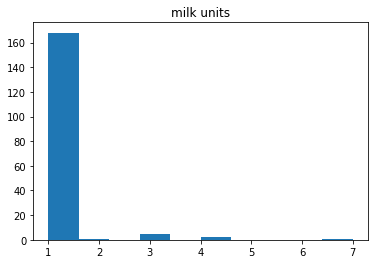

In [3264]:
import matplotlib.pyplot as plt
plt.hist(module_s.loc[module_s['ag_s0a']==401., 'ag_s03b'])
plt.title('milk units')

Text(0.5, 1.0, 'chicken eggs')

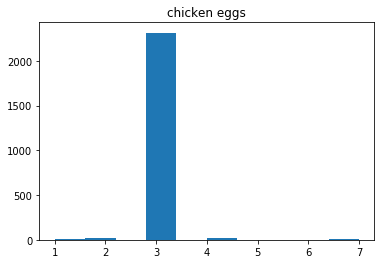

In [3265]:
plt.hist(module_s.loc[module_s['ag_s0a']==402., 'ag_s03b'])
plt.title('chicken eggs')

Text(0.5, 1.0, 'guinea foal eggs')

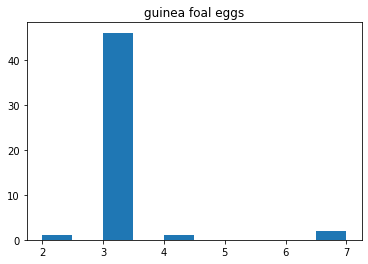

In [3266]:
plt.hist(module_s.loc[module_s['ag_s0a']==403., 'ag_s03b'])
plt.title('guinea foal eggs')

Text(0.5, 1.0, 'MEAT')

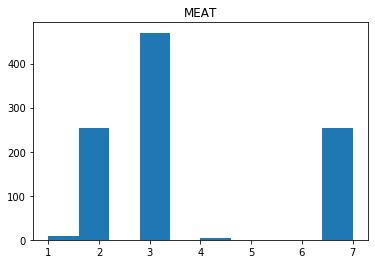

In [3267]:
plt.hist(module_s.loc[module_s['ag_s0a']==404., 'ag_s03b'])
plt.title('MEAT')

Text(0.5, 1.0, 'Skins and HIDE')

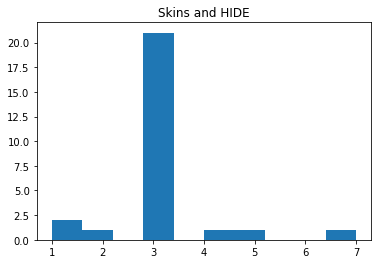

In [3268]:
plt.hist(module_s.loc[module_s['ag_s0a']==406., 'ag_s03b'])
plt.title('Skins and HIDE')

Text(0.5, 1.0, 'manure')

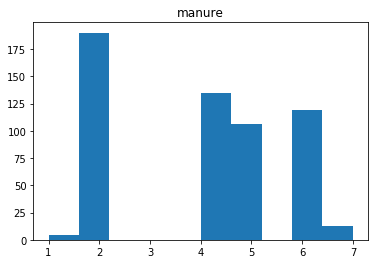

In [3269]:
plt.hist(module_s.loc[module_s['ag_s0a']==407., 'ag_s03b'])
plt.title('manure')

In [3270]:
#module_s.loc[(module_s['ag_s03b']==7.0)]# =1.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='WHOLE CHICKEN'),'unit_produced']=5.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='CHICKEN MEAT'),'unit_produced']=3.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='GOAT MEAT'),'unit_produced']=30.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='WHOLE GOAT'),'unit_produced']=30.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='COAIR'),'unit_produced']=10.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='TRAY'),'unit_produced']=100.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='1500ML'),'unit_produced']=1.5
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='WHOLE DUCK'),'unit_produced']=5.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='WHOLE DOVE'),'unit_produced']=3.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='WHOLE COW'),'unit_produced']=200.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='ONE SKIN HIDE'),'unit_produced']=1.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='BUCKET'),'unit_produced']=10.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='PIECES'),'unit_produced']=1.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='50 KG BAG'),'unit_produced']=50.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='TONS'),'unit_produced']=1000.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='0 WHOLE CHICKENS'),'unit_produced']=5.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='BASIN'),'unit_produced']=40.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='WHOLE GUINEA FOWL'),'unit_produced']=5.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='WHOLE'),'unit_produced']=50.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='EGGS'),'unit_produced']=1.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='BASKET'),'unit_produced']=30.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']==np.nan),'unit_produced']=1.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['case_id']==312045320081),'unit_produced']=10.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']=='200 LITRE DRUM AS A CONTAINER'),'unit_produced']=200.0
module_s.loc[(module_s['ag_s03b']==7.0) & (module_s['ag_s03b_os']!='WHOLE CHICKEN')& (module_s['ag_s03b_os']!='CHICKEN MEAT')]

,case_id,ag_s0a,ag_s02,ag_s03a,ag_s03b,ag_s03b_os,ag_s04,ag_s05a,ag_s05b,ag_s05b_os,ag_s06,ag_s13,unit_produced,unit_sold
5214,103013470053,404.0,1.0,1.0,7.0,GOAT MEAT,2.0,NaN,NaN,NaN,NaN,NaN,30.0,0.0
5635,103040120012,402.0,2.0,2.0,7.0,COAIR,2.0,NaN,NaN,NaN,NaN,NaN,10.0,0.0
5644,103040120049,402.0,3.0,12.0,7.0,COAIR,2.0,NaN,NaN,NaN,NaN,NaN,10.0,0.0
5645,103040120049,403.0,1.0,1.0,7.0,COAIR,2.0,NaN,NaN,NaN,NaN,NaN,10.0,0.0
7852,104034880134,404.0,3.0,1.0,7.0,WHOLE GOAT,2.0,NaN,NaN,NaN,NaN,NaN,30.0,0.0
8843,104200010173,402.0,3.0,12.0,7.0,TRAY,2.0,NaN,NaN,NaN,NaN,NaN,100.0,0.0
9492,105024390236,404.0,1.0,1.0,7.0,WHOLE GOAT,1.0,2.0,2.0,NaN,20000.0,NaN,30.0,1.0
9650,105033670014,401.0,4.0,1500.0,7.0,1500ML,2.0,NaN,NaN,NaN,NaN,NaN,1.5,0.0
10727,107320700113,404.0,2.0,1.0,7.0,WHOLE DUCK,2.0,NaN,NaN,NaN,NaN,NaN,5.0,0.0
13721,202023430253,408.0,6.0,1.0,7.0,WHOLE DOVE,2.0,NaN,NaN,NaN,NaN,NaN,3.0,0.0


In [3271]:
module_s.loc[(module_s['ag_s03a']>0) & (module_s['unit_produced']==0.0)]

,case_id,ag_s0a,ag_s02,ag_s03a,ag_s03b,ag_s03b_os,ag_s04,ag_s05a,ag_s05b,ag_s05b_os,ag_s06,ag_s13,unit_produced,unit_sold
37202,305084350070,404.0,1.0,1.0,7.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [3272]:
module_s.loc[(module_s['ag_s05b']==7.0) & (module_s['ag_s05b_os']=='BUCKET'),'unit_sold']=10.0
module_s.loc[(module_s['ag_s05b']==7.0) & (module_s['ag_s05b_os']=='0 WHOLE CHICKENS'),'unit_sold']=5.0
module_s.loc[(module_s['ag_s05b']==7.0) & (module_s['ag_s05b_os']=='TRAYS'),'unit_sold']=100.0
module_s.loc[(module_s['ag_s05b']==7.0) & (module_s['ag_s05b_os']=='WHOLE COW'),'unit_sold']=200.0
module_s.loc[(module_s['ag_s05b']==7.0)]

,case_id,ag_s0a,ag_s02,ag_s03a,ag_s03b,ag_s03b_os,ag_s04,ag_s05a,ag_s05b,ag_s05b_os,ag_s06,ag_s13,unit_produced,unit_sold
10770,107336400020,402.0,6.0,40.0,3.0,NaN,1.0,12000.0,7.0,TRAYS,9000000.0,NaN,1.0,100.0
16859,203062960089,407.0,2.0,1.0,7.0,BUCKET,1.0,2.0,7.0,BUCKET,1000.0,NaN,10.0,10.0
29833,301053250145,408.0,1.0,2.0,7.0,0 WHOLE CHICKENS,1.0,2.0,7.0,0 WHOLE CHICKENS,1000.0,NaN,5.0,5.0
37910,306011440151,404.0,1.0,1.0,7.0,WHOLE COW,1.0,0.5,7.0,WHOLE COW,15000.0,NaN,200.0,200.0
47423,313012460050,404.0,1.0,1.0,7.0,WHOLE COW,1.0,5.0,7.0,WHOLE COW,15000.0,NaN,200.0,200.0


In [3273]:
module_s['produced']= module_s['ag_s03a'].replace(np.nan,0.0)*module_s['unit_produced'].replace(np.nan,0.0)
module_s['sales']= module_s['ag_s05a'].replace(np.nan,0.0)*module_s['unit_sold'].replace(np.nan,0.0)

In [3274]:
module_s['unit_value']=module_s['ag_s06']/module_s['sales']

In [3275]:
module_s['unit_value']=module_s['unit_value'].replace(np.nan,0)
module_s['unit_value']=module_s['unit_value'].replace(np.inf,0)

In [3276]:
products

product_means = []
for product in products:
    print(product)
    mean_value=module_s.loc[(module_s['ag_s0a']==product)&
                  (module_s['unit_value']>0.0), 'unit_value'].mean()
    print(mean_value)
    product_means.append(mean_value)
    module_s.loc[(module_s['ag_s0a']==product)&
                  (module_s['unit_value']==0.0),'unit_value']=mean_value

401.0
149.42414384483598
402.0
21.521231558039347
403.0
932.4705882352941
404.0
601.1785589004281
405.0
782.5
406.0
50.0
407.0
13.090126984126986
408.0
230.0


In [3277]:
dict_mean = dict(zip(products, product_means))
dict_mean

{401.0: 149.42414384483598,
 402.0: 21.521231558039347,
 403.0: 932.4705882352941,
 404.0: 601.1785589004281,
 405.0: 782.5,
 406.0: 50.0,
 407.0: 13.090126984126986,
 408.0: 230.0}

In [3278]:
module_s

,case_id,ag_s0a,ag_s02,ag_s03a,ag_s03b,ag_s03b_os,ag_s04,ag_s05a,ag_s05b,ag_s05b_os,ag_s06,ag_s13,unit_produced,unit_sold,produced,sales,unit_value
0,101012150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.000000
1,101012150004,401.0,2.0,90.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,90.0,0.0,149.424144
2,101012150004,402.0,3.0,12.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,12.0,0.0,21.521232
3,101012150004,403.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,932.470588
4,101012150004,404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,601.178559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50394,315556140113,407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,13.090127
50395,315556140113,408.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,230.000000
50396,315556140136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.000000
50397,315556140159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.000000


In [3279]:
#module_s.loc[(module_s['unit_value'].isna()),'unit_value']= 
#dict_mean[
module_s.loc[(module_s['unit_value']<1.0) & (~np.isnan(module_s['ag_s0a'])),:]#]

,case_id,ag_s0a,ag_s02,ag_s03a,ag_s03b,ag_s03b_os,ag_s04,ag_s05a,ag_s05b,ag_s05b_os,ag_s06,ag_s13,unit_produced,unit_sold,produced,sales,unit_value
1857,101041500048,407.0,2.0,5.0,6.0,NaN,1.0,5.0,6.0,NaN,200.0,NaN,1000.0,1000.0,5000.0,5000.0,0.040000
11173,201013870175,407.0,3.0,12.0,6.0,NaN,1.0,2.0,6.0,NaN,600.0,NaN,1000.0,1000.0,12000.0,2000.0,0.300000
25890,208077280069,407.0,12.0,4.0,4.0,NaN,1.0,3.0,6.0,NaN,2900.0,NaN,10.0,1000.0,40.0,3000.0,0.966667
26711,209040180189,407.0,10.0,5.0,5.0,NaN,1.0,15.0,5.0,NaN,750.0,NaN,60.0,60.0,300.0,900.0,0.833333
45723,312010070158,407.0,7.0,2.0,6.0,NaN,1.0,2.0,6.0,NaN,1200.0,NaN,1000.0,1000.0,2000.0,2000.0,0.600000


In [3280]:
module_s

,case_id,ag_s0a,ag_s02,ag_s03a,ag_s03b,ag_s03b_os,ag_s04,ag_s05a,ag_s05b,ag_s05b_os,ag_s06,ag_s13,unit_produced,unit_sold,produced,sales,unit_value
0,101012150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.000000
1,101012150004,401.0,2.0,90.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,90.0,0.0,149.424144
2,101012150004,402.0,3.0,12.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,12.0,0.0,21.521232
3,101012150004,403.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,932.470588
4,101012150004,404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,601.178559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50394,315556140113,407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,13.090127
50395,315556140113,408.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,230.000000
50396,315556140136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.000000
50397,315556140159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.000000


In [3281]:
module_s['product_income']=module_s['unit_value']*module_s['produced']

module_s['product_income']=module_s['product_income'].replace(np.nan,0.0)

module_s['sales_income']=module_s['ag_s06'].replace(np.nan,0.0)

module_s

,case_id,ag_s0a,ag_s02,ag_s03a,ag_s03b,ag_s03b_os,ag_s04,ag_s05a,ag_s05b,ag_s05b_os,ag_s06,ag_s13,unit_produced,unit_sold,produced,sales,unit_value,product_income,sales_income
0,101012150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,101012150004,401.0,2.0,90.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,90.0,0.0,149.424144,13448.172946,0.0
2,101012150004,402.0,3.0,12.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,12.0,0.0,21.521232,258.254779,0.0
3,101012150004,403.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,932.470588,0.000000,0.0
4,101012150004,404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,601.178559,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50394,315556140113,407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,13.090127,0.000000,0.0
50395,315556140113,408.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,230.000000,0.000000,0.0
50396,315556140136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
50397,315556140159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [3282]:
module_s.loc[module_s['product_income']>module_s['sales_income'],'final_income']=module_s.loc[module_s['product_income']>module_s['sales_income'],'product_income']
module_s.loc[module_s['product_income']<=module_s['sales_income'],'final_income']=module_s.loc[module_s['product_income']<=module_s['sales_income'],'sales_income']

In [3283]:
mod_s = module_s.groupby(['case_id']).sum()
mod_s

,ag_s0a,ag_s02,ag_s03a,ag_s03b,ag_s04,ag_s05a,ag_s05b,ag_s06,ag_s13,unit_produced,unit_sold,produced,sales,unit_value,product_income,sales_income,final_income
case_id,,,,,,,,,,,,,,,,,
101010160009,3236.0,2.0,24.0,3.0,1.0,40.0,3.0,800.0,0.0,1.0,1.0,24.0,40.0,2778.663418,480.000000,800.0,800.000000
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
101010160060,3236.0,6.0,40.0,3.0,1.0,200.0,3.0,4000.0,0.0,1.0,1.0,40.0,200.0,2778.663418,800.000000,4000.0,4000.000000
101010160068,3236.0,6.0,10.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,2780.184650,215.212316,0.0,215.212316
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
315556140113,3236.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2780.184650,0.000000,0.0,0.000000
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000


In [3284]:
agr_info['income_livestock_products']=mod_s['final_income']
agr_info['exp_livestock_add_exp']=mod_s['ag_s13'].replace(np.nan,0)
agr_info

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,exp_transp_inp_rainy,exp_inp_rainy,exp_transp_seed_rainy,exp_seed_rainy,income_sales_rainy,exp_trnsp_rainy,income_rainy,exp_rainy,...,exp_dimba,income_sales_tree,exp_trnsp_tree,income_harvest_tree,income_tree,exp_tree,animal_income,animal_expenditure,income_livestock_products,exp_livestock_add_exp
case_id,,,,,,,,,,,,,,,,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0,56342.421508,1800.0,56342.421508,1800.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,6747.386757,2368.688809,800.000000,0.0
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,6075.000000,0.0,6075.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
101010160060,0.0,0.0,0.0,0.0,0.0,0.0,25160.034427,0.0,25160.034427,0.0,...,0.0,0.0,0.0,30889.071081,0.0,0.0,16000.000000,24084.399176,4000.000000,0.0
101010160068,0.0,0.0,0.0,0.0,0.0,0.0,111864.695410,1300.0,111864.695410,1300.0,...,0.0,10000.0,0.0,20000.000000,10000.0,0.0,23173.242574,13237.488968,215.212316,0.0
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,49404.811562,600.0,49404.811562,600.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,33880.418747,0.0,33880.418747,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,700.000000,0.0,700.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1636.421087,0.000000,0.0
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,800.0,0.0,2400.000000,800.0,0.0,0.000000,0.000000,0.000000,0.0


In [3285]:
agr_info['income_livestock']=agr_info['animal_income']+agr_info['income_livestock_products']
agr_info['exp_livestock']=agr_info['animal_expenditure']+agr_info['exp_livestock_add_exp']

In [3286]:
agr_info

,income_pltrent_rainy,exp_pltrent_hiredwrk_rainy,exp_transp_inp_rainy,exp_inp_rainy,exp_transp_seed_rainy,exp_seed_rainy,income_sales_rainy,exp_trnsp_rainy,income_rainy,exp_rainy,...,exp_trnsp_tree,income_harvest_tree,income_tree,exp_tree,animal_income,animal_expenditure,income_livestock_products,exp_livestock_add_exp,income_livestock,exp_livestock
case_id,,,,,,,,,,,,,,,,,,,,,
101010160009,0.0,0.0,0.0,0.0,0.0,0.0,56342.421508,1800.0,56342.421508,1800.0,...,0.0,0.000000,0.0,0.0,6747.386757,2368.688809,800.000000,0.0,7547.386757,2368.688809
101010160033,0.0,0.0,0.0,0.0,0.0,0.0,6075.000000,0.0,6075.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
101010160060,0.0,0.0,0.0,0.0,0.0,0.0,25160.034427,0.0,25160.034427,0.0,...,0.0,30889.071081,0.0,0.0,16000.000000,24084.399176,4000.000000,0.0,20000.000000,24084.399176
101010160068,0.0,0.0,0.0,0.0,0.0,0.0,111864.695410,1300.0,111864.695410,1300.0,...,0.0,20000.000000,10000.0,0.0,23173.242574,13237.488968,215.212316,0.0,23388.454889,13237.488968
101010160069,0.0,0.0,0.0,0.0,0.0,0.0,49404.811562,600.0,49404.811562,600.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315546130283,0.0,0.0,0.0,0.0,0.0,0.0,33880.418747,0.0,33880.418747,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
315556140113,0.0,0.0,0.0,0.0,0.0,0.0,700.000000,0.0,700.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,1636.421087,0.000000,0.0,0.000000,1636.421087
315556140136,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,2400.000000,800.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [3287]:
agr_info.to_csv('/home/insauer/projects/WB_model/Data_Malawi/agr_info.csv')

In [3288]:
agr_short=agr_info[['income_rainy', 'exp_rainy', 'income_dimba','exp_dimba', 'income_tree', 'exp_tree', 'income_livestock', 'exp_livestock']]

In [3289]:
agr_short

,income_rainy,exp_rainy,income_dimba,exp_dimba,income_tree,exp_tree,income_livestock,exp_livestock
case_id,,,,,,,,
101010160009,56342.421508,1800.0,0.0,0.0,0.0,0.0,7547.386757,2368.688809
101010160033,6075.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
101010160060,25160.034427,0.0,0.0,0.0,0.0,0.0,20000.000000,24084.399176
101010160068,111864.695410,1300.0,0.0,0.0,10000.0,0.0,23388.454889,13237.488968
101010160069,49404.811562,600.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
315546130283,33880.418747,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
315556140113,700.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1636.421087
315556140136,0.000000,0.0,0.0,0.0,800.0,0.0,0.000000,0.000000


In [3290]:
agr_short['total_income']=agr_info['income_rainy']+agr_info['income_dimba']+agr_info['income_tree']+ agr_info['income_livestock']
agr_short['total_exp']=agr_info['exp_rainy']+agr_info['exp_dimba']+agr_info['exp_tree']+ agr_info['exp_livestock']
agr_short['total_profit']=agr_short['total_income']-agr_short['total_exp']

/home/insauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/insauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/insauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [3291]:
agr_short.loc[agr_short['total_profit']<0.0,'total_profit_equalized']= 0.0
agr_short.loc[agr_short['total_profit']>=0.0,'total_profit_equalized']=agr_short['total_profit']

/home/insauer/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/insauer/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:850: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(new_indexer, value)
/home/insauer/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

In [3292]:
agr_short

,income_rainy,exp_rainy,income_dimba,exp_dimba,income_tree,exp_tree,income_livestock,exp_livestock,total_income,total_exp,total_profit,total_profit_equalized
case_id,,,,,,,,,,,,
101010160009,56342.421508,1800.0,0.0,0.0,0.0,0.0,7547.386757,2368.688809,63889.808265,4168.688809,59721.119456,59721.119456
101010160033,6075.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,6075.000000,0.000000,6075.000000,6075.000000
101010160060,25160.034427,0.0,0.0,0.0,0.0,0.0,20000.000000,24084.399176,45160.034427,24084.399176,21075.635252,21075.635252
101010160068,111864.695410,1300.0,0.0,0.0,10000.0,0.0,23388.454889,13237.488968,145253.150299,14537.488968,130715.661331,130715.661331
101010160069,49404.811562,600.0,0.0,0.0,0.0,0.0,0.000000,0.000000,49404.811562,600.000000,48804.811562,48804.811562
...,...,...,...,...,...,...,...,...,...,...,...,...
315546130283,33880.418747,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,33880.418747,0.000000,33880.418747,33880.418747
315556140113,700.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1636.421087,700.000000,1636.421087,-936.421087,0.000000
315556140136,0.000000,0.0,0.0,0.0,800.0,0.0,0.000000,0.000000,800.000000,0.000000,800.000000,800.000000


In [3293]:
agr_short.loc[agr_short['exp_tree']>agr_short['income_tree']]

,income_rainy,exp_rainy,income_dimba,exp_dimba,income_tree,exp_tree,income_livestock,exp_livestock,total_income,total_exp,total_profit,total_profit_equalized
case_id,,,,,,,,,,,,


In [3294]:
general_info['income_agr']=agr_short['total_profit_equalized']

In [3295]:
general_info['income_agr']=general_info['income_agr'].replace(np.nan,0.0)

In [3296]:
general_info

,case_id,ea_id,isurban,weight,region,income_labour,income_enterprise,inc-sp_child,inc-sp_other,income_other,inc-sp_ssn,income_agr
case_id,,,,,,,,,,,,
101010160009,101010160009,10101016,2,126.560097,101,2400.0,12807.692308,0.0,1500.0,0.0,0.0,59721.119456
101010160033,101010160033,10101016,2,126.560097,101,0.0,0.000000,2000.0,18000.0,0.0,0.0,6075.000000
101010160060,101010160060,10101016,2,126.560097,101,84480.0,1200.000000,20000.0,6000.0,0.0,0.0,21075.635252
101010160068,101010160068,10101016,2,126.560097,101,16080.0,0.000000,0.0,0.0,0.0,0.0,130715.661331
101010160069,101010160069,10101016,2,126.560097,101,2100.0,0.000000,0.0,250.0,0.0,0.0,48804.811562
...,...,...,...,...,...,...,...,...,...,...,...,...
315556140342,315556140342,31555614,1,456.450592,315,90000.0,0.000000,0.0,1500.0,0.0,0.0,0.000000
315556140365,315556140365,31555614,1,456.450592,315,85680.0,0.000000,0.0,0.0,0.0,0.0,0.000000
315556140388,315556140388,31555614,1,456.450592,315,72000.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [3297]:
general_info['income']=general_info.iloc[:,5:].sum(axis=1)

In [3298]:
general_info.loc[general_info['income']==0]

,case_id,ea_id,isurban,weight,region,income_labour,income_enterprise,inc-sp_child,inc-sp_other,income_other,inc-sp_ssn,income_agr,income
case_id,,,,,,,,,,,,,
101044400096,101044400096,10104440,2,92.612801,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102041010091,102041010091,10204101,2,148.202606,102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102047230046,102047230046,10204723,2,138.246201,102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102047230099,102047230099,10204723,2,138.246201,102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103034540037,103034540037,10303454,2,123.982597,103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314432700214,314432700214,31443270,1,94.898697,314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315311610291,315311610291,31531161,1,541.124329,315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315326740121,315326740121,31532674,1,647.444885,315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3299]:
general_info.to_csv('/home/insauer/projects/WB_model/Data_Malawi/general_info.csv')

# Income from fisheries activities

### Input costs high season

In [3300]:
modulef_d1 = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Fisheries/fs_mod_d1.csv')
modulef_d1 = modulef_d1[['case_id', 'fs_d06']]
modulef_d1 = modulef_d1.replace(np.nan,0)
mod_d1 = modulef_d1.groupby(['case_id']).sum()
mod_d1

,fs_d06
case_id,
101034140064,0.0
101034140075,0.0
102011370076,0.0
102011370087,0.0
102011370151,0.0
...,...
314386900029,0.0
314391020044,0.0
314391020125,0.0


In [3301]:
modulef_d2 = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Fisheries/fs_mod_d2.csv')
modulef_d2 = modulef_d2[['case_id', 'fs_d12', 'fs_d13', 'fs_d14a', 'fs_d14b','fs_d14c','fs_d14d']]
modulef_d2 = modulef_d2.replace(np.nan,0)
modulef_d2['adult_weeks']=modulef_d2['fs_d14a']*modulef_d2['fs_d14b']
modulef_d2['child_weeks']=modulef_d2['fs_d14c']*modulef_d2['fs_d14d']
modulef_d2

,case_id,fs_d12,fs_d13,fs_d14a,fs_d14b,fs_d14c,fs_d14d,adult_weeks,child_weeks
0,101034140064,0.0,0.0,3.0,2.0,0.0,0.0,6.0,0.0
1,101034140064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,101034140064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,101034140064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,101034140064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1165,314426160009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1166,314426160009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1167,314426160009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1168,314426160009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3302]:
mod_d2 = modulef_d2.groupby(['case_id']).sum()
mod_d2

,fs_d12,fs_d13,fs_d14a,fs_d14b,fs_d14c,fs_d14d,adult_weeks,child_weeks
case_id,,,,,,,,
101034140064,0.0,0.0,3.0,2.0,0.0,0.0,6.0,0.0
101034140075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
314386900029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020125,0.0,0.0,2.0,4.0,0.0,0.0,8.0,0.0


In [3303]:
modulef=pd.merge(mod_d1, mod_d2, left_on='case_id', right_on='case_id')

In [3304]:
modulef

,fs_d06,fs_d12,fs_d13,fs_d14a,fs_d14b,fs_d14c,fs_d14d,adult_weeks,child_weeks
case_id,,,,,,,,,
101034140064,0.0,0.0,0.0,3.0,2.0,0.0,0.0,6.0,0.0
101034140075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
314386900029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020125,0.0,0.0,0.0,2.0,4.0,0.0,0.0,8.0,0.0


In [3305]:
modulef_d3 = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Fisheries/fs_mod_d3.csv')
modulef_d3 = modulef_d3[['case_id', 'fs_d16a', 'fs_d16b', 'fs_d18a','fs_d18b', 'fs_d18c', 'fs_d18d',
 'fs_d21a', 'fs_d21b', 'fs_d24a', 'fs_d24b']]
modulef_d3 = modulef_d3.replace(np.nan,0)

In [3306]:
# function that converts each unit into liters

def convert_unit_fish(x):
    unit_conv= {1.0: 1,
               2.0:12.,
               3.0:1,
               4.0:5.0,
               5.0:10.0,
               6.0:25.0,
               7.0:35.0,
               8.0:50.0,
               9.0:0.0,
               0.0:0.0
               }
    return pd.Series(unit_conv[x],
                     index=['unit_3'])

In [3307]:
modulef_d3['unit_fish_adult']= modulef_d3['fs_d18b'].replace(np.nan,0.0).apply((convert_unit_fish))
modulef_d3['unit_fish_child']= modulef_d3['fs_d18d'].replace(np.nan,0.0).apply((convert_unit_fish))
modulef_d3['fish_payment']= modulef_d3['unit_fish_adult']*modulef_d3['fs_d18a']+modulef_d3['unit_fish_child']*modulef_d3['fs_d18c']

In [3308]:
mod_d3 = modulef_d3.groupby(['case_id']).sum()
mod_d3

,fs_d16a,fs_d16b,fs_d18a,fs_d18b,fs_d18c,fs_d18d,fs_d21a,fs_d21b,fs_d24a,fs_d24b,unit_fish_adult,unit_fish_child,fish_payment
case_id,,,,,,,,,,,,,
101034140064,200.0,0.0,2.0,9.0,0.0,1.0,2.0,0.0,300.0,1.0,0.0,1.0,0.0
101034140075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3400.0,2.0,0.0,0.0,0.0
102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314386900029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3309]:
modulef=pd.merge(modulef, mod_d3, left_on='case_id', right_on='case_id')
modulef

,fs_d06,fs_d12,fs_d13,fs_d14a,fs_d14b,fs_d14c,fs_d14d,adult_weeks,child_weeks,fs_d16a,...,fs_d18b,fs_d18c,fs_d18d,fs_d21a,fs_d21b,fs_d24a,fs_d24b,unit_fish_adult,unit_fish_child,fish_payment
case_id,,,,,,,,,,,,,,,,,,,,,
101034140064,0.0,0.0,0.0,3.0,2.0,0.0,0.0,6.0,0.0,200.0,...,9.0,0.0,1.0,2.0,0.0,300.0,1.0,0.0,1.0,0.0
101034140075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3400.0,2.0,0.0,0.0,0.0
102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314386900029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020125,0.0,0.0,0.0,2.0,4.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3310]:
modulef_e = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Fisheries/fs_mod_e1.csv')
modulef_e = modulef_e[['case_id', 'fs_e03']]
modulef_e = modulef_e.replace(np.nan,0)
mod_e = modulef_e.groupby(['case_id']).sum()
mod_e

,fs_e03
case_id,
101034140064,2.0
101034140075,1.0
102011370076,0.0
102011370087,0.0
102011370151,0.0
...,...
314386900029,0.0
314391020044,0.0
314391020125,0.0


In [3311]:
modulef=pd.merge(modulef, mod_e, left_on='case_id', right_on='case_id')
modulef

,fs_d06,fs_d12,fs_d13,fs_d14a,fs_d14b,fs_d14c,fs_d14d,adult_weeks,child_weeks,fs_d16a,...,fs_d18c,fs_d18d,fs_d21a,fs_d21b,fs_d24a,fs_d24b,unit_fish_adult,unit_fish_child,fish_payment,fs_e03
case_id,,,,,,,,,,,,,,,,,,,,,
101034140064,0.0,0.0,0.0,3.0,2.0,0.0,0.0,6.0,0.0,200.0,...,0.0,1.0,2.0,0.0,300.0,1.0,0.0,1.0,0.0,2.0
101034140075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3400.0,2.0,0.0,0.0,0.0,1.0
102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314386900029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020125,0.0,0.0,0.0,2.0,4.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3312]:
modulef['exp_input']=modulef['fs_d06'] + modulef['fs_d12'] + modulef['fs_d13']*modulef['fs_e03'] +\
                     modulef['adult_weeks']*modulef['fs_d16a'] + modulef['fs_d16b']*modulef['child_weeks']

In [3313]:
modulef.loc[modulef['fs_d24b']==2.,'exp_input']+=modulef.loc[modulef['fs_d24b']==2.,'fs_d24a']
modulef.loc[modulef['fs_d24b']==1.,'exp_input']+=modulef.loc[modulef['fs_d24b']==1.,'fs_d24a']*modulef.loc[modulef['fs_d24b']==1.,'fs_e03']

In [3314]:
modulef

,fs_d06,fs_d12,fs_d13,fs_d14a,fs_d14b,fs_d14c,fs_d14d,adult_weeks,child_weeks,fs_d16a,...,fs_d18d,fs_d21a,fs_d21b,fs_d24a,fs_d24b,unit_fish_adult,unit_fish_child,fish_payment,fs_e03,exp_input
case_id,,,,,,,,,,,,,,,,,,,,,
101034140064,0.0,0.0,0.0,3.0,2.0,0.0,0.0,6.0,0.0,200.0,...,1.0,2.0,0.0,300.0,1.0,0.0,1.0,0.0,2.0,1800.0
101034140075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3400.0,2.0,0.0,0.0,0.0,1.0,3400.0
102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314386900029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020125,0.0,0.0,0.0,2.0,4.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3315]:
fish_info=modulef[['exp_input']]
fish_info = fish_info.rename(columns={'exp_input':'exp_input_high'})

In [3316]:
fish_info

,exp_input_high
case_id,
101034140064,1800.0
101034140075,3400.0
102011370076,0.0
102011370087,0.0
102011370151,0.0
...,...
314386900029,0.0
314391020044,0.0
314391020125,0.0


In [3317]:
modulef_e1 = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Fisheries/fs_mod_e1.csv')
modulef_e1 = modulef_e1[['case_id', 'fs_e02', 'fs_e03', 'fs_e06a', 'fs_e06b', 'fs_e06b_os', 'fs_e06d', 'fs_e06e',
                          'fs_e08a', 'fs_e08b', 'fs_e08b_os', 'fs_e08d', 'fs_e08e', 'fs_e08f', 'fs_e08f_os', 'fs_e08h', 'fs_e09']]
modulef_e1 = modulef_e1.replace(np.nan,0)
modulef_e1

,case_id,fs_e02,fs_e03,fs_e06a,fs_e06b,fs_e06b_os,fs_e06d,fs_e06e,fs_e08a,fs_e08b,fs_e08b_os,fs_e08d,fs_e08e,fs_e08f,fs_e08f_os,fs_e08h,fs_e09
0,101034140064,6.0,2.0,60.0,1.0,0,0.0,0.0,25.0,1.0,0,200.0,0.0,0.0,0,0.0,2.0
1,101034140075,6.0,1.0,115.0,1.0,0,0.0,0.0,97.0,1.0,0,250.0,0.0,0.0,0,0.0,1.0
2,102011370076,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0
3,102011370087,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0
4,102011370151,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,314386900029,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0
346,314391020044,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0
347,314391020125,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0
348,314423940024,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0


In [3318]:
modulef_e2 = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Fisheries/fs_mod_e2.csv')
modulef_e2 = modulef_e2[['case_id', 'fs_e16']]
modulef_e2 = modulef_e2.replace(np.nan,0)
mod_e2= modulef_e2.groupby(['case_id']).sum()
mod_e2

,fs_e16
case_id,
101034140064,0.0
101034140075,0.0
102011370076,0.0
102011370087,0.0
102011370151,0.0
...,...
314386900029,0.0
314391020044,0.0
314391020125,0.0


PIECE .........1

DOZEN/BUNDLE...2

KILOGRAM.......3

5 KG BAG.......4

10 KG BAG......5

25 KG BAG......6

SMALL BASKET...7

LARGE BASKET...8

OTHER
(SPECIFY)......9

In [3319]:
# unit conversion 

In [3320]:
modulef_e1['unit_catch_1']= modulef_e1['fs_e06b'].replace(np.nan,0.0).apply((convert_unit_fish))
modulef_e1['unit_catch_2']= modulef_e1['fs_e06e'].replace(np.nan,0.0).apply((convert_unit_fish))
modulef_e1['unit_sales_1']= modulef_e1['fs_e08b'].replace(np.nan,0.0).apply((convert_unit_fish))
modulef_e1['unit_sales_2']= modulef_e1['fs_e08f'].replace(np.nan,0.0).apply((convert_unit_fish))

In [3321]:
# convert specified units
modulef_e1.loc[(modulef_e1['fs_e06b']==9.0)&(modulef_e1['fs_e06b_os']=='SMALL PAIL'),'unit_catch_1']=8.0
modulef_e1.loc[(modulef_e1['fs_e06b']==9.0)&(modulef_e1['fs_e06b_os']=='HEAP'),'unit_catch_1']=10.0
modulef_e1.loc[(modulef_e1['fs_e06b']==9.0)&(modulef_e1['fs_e06b_os']=='10 LITTER PAIL'),'unit_catch_1']=10.0
modulef_e1.loc[(modulef_e1['fs_e06b']==9.0)&(modulef_e1['fs_e06b_os']=='10 LITRE PAIL'),'unit_catch_1']=10.0
modulef_e1.loc[(modulef_e1['fs_e06b']==9.0)&(modulef_e1['fs_e06b_os']=='A SMALL PAIL'),'unit_catch_1']=8.0
modulef_e1.loc[(modulef_e1['fs_e06b']==9.0)&(modulef_e1['fs_e06b_os']=='SMAIL PAIL'),'unit_catch_1']=8.0
modulef_e1.loc[(modulef_e1['fs_e06b']==9.0)&(modulef_e1['fs_e06b_os']=='SMALL PAIL1'),'unit_catch_1']=8.0
modulef_e1.loc[(modulef_e1['fs_e06b']==9.0)&(modulef_e1['fs_e06b_os']=='5 LITRE BUCKET'),'unit_catch_1']=5.0
modulef_e1.loc[(modulef_e1['fs_e06b']==9.0)&(modulef_e1['fs_e06b_os']=='BUCKET {15 LITRES}1'),'unit_catch_1']=15.0
modulef_e1.loc[(modulef_e1['fs_e06b']==9.0)&(modulef_e1['fs_e06b_os']=='BUCKET {15 LITRES}'),'unit_catch_1']=15.0
modulef_e1.loc[(modulef_e1['fs_e06b']==9.0)&(modulef_e1['fs_e06b_os']=='WHOLE BWATO {DUG OUT}'),'unit_catch_1']=300.0
modulef_e1.loc[(modulef_e1['fs_e06b']==9.0)&(modulef_e1['fs_e06b_os']=='SAML PAIL'),'unit_catch_1']=8.0
modulef_e1.loc[modulef_e1['fs_e06b']==9.0,['fs_e06b_os','unit_catch_1']]


,fs_e06b_os,unit_catch_1
9,HEAP,10.0
12,HEAP,10.0
17,SMALL PAIL,8.0
19,SMALL PAIL,8.0
20,SMALL PAIL,8.0
21,10 LITTER PAIL,10.0
22,10 LITRE PAIL,10.0
25,SMALL PAIL,8.0
31,SMAIL PAIL,8.0
33,SMAIL PAIL,8.0


In [3322]:
# convert specidied units
modulef_e1.loc[(modulef_e1['fs_e08b']==9.0)&(modulef_e1['fs_e08b_os']=='SMALL PAIL'),'unit_sales_1']=8.0
modulef_e1.loc[(modulef_e1['fs_e08b']==9.0)&(modulef_e1['fs_e08b_os']=='HEAP'),'unit_sales_1']=10.0
modulef_e1.loc[(modulef_e1['fs_e08b']==9.0)&(modulef_e1['fs_e08b_os']=='10 LITTER PAIL'),'unit_sales_1']=10.0
modulef_e1.loc[(modulef_e1['fs_e08b']==9.0)&(modulef_e1['fs_e08b_os']=='10 LITRE PAIL'),'unit_sales_1']=10.0
modulef_e1.loc[(modulef_e1['fs_e08b']==9.0)&(modulef_e1['fs_e08b_os']=='A SMALL PAIL'),'unit_sales_1']=8.0
modulef_e1.loc[(modulef_e1['fs_e08b']==9.0)&(modulef_e1['fs_e08b_os']=='SMAIL PAIL'),'unit_sales_1']=8.0
modulef_e1.loc[(modulef_e1['fs_e08b']==9.0)&(modulef_e1['fs_e08b_os']=='SMALL PAIL1'),'unit_sales_1']=8.0
modulef_e1.loc[(modulef_e1['fs_e08b']==9.0)&(modulef_e1['fs_e08b_os']=='5 LITRE BUCKET'),'unit_sales_1']=5.0
modulef_e1.loc[(modulef_e1['fs_e08b']==9.0)&(modulef_e1['fs_e08b_os']=='BUCKET {15 LITRES}1'),'unit_sales_1']=15.0
modulef_e1.loc[(modulef_e1['fs_e08b']==9.0)&(modulef_e1['fs_e08b_os']=='BUCKET {15 LITRES}'),'unit_sales_1']=15.0
modulef_e1.loc[(modulef_e1['fs_e08b']==9.0)&(modulef_e1['fs_e08b_os']=='WHOLE BWATO {DUG OUT}'),'unit_sales_1']=300.0
modulef_e1.loc[(modulef_e1['fs_e08b']==9.0)&(modulef_e1['fs_e08b_os']=='SAML PAIL'),'unit_sales_1']=8.0
modulef_e1.loc[(modulef_e1['fs_e08b']==9.0)&(modulef_e1['fs_e08b_os']=='10LTS PAIL'),'unit_sales_1']=10.0
modulef_e1.loc[modulef_e1['fs_e08b']==9.0,['fs_e08b_os','unit_sales_1']]

,fs_e08b_os,unit_sales_1
9,HEAP,10.0
12,HEAP,10.0
17,SMALL PAIL,8.0
19,SMALL PAIL,8.0
20,SMALL PAIL,8.0
21,10 LITTER PAIL,10.0
22,10 LITRE PAIL,10.0
25,SMALL PAIL,8.0
31,SMAIL PAIL,8.0
33,SMAIL PAIL,8.0


In [3323]:
# convert specidied units
modulef_e1.loc[(modulef_e1['fs_e08b']==9.0)&(modulef_e1['fs_e08b_os']=='SMALL PAIL'),'unit_sales_2']=8.0
modulef_e1.loc[modulef_e1['fs_e08f']==9.0,['fs_e08f_os','unit_sales_2']]

,fs_e08f_os,unit_sales_2
97,SMALL PAIL,8.0
98,SMALL PAIL,8.0


In [3324]:
# convert specidied units
modulef_e1.loc[modulef_e1['fs_e06e']==9.0]

,case_id,fs_e02,fs_e03,fs_e06a,fs_e06b,fs_e06b_os,fs_e06d,fs_e06e,fs_e08a,fs_e08b,...,fs_e08d,fs_e08e,fs_e08f,fs_e08f_os,fs_e08h,fs_e09,unit_catch_1,unit_catch_2,unit_sales_1,unit_sales_2


In [3325]:
modulef_e1

,case_id,fs_e02,fs_e03,fs_e06a,fs_e06b,fs_e06b_os,fs_e06d,fs_e06e,fs_e08a,fs_e08b,...,fs_e08d,fs_e08e,fs_e08f,fs_e08f_os,fs_e08h,fs_e09,unit_catch_1,unit_catch_2,unit_sales_1,unit_sales_2
0,101034140064,6.0,2.0,60.0,1.0,0,0.0,0.0,25.0,1.0,...,200.0,0.0,0.0,0,0.0,2.0,1.0,0.0,1.0,0.0
1,101034140075,6.0,1.0,115.0,1.0,0,0.0,0.0,97.0,1.0,...,250.0,0.0,0.0,0,0.0,1.0,1.0,0.0,1.0,0.0
2,102011370076,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,102011370087,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,102011370151,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,314386900029,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
346,314391020044,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
347,314391020125,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
348,314423940024,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3326]:
# calculate prize per unit
modulef_e1['unit_prize_1']=modulef_e1['fs_e08d']/modulef_e1['unit_sales_1']
modulef_e1['unit_prize_2']=modulef_e1['fs_e08h']/modulef_e1['unit_sales_2']
modulef_e1['unit_prize_1']=modulef_e1['unit_prize_1'].replace(np.nan,0)
modulef_e1['unit_prize_1']=modulef_e1['unit_prize_1'].replace(np.inf,0)
modulef_e1['unit_prize_2']=modulef_e1['unit_prize_2'].replace(np.nan,0)
modulef_e1['unit_prize_2']=modulef_e1['unit_prize_2'].replace(np.inf,0)
modulef_e1.head(50)

,case_id,fs_e02,fs_e03,fs_e06a,fs_e06b,fs_e06b_os,fs_e06d,fs_e06e,fs_e08a,fs_e08b,...,fs_e08f,fs_e08f_os,fs_e08h,fs_e09,unit_catch_1,unit_catch_2,unit_sales_1,unit_sales_2,unit_prize_1,unit_prize_2
0,101034140064,6.0,2.0,60.0,1.0,0,0.0,0.0,25.0,1.0,...,0.0,0,0.0,2.0,1.0,0.0,1.0,0.0,200.000000,0.0
1,101034140075,6.0,1.0,115.0,1.0,0,0.0,0.0,97.0,1.0,...,0.0,0,0.0,1.0,1.0,0.0,1.0,0.0,250.000000,0.0
2,102011370076,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,102011370087,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,102011370151,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,102014420002,11.0,24.0,840.0,1.0,0,0.0,0.0,30.0,1.0,...,0.0,0,0.0,24.0,1.0,0.0,1.0,0.0,800.000000,0.0
6,102014420036,3.0,32.0,640.0,1.0,0,0.0,0.0,15.0,1.0,...,0.0,0,0.0,32.0,1.0,0.0,1.0,0.0,250.000000,0.0
7,102014420036,6.0,32.0,2240.0,1.0,0,0.0,0.0,49.0,1.0,...,0.0,0,0.0,32.0,1.0,0.0,1.0,0.0,100.000000,0.0
8,102014420052,6.0,36.0,3780.0,1.0,0,0.0,0.0,100.0,1.0,...,0.0,0,0.0,36.0,1.0,0.0,1.0,0.0,100.000000,0.0
9,102014420052,8.0,36.0,25200.0,9.0,HEAP,0.0,0.0,75.0,9.0,...,0.0,0,0.0,36.0,10.0,0.0,10.0,0.0,5.000000,0.0


In [3327]:
modulef_e1['amount_catch_1']=modulef_e1['unit_catch_1']*modulef_e1['fs_e06a']
modulef_e1['amount_catch_2']=modulef_e1['unit_catch_2']*modulef_e1['fs_e06d']
modulef_e1['amount_sales_1']=modulef_e1['unit_sales_1']*modulef_e1['fs_e08a']
modulef_e1['amount_sales_2']=modulef_e1['unit_sales_2']*modulef_e1['fs_e08e']
modulef_e1['value_catch_1']=modulef_e1['amount_catch_1']*modulef_e1['unit_prize_1']
modulef_e1['value_catch_2']=modulef_e1['amount_catch_2']*modulef_e1['unit_prize_2']
modulef_e1['value_sales_1']=modulef_e1['fs_e08a']*modulef_e1['fs_e08d']
modulef_e1['value_sales_2']=modulef_e1['fs_e08d']*modulef_e1['fs_e08h']

In [3328]:
species = np.array(list(set(modulef_e1['fs_e02'])))
species = species[~np.isnan(species)]
species

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [3329]:
# get mean prizes for each species
species_means = []
for spec in species:
    print(spec)
    mean_value=modulef_e1.loc[(modulef_e1['fs_e02']==spec)&
                  (modulef_e1['unit_prize_1']>0.0), 'unit_prize_1'].mean()
    print(mean_value)
    species_means.append(mean_value)
    modulef_e1.loc[(modulef_e1['fs_e02']==spec)&
                  (modulef_e1['unit_prize_1']==0.0),'unit_prize_1']=mean_value
    modulef_e1.loc[(modulef_e1['fs_e02']==spec)&
                  (modulef_e1['unit_prize_2']==0.0),'unit_prize_2']=mean_value

0.0
nan
1.0
3297.604166666667
2.0
8815.42857142857
3.0
2600.47305764411
4.0
274.2307692307692
5.0
1080.0
6.0
4286.3328664799255
7.0
100.0
8.0
309.6296296296297
9.0
288.3577863577864
10.0
147.71712018140587
11.0
1762.4242424242425
12.0
44.875


In [3330]:
modulef_e1['amount_catch_1']=modulef_e1['unit_catch_1']*modulef_e1['fs_e06a']
modulef_e1['amount_catch_2']=modulef_e1['unit_catch_2']*modulef_e1['fs_e06d']
modulef_e1['amount_sales_1']=modulef_e1['unit_sales_1']*modulef_e1['fs_e08a']*modulef_e1['fs_e09'].replace(0.0,1.0)
modulef_e1['amount_sales_2']=modulef_e1['unit_sales_2']*modulef_e1['fs_e08e']*modulef_e1['fs_e09'].replace(0.0,1.0)
modulef_e1['value_catch_1']=modulef_e1['amount_catch_1']*modulef_e1['unit_prize_1']
modulef_e1['value_catch_2']=modulef_e1['amount_catch_2']*modulef_e1['unit_prize_2']
modulef_e1['value_sales_1']=modulef_e1['fs_e08a']*modulef_e1['fs_e08d']*modulef_e1['fs_e09'].replace(0.0,1.0)
modulef_e1['value_sales_2']=modulef_e1['fs_e08d']*modulef_e1['fs_e08h']*modulef_e1['fs_e09'].replace(0.0,1.0)

In [3331]:
mod_e1= modulef_e1.groupby(['case_id']).sum()
mod_e1

,fs_e02,fs_e03,fs_e06a,fs_e06b,fs_e06d,fs_e06e,fs_e08a,fs_e08b,fs_e08d,fs_e08e,...,unit_prize_1,unit_prize_2,amount_catch_1,amount_catch_2,amount_sales_1,amount_sales_2,value_catch_1,value_catch_2,value_sales_1,value_sales_2
case_id,,,,,,,,,,,,,,,,,,,,,
101034140064,6.0,2.0,60.0,1.0,0.0,0.0,25.0,1.0,200.0,0.0,...,200.0,4286.332866,60.0,0.0,50.0,0.0,12000.0,0.0,10000.0,0.0
101034140075,6.0,1.0,115.0,1.0,0.0,0.0,97.0,1.0,250.0,0.0,...,250.0,4286.332866,115.0,0.0,97.0,0.0,28750.0,0.0,24250.0,0.0
102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314386900029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3332]:
mod_e1.loc[(mod_e1['amount_catch_1']>0.0) & (mod_e1['value_catch_1']==0.0)]

,fs_e02,fs_e03,fs_e06a,fs_e06b,fs_e06d,fs_e06e,fs_e08a,fs_e08b,fs_e08d,fs_e08e,...,unit_prize_1,unit_prize_2,amount_catch_1,amount_catch_2,amount_sales_1,amount_sales_2,value_catch_1,value_catch_2,value_sales_1,value_sales_2
case_id,,,,,,,,,,,,,,,,,,,,,


In [3333]:
mod_e1['fish_payment_amount']=modulef['fish_payment']

In [3334]:
mod_e1['amount_catch_final']= mod_e1['amount_catch_1']+mod_e1['amount_catch_2']-mod_e1['fish_payment_amount']
mod_e1['amount_catch']= mod_e1['amount_catch_1']+mod_e1['amount_catch_2']
mod_e1['value_catch']= mod_e1['value_catch_1']+mod_e1['value_catch_2']
mod_e1['value_catch_unit']= mod_e1['value_catch']/mod_e1['amount_catch']
mod_e1['value_catch_unit']=mod_e1['value_catch_unit'].replace(np.nan,0)
mod_e1['value_catch_final']=mod_e1['amount_catch_final']*mod_e1['value_catch_unit']
mod_e1['value_sales']= mod_e1['value_sales_1']+mod_e1['value_sales_2']

In [3335]:
mod_e1['income_gear']=mod_e2['fs_e16']

In [3336]:
mod_e1.head(50)

,fs_e02,fs_e03,fs_e06a,fs_e06b,fs_e06d,fs_e06e,fs_e08a,fs_e08b,fs_e08d,fs_e08e,...,value_sales_1,value_sales_2,fish_payment_amount,amount_catch_final,amount_catch,value_catch,value_catch_unit,value_catch_final,value_sales,income_gear
case_id,,,,,,,,,,,,,,,,,,,,,
101034140064,6.0,2.0,60.0,1.0,0.0,0.0,25.0,1.0,200.0,0.0,...,10000.0,0.0,0.0,60.0,60.0,1.200000e+04,200.000000,1.200000e+04,10000.0,0.0
101034140075,6.0,1.0,115.0,1.0,0.0,0.0,97.0,1.0,250.0,0.0,...,24250.0,0.0,0.0,115.0,115.0,2.875000e+04,250.000000,2.875000e+04,24250.0,0.0
102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0
102011370087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0
102011370151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0
102014420002,11.0,24.0,840.0,1.0,0.0,0.0,30.0,1.0,800.0,0.0,...,576000.0,0.0,0.0,840.0,840.0,6.720000e+05,800.000000,6.720000e+05,576000.0,0.0
102014420036,9.0,64.0,2880.0,2.0,0.0,0.0,64.0,2.0,350.0,0.0,...,276800.0,0.0,0.0,2880.0,2880.0,3.840000e+05,133.333333,3.840000e+05,276800.0,0.0
102014420052,14.0,72.0,28980.0,10.0,0.0,0.0,175.0,10.0,150.0,0.0,...,495000.0,0.0,0.0,255780.0,255780.0,1.638000e+06,6.403941,1.638000e+06,495000.0,0.0
102014420061,19.0,72.0,2880.0,11.0,0.0,0.0,106.0,11.0,720.0,0.0,...,177600.0,0.0,0.0,24480.0,24480.0,2.160000e+05,8.823529,2.160000e+05,177600.0,0.0


In [3337]:
modulef_f1 = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Fisheries/fs_mod_f1.csv')
modulef_f1 = modulef_f1.replace(np.nan,0)
modulef_f1

,case_id,visit,ea_id,fs_f00,fs_f01,fs_f01_os,fs_f02a,fs_f02b,fs_f02c,fs_f02d,...,fs_f03b_os,fs_f03c,fs_f03c_os,fs_f03d,fs_f03e,fs_f03f,fs_f03f_os,fs_f03g,fs_f03g_os,fs_f03h
0,101034140064,2,10103414,2,0.0,0,0.0,0.0,0.0,0.0,...,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0
1,101034140075,2,10103414,2,0.0,0,0.0,0.0,0.0,0.0,...,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0
2,102011370076,1,10201137,1,8.0,0,350.0,9.0,1.0,50.0,...,HEAP,3.0,0,100.0,0.0,0.0,0,0.0,0,0.0
3,102011370087,1,10201137,1,9.0,0,5.0,9.0,1.0,900.0,...,TO SPECIFY ONE HEAP OF USIPA,2.0,0,50.0,0.0,0.0,0,0.0,0,0.0
4,102011370151,1,10201137,1,8.0,0,380.0,9.0,1.0,50.0,...,HEAP,3.0,0,100.0,0.0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,314391020125,2,31439102,1,3.0,0,1.0,9.0,1.0,1000.0,...,1 BIG TIN,1.0,0,1500.0,0.0,0.0,0,0.0,0,0.0
336,314391020125,2,31439102,1,6.0,0,12.0,7.0,1.0,35000.0,...,0,1.0,0,43000.0,0.0,0.0,0,0.0,0,0.0
337,314423940024,2,31442394,1,6.0,0,34.0,2.0,3.0,250.0,...,0,3.0,0,500.0,2.0,0.0,0,3.0,0,500.0
338,314426160009,1,31442616,1,4.0,0,2.0,4.0,2.0,600.0,...,0,2.0,0,1000.0,0.0,0.0,0,0.0,0,0.0


In [3338]:
modulef_f1['exp_purchase_1']=modulef_f1['fs_f02d']*modulef_f1['fs_f02a']
modulef_f1['exp_purchase_2']=modulef_f1['fs_f02h']*modulef_f1['fs_f02e']
modulef_f1['inc_sales_1']=modulef_f1['fs_f03d']*modulef_f1['fs_f03a']
modulef_f1['inc_sales_2']=modulef_f1['fs_f03h']*modulef_f1['fs_f03e']

In [3339]:
mod_f1= modulef_f1.groupby(['case_id']).sum()
mod_f1=mod_f1[['exp_purchase_1', 'exp_purchase_2', 'inc_sales_1', 'inc_sales_2']]
mod_f1

,exp_purchase_1,exp_purchase_2,inc_sales_1,inc_sales_2
case_id,,,,
101034140064,0.0,0.0,0.0,0.0
101034140075,0.0,0.0,0.0,0.0
102011370076,17500.0,0.0,30000.0,0.0
102011370087,4500.0,0.0,8500.0,0.0
102011370151,19000.0,0.0,31000.0,0.0
...,...,...,...,...
314386900029,3700.0,0.0,5700.0,0.0
314391020044,3500.0,0.0,6700.0,0.0
314391020125,421000.0,0.0,259500.0,0.0


In [3340]:
mod_fish =pd.merge(mod_e1, mod_f1, left_on='case_id', right_on='case_id')
mod_fish.head(50)

,fs_e02,fs_e03,fs_e06a,fs_e06b,fs_e06d,fs_e06e,fs_e08a,fs_e08b,fs_e08d,fs_e08e,...,amount_catch,value_catch,value_catch_unit,value_catch_final,value_sales,income_gear,exp_purchase_1,exp_purchase_2,inc_sales_1,inc_sales_2
case_id,,,,,,,,,,,,,,,,,,,,,
101034140064,6.0,2.0,60.0,1.0,0.0,0.0,25.0,1.0,200.0,0.0,...,60.0,1.200000e+04,200.000000,1.200000e+04,10000.0,0.0,0.0,0.0,0.0,0.0
101034140075,6.0,1.0,115.0,1.0,0.0,0.0,97.0,1.0,250.0,0.0,...,115.0,2.875000e+04,250.000000,2.875000e+04,24250.0,0.0,0.0,0.0,0.0,0.0
102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,17500.0,0.0,30000.0,0.0
102011370087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,4500.0,0.0,8500.0,0.0
102011370151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,19000.0,0.0,31000.0,0.0
102014420002,11.0,24.0,840.0,1.0,0.0,0.0,30.0,1.0,800.0,0.0,...,840.0,6.720000e+05,800.000000,6.720000e+05,576000.0,0.0,0.0,0.0,0.0,0.0
102014420036,9.0,64.0,2880.0,2.0,0.0,0.0,64.0,2.0,350.0,0.0,...,2880.0,3.840000e+05,133.333333,3.840000e+05,276800.0,0.0,0.0,0.0,0.0,0.0
102014420052,14.0,72.0,28980.0,10.0,0.0,0.0,175.0,10.0,150.0,0.0,...,255780.0,1.638000e+06,6.403941,1.638000e+06,495000.0,0.0,0.0,0.0,0.0,0.0
102014420061,19.0,72.0,2880.0,11.0,0.0,0.0,106.0,11.0,720.0,0.0,...,24480.0,2.160000e+05,8.823529,2.160000e+05,177600.0,0.0,0.0,0.0,0.0,0.0


In [3341]:
# scale up from weekly values to the entire season
mod_fish['exp_purchase_1']=mod_fish['exp_purchase_1']*mod_fish['fs_e09'].replace(0.0,1.0)
mod_fish['exp_purchase_2']=mod_fish['exp_purchase_2']*mod_fish['fs_e09'].replace(0.0,1.0)
mod_fish['inc_sales_1']=mod_fish['inc_sales_1']*mod_fish['fs_e09'].replace(0.0,1.0)
mod_fish['inc_sales_2']=mod_fish['inc_sales_2']*mod_fish['fs_e09'].replace(0.0,1.0)

In [3342]:
mod_fish['exp_purchase']=mod_fish['exp_purchase_1']+mod_fish['exp_purchase_2']
mod_fish['inc_sales']=mod_fish['inc_sales_1']+mod_fish['inc_sales_2']
mod_fish.loc[mod_fish['value_catch_final']< mod_fish['inc_sales'], 'inc_fish']=mod_fish.loc[mod_fish['value_catch_final']< mod_fish['inc_sales'], 'inc_sales']
mod_fish.loc[mod_fish['value_catch_final']>= mod_fish['inc_sales'], 'inc_fish']=mod_fish.loc[mod_fish['value_catch_final']>= mod_fish['inc_sales'], 'value_catch_final']
mod_fish

,fs_e02,fs_e03,fs_e06a,fs_e06b,fs_e06d,fs_e06e,fs_e08a,fs_e08b,fs_e08d,fs_e08e,...,value_catch_final,value_sales,income_gear,exp_purchase_1,exp_purchase_2,inc_sales_1,inc_sales_2,exp_purchase,inc_sales,inc_fish
case_id,,,,,,,,,,,,,,,,,,,,,
101034140064,6.0,2.0,60.0,1.0,0.0,0.0,25.0,1.0,200.0,0.0,...,12000.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12000.0
101034140075,6.0,1.0,115.0,1.0,0.0,0.0,97.0,1.0,250.0,0.0,...,28750.0,24250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28750.0
102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,17500.0,0.0,30000.0,0.0,17500.0,30000.0,30000.0
102011370087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4500.0,0.0,8500.0,0.0,4500.0,8500.0,8500.0
102011370151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19000.0,0.0,31000.0,0.0,19000.0,31000.0,31000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314386900029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3700.0,0.0,5700.0,0.0,3700.0,5700.0,5700.0
314391020044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3500.0,0.0,6700.0,0.0,3500.0,6700.0,6700.0
314391020125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,421000.0,0.0,259500.0,0.0,421000.0,259500.0,259500.0


In [3343]:
fish_info=pd.merge(fish_info, mod_fish[['income_gear', 'exp_purchase', 'inc_fish']], left_on='case_id', right_on='case_id')
fish_info = fish_info.rename(columns={'income_gear':'income_gear_high',
                                      'exp_purchase':'exp_purchase_high',
                                      'inc_fish':'income_fish_high'})
fish_info

,exp_input_high,income_gear_high,exp_purchase_high,income_fish_high
case_id,,,,
101034140064,1800.0,0.0,0.0,12000.0
101034140075,3400.0,0.0,0.0,28750.0
102011370076,0.0,0.0,17500.0,30000.0
102011370087,0.0,0.0,4500.0,8500.0
102011370151,0.0,0.0,19000.0,31000.0
...,...,...,...,...
314386900029,0.0,0.0,3700.0,5700.0
314391020044,0.0,0.0,3500.0,6700.0
314391020125,0.0,0.0,421000.0,259500.0


In [3344]:
modulef_f2 = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Fisheries/fs_mod_f2.csv')
modulef_f2 = modulef_f2.replace(np.nan,0)
mod_f2= modulef_f2.groupby(['case_id']).sum()
mod_f2

,visit,ea_id,fs_f0a,fs_f04,fs_f05
case_id,,,,,
101034140064,2,10103414,0.0,0.0,0.0
101034140075,2,10103414,0.0,0.0,0.0
102011370076,6,61206822,21.0,10.0,280.0
102011370087,6,61206822,21.0,11.0,120.0
102011370151,6,61206822,21.0,11.0,420.0
...,...,...,...,...,...
314386900029,12,188632140,21.0,11.0,250.0
314391020044,12,188634612,21.0,11.0,140.0
314391020125,12,188634612,21.0,9.0,9100.0


In [3345]:
mod_f2 =pd.merge(mod_f2, mod_e1['fs_e09'], left_on='case_id', right_on='case_id')

In [3346]:
mod_f2['trading_costs']=mod_f2['fs_f05']*mod_f2['fs_e09'].replace(0.0,1.0)
mod_f2

,visit,ea_id,fs_f0a,fs_f04,fs_f05,fs_e09,trading_costs
case_id,,,,,,,
101034140064,2,10103414,0.0,0.0,0.0,2.0,0.0
101034140075,2,10103414,0.0,0.0,0.0,1.0,0.0
102011370076,6,61206822,21.0,10.0,280.0,0.0,280.0
102011370087,6,61206822,21.0,11.0,120.0,0.0,120.0
102011370151,6,61206822,21.0,11.0,420.0,0.0,420.0
...,...,...,...,...,...,...,...
314386900029,12,188632140,21.0,11.0,250.0,0.0,250.0
314391020044,12,188634612,21.0,11.0,140.0,0.0,140.0
314391020125,12,188634612,21.0,9.0,9100.0,0.0,9100.0


In [3347]:
fish_info['exp_trading_high']=mod_f2['trading_costs']
fish_info

,exp_input_high,income_gear_high,exp_purchase_high,income_fish_high,exp_trading_high
case_id,,,,,
101034140064,1800.0,0.0,0.0,12000.0,0.0
101034140075,3400.0,0.0,0.0,28750.0,0.0
102011370076,0.0,0.0,17500.0,30000.0,280.0
102011370087,0.0,0.0,4500.0,8500.0,120.0
102011370151,0.0,0.0,19000.0,31000.0,420.0
...,...,...,...,...,...
314386900029,0.0,0.0,3700.0,5700.0,250.0
314391020044,0.0,0.0,3500.0,6700.0,140.0
314391020125,0.0,0.0,421000.0,259500.0,9100.0


### Input costs low season

In [3348]:
modulef_h1 = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Fisheries/fs_mod_h1.csv')
modulef_h1 = modulef_h1[['case_id', 'fs_h06']]
modulef_h1 = modulef_h1.replace(np.nan,0)
mod_h1 = modulef_h1.groupby(['case_id']).sum()
mod_h1

,fs_h06
case_id,
101034140064,0.0
101034140075,0.0
102011370076,0.0
102011370087,0.0
102011370151,0.0
...,...
314386900029,0.0
314391020044,0.0
314391020125,0.0


In [3349]:
modulef_h2 = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Fisheries/fs_mod_h2.csv')
modulef_h2 = modulef_h2[['case_id', 'fs_h12', 'fs_h13', 'fs_h14a', 'fs_h14b','fs_h14c','fs_h14d']]
modulef_h2 = modulef_h2.replace(np.nan,0)
modulef_h2['adult_weeks']=modulef_h2['fs_h14a']*modulef_h2['fs_h14b']
modulef_h2['child_weeks']=modulef_h2['fs_h14c']*modulef_h2['fs_h14d']
modulef_h2

,case_id,fs_h12,fs_h13,fs_h14a,fs_h14b,fs_h14c,fs_h14d,adult_weeks,child_weeks
0,101034140064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,101034140075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
729,314426160009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
730,314426160009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731,314426160009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
732,314426160009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3350]:
mod_h2 = modulef_h2.groupby(['case_id']).sum()
mod_h2

,fs_h12,fs_h13,fs_h14a,fs_h14b,fs_h14c,fs_h14d,adult_weeks,child_weeks
case_id,,,,,,,,
101034140064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101034140075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
314386900029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020125,0.0,0.0,2.0,10.0,0.0,0.0,20.0,0.0


In [3351]:
modulef_h=pd.merge(mod_h1, mod_h2, left_on='case_id', right_on='case_id')

In [3352]:
modulef_h3 = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Fisheries/fs_mod_h3.csv')
modulef_h3 = modulef_h3[['case_id', 'fs_h16a', 'fs_h16b', 'fs_h18a','fs_h18b', 'fs_h18c', 'fs_h18d',
 'fs_h21a', 'fs_h21b', 'fs_h24a', 'fs_h24b']]
modulef_h3 = modulef_h3.replace(np.nan,0)
modulef_h3

,case_id,fs_h16a,fs_h16b,fs_h18a,fs_h18b,fs_h18c,fs_h18d,fs_h21a,fs_h21b,fs_h24a,fs_h24b
0,101034140064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,101034140075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,102011370087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,102011370151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
229,314386900029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
230,314391020044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231,314391020125,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,1.0
232,314423940024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3353]:
modulef_h3['unit_fish_adult']= modulef_h3['fs_h18b'].replace(np.nan,0.0).apply((convert_unit_fish))
modulef_h3['unit_fish_child']= modulef_h3['fs_h18d'].replace(np.nan,0.0).apply((convert_unit_fish))
modulef_h3['fish_payment']= modulef_h3['unit_fish_adult']*modulef_h3['fs_h18a']+modulef_h3['unit_fish_child']*modulef_h3['fs_h18c']

In [3354]:
mod_h3 = modulef_h3.groupby(['case_id']).sum()
mod_h3

,fs_h16a,fs_h16b,fs_h18a,fs_h18b,fs_h18c,fs_h18d,fs_h21a,fs_h21b,fs_h24a,fs_h24b,unit_fish_adult,unit_fish_child,fish_payment
case_id,,,,,,,,,,,,,
101034140064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101034140075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314386900029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020125,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,1.0,0.0,0.0,0.0


In [3355]:
modulef_h=pd.merge(modulef_h, mod_h3, left_on='case_id', right_on='case_id')
modulef_h

,fs_h06,fs_h12,fs_h13,fs_h14a,fs_h14b,fs_h14c,fs_h14d,adult_weeks,child_weeks,fs_h16a,...,fs_h18b,fs_h18c,fs_h18d,fs_h21a,fs_h21b,fs_h24a,fs_h24b,unit_fish_adult,unit_fish_child,fish_payment
case_id,,,,,,,,,,,,,,,,,,,,,
101034140064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101034140075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314386900029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020125,0.0,0.0,0.0,2.0,10.0,0.0,0.0,20.0,0.0,3000.0,...,0.0,0.0,0.0,0.0,0.0,3000.0,1.0,0.0,0.0,0.0


In [3356]:
modulef_i = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Fisheries/fs_mod_i1.csv')
modulef_i = modulef_i[['case_id', 'fs_i03']]
modulef_i = modulef_i.replace(np.nan,0)
mod_i = modulef_i.groupby(['case_id']).sum()
mod_i

,fs_i03
case_id,
101034140064,0.0
101034140075,0.0
102011370076,0.0
102011370087,0.0
102011370151,0.0
...,...
314386900029,0.0
314391020044,0.0
314391020125,0.0


In [3357]:
modulef_h=pd.merge(modulef_h, mod_i, left_on='case_id', right_on='case_id')
modulef_h

,fs_h06,fs_h12,fs_h13,fs_h14a,fs_h14b,fs_h14c,fs_h14d,adult_weeks,child_weeks,fs_h16a,...,fs_h18c,fs_h18d,fs_h21a,fs_h21b,fs_h24a,fs_h24b,unit_fish_adult,unit_fish_child,fish_payment,fs_i03
case_id,,,,,,,,,,,,,,,,,,,,,
101034140064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101034140075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314386900029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020125,0.0,0.0,0.0,2.0,10.0,0.0,0.0,20.0,0.0,3000.0,...,0.0,0.0,0.0,0.0,3000.0,1.0,0.0,0.0,0.0,0.0


In [3358]:
modulef_h['exp_input']=modulef_h['fs_h06'] + modulef_h['fs_h12'] + modulef_h['fs_h13']*modulef_h['fs_i03'] +\
                     modulef_h['adult_weeks']*modulef_h['fs_h16a'] + modulef_h['fs_h16b']*modulef_h['child_weeks']

In [3359]:
modulef_h.loc[modulef_h['fs_h24b']==2.,'exp_input']+=modulef_h.loc[modulef_h['fs_h24b']==2.,'fs_h24a']
modulef_h.loc[modulef_h['fs_h24b']==1.,'exp_input']+=modulef_h.loc[modulef_h['fs_h24b']==1.,'fs_h24a']*modulef_h.loc[modulef_h['fs_h24b']==1.,'fs_i03']

In [3360]:
modulef_h

,fs_h06,fs_h12,fs_h13,fs_h14a,fs_h14b,fs_h14c,fs_h14d,adult_weeks,child_weeks,fs_h16a,...,fs_h18d,fs_h21a,fs_h21b,fs_h24a,fs_h24b,unit_fish_adult,unit_fish_child,fish_payment,fs_i03,exp_input
case_id,,,,,,,,,,,,,,,,,,,,,
101034140064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101034140075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314386900029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020125,0.0,0.0,0.0,2.0,10.0,0.0,0.0,20.0,0.0,3000.0,...,0.0,0.0,0.0,3000.0,1.0,0.0,0.0,0.0,0.0,60000.0


In [3361]:
fish_info['exp_input_low']=modulef_h['exp_input']
fish_info

,exp_input_high,income_gear_high,exp_purchase_high,income_fish_high,exp_trading_high,exp_input_low
case_id,,,,,,
101034140064,1800.0,0.0,0.0,12000.0,0.0,0.0
101034140075,3400.0,0.0,0.0,28750.0,0.0,0.0
102011370076,0.0,0.0,17500.0,30000.0,280.0,0.0
102011370087,0.0,0.0,4500.0,8500.0,120.0,0.0
102011370151,0.0,0.0,19000.0,31000.0,420.0,0.0
...,...,...,...,...,...,...
314386900029,0.0,0.0,3700.0,5700.0,250.0,0.0
314391020044,0.0,0.0,3500.0,6700.0,140.0,0.0
314391020125,0.0,0.0,421000.0,259500.0,9100.0,60000.0


In [3362]:
modulef_i1 = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Fisheries/fs_mod_i1.csv')
modulef_i1 = modulef_i1[['case_id', 'fs_i02', 'fs_i03', 'fs_i06a', 'fs_i06b', 'fs_i06b_os', 'fs_i06d', 'fs_i06e',
                          'fs_i08a', 'fs_i08b', 'fs_i08b_os', 'fs_i08d', 'fs_i08e', 'fs_i08f', 'fs_i08f_os', 'fs_i08h', 'fs_i09']]
modulef_i1 = modulef_i1.replace(np.nan,0)
modulef_i1

,case_id,fs_i02,fs_i03,fs_i06a,fs_i06b,fs_i06b_os,fs_i06d,fs_i06e,fs_i08a,fs_i08b,fs_i08b_os,fs_i08d,fs_i08e,fs_i08f,fs_i08f_os,fs_i08h,fs_i09
0,101034140064,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0
1,101034140075,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0
2,102011370076,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0
3,102011370087,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0
4,102011370151,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,314386900029,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0
268,314391020044,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0
269,314391020125,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0
270,314423940024,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0


In [3363]:
modulef_i2 = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Fisheries/fs_mod_i2.csv')
modulef_i2 = modulef_i2[['case_id', 'fs_i16']]
modulef_i2 = modulef_i2.replace(np.nan,0)
mod_i2= modulef_i2.groupby(['case_id']).sum()
mod_i2

,fs_i16
case_id,
101034140064,0.0
101034140075,0.0
102011370076,0.0
102011370087,0.0
102011370151,0.0
...,...
314386900029,0.0
314391020044,0.0
314391020125,0.0


In [3364]:
modulef_i1['unit_catch_1']= modulef_i1['fs_i06b'].replace(np.nan,0.0).apply((convert_unit_fish))
modulef_i1['unit_catch_2']= modulef_i1['fs_i06e'].replace(np.nan,0.0).apply((convert_unit_fish))
modulef_i1['unit_sales_1']= modulef_i1['fs_i08b'].replace(np.nan,0.0).apply((convert_unit_fish))
modulef_i1['unit_sales_2']= modulef_i1['fs_i08f'].replace(np.nan,0.0).apply((convert_unit_fish))

In [3365]:
# convert specified units
modulef_i1.loc[(modulef_i1['fs_i06b']==9.0)&(modulef_i1['fs_i06b_os']=='SMALL PAIL'),'unit_catch_1']=8.0
modulef_i1.loc[(modulef_i1['fs_i06b']==9.0)&(modulef_i1['fs_i06b_os']=='HEAP'),'unit_catch_1']=10.0
modulef_i1.loc[(modulef_i1['fs_i06b']==9.0)&(modulef_i1['fs_i06b_os']=='10 LITTER PAIL'),'unit_catch_1']=10.0
modulef_i1.loc[(modulef_i1['fs_i06b']==9.0)&(modulef_i1['fs_i06b_os']=='10 LITRE PAIL'),'unit_catch_1']=10.0
modulef_i1.loc[(modulef_i1['fs_i06b']==9.0)&(modulef_i1['fs_i06b_os']=='A SMALL PAIL'),'unit_catch_1']=8.0
modulef_i1.loc[(modulef_i1['fs_i06b']==9.0)&(modulef_i1['fs_i06b_os']=='SMAIL PAIL'),'unit_catch_1']=8.0
modulef_i1.loc[(modulef_i1['fs_i06b']==9.0)&(modulef_i1['fs_i06b_os']=='SMALL PAIL1'),'unit_catch_1']=8.0
modulef_i1.loc[(modulef_i1['fs_i06b']==9.0)&(modulef_i1['fs_i06b_os']=='5 LITRE BUCKET'),'unit_catch_1']=5.0
modulef_i1.loc[(modulef_i1['fs_i06b']==9.0)&(modulef_i1['fs_i06b_os']=='5 LITRES BUCKET'),'unit_catch_1']=5.0
modulef_i1.loc[(modulef_i1['fs_i06b']==9.0)&(modulef_i1['fs_i06b_os']=='BUCKET {15 LITRES}1'),'unit_catch_1']=15.0
modulef_i1.loc[(modulef_i1['fs_i06b']==9.0)&(modulef_i1['fs_i06b_os']=='BUCKET {15 LITRES}'),'unit_catch_1']=15.0
modulef_i1.loc[(modulef_i1['fs_i06b']==9.0)&(modulef_i1['fs_i06b_os']=='BUCKET {15 LITRES }'),'unit_catch_1']=15.0
modulef_i1.loc[(modulef_i1['fs_i06b']==9.0)&(modulef_i1['fs_i06b_os']=='SAMLL PAIL'),'unit_catch_1']=8.0
modulef_i1.loc[(modulef_i1['fs_i06b']==9.0)&(modulef_i1['fs_i06b_os']=='SAML PAIL'),'unit_catch_1']=8.0
modulef_i1.loc[(modulef_i1['fs_i06b']==9.0)&(modulef_i1['fs_i06b_os']=='ZIGOBA'),'unit_catch_1']=5.0
modulef_i1.loc[modulef_i1['fs_i06b']==9.0,['fs_i06b_os','unit_catch_1']]

,fs_i06b_os,unit_catch_1
5,SAMLL PAIL,8.0
11,HEAP,10.0
15,SMALL PAIL,8.0
16,SMALL PAIL,8.0
17,SMALL PAIL,8.0
18,10 LITTER PAIL,10.0
19,10 LITRE PAIL,10.0
27,SMAIL PAIL,8.0
29,A SMALL PAIL,8.0
30,SMAIL PAIL,8.0


In [3366]:
# convert specidied units
modulef_i1.loc[(modulef_i1['fs_i08b']==9.0)&(modulef_i1['fs_i08b_os']=='SMALL PAIL'),'unit_sales_1']=8.0
modulef_i1.loc[(modulef_i1['fs_i08b']==9.0)&(modulef_i1['fs_i08b_os']=='HEAP'),'unit_sales_1']=10.0
modulef_i1.loc[(modulef_i1['fs_i08b']==9.0)&(modulef_i1['fs_i08b_os']=='10 LITTER PAIL'),'unit_sales_1']=10.0
modulef_i1.loc[(modulef_i1['fs_i08b']==9.0)&(modulef_i1['fs_i08b_os']=='10 LITRE PAIL'),'unit_sales_1']=10.0
modulef_i1.loc[(modulef_i1['fs_i08b']==9.0)&(modulef_i1['fs_i08b_os']=='A SMALL PAIL'),'unit_sales_1']=8.0
modulef_i1.loc[(modulef_i1['fs_i08b']==9.0)&(modulef_i1['fs_i08b_os']=='SMAIL PAIL1'),'unit_sales_1']=8.0
modulef_i1.loc[(modulef_i1['fs_i08b']==9.0)&(modulef_i1['fs_i08b_os']=='SMAIL PAIL'),'unit_sales_1']=8.0
modulef_i1.loc[(modulef_i1['fs_i08b']==9.0)&(modulef_i1['fs_i08b_os']=='SMALL PAIL1'),'unit_sales_1']=8.0
modulef_i1.loc[(modulef_i1['fs_i08b']==9.0)&(modulef_i1['fs_i08b_os']=='5 LITRES BUCKET'),'unit_sales_1']=5.0
modulef_i1.loc[(modulef_i1['fs_i08b']==9.0)&(modulef_i1['fs_i08b_os']=='BUCKET {15 LITRES}1'),'unit_sales_1']=15.0
modulef_i1.loc[(modulef_i1['fs_i08b']==9.0)&(modulef_i1['fs_i08b_os']=='BUCKET {15 LITRES}'),'unit_sales_1']=15.0
modulef_i1.loc[(modulef_i1['fs_i08b']==9.0)&(modulef_i1['fs_i08b_os']=='WHOLE BWATO {DUG OUT}'),'unit_sales_1']=300.0
modulef_i1.loc[(modulef_i1['fs_i08b']==9.0)&(modulef_i1['fs_i08b_os']=='SAML PAIL'),'unit_sales_1']=8.0
modulef_i1.loc[(modulef_i1['fs_i08b']==9.0)&(modulef_i1['fs_i08b_os']=='ZIGOBA'),'unit_sales_1']=5.0
modulef_i1.loc[modulef_i1['fs_i08b']==9.0,['fs_i08b_os','unit_sales_1']]

,fs_i08b_os,unit_sales_1
5,SMALL PAIL,8.0
8,HEAP,10.0
11,HEAP,10.0
14,SMAIL PAIL,8.0
15,SMALL PAIL,8.0
16,SMALL PAIL,8.0
17,SMALL PAIL,8.0
18,10 LITTER PAIL,10.0
19,10 LITRE PAIL,10.0
27,SMAIL PAIL,8.0


In [3367]:
# convert specidied units
modulef_i1.loc[(modulef_i1['fs_i08b']==9.0)&(modulef_i1['fs_i08b_os']=='SMALL PAIL'),'unit_sales_2']=8.0
modulef_i1.loc[modulef_i1['fs_i08f']==9.0,['fs_i08f_os','unit_sales_2']]

,fs_i08f_os,unit_sales_2
83,SMALL PAIL,8.0


In [3368]:
modulef_i1.loc[modulef_i1['fs_i06e']==9.0,['unit_catch_2']]

,unit_catch_2


In [3369]:
# calculate prize per unit
modulef_i1['unit_prize_1']=modulef_i1['fs_i08d']/modulef_i1['unit_sales_1']
modulef_i1['unit_prize_2']=modulef_i1['fs_i08h']/modulef_i1['unit_sales_2']
modulef_i1['unit_prize_1']=modulef_i1['unit_prize_1'].replace(np.nan,0)
modulef_i1['unit_prize_1']=modulef_i1['unit_prize_1'].replace(np.inf,0)
modulef_i1['unit_prize_2']=modulef_i1['unit_prize_2'].replace(np.nan,0)
modulef_i1['unit_prize_2']=modulef_i1['unit_prize_2'].replace(np.inf,0)
modulef_i1.head(50)

,case_id,fs_i02,fs_i03,fs_i06a,fs_i06b,fs_i06b_os,fs_i06d,fs_i06e,fs_i08a,fs_i08b,...,fs_i08f,fs_i08f_os,fs_i08h,fs_i09,unit_catch_1,unit_catch_2,unit_sales_1,unit_sales_2,unit_prize_1,unit_prize_2
0,101034140064,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,101034140075,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,102011370076,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,102011370087,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,102011370151,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,102014420002,9.0,24.0,720.0,9.0,SAMLL PAIL,0.0,0.0,27.0,9.0,...,0.0,0,0.0,24.0,8.0,0.0,8.0,8.0,25.000000,0.0
6,102014420036,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
7,102014420052,6.0,9.0,189.0,1.0,0,0.0,0.0,17.0,1.0,...,0.0,0,0.0,9.0,1.0,0.0,1.0,0.0,150.000000,0.0
8,102014420052,8.0,9.0,3150.0,1.0,0,0.0,0.0,60.0,9.0,...,0.0,0,0.0,9.0,1.0,0.0,10.0,0.0,10.000000,0.0
9,102014420061,3.0,18.0,54.0,1.0,0,0.0,0.0,2.0,1.0,...,0.0,0,0.0,18.0,1.0,0.0,1.0,0.0,900.000000,0.0


In [3370]:
modulef_i1['amount_catch_1']=modulef_i1['unit_catch_1']*modulef_i1['fs_i06a']
modulef_i1['amount_catch_2']=modulef_i1['unit_catch_2']*modulef_i1['fs_i06d']
modulef_i1['amount_sales_1']=modulef_i1['unit_sales_1']*modulef_i1['fs_i08a']
modulef_i1['amount_sales_2']=modulef_i1['unit_sales_2']*modulef_i1['fs_i08e']
modulef_i1['value_catch_1']=modulef_i1['amount_catch_1']*modulef_i1['unit_prize_1']
modulef_i1['value_catch_2']=modulef_i1['amount_catch_2']*modulef_i1['unit_prize_2']
modulef_i1['value_sales_1']=modulef_i1['fs_i08a']*modulef_i1['fs_i08d']
modulef_i1['value_sales_2']=modulef_i1['fs_i08d']*modulef_i1['fs_i08h']
modulef_i1

,case_id,fs_i02,fs_i03,fs_i06a,fs_i06b,fs_i06b_os,fs_i06d,fs_i06e,fs_i08a,fs_i08b,...,unit_prize_1,unit_prize_2,amount_catch_1,amount_catch_2,amount_sales_1,amount_sales_2,value_catch_1,value_catch_2,value_sales_1,value_sales_2
0,101034140064,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,101034140075,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,102011370076,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,102011370087,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,102011370151,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,314386900029,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268,314391020044,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269,314391020125,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270,314423940024,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3371]:
species = np.array(list(set(modulef_i1['fs_i02'])))
species = species[~np.isnan(species)]
species

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [3372]:
# get mean prizes for each species
species_means = []
for spec in species:
    print(spec)
    mean_value=modulef_i1.loc[(modulef_i1['fs_i02']==spec)&
                  (modulef_i1['unit_prize_1']>0.0), 'unit_prize_1'].mean()
    print(mean_value)
    species_means.append(mean_value)

    modulef_i1.loc[(modulef_i1['fs_i02']==spec)&
                  (modulef_i1['unit_prize_1']==0.0),'unit_prize_1']=mean_value
    
    modulef_i1.loc[(modulef_i1['fs_i02']==spec)&
                  (modulef_i1['unit_prize_2']==0.0),'unit_prize_2']=mean_value

0.0
nan
1.0
1494.2857142857142
2.0
5144.444444444444
3.0
3621.6
4.0
1836.3839285714287
5.0
50.0
6.0
1773.888888888889
7.0
50.0
8.0
40.0
9.0
160.40178571428572
10.0
103.4375
11.0
778.0
12.0
41.035714285714285


In [3373]:
modulef_i1['amount_catch_1']=modulef_i1['unit_catch_1']*modulef_i1['fs_i06a']
modulef_i1['amount_catch_2']=modulef_i1['unit_catch_2']*modulef_i1['fs_i06d']
modulef_i1['amount_sales_1']=modulef_i1['unit_sales_1']*modulef_i1['fs_i08a']*modulef_i1['fs_i09'].replace(0.0,1.0)
modulef_i1['amount_sales_2']=modulef_i1['unit_sales_2']*modulef_i1['fs_i08e']*modulef_i1['fs_i09'].replace(0.0,1.0)
modulef_i1['value_catch_1']=modulef_i1['amount_catch_1']*modulef_i1['unit_prize_1']
modulef_i1['value_catch_2']=modulef_i1['amount_catch_2']*modulef_i1['unit_prize_2']
modulef_i1['value_sales_1']=modulef_i1['fs_i08a']*modulef_i1['fs_i08d']*modulef_i1['fs_i09'].replace(0.0,1.0)
modulef_i1['value_sales_2']=modulef_i1['fs_i08d']*modulef_i1['fs_i08h']*modulef_i1['fs_i09'].replace(0.0,1.0)

In [3374]:
mod_i1= modulef_i1.groupby(['case_id']).sum()
mod_i1

,fs_i02,fs_i03,fs_i06a,fs_i06b,fs_i06d,fs_i06e,fs_i08a,fs_i08b,fs_i08d,fs_i08e,...,unit_prize_1,unit_prize_2,amount_catch_1,amount_catch_2,amount_sales_1,amount_sales_2,value_catch_1,value_catch_2,value_sales_1,value_sales_2
case_id,,,,,,,,,,,,,,,,,,,,,
101034140064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101034140075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314386900029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314391020125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3375]:
mod_i1.loc[(mod_i1['amount_catch_1']>0.0) & (mod_i1['value_catch_1']==0.0)]

,fs_i02,fs_i03,fs_i06a,fs_i06b,fs_i06d,fs_i06e,fs_i08a,fs_i08b,fs_i08d,fs_i08e,...,unit_prize_1,unit_prize_2,amount_catch_1,amount_catch_2,amount_sales_1,amount_sales_2,value_catch_1,value_catch_2,value_sales_1,value_sales_2
case_id,,,,,,,,,,,,,,,,,,,,,


In [3376]:
mod_i1['fish_payment_amount']=mod_h3['fish_payment']

In [3377]:
mod_i1['amount_catch_final']= mod_i1['amount_catch_1']+mod_i1['amount_catch_2']-mod_i1['fish_payment_amount']
mod_i1['amount_catch']= mod_i1['amount_catch_1']+mod_i1['amount_catch_2']
mod_i1['value_catch']= mod_i1['value_catch_1']+mod_i1['value_catch_2']
mod_i1['value_catch_unit']= mod_i1['value_catch']/mod_i1['amount_catch']
mod_i1['value_catch_unit']=mod_i1['value_catch_unit'].replace(np.nan,0)
mod_i1['value_catch_final']=mod_i1['amount_catch_final']*mod_i1['value_catch_unit']
mod_i1['value_sales']= mod_i1['value_sales_1']+mod_i1['value_sales_2']

In [3378]:
mod_i1['income_gear']=mod_i2['fs_i16']

In [3379]:
modulef_j1 = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Fisheries/fs_mod_j1.csv')
modulef_j1 = modulef_j1.replace(np.nan,0)
modulef_j1

,case_id,visit,ea_id,fs_j00,fs_j01,fs_j01_os,fs_j02a,fs_j02b,fs_j02b_os,fs_j02c,...,fs_j03b,fs_j03b_os,fs_j03c,fs_j03c_os,fs_j03d,fs_j03e,fs_j03f,fs_j03g,fs_j03g_os,fs_j03h
0,101034140064,2,10103414,0.0,0.0,0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,101034140075,2,10103414,0.0,0.0,0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,102011370076,1,10201137,1.0,8.0,0,48.0,9.0,HEAP,1.0,...,9.0,HEAP,3.0,0.0,100.0,0.0,0.0,0.0,0,0.0
3,102011370087,1,10201137,1.0,9.0,0,5.0,9.0,SMALL PAIL,1.0,...,9.0,HEAPS OF USIPA,2.0,0.0,50.0,0.0,0.0,0.0,0,0.0
4,102011370151,1,10201137,0.0,0.0,0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,314391020044,2,31439102,0.0,0.0,0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
259,314391020125,2,31439102,1.0,6.0,0,1.0,8.0,0,1.0,...,8.0,0,1.0,0.0,10000.0,0.0,0.0,0.0,0,0.0
260,314423940024,2,31442394,0.0,0.0,0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
261,314426160009,1,31442616,1.0,4.0,0,2.0,4.0,0,2.0,...,4.0,0,2.0,0.0,1400.0,0.0,0.0,0.0,0,0.0


In [3380]:
modulef_j1['exp_purchase_1']=modulef_j1['fs_j02d']*modulef_j1['fs_j02a']
modulef_j1['exp_purchase_2']=modulef_j1['fs_j02h']*modulef_j1['fs_j02e']
modulef_j1['inc_sales_1']=modulef_j1['fs_j03d']*modulef_j1['fs_j03a']
modulef_j1['inc_sales_2']=modulef_j1['fs_j03h']*modulef_j1['fs_j03e']

In [3381]:
mod_j1= modulef_j1.groupby(['case_id']).sum()
mod_j1=mod_j1[['exp_purchase_1', 'exp_purchase_2', 'inc_sales_1', 'inc_sales_2']]
mod_j1

,exp_purchase_1,exp_purchase_2,inc_sales_1,inc_sales_2
case_id,,,,
101034140064,0.0,0.0,0.0,0.0
101034140075,0.0,0.0,0.0,0.0
102011370076,2400.0,0.0,4800.0,0.0
102011370087,2500.0,0.0,4000.0,0.0
102011370151,0.0,0.0,0.0,0.0
...,...,...,...,...
314386900029,0.0,0.0,0.0,0.0
314391020044,0.0,0.0,0.0,0.0
314391020125,16000.0,0.0,10000.0,0.0


In [3382]:
mod_fish2 =pd.merge(mod_i1, mod_j1, left_on='case_id', right_on='case_id')
mod_fish2.head(50)

,fs_i02,fs_i03,fs_i06a,fs_i06b,fs_i06d,fs_i06e,fs_i08a,fs_i08b,fs_i08d,fs_i08e,...,amount_catch,value_catch,value_catch_unit,value_catch_final,value_sales,income_gear,exp_purchase_1,exp_purchase_2,inc_sales_1,inc_sales_2
case_id,,,,,,,,,,,,,,,,,,,,,
101034140064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
101034140075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,2400.0,0.0,4800.0,0.0
102011370087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,2500.0,0.0,4000.0,0.0
102011370151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
102014420002,9.0,24.0,720.0,9.0,0.0,0.0,27.0,9.0,200.0,0.0,...,5760.0,144000.0,25.000000,1.440000e+05,129600.0,0.0,0.0,0.0,0.0,0.0
102014420036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
102014420052,14.0,18.0,3339.0,2.0,0.0,0.0,77.0,10.0,250.0,0.0,...,3339.0,59850.0,17.924528,5.985000e+04,76950.0,0.0,0.0,0.0,0.0,0.0
102014420061,19.0,54.0,21708.0,11.0,0.0,0.0,14.0,11.0,1100.0,0.0,...,216108.0,1136700.0,5.259870,1.136700e+06,46800.0,0.0,0.0,0.0,0.0,0.0


In [3383]:
# scale up from weekly values to the entire season
mod_fish2['exp_purchase_1']=mod_fish2['exp_purchase_1']*mod_fish2['fs_i09'].replace(0.0,1.0)
mod_fish2['exp_purchase_2']=mod_fish2['exp_purchase_2']*mod_fish2['fs_i09'].replace(0.0,1.0)
mod_fish2['inc_sales_1']=mod_fish2['inc_sales_1']*mod_fish2['fs_i09'].replace(0.0,1.0)
mod_fish2['inc_sales_2']=mod_fish2['inc_sales_2']*mod_fish2['fs_i09'].replace(0.0,1.0)

In [3384]:
mod_fish2['fs_i09'].replace(0.0,1.0).head(50)

case_id
101034140064     1.0
101034140075     1.0
102011370076     1.0
102011370087     1.0
102011370151     1.0
102014420002    24.0
102014420036     1.0
102014420052    18.0
102014420061    54.0
102014420069     1.0
102014420136    40.0
102037440006     5.0
102037440017     4.0
102037440095    28.0
102037440112    40.0
102041010068     1.0
102041010091     1.0
102041010114    28.0
102041010145    24.0
102047230012     8.0
102047230019     1.0
102047230032     7.0
102047230046     1.0
102047230052     3.0
102047230059     8.0
102047230065    16.0
102047230085    16.0
102047230092     3.0
102047230099     6.0
102047230125     1.0
102047230138     4.0
102052020173     2.0
102052020221    28.0
102052020253     3.0
102052020272     3.0
102052020299     4.0
102052020370     2.0
102052020388     1.0
102052020438     4.0
102201030035     1.0
102201030110     1.0
102201030125    14.0
102201030133    24.0
102201030155     1.0
102207050206     6.0
103016630307     1.0
103020100009     1.0
10302

In [3385]:
mod_fish2['exp_purchase']=mod_fish2['exp_purchase_1']+mod_fish2['exp_purchase_2']
mod_fish2['inc_sales']=mod_fish2['inc_sales_1']+mod_fish2['inc_sales_2']
mod_fish2.loc[mod_fish2['value_catch_final']< mod_fish2['inc_sales'], 'inc_fish']=mod_fish2.loc[mod_fish2['value_catch_final']< mod_fish2['inc_sales'], 'inc_sales']
mod_fish2.loc[mod_fish2['value_catch_final']>= mod_fish2['inc_sales'], 'inc_fish']=mod_fish2.loc[mod_fish2['value_catch_final']>= mod_fish2['inc_sales'], 'value_catch_final']
mod_fish2.head(50)

,fs_i02,fs_i03,fs_i06a,fs_i06b,fs_i06d,fs_i06e,fs_i08a,fs_i08b,fs_i08d,fs_i08e,...,value_catch_final,value_sales,income_gear,exp_purchase_1,exp_purchase_2,inc_sales_1,inc_sales_2,exp_purchase,inc_sales,inc_fish
case_id,,,,,,,,,,,,,,,,,,,,,
101034140064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
101034140075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
102011370076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.0,2400.0,0.0,4800.0,0.0,2400.0,4800.0,4.800000e+03
102011370087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.0,2500.0,0.0,4000.0,0.0,2500.0,4000.0,4.000000e+03
102011370151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
102014420002,9.0,24.0,720.0,9.0,0.0,0.0,27.0,9.0,200.0,0.0,...,1.440000e+05,129600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.440000e+05
102014420036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
102014420052,14.0,18.0,3339.0,2.0,0.0,0.0,77.0,10.0,250.0,0.0,...,5.985000e+04,76950.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.985000e+04
102014420061,19.0,54.0,21708.0,11.0,0.0,0.0,14.0,11.0,1100.0,0.0,...,1.136700e+06,46800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.136700e+06


In [3386]:
modulef_j2 = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Fisheries/fs_mod_j2.csv')
modulef_j2 = modulef_j2.replace(np.nan,0)
mod_j2= modulef_j2.groupby(['case_id']).sum()
mod_j2

,visit,ea_id,fs_j0a,fs_j04,fs_j05
case_id,,,,,
101034140064,2,10103414,0.0,0.0,0.0
101034140075,2,10103414,0.0,0.0,0.0
102011370076,6,61206822,21.0,11.0,60.0
102011370087,6,61206822,21.0,11.0,120.0
102011370151,1,10201137,0.0,0.0,0.0
...,...,...,...,...,...
314386900029,2,31438690,0.0,0.0,0.0
314391020044,2,31439102,0.0,0.0,0.0
314391020125,12,188634612,21.0,9.0,4300.0


In [3387]:
mod_j2 =pd.merge(mod_j2, mod_i1['fs_i09'], left_on='case_id', right_on='case_id')
mod_j2['trading_costs']=mod_j2['fs_j05']*mod_j2['fs_i09'].replace(0.0,1.0)
mod_j2

,visit,ea_id,fs_j0a,fs_j04,fs_j05,fs_i09,trading_costs
case_id,,,,,,,
101034140064,2,10103414,0.0,0.0,0.0,0.0,0.0
101034140075,2,10103414,0.0,0.0,0.0,0.0,0.0
102011370076,6,61206822,21.0,11.0,60.0,0.0,60.0
102011370087,6,61206822,21.0,11.0,120.0,0.0,120.0
102011370151,1,10201137,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
314386900029,2,31438690,0.0,0.0,0.0,0.0,0.0
314391020044,2,31439102,0.0,0.0,0.0,0.0,0.0
314391020125,12,188634612,21.0,9.0,4300.0,0.0,4300.0


In [3388]:
fish_info['exp_input_low']=mod_h1['fs_h06']
fish_info

,exp_input_high,income_gear_high,exp_purchase_high,income_fish_high,exp_trading_high,exp_input_low
case_id,,,,,,
101034140064,1800.0,0.0,0.0,12000.0,0.0,0.0
101034140075,3400.0,0.0,0.0,28750.0,0.0,0.0
102011370076,0.0,0.0,17500.0,30000.0,280.0,0.0
102011370087,0.0,0.0,4500.0,8500.0,120.0,0.0
102011370151,0.0,0.0,19000.0,31000.0,420.0,0.0
...,...,...,...,...,...,...
314386900029,0.0,0.0,3700.0,5700.0,250.0,0.0
314391020044,0.0,0.0,3500.0,6700.0,140.0,0.0
314391020125,0.0,0.0,421000.0,259500.0,9100.0,0.0


In [3389]:
fish_info['exp_purchase_low']=mod_fish2['exp_purchase']
fish_info['income_gear_low']=mod_fish2['income_gear']
fish_info['income_fish_low']=mod_fish2['inc_fish']
fish_info['exp_trading_low']=mod_j2['trading_costs']

In [3390]:
fish_info

,exp_input_high,income_gear_high,exp_purchase_high,income_fish_high,exp_trading_high,exp_input_low,exp_purchase_low,income_gear_low,income_fish_low,exp_trading_low
case_id,,,,,,,,,,
101034140064,1800.0,0.0,0.0,12000.0,0.0,0.0,0.0,0.0,0.0,0.0
101034140075,3400.0,0.0,0.0,28750.0,0.0,0.0,0.0,0.0,0.0,0.0
102011370076,0.0,0.0,17500.0,30000.0,280.0,0.0,2400.0,0.0,4800.0,60.0
102011370087,0.0,0.0,4500.0,8500.0,120.0,0.0,2500.0,0.0,4000.0,120.0
102011370151,0.0,0.0,19000.0,31000.0,420.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
314386900029,0.0,0.0,3700.0,5700.0,250.0,0.0,0.0,0.0,0.0,0.0
314391020044,0.0,0.0,3500.0,6700.0,140.0,0.0,0.0,0.0,0.0,0.0
314391020125,0.0,0.0,421000.0,259500.0,9100.0,0.0,16000.0,0.0,10000.0,4300.0


In [3391]:
fish_info['income_fish']=fish_info[['income_gear_high','income_gear_low', 'income_fish_high','income_fish_low']].sum(axis=1)
fish_info['exp_fish']=fish_info[['exp_input_high','exp_input_low', 'exp_purchase_high','exp_purchase_low','exp_trading_high','exp_trading_low']].sum(axis=1)

In [3392]:
fish_info

,exp_input_high,income_gear_high,exp_purchase_high,income_fish_high,exp_trading_high,exp_input_low,exp_purchase_low,income_gear_low,income_fish_low,exp_trading_low,income_fish,exp_fish
case_id,,,,,,,,,,,,
101034140064,1800.0,0.0,0.0,12000.0,0.0,0.0,0.0,0.0,0.0,0.0,12000.0,1800.0
101034140075,3400.0,0.0,0.0,28750.0,0.0,0.0,0.0,0.0,0.0,0.0,28750.0,3400.0
102011370076,0.0,0.0,17500.0,30000.0,280.0,0.0,2400.0,0.0,4800.0,60.0,34800.0,20240.0
102011370087,0.0,0.0,4500.0,8500.0,120.0,0.0,2500.0,0.0,4000.0,120.0,12500.0,7240.0
102011370151,0.0,0.0,19000.0,31000.0,420.0,0.0,0.0,0.0,0.0,0.0,31000.0,19420.0
...,...,...,...,...,...,...,...,...,...,...,...,...
314386900029,0.0,0.0,3700.0,5700.0,250.0,0.0,0.0,0.0,0.0,0.0,5700.0,3950.0
314391020044,0.0,0.0,3500.0,6700.0,140.0,0.0,0.0,0.0,0.0,0.0,6700.0,3640.0
314391020125,0.0,0.0,421000.0,259500.0,9100.0,0.0,16000.0,0.0,10000.0,4300.0,269500.0,450400.0


In [3393]:
general_info=general_info.drop(columns='income')

In [3394]:
general_info['income_fish']=fish_info['income_fish']-fish_info['exp_fish']
general_info['income_fish']=general_info['income_fish'].replace(np.nan,0.0)

In [3395]:
neg_fish= fish_info.loc[(fish_info['income_fish'] - fish_info['exp_fish'])<0].index.to_list()
neg_fish

[103086360090,
 103092810014,
 105015050001,
 107321920281,
 107440390121,
 201010140194,
 202036560132,
 205034760168,
 205034760221,
 205064120034,
 205083490010,
 205105840151,
 301012800005,
 301012800066,
 301012800172,
 301020280258,
 302070600155,
 303015900056,
 303022830088,
 305067480093,
 307086650188,
 307116840099,
 314391020125]

In [3396]:
general_info.loc[general_info['income_fish']>0.0]

,case_id,ea_id,isurban,weight,region,income_labour,income_enterprise,inc-sp_child,inc-sp_other,income_other,inc-sp_ssn,income_agr,income_fish
case_id,,,,,,,,,,,,,
101034140064,101034140064,10103414,2,140.862198,101,12000.0,0.000000,0.0,0.0,0.0,0.0,35360.843663,10200.0
101034140075,101034140075,10103414,2,140.862198,101,540000.0,38266.237942,4000.0,213600.0,0.0,0.0,145824.684177,25350.0
102011370076,102011370076,10201137,2,100.589104,102,14400.0,7000.000000,0.0,50000.0,0.0,0.0,90437.596702,14560.0
102011370087,102011370087,10201137,2,100.589104,102,7200.0,0.000000,0.0,0.0,0.0,0.0,20776.965754,5260.0
102011370151,102011370151,10201137,2,100.589104,102,0.0,0.000000,500.0,3000.0,0.0,0.0,74067.056368,11580.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314354230220,314354230220,31435423,1,48.809101,314,0.0,0.000000,0.0,0.0,30000.0,0.0,0.000000,1122460.0
314386900029,314386900029,31438690,1,55.838902,314,8000.0,0.000000,0.0,0.0,24000.0,0.0,43802.432580,1750.0
314391020044,314391020044,31439102,1,40.313000,314,192000.0,39750.000000,0.0,0.0,70000.0,0.0,27998.093557,3060.0


In [3397]:
general_info['income']= general_info.iloc[:,5:].sum(axis=1)
general_info

,case_id,ea_id,isurban,weight,region,income_labour,income_enterprise,inc-sp_child,inc-sp_other,income_other,inc-sp_ssn,income_agr,income_fish,income
case_id,,,,,,,,,,,,,,
101010160009,101010160009,10101016,2,126.560097,101,2400.0,12807.692308,0.0,1500.0,0.0,0.0,59721.119456,0.0,76428.811764
101010160033,101010160033,10101016,2,126.560097,101,0.0,0.000000,2000.0,18000.0,0.0,0.0,6075.000000,0.0,26075.000000
101010160060,101010160060,10101016,2,126.560097,101,84480.0,1200.000000,20000.0,6000.0,0.0,0.0,21075.635252,0.0,132755.635252
101010160068,101010160068,10101016,2,126.560097,101,16080.0,0.000000,0.0,0.0,0.0,0.0,130715.661331,0.0,146795.661331
101010160069,101010160069,10101016,2,126.560097,101,2100.0,0.000000,0.0,250.0,0.0,0.0,48804.811562,0.0,51154.811562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315556140342,315556140342,31555614,1,456.450592,315,90000.0,0.000000,0.0,1500.0,0.0,0.0,0.000000,0.0,91500.000000
315556140365,315556140365,31555614,1,456.450592,315,85680.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,85680.000000
315556140388,315556140388,31555614,1,456.450592,315,72000.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,72000.000000


In [3400]:
general_info.loc[(general_info['income']<=0.0)&(general_info['income_fish']<0.0),'income_fish']=0.0
general_info.loc[(general_info['income']<0.0)]

,case_id,ea_id,isurban,weight,region,income_labour,income_enterprise,inc-sp_child,inc-sp_other,income_other,inc-sp_ssn,income_agr,income_fish,income
case_id,,,,,,,,,,,,,,
103086360090,103086360090,10308636,2,97.689499,103,0.0,0.000000,0.0,1500.0,0.0,0.0,0.000000,0.0,-2.913000e+05
105015050001,105015050001,10501505,2,435.040894,105,14400.0,0.000000,0.0,9000.0,18000.0,0.0,108469.950231,0.0,-1.953300e+05
201010140194,201010140194,20101014,2,491.351013,201,14000.0,2755.555556,0.0,0.0,0.0,0.0,0.000000,0.0,-3.060444e+05
202036560132,202036560132,20203656,2,158.483597,202,6000.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,-4.822000e+05
205034760168,205034760168,20503476,2,86.396500,205,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,-2.400000e+03
205064120034,205064120034,20506412,2,236.162903,205,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,-2.420000e+02
205105840151,205105840151,20510584,2,74.382301,205,0.0,0.000000,0.0,0.0,0.0,0.0,3059.704863,0.0,-5.956403e+05
301012800172,301012800172,30101280,2,732.982605,301,4800.0,0.000000,0.0,0.0,0.0,0.0,7008.718098,0.0,-6.830991e+06
303015900056,303015900056,30301590,2,312.373993,303,0.0,0.000000,0.0,5000.0,0.0,0.0,31073.029124,0.0,-6.899270e+05


In [3403]:
general_info['income']= general_info.iloc[:,5:-1].sum(axis=1)

In [3405]:
general_info.loc[(general_info['income']==0.0)]

,case_id,ea_id,isurban,weight,region,income_labour,income_enterprise,inc-sp_child,inc-sp_other,income_other,inc-sp_ssn,income_agr,income_fish,income
case_id,,,,,,,,,,,,,,
101044400096,101044400096,10104440,2,92.612801,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103034540037,103034540037,10303454,2,123.982597,103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103043600011,103043600011,10304360,2,96.711601,103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103043600132,103043600132,10304360,2,96.711601,103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103054460042,103054460042,10305446,2,141.901306,103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314432700214,314432700214,31443270,1,94.898697,314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315311610291,315311610291,31531161,1,541.124329,315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315326740121,315326740121,31532674,1,647.444885,315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3406]:
general_info.to_csv('/home/insauer/projects/WB_model/Data_Malawi/general_info.csv')

## 3. Vulnerability estimate

We use the information given in the original report and estimate vulnerability factors from the general building structure. For the PHL this looks like this:


| FIES Discriptor | Category | Indicator | Vulnerability |
|---|---|---|---|
|Strong material (galvanized iron, brick, tile, concrete, aluminum, stone, asbestos)| robust|1|0.14 ± 0.06|
|Mixed but predominantly strong materials|robust|4|0.14 ± 0.06|
|Light material (cogon, nipa, anahaw)|moderate|2|0.40 ± 0.08|
|Mixed but predominantly salvaged materials|moderate|5|0.40 ± 0.08|
|Salvaged/makeshift materials|fragile|3|0.70 ± 0.14|
|Mixed but predominantly salvaged materials|fragile|6|0.70 ± 0.14|
|Not Applicable|fragile|7|0.70 ± 0.14|


For the Malawi survey we use a simplified version:

| HIES Discriptor | Category | Indicator | Vulnerability |
|---|---|---|---|
|Permanent (MODERN MATERIALS(IRON SHEET,CEMENT))| robust|1|0.4 ± 0.1|
|Semi-Permanent (SEMI-PERMANENT IS MIX OF TRADITIONAL (GRASS, MUD)& MODERN MATERIALS(IRON SHEET, CEMENT)|moderate|2|0.5 ± 0.1|
|TRADITIONAL (GRASS, MUD)|fragile|3|0.60 ± 0.1|


In [3407]:
vul_dict = {3.0: 0.6,
            2.0: 0.5,
            1.0: 0.4}

In [3408]:
module_hhf = pd.read_csv('/home/insauer/projects/WB_model/Data_Malawi/MWI_2010_IHS-III_v01_M_CSV/Full_Sample/Household/hh_mod_f.csv')
module_hhf = module_hhf[['case_id', 'hh_f06']]
module_hhf['vul_factor'] = np.nan
module_hhf['smooth_factor'] = (np.random.randint(-10, 11, module_hhf.shape[0]))*0.01


/home/insauer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3409]:
module_hhf['vul_factor']= module_hhf.replace({"hh_f06": vul_dict})['hh_f06']
module_hhf.loc[module_hhf['hh_f06']==0.0]

,case_id,hh_f06,vul_factor,smooth_factor


In [3410]:
module_hhf['final_vulnerability'] = module_hhf['vul_factor']+module_hhf['smooth_factor']
module_hhf=module_hhf.groupby(['case_id']).sum()

In [3411]:
general_info['vul']=module_hhf['final_vulnerability']
general_info

,case_id,ea_id,isurban,weight,region,income_labour,income_enterprise,inc-sp_child,inc-sp_other,income_other,inc-sp_ssn,income_agr,income_fish,income,vul
case_id,,,,,,,,,,,,,,,
101010160009,101010160009,10101016,2,126.560097,101,2400.0,12807.692308,0.0,1500.0,0.0,0.0,59721.119456,0.0,76428.811764,0.55
101010160033,101010160033,10101016,2,126.560097,101,0.0,0.000000,2000.0,18000.0,0.0,0.0,6075.000000,0.0,26075.000000,0.54
101010160060,101010160060,10101016,2,126.560097,101,84480.0,1200.000000,20000.0,6000.0,0.0,0.0,21075.635252,0.0,132755.635252,0.58
101010160068,101010160068,10101016,2,126.560097,101,16080.0,0.000000,0.0,0.0,0.0,0.0,130715.661331,0.0,146795.661331,0.69
101010160069,101010160069,10101016,2,126.560097,101,2100.0,0.000000,0.0,250.0,0.0,0.0,48804.811562,0.0,51154.811562,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315556140342,315556140342,31555614,1,456.450592,315,90000.0,0.000000,0.0,1500.0,0.0,0.0,0.000000,0.0,91500.000000,0.51
315556140365,315556140365,31555614,1,456.450592,315,85680.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,85680.000000,0.51
315556140388,315556140388,31555614,1,456.450592,315,72000.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,72000.000000,0.59


In [3412]:
general_info.to_csv('/home/insauer/projects/WB_model/Data_Malawi/general_info.csv')